In [1]:
# in this notebook, I will try to fit a model relating the mean behavior of L4, L2/3, SST and VIP cells

In [2]:
# load the data

In [1]:
import pyute as ut
import autograd.numpy as np
import matplotlib.pyplot as plt
import sklearn
import h5py
import pdb
import scipy.optimize as sop
from autograd import elementwise_grad as egrad
from mpl_toolkits.mplot3d import Axes3D
import sklearn.discriminant_analysis as skd
import autograd.scipy.special as ssp
from autograd import jacobian
import size_contrast_analysis as sca
%matplotlib notebook

/home/mossing/Documents/code/downloads/OASIS/oasis/functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


In [2]:
    def compute_tuning(dsfile):
        with h5py.File(dsfile,mode='r') as f:
            keylist = [key for key in f.keys()]
            tuning = [None]*len(keylist)
            uparam = [None]*len(keylist)
            for ikey in range(len(keylist)):
#             try:
                session = f[keylist[ikey]]
                print(session)
                print([key for key in session.keys()])
                if 'size_contrast_0' in session:
                    sc0 = session['size_contrast_0']
                    data = sc0['decon'][:]
                    stim_id = sc0['stimulus_id'][:]
                    nbefore = sc0['nbefore'][()]
                    nafter = sc0['nafter'][()]
                    trialrun = sc0['running_speed_cm_s'][:,nbefore:-nafter].mean(-1)>10 #
                    print(sc0['running_speed_cm_s'].shape)
                    print(np.nanmean(trialrun))
                    if np.nanmean(trialrun)>0.4:
                        tuning[ikey] = ut.compute_tuning(data,stim_id,trial_criteria=trialrun)[:]
                    for param in sc0['stimulus_parameters']:
                        uparam[ikey] = sc0[param][:]
    #             except:
    #                 print('could not do '+keylist[ikey])
        return tuning,uparam

In [3]:
dsname_pc = '/home/mossing/Documents/notebooks/shared_data/pyr_l23_data_struct.hdf5'
tuning_pc,uparam_pc = compute_tuning(dsname_pc)

<HDF5 group "/session_181205_M10130" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1400, 31)
0.26785714285714285
<HDF5 group "/session_181209_M8536" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1400, 31)
0.1692857142857143
<HDF5 group "/session_181213_M8536" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1400, 47)
0.9614285714285714
<HDF5 group "/session_181214_M10130" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1400, 47)
0.5857142857142857
<HDF5 group "/session_190102_M10130" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(2400, 47)
0.5508333333333333
<HDF5 group 

/home/mossing/Documents/code/adesnal/pyute.py:916: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


In [4]:
dsname_sst = '/home/mossing/Documents/notebooks/shared_data/sst_l23_data_struct.hdf5'
tuning_sst,uparam_sst = compute_tuning(dsname_sst)

<HDF5 group "/session_180713_M9053" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.8091666666666667
<HDF5 group "/session_180714_M9053" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.8441666666666666
<HDF5 group "/session_180802_M9053" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.5083333333333333
<HDF5 group "/session_180821_M9417" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.1475
<HDF5 group "/session_181117_M10039" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']


In [5]:
dsname_vip = '/home/mossing/Documents/notebooks/shared_data/vip_l23_data_struct.hdf5'
tuning_vip,uparam_vip = compute_tuning(dsname_vip)

<HDF5 group "/session_180321_M7955" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0']
<HDF5 group "/session_180412_M7955" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1000, 31)
0.989
<HDF5 group "/session_180516_M8956" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.725
<HDF5 group "/session_180519_M8959" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.9425
<HDF5 group "/session_180528_M8959" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.6616666666666666
<HDF5 group "/session_180531_M8961" (9 members)>
['cell_center', 

In [6]:
dsname_l4 = '/home/mossing/Documents/notebooks/shared_data/pyr_l4_data_struct.hdf5'
tuning_l4,uparam_l4 = compute_tuning(dsname_l4)

<HDF5 group "/session_181127_M10073" (7 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'size_contrast_0']
(1400, 31)
0.1742857142857143
<HDF5 group "/session_190202_M10075" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1440, 47)
0.39652777777777776
<HDF5 group "/session_190304_M10077" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1440, 47)
0.44027777777777777
<HDF5 group "/session_190607_M10443" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1440, 47)
0.8590277777777777
<HDF5 group "/session_190620_M10616" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(2016, 47)
0.4568452380952381
<HDF5 group "/session_190620_M10619" (8 memb

In [7]:
with h5py.File(dsname_vip,mode='r') as ds:
    keylist = list(ds.keys())
    print(list(ds[keylist[0]].keys()))

['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0']


In [8]:
def average_up(arr):
    return np.nanmean(np.nanmean(arr[:,:,:,:,8:-8],-1),-1) #.reshape((arr.shape[0],-1))

In [9]:
def columnize(arr):
    output = np.nanmean(arr,0).flatten()
    output = output/output.max()
    return output

In [10]:
rpc = average_up(np.concatenate([x[:,:5,[0,-5,-4,-3,-2,-1]] for x in [r for r in tuning_pc if not r is None]],axis=0))
rsst = average_up(np.concatenate([x for x in [r for r in tuning_sst if not r is None]],axis=0))
rvip = average_up(np.concatenate([[x for x in [r for r in tuning_vip if not r is None]][i] for i in [1,2,3,4,6]],axis=0))
rl4 = average_up(np.concatenate([x[:,:5] for x in [r for r in tuning_l4 if not r is None]],axis=0))

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


In [11]:
Rpc = rpc.reshape((rpc.shape[0],-1))
Rpc = Rpc/np.nanmax(Rpc,axis=1)[:,np.newaxis]
Rl4 = rl4.reshape((rl4.shape[0],-1))
Rl4 = Rl4/np.nanmax(Rl4,axis=1)[:,np.newaxis]

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


([<matplotlib.axis.YTick at 0x7f7fbc5ac3c8>,
 <a list of 5 Text yticklabel objects>)

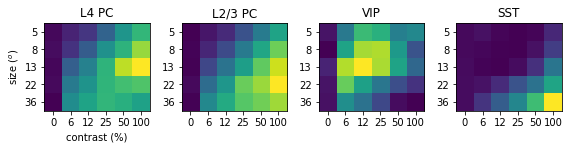

In [12]:
ucontrast = [str(c) for c in np.array((0,6,12,25,50,100))]
usize = [str(s) for s in (5,8,13,22,36)]
plt.figure(figsize=(8,2))
plt.subplot(1,4,1)
plt.imshow(rl4.mean(0))
plt.title('L4 PC')
plt.xticks(np.arange(6),ucontrast)
plt.yticks(np.arange(5),usize)
plt.xlabel('contrast (%)')
plt.ylabel('size ($^o$)')
plt.subplot(1,4,2)
plt.imshow(rpc.mean(0))
plt.title('L2/3 PC')
plt.xticks(np.arange(6),ucontrast)
plt.yticks(np.arange(5),usize)
plt.subplot(1,4,3)
plt.imshow(np.nanmean(rvip,0))
plt.title('VIP')
plt.xticks(np.arange(6),ucontrast)
plt.yticks(np.arange(5),usize)
plt.subplot(1,4,4)
plt.imshow(np.nanmean(rsst,0))
plt.tight_layout()
plt.title('SST')
plt.xticks(np.arange(6),ucontrast)
plt.yticks(np.arange(5),usize)
# plt.savefig('figures/size_contrast_array_with_l4.pdf')

In [13]:
def f_miller_troyer(mu,s2):
    u = mu/np.sqrt(2*s2)
    A = 0.5*mu*(1+ssp.erf(u))
    B = np.sqrt(s2)/np.sqrt(2*np.pi)*np.exp(-u**2)
    return A + B
#     return 0.5*mu*(1+np.exp(u)) + sigma/np.sqrt(2*np.pi)*np.exp(-u**2) # 0.5*mu*(1+ssp.erf(u))

In [14]:
def fit_w(X,y,rate_fn,wm0=None,ws0=None,bounds=None):
    # X is (N,P), y is (N,). Finds w: (P,) weight matrix to explain y as y = f(X(wm),X(ws))
    # f is a static nonlinearity, given as a function of mean and std. of noise
    N,P = X.shape
    def parse_w(w):
        wm = w[:P]
        ws = w[P:]
#         return wm,ws,k
        return wm,ws
    def minusL(w):
#         wm,ws,k = parse_w(w)
        wm,ws = parse_w(w)
        return 0.5*np.sum((rate_fn(X @ wm,X @ ws)-y)**2) # k*
    def minusdLdw(w): 
        # sum in first dimension: (N,1) times (N,1) times (N,P)
        return egrad(minusL)(w)
    
    w0 = np.concatenate((wm0,ws0)) #,(k0,)))
    
    factr=1e7
    epsilon=1e-8
    pgtol=1e-5
    wstar = sop.fmin_l_bfgs_b(minusL,w0,fprime=minusdLdw,bounds=bounds,pgtol=pgtol,factr=factr,epsilon=epsilon)
    
    return wstar

In [15]:
def linearize(f,u0):
    # return a function that evaluates the Taylor expansion of f about u0
    return lambda u: f(u0) + egrad(f)(u0)*(u-u0)

def linearize_2arg(f,a0,b0):
    # return a function that evaluates the Taylor expansion of f about u0
    return lambda a,b: f(a0,b0) + egrad(f)(a0,b0)*np.array(a-a0,b-b0)

def linearize_karg(f,*x0):
#     return lambda *x: f(*x0) + egrad(f)(*x0)*(np.array((*x))-np.array((*x0)))
    def f_linear(*x):
        return f(*x0) + egrad(f)(*x0)*(np.array((x))-np.array((x0)))
    return f_linear

# def linearize_invert(f,u0):
#     # return a function that evaluates the Taylor expansion of f about u0
#     return lambda v: u0 + (v-f(u0))/egrad(f)(u0)

In [16]:
X_sst = [columnize(arr)[:,np.newaxis] for arr in (rpc,rvip)]
X_sst = np.concatenate(X_sst,axis=1)
X_sst = np.concatenate((X_sst,np.ones((X_sst.shape[0],1))),axis=1)
ind = 2
y_sst = columnize(rsst) # [ind:ind+1]
wm0 = np.array((1,-1,1))
ws0 = np.array((1,-1,1))
wstar = fit_w(X_sst,y_sst,f_miller_troyer,wm0=wm0,ws0=ws0,bounds=None)
wsst = wstar[0]
ym_sst = f_miller_troyer(X_sst.dot(wsst[:3]),X_sst.dot(wsst[3:]))

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in sqrt
  return f_raw(*args, **kwargs)
/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/autograd/numpy/numpy_vjps.py:97: RuntimeWarning: invalid value encountered in power
  defvjp(anp.sqrt,    lambda ans, x : lambda g: g * 0.5 * x**-0.5)


In [17]:
def display_model_fit(y,ym):
    plt.figure()
    plt.subplot(1,2,1)
    sca.show_size_contrast(y.reshape((5,6)))
    plt.clim(vmin=y.min(),vmax=y.max())
#     plt.imshow(y.reshape((5,6)),vmax=y.max())
    plt.subplot(1,2,2)
    sca.show_size_contrast(ym.reshape((5,6)))
    plt.clim(vmin=y.min(),vmax=y.max())
#     plt.imshow(ym.reshape((5,6)),vmax=y.max())
    plt.figure()
    sca.scatter_size_contrast(y,ym)
    plt.plot((0,1),(0,1),c='r')
    plt.xlabel('measured')
    plt.ylabel('modeled')

Text(0.5, 1.0, 'SST')

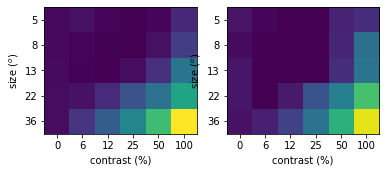

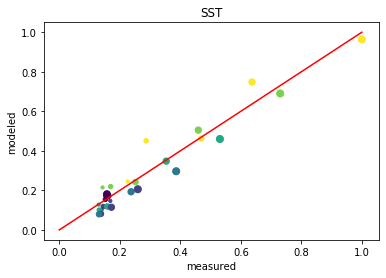

In [18]:
display_model_fit(y_sst,ym_sst)
plt.title('SST')
# plt.savefig('figures/sst_measured_modeled_mt.pdf')

In [19]:
X_vip = [columnize(arr)[:,np.newaxis] for arr in (rpc,rl4,rsst)]
X_vip = np.concatenate(X_vip,axis=1)
X_vip = np.concatenate((X_vip,np.ones((X_vip.shape[0],1))),axis=1)
y_vip = columnize(rvip)
wm0 = np.array((1,1,-1,1))
ws0 = np.array((1,1,-1,1))
wstar = fit_w(X_vip,y_vip,f_miller_troyer,wm0=wm0,ws0=ws0,bounds=None)
wvip = wstar[0]
ym_vip = f_miller_troyer(X_vip.dot(wvip[:wm0.size]),X_vip.dot(wvip[wm0.size:wm0.size+ws0.size]))

Text(0.5, 1.0, 'VIP')

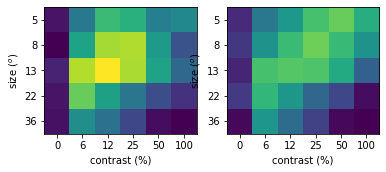

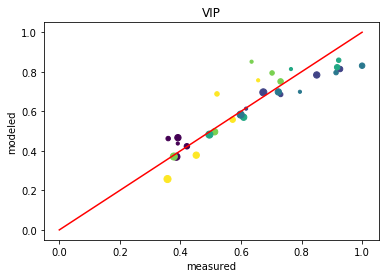

In [20]:
display_model_fit(y_vip,ym_vip)
plt.title('VIP')
# plt.savefig('figures/vip_measured_modeled_mt.pdf')

In [21]:
X_pc = [columnize(arr)[:,np.newaxis] for arr in (rl4,rsst)]
X_pc = np.concatenate(X_pc,axis=1)
X_pc = np.concatenate((X_pc,np.ones((X_pc.shape[0],1))),axis=1)
y_pc = columnize(rpc)
wm0 = np.array((1,-1,1))
ws0 = np.array((1,-1,1))
wstar = fit_w(X_pc,y_pc,f_miller_troyer,wm0=wm0,ws0=ws0,bounds=None)
wpc = wstar[0]
ym_pc = f_miller_troyer(X_pc.dot(wpc[:wm0.size]),X_pc.dot(wpc[wm0.size:wm0.size+ws0.size]))

Text(0.5, 1.0, 'PC')

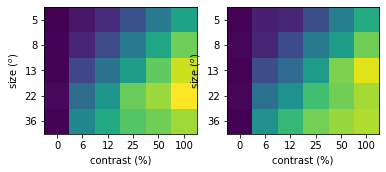

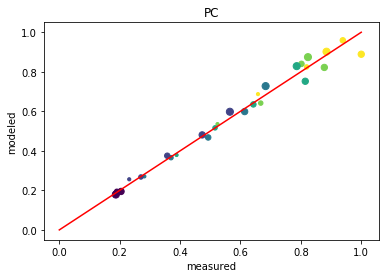

In [22]:
display_model_fit(y_pc,ym_pc)
plt.title('PC')
# plt.savefig('figures/pc_measured_modeled_mt.pdf')

In [23]:
# find ML columns of wx,wy one by one from data: Ydata ~ Y = f(Xwx + Ywy)
# 1. linearize around Y = f(Xwx + Ywy) and find new ML wx,xy
# 2. solve Y = f(Xwx + Ywy) exactly for fixed wx,wy
# repeat from 1.

In [24]:
def compute_Y_nonlinear(X,Wmx,Wmy,Wsx,Wsy,s02,f,Y0=None,bounds=None,stop_early=False):
    factr=1e7
    epsilon=1e-8
    pgtol=1e-5
    
#     def parse_W(W): 
#         Wx = W[:nP*nQ].reshape((nP,nQ))
#         Wy = W[nP*nQ:].reshape((nQ,nQ))
#         return Wx,Wy
    
    def parse_Y(Y):
        return Y.reshape((nN,nQ))

    
#     Wx,Wy = parse_W(W)
    nN,nQ = Y0.shape
    
    Ystar = [None]*nN
    
    for i in range(nN):
        def minusL(y):
            def u_fn(Wx,Wy):
                return X[i] @ Wx + y @ Wy
            return 0.5*np.sum((f(u_fn(Wmx,Wmy),u_fn(Wsx,Wsy)**2+s02) - y)**2)

        def minusdLdy(y):
            return egrad(minusL)(y)
        
        if stop_early:
            maxiter = 25
        else:
            maxiter = 15000
        Ystar[i] = sop.fmin_l_bfgs_b(minusL,Y0[i],fprime=minusdLdy,bounds=bounds,pgtol=pgtol,factr=factr,epsilon=epsilon,maxiter=maxiter)
    
    return np.array([el[0] for el in Ystar]),Ystar

In [25]:
def fit_W_gradient_descent(X,Yhat,f,Y0=None,W0mx=None,W0my=None,W0sx=None,W0sy=None,s020=None,bounds=None,niter=10,weight=None):
    # X is (N,P), y is (N,Q). Finds wZx, wZy: (P,Q) + (Q,Q) weight matrices to explain Y as Y = f(Xwmx + Ywmy,Xwsx + Ywsy)
    # f is a static nonlinearity, given as a function
    
    factr=1e7
    epsilon=1e-8
    pgtol=1e-5
    fudge = 1e-4
    
    f_sq_second_argument = lambda a,b: f(a,b**2)
    fprime_m = egrad(f,0)
    fprime_s = egrad(f_sq_second_argument,1)
    fprime_s2 = egrad(f,1)
    
    nN,nP = X.shape
    nQ = Yhat.shape[1]
    assert(nN==Yhat.shape[0])
    
    first = True
    
    if weight is None:
        weight = np.ones((nQ,))
    
    def take_one_step(W0mx,W0my,W0sx,W0sy,s02,Y00):
        
#         print(first)
        
        Y0,_ = compute_Y_nonlinear(X,W0mx,W0my,W0sx,W0sy,s020,f,Y0=Y00,stop_early=not first)
        W0 = np.concatenate((W0mx.flatten(),W0my.flatten(),W0sx.flatten(),W0sy.flatten(),s020.flatten()),axis=0)
        
        
        def compute_f(W,Y):
            # returns value (N,Q)
            return compute_f_(X,W,Y)

        
        def dfdW(W,Y):
            # returns value (N,Q,R)
            # dfdW(W,Y): 2*Q*(P+Q) + Q = R, (N,Q,R)
            fW = lambda W: compute_f(W,Y)
            return jacobian(fW)(W)
        
        def compute_f_(x,W,y):
            Wmx,Wmy,Wsx,Wsy,s2 = parse_W(W)
            def u_fn(Wx,Wy): 
                return x @ Wx + y @ Wy
            return f(u_fn(Wmx,Wmy),u_fn(Wsx,Wsy)**2+s2)
        
        def dfdY(W,Y):
            compute_fs = [lambda y: compute_f_(x,W,y) for x in X]
            jacobians = [jacobian(this_compute_f)(y)[np.newaxis] for this_compute_f,y in zip(compute_fs,Y)]
            jac = np.concatenate(jacobians,axis=0)
            return jac
        
        def dYdW(W):
            # returns value (N,Q,R)
            A = np.linalg.inv(np.eye(nQ)[np.newaxis] - dfdY(W,Y0))
            B = dfdW(W,Y0)
            return A @ B
        
        def minusLY(Y):
            # returns value float
            return 0.5*np.sum(weight[np.newaxis,:]*(Yhat-Y)**2)
                
        def minusdLdY(Y):
            return egrad(minusLY)(Y)
        
        def minusLW(W):
            # returns value float
            return minusLY(compute_f(W,Y0))
    
        def minusdLdW(W): 
            # returns value (R,)
            # sum in first dimension: (N,1) times (N,1) times (N,P)
            return np.einsum('ij,ijk->k',minusdLdY(Y0),dYdW(W))
        
        Wstar = sop.fmin_l_bfgs_b(minusLW,W0,fprime=minusdLdW,bounds=bounds,pgtol=pgtol,factr=factr,epsilon=epsilon,maxiter=1)
        W1mx,W1my,W1sx,W1sy,s021 = parse_W(Wstar[0])
        
        return W1mx,W1my,W1sx,W1sy,s021,Y0,Wstar
    
    def parse_W(W):
        shapeWx = (nP,nQ)
        shapeWy = (nQ,nQ)
        sizeWx = np.prod(shapeWx)
        sizeWy = np.prod(shapeWy)
        nW = 2
        Ws = [None]*(2*nW + 1)
        shapesW = []
        sizesW = []
        for i in range(nW):
            shapesW = shapesW + [shapeWx,shapeWy]
            sizesW = sizesW + [sizeWx,sizeWy]
        so_far = 0
        for i in range(2*nW):
            Ws[i] = W[so_far:so_far+sizesW[i]].reshape(shapesW[i])
            so_far = so_far + sizesW[i]
        Ws[-1] = W[so_far:]
        return Ws
    
    Wmx = np.zeros((niter+1,)+W0mx.shape)
    Wmy = np.zeros((niter+1,)+W0my.shape)
    Wsx = np.zeros((niter+1,)+W0sx.shape)
    Wsy = np.zeros((niter+1,)+W0sy.shape)
    s02 = np.zeros((niter+1,)+s020.shape)
    Y = np.zeros((niter+1,)+Yhat.shape)
    diagnostics = [None]*(niter+1)
    
    Wmx[0],Wmy[0],Wsx[0],Wsy[0],s02[0],Y[0] = W0mx,W0my,W0sx,W0sy,s020,Yhat
    
    for iiter in range(niter):
        print(iiter)
        Wmx[iiter+1],Wmy[iiter+1],Wsx[iiter+1],Wsy[iiter+1],s02[iiter+1],Y[iiter+1],diagnostics[iiter+1] = take_one_step(Wmx[iiter],Wmy[iiter],Wsx[iiter],Wsy[iiter],s02[iiter],Y[iiter])
        first = False
    
    return Wmx,Wmy,Wsx,Wsy,s02,Y,diagnostics

In [ ]:
def fit_W_l_bfgs_b(X,Yhat,f,Y0=None,W0mx=None,W0my=None,W0sx=None,W0sy=None,s020=None,bounds=None,niter=10,weight=None):
    # X is (N,P), y is (N,Q). Finds wZx, wZy: (P,Q) + (Q,Q) weight matrices to explain Y as Y = f(Xwmx + Ywmy,Xwsx + Ywsy)
    # f is a static nonlinearity, given as a function
    
    factr=1e7
    epsilon=1e-8
    pgtol=1e-5
    fudge = 1e-4
    
    f_sq_second_argument = lambda a,b: f(a,b**2)
    fprime_m = egrad(f,0)
    fprime_s = egrad(f_sq_second_argument,1)
    fprime_s2 = egrad(f,1)
    
    nN,nP = X.shape
    nQ = Yhat.shape[1]
    assert(nN==Yhat.shape[0])
    
    first = True
    
    if weight is None:
        weight = np.ones((nQ,))
    
    def take_one_step(W0mx,W0my,W0sx,W0sy,s02,Y00):
        
#         print(first)
        
        Y0,_ = compute_Y_nonlinear(X,W0mx,W0my,W0sx,W0sy,s020,f,Y0=Y00,stop_early=not first)
        W0 = np.concatenate((W0mx.flatten(),W0my.flatten(),W0sx.flatten(),W0sy.flatten(),s020.flatten()),axis=0)
        
        def compute_Y_iterative(W):
            Y,_ = compute_Y_nonlinear(X,W0mx,W0my,W0sx,W0sy,s020,f,Y0=Y00,stop_early=not first)
        
        def compute_f(W,Y):
            # returns value (N,Q)
            return compute_f_(X,W,Y)

        
        def dfdW(W,Y):
            # returns value (N,Q,R)
            # dfdW(W,Y): 2*Q*(P+Q) + Q = R, (N,Q,R)
            fW = lambda W: compute_f(W,Y)
            return jacobian(fW)(W)
        
        def compute_f_(x,W,y):
            Wmx,Wmy,Wsx,Wsy,s2 = parse_W(W)
            def u_fn(Wx,Wy): 
                return x @ Wx + y @ Wy
            return f(u_fn(Wmx,Wmy),u_fn(Wsx,Wsy)**2+s2)
        
        def dfdY(W,Y):
            compute_fs = [lambda y: compute_f_(x,W,y) for x in X]
            jacobians = [jacobian(this_compute_f)(y)[np.newaxis] for this_compute_f,y in zip(compute_fs,Y)]
            jac = np.concatenate(jacobians,axis=0)
            return jac
        
        def dYdW(W):
            # returns value (N,Q,R)
            A = np.linalg.inv(np.eye(nQ)[np.newaxis] - dfdY(W,Y0))
            B = dfdW(W,Y0)
            return A @ B
        
        def minusLY(Y):
            # returns value float
            return 0.5*np.sum(weight[np.newaxis,:]*(Yhat-Y)**2)
                
        def minusdLdY(Y):
            return egrad(minusLY)(Y)
        
        def minusLW(W):
            # returns value float
            return minusLY(compute_f(W,Y0))
    
        def minusdLdW(W): 
            # returns value (R,)
            # sum in first dimension: (N,1) times (N,1) times (N,P)
            return np.einsum('ij,ijk->k',minusdLdY(Y0),dYdW(W))
        
        Wstar = sop.fmin_l_bfgs_b(minusLW,W0,fprime=minusdLdW,bounds=bounds,pgtol=pgtol,factr=factr,epsilon=epsilon,maxiter=1)
        W1mx,W1my,W1sx,W1sy,s021 = parse_W(Wstar[0])
        
        return W1mx,W1my,W1sx,W1sy,s021,Y0,Wstar
    
    def parse_W(W):
        shapeWx = (nP,nQ)
        shapeWy = (nQ,nQ)
        sizeWx = np.prod(shapeWx)
        sizeWy = np.prod(shapeWy)
        nW = 2
        Ws = [None]*(2*nW + 1)
        shapesW = []
        sizesW = []
        for i in range(nW):
            shapesW = shapesW + [shapeWx,shapeWy]
            sizesW = sizesW + [sizeWx,sizeWy]
        so_far = 0
        for i in range(2*nW):
            Ws[i] = W[so_far:so_far+sizesW[i]].reshape(shapesW[i])
            so_far = so_far + sizesW[i]
        Ws[-1] = W[so_far:]
        return Ws
    
    Wmx = np.zeros((niter+1,)+W0mx.shape)
    Wmy = np.zeros((niter+1,)+W0my.shape)
    Wsx = np.zeros((niter+1,)+W0sx.shape)
    Wsy = np.zeros((niter+1,)+W0sy.shape)
    s02 = np.zeros((niter+1,)+s020.shape)
    Y = np.zeros((niter+1,)+Yhat.shape)
    diagnostics = [None]*(niter+1)
    
    Wmx[0],Wmy[0],Wsx[0],Wsy[0],s02[0],Y[0] = W0mx,W0my,W0sx,W0sy,s020,Yhat
    
    for iiter in range(niter):
        print(iiter)
        Wmx[iiter+1],Wmy[iiter+1],Wsx[iiter+1],Wsy[iiter+1],s02[iiter+1],Y[iiter+1],diagnostics[iiter+1] = take_one_step(Wmx[iiter],Wmy[iiter],Wsx[iiter],Wsy[iiter],s02[iiter],Y[iiter])
        first = False
    
    return Wmx,Wmy,Wsx,Wsy,s02,Y,diagnostics

In [39]:
        def compute_f(W,Y):
            # returns value (N,Q)
            return compute_f_(X,W,Y)

        
        def dfdW(W,Y):
            # returns value (N,Q,R)
            # dfdW(W,Y): 2*Q*(P+Q) + Q = R, (N,Q,R)
            fW = lambda W: compute_f(W,Y)
            return jacobian(fW)(W)
        
        def compute_f_(x,W,y):
            Wmx,Wmy,Wsx,Wsy,s2 = parse_W(W)
            def u_fn(Wx,Wy): 
                return x @ Wx + y @ Wy
            return f(u_fn(Wmx,Wmy),u_fn(Wsx,Wsy)**2+s2)
        
        def dfdY(W,Y):
            compute_fs = [lambda y: compute_f_(x,W,y) for x in X]
            jacobians = [jacobian(this_compute_f)(y)[np.newaxis] for this_compute_f,y in zip(compute_fs,Y)]
            jac = np.concatenate(jacobians,axis=0)
            return jac
        
        def dYdW(W):
            # returns value (N,Q,R)
            A = np.linalg.inv(np.eye(nQ)[np.newaxis] - dfdY(W,Y0))
            B = dfdW(W,Y0)
            return A @ B
        
        def d2YdW2(W):
            
        
        def minusLY(Y):
            # returns value float
            return 0.5*np.sum(weight[np.newaxis,:]*(Yhat-Y)**2)
        
        def minusdLdY(Y):
            return egrad(minusLY)(Y)
        
        def minusLW(W):
            # returns value float
            return minusLY(compute_f(W,Y0))
    
        def minusdLdW(W): 
            # returns value (R,)
            # sum in first dimension: (N,1) times (N,1) times (N,P)
            return np.einsum('ij,ijk->k',minusdLdY(Y0),dYdW(W))
        
        def minusd2LdW2(W):
            dYdW2 = np.einsum('ijk,ijl->ijkl',dYdW(W),dYdW(W))
            A = np.einsum('ij,ijkl->kl',minusd2LdY2(Y0),dYdW2)
            B = np.einsum('ij,ijkl->kl',minusdLdY(Y0),d2YdW2(W))
            return A + B
        
        def minusd2LdY2(Y):
            return egrad(minusdLdY)(Y)
            
        
        def parse_W(W):
            shapeWx = (nP,nQ)
            shapeWy = (nQ,nQ)
            sizeWx = np.prod(shapeWx)
            sizeWy = np.prod(shapeWy)
            nW = 2
            Ws = [None]*(2*nW + 1)
            shapesW = []
            sizesW = []
            for i in range(nW):
                shapesW = shapesW + [shapeWx,shapeWy]
                sizesW = sizesW + [sizeWx,sizeWy]
            so_far = 0
            for i in range(2*nW):
                Ws[i] = W[so_far:so_far+sizesW[i]].reshape(shapesW[i])
                so_far = so_far + sizesW[i]
            Ws[-1] = W[so_far:]
            return Ws
        
        f = f_miller_troyer
        weight = np.array((1,1,1))
        W0 = np.concatenate([x.flatten() for x in W0s])
        print(egrad(minusLY)(Y0).shape)
        print(dYdW(W0).shape)
        print(np.einsum('ij,ijk->k',egrad(minusLY)(Y0),dYdW(W0)).shape)

IndentationError: expected an indented block (<ipython-input-39-b750e21e31ff>, line 33)

In [180]:
def fit_W_momentum(X,Yhat,f,Y0=None,W0mx=None,W0my=None,W0sx=None,W0sy=None,s020=None,bounds=None,niter=10,weight=None,eta=0.1,gamma=0.9):
    # X is (N,P), y is (N,Q). Finds wZx, wZy: (P,Q) + (Q,Q) weight matrices to explain Y as Y = f(Xwmx + Ywmy,Xwsx + Ywsy)
    # f is a static nonlinearity, given as a function
    
    factr=1e7
    epsilon=1e-8
    pgtol=1e-5
    fudge = 1e-4
    
    f_sq_second_argument = lambda a,b: f(a,b**2)
    fprime_m = egrad(f,0)
    fprime_s = egrad(f_sq_second_argument,1)
    fprime_s2 = egrad(f,1)
    
    nN,nP = X.shape
    nQ = Yhat.shape[1]
    assert(nN==Yhat.shape[0])
    
    first = True
    
    if weight is None:
        weight = np.ones((nQ,))
        
    lower_bound = np.array([b[0] for b in bounds])
    upper_bound = np.array([b[1] for b in bounds])
    
    def take_one_step(W0,Y00,momentum0=None):
        
#         print(first)
        W0mx,W0my,W0sx,W0sy,s020 = parse_W(W0)
        Y0,_ = compute_Y_nonlinear(X,W0mx,W0my,W0sx,W0sy,s020,f,Y0=Y00,stop_early=not first)
        #W0 = np.concatenate((W0mx.flatten(),W0my.flatten(),W0sx.flatten(),W0sy.flatten(),s020.flatten()),axis=0)
        
        
        def compute_f(W,Y):
            # returns value (N,Q)
            return compute_f_(X,W,Y)

        def compute_f_(x,W,y):
            Wmx,Wmy,Wsx,Wsy,s2 = parse_W(W)
            def u_fn(Wx,Wy): 
                return x @ Wx + y @ Wy
            return f(u_fn(Wmx,Wmy),u_fn(Wsx,Wsy)**2+s2)
        
        def dfdW(W,Y):
            # returns value (N,Q,R)
            # dfdW(W,Y): 2*Q*(P+Q) + Q = R, (N,Q,R)
            fW = lambda W: compute_f(W,Y)
            return jacobian(fW)(W)
        
        def dfdY(W,Y):
            compute_fs = [lambda y: compute_f_(x,W,y) for x in X]
            jacobians = [jacobian(this_compute_f)(y)[np.newaxis] for this_compute_f,y in zip(compute_fs,Y)]
            jac = np.concatenate(jacobians,axis=0)
            return jac
        
        def dYdW(W):
            # returns value (N,Q,R)
            A = np.linalg.inv(np.eye(nQ)[np.newaxis] - dfdY(W,Y0))
            B = dfdW(W,Y0)
            return A @ B
        
        def minusLY(Y):
            # returns value float
            return 0.5*np.sum(weight[np.newaxis,:]*(Yhat-Y)**2)
                
        def minusdLdY(Y):
            return egrad(minusLY)(Y)
        
        def minusLW(W):
            # returns value float
            return minusLY(compute_f(W,Y0))
    
        def minusdLdW(W): 
            # returns value (R,)
            # sum in first dimension: (N,1) times (N,1) times (N,P)
            return np.einsum('ij,ijk->k',minusdLdY(Y0),dYdW(W))
        
        
        if momentum0 is None:
            momentum0 = np.zeros_like(W0)
        deriv = minusdLdW(W0)
        print(deriv)
        momentum1 = gamma*momentum0 + (1-gamma)*eta*deriv
        W1 = W0 - momentum1
        
        lb_violation = W1 < lower_bound
        ub_violation = W1 > upper_bound
        W1[lb_violation] = lower_bound[lb_violation]
        W1[ub_violation] = upper_bound[ub_violation]
        momentum1[lb_violation | ub_violation] = 0
        
#         W1mx,W1my,W1sx,W1sy,s021 = parse_W(W1)
        
        return W1,Y0,momentum1
    
    def parse_W(W):
        shapeWx = (nP,nQ)
        shapeWy = (nQ,nQ)
        sizeWx = np.prod(shapeWx)
        sizeWy = np.prod(shapeWy)
        nW = 2
        Ws = [None]*(2*nW + 1)
        shapesW = []
        sizesW = []
        for i in range(nW):
            shapesW = shapesW + [shapeWx,shapeWy]
            sizesW = sizesW + [sizeWx,sizeWy]
        so_far = 0
        for i in range(2*nW):
            Ws[i] = W[so_far:so_far+sizesW[i]].reshape(shapesW[i])
            so_far = so_far + sizesW[i]
        Ws[-1] = W[so_far:]
        return Ws
    
    def unparse_W(*Ws):
        return np.concatenate([ww.flatten() for ww in Ws])
    
    Wmx = np.zeros((niter+1,)+W0mx.shape)
    Wmy = np.zeros((niter+1,)+W0my.shape)
    Wsx = np.zeros((niter+1,)+W0sx.shape)
    Wsy = np.zeros((niter+1,)+W0sy.shape)
    s02 = np.zeros((niter+1,)+s020.shape)
    
    W0 = unparse_W(W0mx,W0my,W0sx,W0sy,s020).copy()
    
    momentum = np.zeros((niter+1,)+W0.shape)
    
    Y = np.zeros((niter+1,)+Yhat.shape)
    diagnostics = [None]*(niter+1)
    
    Wmx[0],Wmy[0],Wsx[0],Wsy[0],s02[0],Y[0] = W0mx,W0my,W0sx,W0sy,s020,Yhat
    
    for iiter in range(niter):
        print(iiter)
        W0 = unparse_W(Wmx[iiter],Wmy[iiter],Wsx[iiter],Wsy[iiter],s02[iiter]).copy()
        W1,Y[iiter+1],momentum[iiter+1] = take_one_step(W0,Y[iiter],momentum0=momentum[iiter])
        Wmx[iiter+1],Wmy[iiter+1],Wsx[iiter+1],Wsy[iiter+1],s02[iiter+1] = parse_W(W1.copy())
        first = False
    
    return Wmx,Wmy,Wsx,Wsy,s02,Y,momentum

In [181]:
# offset = 0
# wxfactor = 1e-2
# wyfactor = 1e-3
# W0my = np.array(((0,wsst[offset+1]),(wvip[offset+1],0)))*wyfactor
# W0mx = np.concatenate((wsst[[offset+0,offset+2],np.newaxis],wvip[[offset+0,offset+2],np.newaxis]),axis=1)*wxfactor
# offset = 3
# W0sy = np.array(((0,wsst[offset+1]),(wvip[offset+1],0)))*wyfactor
# W0sx = np.concatenate((wsst[[offset+0,offset+2],np.newaxis],wvip[[offset+0,offset+2],np.newaxis]),axis=1)*wxfactor
Yhat = np.concatenate((y_pc[:,np.newaxis],y_sst[:,np.newaxis],y_vip[:,np.newaxis]),axis=1)
X = columnize(rl4)[:,np.newaxis]
X = np.concatenate((X,np.ones_like(X)),axis=1)
nN,nP = X.shape
nQ = Yhat.shape[1]
W0mx = np.zeros((nP,nQ))
W0my = np.zeros((nQ,nQ))
W0sx = np.zeros((nP,nQ))
W0sy = np.zeros((nQ,nQ))
s020 = np.zeros((nQ,))
W0s = [W0mx,W0my,W0sx,W0sy,s020]

In [182]:
def parse_bounds(W0x_bounds,W0y_bounds,s02_bounds):
    bounds = [(-np.inf,np.inf)]*(2*(W0x_bounds.size+W0y_bounds.size) + s02_bounds.size)
    is_free = np.zeros((2*(W0x_bounds.size+W0y_bounds.size) + s02_bounds.size,))
    so_far = 0
    is_free = np.concatenate((W0x_bounds.flatten(),W0y_bounds.flatten(),np.abs(W0x_bounds).flatten(),np.abs(W0y_bounds).flatten()))
    for i in range(2*(W0x_bounds.size+W0y_bounds.size)):
        if is_free[i]==0:
            bounds[i] = (0,0)
        elif is_free[i]==-1:
            bounds[i] = (-np.inf,0)
    for i in range(2*(W0x_bounds.size+W0y_bounds.size),2*(W0x_bounds.size+W0y_bounds.size)+s02_bounds.size):
        bounds[i] = (0,np.inf)
    return bounds

In [183]:
W0x_bounds = np.ones((nP,nQ),dtype=int)
W0x_bounds[0,1] = 0
W0y_bounds = np.ones((nQ,nQ),dtype=int)
W0y_bounds[1:3,1:3] = np.array(((0,-1),(-1,0)))
W0y_bounds[1,0] = -1
W0y_bounds[2,0] = 0

W0mx[W0x_bounds>0] = np.random.randn((W0x_bounds>0).sum())
W0my[W0y_bounds>0] = np.random.randn((W0y_bounds>0).sum())
W0sx[W0x_bounds>0] = np.random.randn((W0x_bounds>0).sum())
W0sy[W0y_bounds>0] = np.random.randn((W0y_bounds>0).sum())

s02_bounds = np.zeros((nQ,))

bounds = parse_bounds(W0x_bounds,W0y_bounds,s02_bounds)

In [184]:
Y0,diagnostics = compute_Y_nonlinear(X,*W0s,f_miller_troyer,Y0=np.zeros_like(Yhat)) #_t_evolution

In [228]:
Wstar_t_init = [ww[-1] for ww in Wstar_t2]

In [229]:
W0mx,W0my,W0sx,W0sy,s020 = [Wstar_t_init[i].copy() for i in range(5)]

In [232]:
niter = int(1e4)
eta = 1e-2
gamma = 0.
weight = np.array((1,1,1))
Wstar_t3 = fit_W_momentum(X.copy(),Yhat.copy(),f_miller_troyer,Y0=Yhat.copy(),W0mx=W0mx.copy(),W0my=W0my.copy(),W0sx=W0sx.copy(),W0sy=W0sy.copy(),s020=s020.copy(),bounds=bounds,niter=niter,weight=weight,eta=eta,gamma=gamma)

0
[-0.41605431 -0.3612428   1.34175802 -0.60911237 -0.5604158   2.08079394
 -0.38637126 -0.32614352  1.19344778 -0.18249707 -0.15320802  0.57730663
 -0.41840434 -0.39934175  1.39745913  0.33927617 -0.68964367 -0.18545621
  0.49330767 -1.08147563 -0.23257202  0.31653079 -0.61852249 -0.18199519
  0.14916894 -0.29086561 -0.08835815  0.34087664 -0.76689416 -0.16472392
 -0.12114306 -0.06104394  0.31197231]
1
[ 0.29334097  0.25220062 -0.93707326  0.42415854  0.38736363 -1.44213878
  0.26658379  0.22452359 -0.84015505  0.1307421   0.10750411 -0.39507988
  0.30513798  0.27317983 -1.0635555  -0.24276059  0.47968515  0.14163311
 -0.35077093  0.74385181  0.17313265 -0.22021031  0.42584844  0.13010537
 -0.10850057  0.20278068  0.07208998 -0.25013658  0.52828137  0.09562297
  0.08285453  0.04143173 -0.06202429]
2
[-0.16196347 -0.1238573   0.47493209 -0.23397739 -0.17384512  0.648787
 -0.15066995 -0.11720716  0.44083699 -0.07175846 -0.05567629  0.22303943
 -0.13701105 -0.11560377  0.36373032  0.1327

[-0.00644657 -0.00871341  0.04497139 -0.01708064 -0.01948945  0.08739679
 -0.0042293  -0.00523651  0.02084579 -0.0015643  -0.00340404  0.02432036
  0.01856107  0.00494067 -0.06958702  0.0041002  -0.0166951  -0.01162902
  0.01100023 -0.03791498 -0.01988638  0.00324371 -0.00904864 -0.01432632
  0.00072479 -0.00685746 -0.0026509  -0.01508661  0.01290635 -0.02231118
 -0.00572757 -0.00320106  0.12601184]
21
[ 0.0046986  -0.00334411  0.01612926 -0.00267492 -0.01270345  0.05055881
  0.00583048 -0.00045215 -0.00537258  0.00386568 -0.00073802  0.01016246
  0.02639968  0.00838273 -0.08985903 -0.00534839 -0.0070711   0.00316128
 -0.00120058 -0.02575821 -0.0011648  -0.00529182 -0.00047143 -0.00075523
 -0.00388    -0.00207771  0.00463006 -0.02172748  0.01906897 -0.01185286
 -0.0031481  -0.00252512  0.11443652]
22
[ 0.0184656   0.0077594  -0.01803078  0.01617908  0.00251674  0.00372453
  0.01964236  0.01040032 -0.03911683  0.01003371  0.00428314 -0.00522797
  0.04119313  0.01952593 -0.12519954 -0.01

[ 0.00475635 -0.00065878  0.01153328 -0.00137539 -0.00744859  0.03677079
  0.00610969  0.0019463  -0.00876129  0.00353774  0.0001205   0.00973326
  0.02883509  0.01304342 -0.1030663  -0.00513342 -0.0015113  -0.00279548
 -0.00188472 -0.01494008 -0.00804309 -0.00529658  0.00442395 -0.00615732
 -0.00348996 -0.00026938  0.00152607 -0.02349535  0.02847083 -0.01520752
 -0.0027     -0.00191161  0.11885831]
41
[ 6.32750276e-03  1.15764654e-04  7.38177189e-03  6.82835815e-04
 -6.46080145e-03  3.13871333e-02  7.61292265e-03  2.67723955e-03
 -1.27087687e-02  4.28645056e-03  5.01107188e-04  7.72207040e-03
  3.01211582e-02  1.36105725e-02 -1.06345260e-01 -6.43826853e-03
 -1.26440165e-04 -9.77209249e-04 -3.59039888e-03 -1.31723488e-02
 -5.77077528e-03 -6.54571584e-03  5.73431853e-03 -4.44227486e-03
 -4.11220994e-03  4.11106816e-04  2.42177749e-03 -2.45599354e-02
  2.94879056e-02 -1.38510523e-02 -2.33188827e-03 -1.81617023e-03
  1.17500387e-01]
42
[ 6.46873349e-03  1.18039085e-04  6.58278675e-03  9.2

[ 0.00801664  0.0019254  -0.00261934  0.00355877 -0.00227787  0.00974957
  0.0090108   0.00377663 -0.01926352  0.0049736   0.00109241  0.00421468
  0.03191502  0.01578291 -0.11772964 -0.00774938  0.0036395   0.0005537
 -0.00573126 -0.00427706 -0.00447381 -0.0076615   0.00795925 -0.0028015
 -0.00465785  0.00161538  0.00325772 -0.02591134  0.03405897 -0.01287737
 -0.0015809  -0.00120398  0.11384616]
60
[ 0.00796142  0.00188747 -0.00253748  0.00348794 -0.0023261   0.00984281
  0.00895864  0.00374191 -0.01918601  0.00494609  0.00107343  0.00425764
  0.03187155  0.01576347 -0.11769869 -0.00770172  0.00357283  0.00055204
 -0.0056701  -0.00436144 -0.00446349 -0.00761642  0.00789867 -0.00280712
 -0.00463412  0.00158172  0.00325437 -0.02587363  0.03402919 -0.01287485
 -0.00159324 -0.0012089   0.11390029]
61
[ 0.00785003  0.00175652 -0.00121373  0.00334191 -0.00247381  0.01128847
  0.00889762  0.00362612 -0.01796688  0.00488547  0.001003    0.00496832
  0.03185713  0.01569748 -0.11694214 -0.0075

[ 5.20670154e-03 -4.39248659e-04  3.40759255e-03  5.10206029e-05
 -5.25214222e-03  1.64079159e-02  6.35753261e-03  1.56994343e-03
 -1.33168894e-02  3.60357889e-03 -6.94058071e-05  7.31235511e-03
  2.98030168e-02  1.41613094e-02 -1.14104784e-01 -5.38297796e-03
 -5.77993068e-04 -9.14174074e-04 -2.76683165e-03 -9.56401311e-03
 -5.80690275e-03 -5.43194916e-03  4.02369603e-03 -4.32600122e-03
 -3.50490745e-03 -4.64056360e-04  2.45890156e-03 -2.41124715e-02
  3.12463118e-02 -1.38386654e-02 -2.14808814e-03 -1.49304553e-03
  1.16978997e-01]
80
[ 5.19078204e-03 -4.70329088e-04  3.35918337e-03  4.28537795e-05
 -5.28622562e-03  1.62775954e-02  6.34081942e-03  1.54187271e-03
 -1.33528229e-02  3.59355769e-03 -8.55296395e-05  7.29976018e-03
  2.97996718e-02  1.41480575e-02 -1.14206077e-01 -5.36793539e-03
 -6.31851773e-04 -8.61406574e-04 -2.75635743e-03 -9.62115609e-03
 -5.72594748e-03 -5.41664638e-03  3.97572939e-03 -4.28152865e-03
 -3.49590604e-03 -4.92423212e-04  2.48258410e-03 -2.41066016e-02
  3.

[ 4.74054413e-03 -1.17404489e-03  3.10447090e-03 -4.19670670e-04
 -6.15307091e-03  1.50953785e-02  5.88033212e-03  8.78287537e-04
 -1.33184916e-02  3.35672563e-03 -4.37084317e-04  7.31764000e-03
  2.95467768e-02  1.37614088e-02 -1.15258913e-01 -4.97892071e-03
 -1.86656843e-03  3.17136878e-05 -2.33637186e-03 -1.11171531e-02
 -4.34675878e-03 -5.02530522e-03  2.81012923e-03 -3.54025161e-03
 -3.29448714e-03 -1.11718369e-03  2.88693301e-03 -2.38624372e-02
  3.06232867e-02 -1.30901735e-02 -2.18358482e-03 -1.57941457e-03
  1.17697213e-01]
99
[ 4.71190070e-03 -1.20997165e-03  3.11288849e-03 -4.55370958e-04
 -6.19807621e-03  1.50871064e-02  5.85243712e-03  8.44763530e-04
 -1.33051153e-02  3.34252658e-03 -4.54965477e-04  7.32507757e-03
  2.95271555e-02  1.37417131e-02 -1.15285079e-01 -4.95463981e-03
 -1.92970676e-03  7.18650083e-05 -2.30579612e-03 -1.11954564e-02
 -4.28572120e-03 -5.00169620e-03  2.75145740e-03 -3.50753418e-03
 -3.28249087e-03 -1.14892519e-03  2.90511617e-03 -2.38448586e-02
  3.

[ 0.00420481 -0.00186661  0.00302046 -0.00097801 -0.00698178  0.01406996
  0.00533899  0.00022387 -0.01316433  0.00307515 -0.00078588  0.00743025
  0.02926545  0.01340809 -0.11630041 -0.00451672 -0.00307331  0.00068118
 -0.00183263 -0.01252855 -0.00332713 -0.00456375  0.00167072 -0.00302005
 -0.00305515 -0.00173376  0.00317888 -0.02359018  0.03008851 -0.01258618
 -0.00223617 -0.00165734  0.118462  ]
119
[ 0.00418197 -0.00189616  0.00298063 -0.00099399 -0.00701252  0.01390764
  0.0053112   0.00019192 -0.01315227  0.00306167 -0.00080205  0.00743155
  0.02925603  0.01339693 -0.11640376 -0.00449629 -0.00312246  0.00071167
 -0.0018155  -0.01257403 -0.00327168 -0.00454023  0.00161497 -0.00299648
 -0.00304361 -0.00176201  0.00319178 -0.02357956  0.03007659 -0.01256146
 -0.0022344  -0.00165937  0.11851053]
120
[ 0.00415175 -0.00192905  0.00300114 -0.00103127 -0.00705336  0.01391211
  0.00528209  0.00016116 -0.01312789  0.00304683 -0.00081838  0.00744518
  0.02923626  0.01337974 -0.11642307 -0.

[ 0.00377513 -0.00241303  0.00279492 -0.00138817 -0.00759978  0.01273117
  0.00489796 -0.00029973 -0.01309976  0.00284329 -0.00106841  0.00750418
  0.02907582  0.01317835 -0.1174989  -0.00414351 -0.00401121  0.00113842
 -0.00145197 -0.01354191 -0.00257297 -0.00418707  0.00076636 -0.00266678
 -0.00285799 -0.00223033  0.0033813  -0.02339499  0.02978145 -0.01223946
 -0.00225953 -0.00171188  0.11921696]
138
[ 0.00374611 -0.00244211  0.00280155 -0.00142285 -0.0076355   0.01271856
  0.00486952 -0.00032729 -0.01308762  0.00282883 -0.00108289  0.00751011
  0.02905763  0.01316403 -0.11752949 -0.00411919 -0.00406179  0.00116579
 -0.0014225  -0.01360283 -0.00253489 -0.00416329  0.00071844 -0.00264398
 -0.00284594 -0.00225589  0.00339506 -0.02337878  0.02976033 -0.01222077
 -0.0022648  -0.0017153   0.11924544]
139
[ 0.00372542 -0.00246881  0.00280399 -0.0014481  -0.00766834  0.01269991
  0.00484908 -0.00035259 -0.01307904  0.00281824 -0.00109619  0.00751633
  0.0290445   0.01315144 -0.11756133 -0.

[-0.03202336 -0.02238111  0.06864387 -0.04771989 -0.0193285   0.03330397
 -0.0301198  -0.0252261   0.07486544 -0.01367897 -0.0119744   0.04620642
 -0.00576573 -0.0060185  -0.06129157  0.0259943  -0.03794052 -0.02510792
  0.03862698 -0.02512752 -0.04638231  0.024911   -0.04475284 -0.02400204
  0.0109101  -0.02178409 -0.00783707  0.00616612 -0.00233284 -0.03603436
 -0.00907377 -0.00087077  0.10422877]
158
[-0.02792523 -0.02137358  0.05682102 -0.04242632 -0.01831541  0.01917329
 -0.02631625 -0.02429899  0.06369991 -0.01170913 -0.0114179   0.04024202
 -0.00242758 -0.00555136 -0.06990989  0.02256048 -0.03622115 -0.01825114
  0.03421074 -0.02345715 -0.03825636  0.02172145 -0.04315742 -0.01754898
  0.00925534 -0.0208234  -0.00435081  0.00339071 -0.00157857 -0.03122005
 -0.00813375 -0.00078657  0.10003902]
159
[-0.00958575 -0.01092914  0.01124726 -0.01843177 -0.00482947 -0.03952381
 -0.00940094 -0.01464156  0.02142496 -0.00295671 -0.00639456  0.01827582
  0.01169878  0.00227432 -0.10443415  0.

[-0.00569793 -0.01213666  0.01773095 -0.01533846 -0.0129776  -0.00286343
 -0.0045761  -0.01335181  0.01719139 -0.00090834 -0.00611215  0.01760044
  0.01599772  0.00065915 -0.0958202   0.00383424 -0.02106957  0.00697433
  0.01099737 -0.01824898 -0.00265172  0.00355438 -0.02395828  0.0047974
  0.00020443 -0.01165104  0.00745976 -0.01218646  0.00805991 -0.01129385
 -0.00416627 -0.00104651  0.0949706 ]
178
[-0.00576341 -0.01206158  0.01698442 -0.01535692 -0.01289035 -0.00373302
 -0.00465718 -0.01327641  0.01646423 -0.00095047 -0.00607054  0.01720438
  0.01597511  0.00070206 -0.09633418  0.00388484 -0.02094053  0.00743122
  0.01101136 -0.01810178 -0.00219701  0.0036182  -0.02382407  0.00523006
  0.00023679 -0.01157853  0.00771712 -0.01216626  0.00812973 -0.01103994
 -0.00415379 -0.00103893  0.09482724]
179
[-0.00292816 -0.01082845  0.0101181  -0.01174269 -0.01137281 -0.01231501
 -0.00192651 -0.01214681  0.00996673  0.00040445 -0.00545856  0.01385355
  0.01835817  0.00155917 -0.10165527  0.0

[ 0.0006037  -0.00692151  0.00810063 -0.00732346 -0.00884629 -0.00311912
  0.00182904 -0.00722234  0.00286667  0.00199339 -0.00334185  0.01155881
  0.02233812  0.00509467 -0.1027265  -0.00143048 -0.01209935  0.00729643
  0.00410604 -0.01263273 -0.00075513 -0.00172817 -0.01286587  0.00474387
 -0.00219259 -0.00667975  0.00735515 -0.01755181  0.01532184 -0.01018973
 -0.00307524 -0.00099391  0.09785793]
197
[ 0.00061586 -0.00690619  0.008062   -0.00730597 -0.00882344 -0.00317919
  0.00184027 -0.00720825  0.00283096  0.00199894 -0.00333515  0.01154305
  0.02235293  0.00511106 -0.10277502 -0.001441   -0.01206995  0.00726555
  0.00409117 -0.01258867 -0.00080285 -0.00173789 -0.01283885  0.004716
 -0.00219747 -0.00666697  0.00734235 -0.01756373  0.01535331 -0.01022064
 -0.00307183 -0.00099144  0.09788846]
198
[ 0.00062711 -0.00689249  0.00802564 -0.00728965 -0.00880303 -0.00323605
  0.00185056 -0.00719567  0.00279744  0.00200417 -0.00332908  0.01152817
  0.02236705  0.00512588 -0.10282153 -0.00

[ 0.00111945 -0.0066376   0.00817552 -0.00694173 -0.00894398 -0.00140564
  0.00240837 -0.00688037  0.00248582  0.00229593 -0.0030981   0.01126412
  0.02257178  0.00476937 -0.10110834 -0.00187396 -0.01176378  0.00761627
  0.00375998 -0.01313134 -0.00047683 -0.00221923 -0.01239083  0.00509325
 -0.00244974 -0.00630475  0.00752911 -0.01776194  0.0144884  -0.00992225
 -0.00307997 -0.00103198  0.09728464]
217
[ 0.00117283 -0.0066254   0.00803226 -0.00686629 -0.00893021 -0.00160502
  0.00245809 -0.00686672  0.00235411  0.00232046 -0.00309199  0.01119794
  0.02261801  0.00477987 -0.10124093 -0.00191776 -0.01174186  0.00763136
  0.00369915 -0.0131083  -0.00047308 -0.00226033 -0.01236547  0.00510853
 -0.00247008 -0.00629348  0.00753994 -0.01779855  0.01450653 -0.00992257
 -0.00306443 -0.001031    0.09728242]
218
[ 0.00242699 -0.00588911  0.00483764 -0.00522656 -0.00798728 -0.00570545
  0.00363345 -0.00618837 -0.00062423  0.00292748 -0.00273095  0.00963915
  0.02351365  0.00527326 -0.10349932 -0.

[-0.00813329 -0.01314966  0.03406808 -0.01973725 -0.01844008  0.0357227
 -0.00628951 -0.01287539  0.02641389 -0.00191724 -0.00596233  0.02280794
  0.01391728 -0.00183105 -0.07560687  0.0057357  -0.02397625  0.00161132
  0.01426236 -0.03106062 -0.00811543  0.00494105 -0.02361169 -0.00061025
  0.0010188  -0.01165007  0.00462661 -0.01065935  0.00196959 -0.01465197
 -0.00545793 -0.00201766  0.10291806]
236
[-1.80246848e-03 -9.91525823e-03  1.82976084e-02 -1.15674008e-02
 -1.43894713e-02  1.57580361e-02 -2.71540813e-04 -9.84664659e-03
  1.15068772e-02  1.10913889e-03 -4.37885657e-03  1.51469183e-02
  1.90733652e-02  5.54290432e-04 -8.78652781e-02  4.76343550e-04
 -1.81836668e-02  8.30778147e-03  7.48511092e-03 -2.38157184e-02
  1.87931884e-04 -6.08865828e-05 -1.81826410e-02  5.72886705e-03
 -1.49739089e-03 -8.81356925e-03  7.92867254e-03 -1.49337549e-02
  6.24041603e-03 -9.64618383e-03 -4.03907256e-03 -1.62896820e-03
  9.75724423e-02]
237
[ 0.00477051 -0.00596104  0.00216097 -0.00289745 -0.

[ 0.00405479 -0.00317133  0.00729396 -0.00358701 -0.00698452  0.00790906
  0.0051185  -0.00288581 -0.0013166   0.00378026 -0.00095047  0.00881911
  0.02355204  0.00470064 -0.08953555 -0.00451562 -0.00626903  0.00389763
  0.00058435 -0.01168484 -0.00501016 -0.00462851 -0.00561727  0.00154817
 -0.00375332 -0.00255879  0.00560922 -0.01887256  0.01249897 -0.01246202
 -0.00273932 -0.00103989  0.09362691]
256
[ 0.00403537 -0.00318228  0.00729538 -0.00361027 -0.00699719  0.00789741
  0.00510036 -0.00289605 -0.00131267  0.00377081 -0.0009559   0.00882186
  0.02354121  0.00469611 -0.08955243 -0.00449987 -0.00628781  0.00390409
  0.00060323 -0.01170598 -0.00499696 -0.00461377 -0.00563481  0.00155203
 -0.00374565 -0.00256826  0.00561207 -0.01886319  0.01249252 -0.01245673
 -0.00274289 -0.00104106  0.09365472]
257
[ 0.00402096 -0.00319082  0.00728558 -0.00362662 -0.00700671  0.00787033
  0.00508678 -0.00290402 -0.00131911  0.00376343 -0.00096032  0.00881979
  0.02353488  0.00469365 -0.08957933 -0.

[ 0.0047908  -0.00673087  0.00766972 -0.00406416 -0.01246491  0.00997314
  0.00592967 -0.00652536  0.00010172  0.00451455 -0.00236247  0.0083232
  0.02262318  0.00032108 -0.08650985 -0.00520633 -0.01322959  0.01679928
  0.00092887 -0.02198018  0.01109575 -0.00538495 -0.01277718  0.01344403
 -0.00441388 -0.00542894  0.01204105 -0.01808518  0.00456656 -0.00359187
 -0.00297911 -0.00158592  0.08912551]
277
[ 4.80673763e-03 -6.62911396e-03  7.53757915e-03 -4.02210102e-03
 -1.23275156e-02  9.75051064e-03  5.93328229e-03 -6.43233055e-03
 -1.67226015e-05  4.51570183e-03 -2.31526990e-03  8.27566891e-03
  2.26673070e-02  4.11162992e-04 -8.66775257e-02 -5.21880208e-03
 -1.30415338e-02  1.66502196e-02  8.95751515e-04 -2.17254058e-02
  1.08879353e-02 -5.38704980e-03 -1.26050584e-02  1.33070654e-02
 -4.41468592e-03 -5.34192912e-03  1.19711352e-02 -1.81200029e-02
  4.73285981e-03 -3.71263005e-03 -2.96973804e-03 -1.57196930e-03
  8.91698621e-02]
278
[ 0.00482484 -0.00653878  0.00741316 -0.00398274 -0.

[ 0.00284013 -0.00719152  0.01180181 -0.00655318 -0.01280967  0.01353481
  0.00397217 -0.0071561   0.00476699  0.00360256 -0.00259492  0.01054939
  0.02073696 -0.00022428 -0.08320118 -0.00359895 -0.01401331  0.01478566
  0.00299935 -0.02240696  0.0085568  -0.00377831 -0.01391803  0.01153819
 -0.00366528 -0.00584543  0.01104339 -0.01652026  0.00366262 -0.0051901
 -0.00336015 -0.00157782  0.09003822]
296
[ 9.71013820e-03 -1.60817586e-03 -5.91478804e-03  2.97214947e-03
 -5.06334728e-03 -1.10695994e-02  1.04954930e-02 -1.88103983e-03
 -1.19934363e-02  6.70454579e-03 -6.99020107e-05  2.54887213e-03
  2.72429454e-02  4.98855926e-03 -9.98434109e-02 -9.24108634e-03
 -3.68618077e-03  1.76472170e-02 -4.82216241e-03 -8.07672434e-03
  1.25040538e-02 -9.13679245e-03 -4.16214932e-03  1.42686811e-02
 -6.21300328e-03 -1.17546701e-03  1.23377731e-02 -2.18639486e-02
  1.33038727e-02 -2.46932476e-03 -1.61807188e-03 -8.03169497e-04
  8.57313888e-02]
297
[ 0.05721528  0.04692125 -0.16502681  0.07507938  0.

[ 0.02410206  0.01465831 -0.05576918  0.02533718  0.02031073 -0.09031625
  0.02404597  0.01309499 -0.05756599  0.01258663  0.00666831 -0.01782272
  0.04456752  0.02348318 -0.15737512 -0.02077623  0.02756017  0.01269391
 -0.02276737  0.04076027  0.00589849 -0.02002272  0.02451768  0.01013248
 -0.01091397  0.0117765   0.00986718 -0.03587773  0.04861685 -0.00504023
  0.0028908   0.0019212   0.08417358]
316
[ 8.64976864e-04 -1.16820104e-03  5.31061812e-03 -6.31755721e-03
 -7.73079152e-04 -1.00844727e-02  2.37221271e-03 -1.76730844e-03
  4.46041315e-05  1.88785480e-03 -7.05226804e-04  1.09189539e-02
  2.41070970e-02  1.01214982e-02 -1.06697251e-01 -1.49779179e-03
 -1.45063843e-03 -2.76956096e-03  3.50318200e-03  2.36337442e-03
 -1.39457154e-02 -2.04725275e-03 -2.80956828e-03 -4.29545933e-03
 -2.03860990e-03 -1.78269563e-03  2.40369212e-03 -1.88922313e-02
  2.43421668e-02 -1.71610371e-02 -2.84818407e-03 -1.42529037e-04
  9.94363062e-02]
317
[ 0.00081357 -0.00119364  0.00533641 -0.00637738 -0

[ 8.98695901e-04 -3.20278277e-03  6.25888992e-03 -6.70309819e-03
 -4.26698501e-03 -5.35898814e-03  2.54391963e-03 -3.40882644e-03
 -8.04680861e-05  1.99315730e-03 -1.53545874e-03  1.07499494e-02
  2.39999945e-02  8.23460014e-03 -1.04976333e-01 -1.55909471e-03
 -5.39073215e-03  1.16115382e-03  3.75138689e-03 -4.49858911e-03
 -8.68616334e-03 -2.20802520e-03 -5.94585676e-03 -8.31597170e-04
 -2.13938093e-03 -3.38347858e-03  4.34477928e-03 -1.88142956e-02
  2.07284018e-02 -1.44898870e-02 -3.02049010e-03 -5.71440292e-04
  1.00680798e-01]
336
[ 0.00072678 -0.00340751  0.00666194 -0.00693622 -0.00454587 -0.00481409
  0.00232356 -0.00362943  0.00041192  0.00190821 -0.00163249  0.0109464
  0.02388256  0.00807482 -0.10469285 -0.00141718 -0.00575069  0.00124498
  0.00394372 -0.00498867 -0.00856469 -0.00202589 -0.00633609 -0.00078588
 -0.00206922 -0.00355433  0.00437982 -0.0187172   0.0204497  -0.01440296
 -0.00306727 -0.0005974   0.10071913]
337
[ 0.00014806 -0.00428151  0.0097764  -0.00799693 -0.

[ 3.65341476e-03 -4.27598161e-03  7.85588218e-03 -4.77452162e-03
 -8.24848181e-03  6.19419139e-03  5.40767959e-03 -3.99006423e-03
 -3.29925094e-04  3.67567697e-03 -1.46848124e-03  9.42431597e-03
  2.42509756e-02  4.15934370e-03 -9.26236029e-02 -4.00411365e-03
 -8.36146392e-03  7.97486818e-03  1.88931648e-03 -1.36096398e-02
 -6.60389547e-05 -4.71611052e-03 -7.83971590e-03  5.46712945e-03
 -3.60100337e-03 -3.63307215e-03  7.67367848e-03 -1.91950634e-02
  1.19024977e-02 -9.43025929e-03 -3.05424538e-03 -1.12621880e-03
  9.48176036e-02]
355
[ 3.67408927e-03 -4.26726238e-03  7.77249237e-03 -4.73625245e-03
 -8.23525388e-03  6.05599205e-03  5.42902274e-03 -3.97903161e-03
 -4.19556207e-04  3.68326860e-03 -1.46440260e-03  9.38952718e-03
  2.42830584e-02  4.16966298e-03 -9.27267222e-02 -4.02018099e-03
 -8.34540261e-03  7.95623514e-03  1.85968229e-03 -1.35861353e-02
 -9.56291609e-05 -4.73269575e-03 -7.81838451e-03  5.44983551e-03
 -3.60690517e-03 -3.62531654e-03  7.66577129e-03 -1.92194433e-02
  1

[ 0.03374174  0.02282339 -0.08331921  0.03869797  0.03159431 -0.12880843
  0.03330898  0.02093931 -0.08387339  0.01691906  0.01034359 -0.03018193
  0.05421257  0.03168886 -0.18505505 -0.02865092  0.04269165  0.01734218
 -0.03366022  0.06173471  0.01227487 -0.02759071  0.03904817  0.01435544
 -0.01445928  0.01857224  0.01205047 -0.04371296  0.06391043 -0.00125994
  0.00533159  0.00303464  0.08104396]
375
[-1.72646220e-02 -1.88440840e-02  6.91538841e-02 -3.40904353e-02
 -2.94225276e-02  9.30130920e-02 -1.40035946e-02 -1.74621293e-02
  5.64039309e-02 -5.77573090e-03 -7.84353536e-03  3.68703659e-02
  4.31715841e-03 -1.10832734e-02 -3.15670274e-02  1.32432064e-02
 -3.57522110e-02 -7.58709640e-03  2.60067580e-02 -5.36227231e-02
 -1.97723014e-02  1.12924374e-02 -3.31533590e-02 -8.99438722e-03
  4.20611487e-03 -1.55632941e-02  5.49312343e-05 -2.84222192e-03
 -1.71258208e-02 -2.11822561e-02 -8.58651368e-03 -3.29890861e-03
  1.06670873e-01]
376
[-0.01322311 -0.01763154  0.05717128 -0.02880444 -0

[-0.00129159 -0.00169356  0.01305251 -0.0095803  -0.00254022  0.00301141
  0.00061101 -0.00195951  0.00623653  0.0009261  -0.00074685  0.01405963
  0.02222464  0.00877704 -0.09773847  0.00029723 -0.00276464 -0.00586825
  0.0061896  -0.00158788 -0.01723898 -0.0005707  -0.00342691 -0.00731601
 -0.0012336  -0.00197642  0.00077497 -0.01732894  0.02135669 -0.01919521
 -0.00356601 -0.00040103  0.1023973 ]
395
[-0.0011196  -0.00168162  0.01276288 -0.00935614 -0.00252621  0.00262832
  0.00079222 -0.00193583  0.0059279   0.00101041 -0.00073958  0.01391626
  0.02234884  0.008778   -0.09794216  0.0001531  -0.0027506  -0.00569271
  0.00600123 -0.0015721  -0.01698732 -0.00072245 -0.00339115 -0.00714384
 -0.00130408 -0.00196693  0.00085702 -0.0174326   0.02135377 -0.01905955
 -0.00352454 -0.00040052  0.10231897]
396
[-8.56354647e-04 -1.89073941e-03  1.22128443e-02 -9.04634457e-03
 -2.80892347e-03  2.02468394e-03  9.97594873e-04 -2.14945704e-03
  5.49956345e-03  1.14274094e-03 -8.38032048e-04  1.3628

[ 8.91155309e-04 -2.75329490e-03  8.47640417e-03 -7.36104644e-03
 -4.66916850e-03 -5.99065722e-05  2.69440458e-03 -2.91094900e-03
  1.80454172e-03  2.12855840e-03 -1.05785636e-03  1.10982701e-02
  2.31098345e-02  6.79699681e-03 -9.76076497e-02 -1.58229662e-03
 -5.03344783e-03  1.41417448e-03  4.26320473e-03 -5.96115202e-03
 -8.34820913e-03 -2.36387873e-03 -5.47320637e-03 -5.31011871e-04
 -2.26470133e-03 -2.68978570e-03  4.42862094e-03 -1.81120461e-02
  1.73916543e-02 -1.40413106e-02 -3.26850103e-03 -6.43703183e-04
  9.86641924e-02]
414
[ 8.61900540e-04 -2.77534347e-03  8.52407632e-03 -7.39792577e-03
 -4.69786499e-03 -6.98944396e-06  2.66619602e-03 -2.93199165e-03
  1.85290129e-03  2.11452548e-03 -1.06815500e-03  1.11220492e-02
  2.30900059e-02  6.78122822e-03 -9.75814549e-02 -1.55831723e-03
 -5.07288520e-03  1.42820541e-03  4.29329067e-03 -6.01208292e-03
 -8.32009125e-03 -2.34071318e-03 -5.51087049e-03 -5.21842488e-04
 -2.25316875e-03 -2.70831160e-03  4.43415186e-03 -1.80953598e-02
  1

[-2.36030064e-03 -8.00504681e-03  2.18242452e-02 -1.29926735e-02
 -1.31235389e-02  2.27663992e-02 -2.83137490e-04 -7.72875205e-03
  1.38807651e-02  9.35725366e-04 -3.14781364e-03  1.60684161e-02
  1.86192157e-02  2.57593026e-04 -7.95035567e-02  9.84057132e-04
 -1.52737082e-02  5.48372777e-03  8.75381751e-03 -2.24078891e-02
 -3.38001526e-03 -1.06777551e-05 -1.48523102e-02  3.17080578e-03
 -1.33536174e-03 -6.77765043e-03  6.47753306e-03 -1.44916624e-02
  4.72687868e-03 -1.13690288e-02 -4.49408341e-03 -1.55128478e-03
  9.67389315e-02]
432
[ 0.00099476 -0.00681959  0.01299444 -0.00868443 -0.01167274  0.01140184
  0.00249133 -0.00683262  0.00644628  0.00260873 -0.00252976  0.0117038
  0.02041744  0.00066143 -0.08462645 -0.00192582 -0.01316205  0.01128741
  0.00501725 -0.01982972  0.00409829 -0.0024308  -0.01326334  0.00831924
 -0.00278414 -0.00567575  0.00931354 -0.01607596  0.00543385 -0.00755513
 -0.00369169 -0.00139574  0.09230021]
433
[ 0.0011535  -0.00669026  0.01211481 -0.00844662 -0.

[ 0.00517642 -0.00765808  0.01125692 -0.00539838 -0.01504381  0.01633003
  0.0065818  -0.0077321   0.00509704  0.00516171 -0.00220281  0.00847429
  0.02018482 -0.00535864 -0.0682569  -0.00561004 -0.01593476  0.02186504
  0.0020454  -0.0277657   0.01587834 -0.0060439  -0.01612295  0.01858065
 -0.00500238 -0.00557748  0.01471256 -0.01611984 -0.00742071 -0.00037667
 -0.00345492 -0.00175124  0.07842517]
452
[ 1.22402198e-02 -1.92315166e-03 -6.97296856e-03  4.40797382e-03
 -7.08786246e-03 -8.99924427e-03  1.32666232e-02 -2.32969525e-03
 -1.21007506e-02  8.34702693e-03  3.90091199e-04  2.48731709e-04
  2.68270115e-02 -5.04098961e-05 -8.52464777e-02 -1.14094772e-02
 -5.32931947e-03  2.48989163e-02 -6.00427391e-03 -1.30510260e-02
  2.00662141e-02 -1.15330841e-02 -6.13305305e-03  2.14662261e-02
 -7.61773737e-03 -7.82886129e-04  1.60833768e-02 -2.15734226e-02
  2.39499396e-03  2.48298096e-03 -1.65587549e-03 -9.54002832e-04
  7.38543881e-02]
453
[ 0.06644374  0.05428371 -0.19247231  0.08745771  0

[-1.01335388e-03 -2.09912908e-03  8.38150680e-03 -9.50499380e-03
 -1.39463111e-03 -1.15119902e-02  9.69335419e-04 -3.09808987e-03
  5.27714481e-03  1.19248697e-03 -1.01185157e-03  1.24253977e-02
  2.18576020e-02  7.44140031e-03 -9.93000772e-02  1.41379777e-04
 -3.41103087e-03 -2.14728209e-03  6.43909472e-03  1.63184759e-03
 -1.47967030e-02 -8.58409891e-04 -5.78387785e-03 -3.27948176e-03
 -1.45103482e-03 -2.53154246e-03  2.98618709e-03 -1.68624765e-02
  1.90163989e-02 -1.75263833e-02 -3.42340053e-03 -8.73873494e-06
  9.51412113e-02]
472
[-9.52537635e-04 -2.30615655e-03  8.39874872e-03 -9.43247434e-03
 -1.68288580e-03 -1.14614389e-02  9.50470821e-04 -3.32055669e-03
  5.43306547e-03  1.21667292e-03 -1.10945344e-03  1.24400270e-02
  2.19455249e-02  7.27449029e-03 -9.93361628e-02  8.90798512e-05
 -3.77669585e-03 -1.85498172e-03  6.37665309e-03  1.12112037e-03
 -1.43998698e-02 -8.44445046e-04 -6.17874935e-03 -3.05335201e-03
 -1.47202190e-03 -2.70406920e-03  3.11967019e-03 -1.69365876e-02
  1

[ 0.00270342 -0.00287087  0.00644107 -0.00617815 -0.0047499  -0.00512113
  0.00441766 -0.00363509  0.00253556  0.00333184 -0.0008314   0.00946489
  0.02230701  0.00337134 -0.08871655 -0.00315786 -0.00574831  0.00678348
  0.00332763 -0.00620874 -0.00326464 -0.00390599 -0.00753157  0.0048862
 -0.00331414 -0.00253735  0.00729811 -0.0174819   0.01026729 -0.01083323
 -0.00314529 -0.00047091  0.0874704 ]
491
[ 0.00270742 -0.0028634   0.00642196 -0.00617192 -0.00473901 -0.0051505
  0.00442177 -0.00362788  0.00251629  0.00333365 -0.00082805  0.00945672
  0.02231285  0.00337961 -0.08874126 -0.00316141 -0.00573411  0.00676587
  0.00332234 -0.00618807 -0.00329082 -0.0039096  -0.00751781  0.00487016
 -0.00331581 -0.00253097  0.00729062 -0.01748643  0.010283   -0.0108503
 -0.00314382 -0.0004698   0.08748776]
492
[ 0.00271229 -0.00284715  0.00639207 -0.00616336 -0.00471748 -0.00519554
  0.00443245 -0.00361263  0.00248003  0.0033354  -0.00082035  0.00944414
  0.02231887  0.00339389 -0.08877388 -0.003

[ 0.00261686 -0.00268712  0.00617172 -0.00620366 -0.00451037 -0.00565225
  0.00431348 -0.00346709  0.00228186  0.00327156 -0.00074325  0.00937936
  0.02237626  0.00355589 -0.08924562 -0.00308566 -0.00540301  0.00636559
  0.0033541  -0.00576139 -0.00383308 -0.00381833 -0.00721069  0.00447184
 -0.00326535 -0.00237149  0.00710618 -0.01752837  0.01061311 -0.01118918
 -0.00313115 -0.00044767  0.08790513]
512
[ 0.00261951 -0.00268457  0.00615518 -0.00619752 -0.00450858 -0.00567645
  0.00431593 -0.00346421  0.00226669  0.00327204 -0.00074207  0.00937307
  0.02238301  0.00355947 -0.08926979 -0.00308765 -0.00539819  0.006353
  0.00334943 -0.0057585  -0.00385061 -0.00382019 -0.0072052   0.00446005
 -0.00326571 -0.00236924  0.00710069 -0.01753327  0.01061987 -0.01120132
 -0.00312965 -0.00044768  0.08792037]
513
[ 0.00259801 -0.002671    0.00613686 -0.00621887 -0.00449352 -0.00570326
  0.00429192 -0.00345134  0.00224571  0.00326078 -0.00073471  0.00936414
  0.02237315  0.00357066 -0.08929321 -0.00

[-0.00073081 -0.00642711  0.02579987 -0.01214176 -0.01310878  0.03499862
  0.00179259 -0.00583191  0.01593356  0.00193516 -0.00187732  0.01615066
  0.01880319 -0.00198053 -0.06358579 -0.00041056 -0.01332946  0.0029218
  0.007969   -0.02406452 -0.0074275  -0.0017706  -0.01222041  0.00113986
 -0.00217465 -0.0047594   0.00528155 -0.01476349 -0.00117702 -0.01316573
 -0.00469724 -0.00163566  0.09223194]
532
[ 1.50624185e-03 -5.48147763e-03  1.93736696e-02 -9.26458531e-03
 -1.19974100e-02  2.70779784e-02  3.91693415e-03 -4.95922871e-03
  9.86622607e-03  3.00459936e-03 -1.39633878e-03  1.29810514e-02
  2.06582093e-02 -1.36312038e-03 -6.84757638e-02 -2.26496696e-03
 -1.16603342e-02  6.08952661e-03  5.59101223e-03 -2.21161010e-02
 -3.60877792e-03 -3.53318719e-03 -1.06764333e-02  4.13436788e-03
 -3.06265812e-03 -3.90889158e-03  6.87133739e-03 -1.62944367e-02
 -9.08918717e-05 -1.08816472e-02 -4.19643196e-03 -1.53257924e-03
  9.01723012e-02]
533
[ 9.53723281e-03 -7.63602259e-04  6.12214448e-05  1.

[ 8.39974093e-03  9.63261573e-04  2.43121964e-03  4.76179798e-04
 -4.44870336e-03  8.68540266e-03  9.77653344e-03  1.20323162e-03
 -6.59456476e-03  6.14274910e-03  1.76922435e-03  4.46986861e-03
  2.54755512e-02  2.89354407e-03 -7.75482649e-02 -8.16834339e-03
 -4.91949883e-05  8.61348124e-03 -2.85328940e-03 -9.23075413e-03
  1.42418430e-03 -8.53770217e-03  6.26849723e-04  5.97717319e-03
 -5.73098136e-03  1.91318451e-03  7.71418575e-03 -2.05360859e-02
  7.07448466e-03 -8.02215352e-03 -2.39387935e-03 -8.92186214e-04
  8.50874936e-02]
552
[ 8.19652033e-03  1.01067541e-03  2.57145203e-03  2.22369385e-04
 -4.37850893e-03  8.83460515e-03  9.58059622e-03  1.23411257e-03
 -6.43423284e-03  6.04160807e-03  1.78878121e-03  4.54782938e-03
  2.53445052e-02  2.95577883e-03 -7.75187603e-02 -7.99693362e-03
  4.90192950e-05  8.50872845e-03 -2.63886892e-03 -9.08697364e-03
  1.28623359e-03 -8.37249701e-03  6.94566387e-04  5.86863574e-03
 -5.64576742e-03  1.95433772e-03  7.66315917e-03 -2.04246784e-02
  7

[ 0.00741318  0.00181626  0.00419169 -0.00065573 -0.00317972  0.00993531
  0.0089926   0.00203794 -0.00509151  0.00561457  0.00212846  0.00558817
  0.0250841   0.0039008  -0.07747641 -0.00729611  0.00157354  0.00560765
 -0.00184537 -0.00682423 -0.00208257 -0.00783705  0.00221445  0.00320241
 -0.00526642  0.00259929  0.00616534 -0.02016589  0.00897887 -0.00998559
 -0.00258302 -0.0007647   0.08665872]
571
[ 0.00733169  0.00182243  0.00441652 -0.00074548 -0.00317076  0.0101544
  0.00890853  0.00204221 -0.00486713  0.00557089  0.00213092  0.00571462
  0.02505083  0.00391373 -0.07738177 -0.00722712  0.00158711  0.00542619
 -0.00176918 -0.00680467 -0.0022758  -0.00776588  0.00222458  0.00302466
 -0.00522947  0.00260482  0.00606716 -0.02013727  0.00900482 -0.01008376
 -0.00259704 -0.00076375  0.08675202]
572
[ 0.00729291  0.00181744  0.00445771 -0.00079252 -0.00317353  0.01018353
  0.00887374  0.00203733 -0.00482655  0.0055506   0.00212729  0.00574068
  0.02502603  0.00391726 -0.07737724 -0.0

[ 0.00645737  0.00175519  0.00535861 -0.00176467 -0.00319804  0.01070618
  0.00808187  0.00197307 -0.00386751  0.00512067  0.00208006  0.00630968
  0.02451002  0.00400508 -0.07729572 -0.00648316  0.00150597  0.00446133
 -0.00089386 -0.00679496 -0.00333975 -0.0070642   0.00213869  0.0020883
 -0.00484767  0.00253037  0.00556363 -0.01966185  0.00922274 -0.01073627
 -0.00275595 -0.0007642   0.08767782]
593
[ 0.00642818  0.00175393  0.00532767 -0.00178462 -0.00319075  0.01058442
  0.00805229  0.00197183 -0.00388549  0.00510406  0.00207817  0.00630748
  0.02450361  0.00401479 -0.07738875 -0.00645807  0.00150662  0.00444246
 -0.00087462 -0.00677621 -0.00335856 -0.00703915  0.00213939  0.00206933
 -0.00483373  0.00252808  0.00555427 -0.01965423  0.00924455 -0.01074861
 -0.00275372 -0.00076304  0.08770905]
594
[ 0.00641315  0.00176339  0.00526616 -0.00178484 -0.00316601  0.0104158
  0.00803417  0.00198127 -0.00393683  0.0050925   0.00208056  0.00629309
  0.02451056  0.00403507 -0.07750984 -0.00

[ 0.00600558  0.00176812  0.00492142 -0.00214678 -0.0030978   0.00915151
  0.0076211   0.00197312 -0.00404173  0.00485939  0.0020658   0.00628579
  0.02436707  0.00416685 -0.07847193 -0.00608843  0.00157224  0.00414323
 -0.00053487 -0.00653808 -0.00362124 -0.00666798  0.00217639  0.00175311
 -0.00462392  0.00252082  0.00538873 -0.01950888  0.00957806 -0.01092554
 -0.00277362 -0.00074954  0.08825649]
615
[ 0.00598749  0.00176906  0.00490571 -0.00216332 -0.00309339  0.00910014
  0.00760332  0.00197372 -0.00405143  0.00484904  0.00206544  0.00628443
  0.02436178  0.00417396 -0.07851661 -0.00607272  0.00157565  0.00413091
 -0.00051987 -0.00652725 -0.003632   -0.00665263  0.00217909  0.00173986
 -0.00461506  0.00252085  0.00538182 -0.01950325  0.00959346 -0.01093259
 -0.00277513 -0.00074896  0.08827968]
616
[ 0.00596965  0.00177007  0.00488948 -0.00217946 -0.0030889   0.00904782
  0.00758578  0.00197439 -0.00406155  0.0048388   0.00206512  0.00628287
  0.02435673  0.00418115 -0.0785619  -0.

[ 0.00566756  0.00183212  0.00454057 -0.00239344 -0.00289923  0.00765291
  0.00728251  0.00201867 -0.00422663  0.0046529   0.00207014  0.0063002
  0.02433791  0.00439465 -0.07971519 -0.00578532  0.00173975  0.00371828
 -0.00028798 -0.00608566 -0.00400564 -0.00636852  0.0023051   0.00131743
 -0.0044437   0.00254835  0.00514915 -0.01944963  0.01006511 -0.0111556
 -0.00277251 -0.00072338  0.08881906]
637
[ 0.00565541  0.00183464  0.00451319 -0.00240394 -0.00289273  0.00758726
  0.00727102  0.00202063 -0.00424654  0.00464606  0.00207054  0.00629293
  0.02433508  0.00440322 -0.07976705 -0.00577489  0.00174604  0.00371589
 -0.00027827 -0.00607083 -0.00400505 -0.00635877  0.00231014  0.00131414
 -0.00443797  0.00254969  0.00514748 -0.01944626  0.0100834  -0.01115676
 -0.00277297 -0.00072258  0.08883886]
638
[ 0.00564063  0.00183554  0.00448958 -0.00241638 -0.00288778  0.00752435
  0.00725699  0.00202103 -0.00426243  0.00463733  0.00206994  0.00628822
  0.02433119  0.00441094 -0.07981742 -0.00

[ 5.40125910e-03  1.86540418e-03  4.33736218e-03 -2.61466467e-03
 -2.77717466e-03  6.63549423e-03  7.02859888e-03  2.04129419e-03
 -4.27941663e-03  4.49593687e-03  2.06519318e-03  6.35523989e-03
  2.42911858e-02  4.56730127e-03 -8.05855806e-02 -5.54763377e-03
  1.84070966e-03  3.38470872e-03 -7.35671135e-05 -5.79507433e-03
 -4.27634249e-03 -6.14465355e-03  2.38192101e-03  9.74081246e-04
 -4.30688158e-03  2.55507030e-03  4.95623928e-03 -1.93845095e-02
  1.04374562e-02 -1.13396310e-02 -2.78221521e-03 -7.07253311e-04
  8.93111077e-02]
657
[ 5.38352711e-03  1.86687347e-03  4.31257017e-03 -2.63019340e-03
 -2.77099132e-03  6.56786401e-03  7.01115805e-03  2.04212538e-03
 -4.29518901e-03  4.48532467e-03  2.06475404e-03  6.35077823e-03
  2.42857964e-02  4.57583003e-03 -8.06389149e-02 -5.53144376e-03
  1.84546856e-03  3.37781550e-03 -5.83856996e-05 -5.78020122e-03
 -4.27992106e-03 -6.12892544e-03  2.38527480e-03  9.66004490e-04
 -4.29740869e-03  2.55507210e-03  4.95156886e-03 -1.93782867e-02
  1

[ 0.00515945  0.00187804  0.00425052 -0.00281726 -0.00268597  0.00588994
  0.00680877  0.00204682 -0.00427027  0.00435086  0.00205206  0.00644693
  0.02426672  0.00470545 -0.08131083 -0.00532592  0.00189946  0.00303842
  0.00012816 -0.00556778 -0.00458374 -0.00594476  0.00242343  0.00064052
 -0.00417721  0.00254512  0.00475594 -0.01933873  0.01073934 -0.0114904
 -0.00279401 -0.00069431  0.08974316]
673
[ 0.00513807  0.00187845  0.00423262 -0.00283702 -0.00268073  0.00583197
  0.00678829  0.00204678 -0.00428144  0.0043385   0.00205103  0.00644494
  0.02425822  0.00471335 -0.08135751 -0.00530682  0.00190236  0.00303345
  0.00014666 -0.00555453 -0.00458451 -0.00592661  0.0024253   0.00063465
 -0.00416634  0.00254408  0.00475266 -0.01933003  0.01075684 -0.01149257
 -0.00279591 -0.00069355  0.08976475]
674
[ 0.0051242   0.00188039  0.00420723 -0.00284841 -0.002674    0.00576399
  0.00677497  0.00204808 -0.00429813  0.00433051  0.00205095  0.00643954
  0.02425448  0.00472224 -0.08141043 -0.0

[ 1.39825378e-02 -6.33707645e-04 -1.32054288e-02  5.39443734e-03
 -3.27106139e-03 -3.17768101e-02  1.60654921e-02 -2.47772541e-03
 -1.17640285e-02  9.39708352e-03  1.15250779e-03 -2.05581312e-03
  2.78111135e-02 -3.52489061e-03 -7.93663403e-02 -1.24025833e-02
 -3.44176615e-03  2.79430290e-02 -5.80526966e-03 -4.92692219e-03
  1.98204941e-02 -1.35716712e-02 -7.60142857e-03  2.60881016e-02
 -8.32872588e-03  2.40282924e-04  1.79846416e-02 -2.19088395e-02
 -4.94955573e-03  5.15702227e-03 -1.48734044e-03 -6.73953871e-05
  5.51230343e-02]
694
[ 0.09658431  0.08865827 -0.32085864  0.1353702   0.14180756 -0.53685259
  0.08970341  0.07684006 -0.28202422  0.04341011  0.03689223 -0.12453339
  0.12037363  0.10413626 -0.4486042  -0.07926031  0.17022342  0.03955275
 -0.11071003  0.27883312  0.03648991 -0.07326364  0.1462065   0.036705
 -0.03591264  0.06945983  0.02310799 -0.096602    0.20577816  0.01607306
  0.02596606  0.01591762  0.03410736]
695
[-0.04076523 -0.02201319  0.10566676 -0.06196824 -0.0

[ 0.00435905 -0.00973016  0.0106975  -0.00815949 -0.01651085  0.00525214
  0.00570048 -0.01132954  0.01179358  0.00532168 -0.00278084  0.00774129
  0.01540967 -0.01316119 -0.05037014 -0.00496624 -0.02038875  0.03108379
  0.00463016 -0.02986923  0.02375915 -0.00546449 -0.02396451  0.02818305
 -0.00518924 -0.00705225  0.01968058 -0.01212671 -0.02292521  0.00515175
 -0.0038793  -0.00142676  0.0573098 ]
712
[ 0.00541654 -0.00888018  0.00800823 -0.00675802 -0.01540001  0.00168986
  0.00667752 -0.01054573  0.0092997   0.00581871 -0.00237707  0.00647945
  0.01627297 -0.01248964 -0.05253898 -0.00584809 -0.01884374  0.03182632
  0.00346338 -0.02784963  0.02469618 -0.0062792  -0.02253891  0.02887295
 -0.00560423 -0.00631868  0.02004033 -0.01284461 -0.02170473  0.00570886
 -0.00362817 -0.00131678  0.05648747]
713
[ 1.69244750e-02  2.16310045e-04 -2.14471082e-02  9.10065484e-03
 -2.87814832e-03 -3.89006695e-02  1.74742234e-02 -2.05464812e-03
 -1.82378000e-02  1.10380692e-02  1.75920703e-03 -6.8949

[-0.00233386 -0.0048295   0.02615321 -0.01413924 -0.01099548  0.03308257
  0.00069268 -0.00421969  0.01627889  0.00108318 -0.00112392  0.01673342
  0.01853279 -0.00036404 -0.06537491  0.00105944 -0.01042986  0.00133041
  0.00983816 -0.02013779 -0.00831467 -0.00073251 -0.0093242  -0.0005153
 -0.00140629 -0.00339851  0.00425684 -0.01435805  0.00177007 -0.01366635
 -0.00506234 -0.00142455  0.09523761]
730
[-0.00173878 -0.00483555  0.02389727 -0.01331898 -0.01104282  0.03034966
  0.00118493 -0.00423417  0.0142171   0.00136543 -0.0011145   0.01559022
  0.01899862 -0.00042222 -0.06700038  0.00054744 -0.01045594  0.00280554
  0.00914057 -0.02024324 -0.00661798 -0.00115732 -0.00936287  0.00083768
 -0.0016508  -0.00338884  0.00502334 -0.01474919  0.0016533  -0.01271601
 -0.0049009  -0.00143042  0.09450125]
731
[-0.0004946  -0.0045425   0.02121035 -0.01171709 -0.0107313   0.02687999
  0.00235235 -0.00398253  0.01178981  0.00194927 -0.00096146  0.01431746
  0.0200951  -0.00026064 -0.06920428 -0.0

[ 0.00516939 -0.00050731  0.00528004 -0.00415312 -0.00544515  0.00562753
  0.00727565 -0.00042753 -0.00236993  0.00465643  0.00098528  0.0067436
  0.0240508   0.00257655 -0.08076201 -0.00528858 -0.00261313  0.01045606
  0.00141891 -0.01010124  0.00308472 -0.00630829 -0.00245762  0.00771164
 -0.00443505  0.00041419  0.00875508 -0.01899655  0.00709504 -0.00748598
 -0.00320542 -0.0008651   0.08760738]
750
[ 0.00538334 -0.00031112  0.00478383 -0.00386597 -0.00518202  0.00494958
  0.00751072 -0.00022896 -0.00289589  0.00475695  0.00107708  0.00651364
  0.02423529  0.00274289 -0.08119836 -0.00546333 -0.00226098  0.01045002
  0.00118505 -0.00962873  0.0030674  -0.00650091 -0.00210065  0.00773141
 -0.00451733  0.00057888  0.00875471 -0.01914653  0.0073942  -0.00749185
 -0.00315227 -0.00084007  0.08752483]
751
[ 0.00535186 -0.0002707   0.00476441 -0.00389776 -0.00512538  0.0048948
  0.00748388 -0.00019433 -0.00291091  0.00473845  0.00109432  0.00651416
  0.02421993  0.00278324 -0.08124809 -0.00

[-3.25034352e-04 -7.08671891e-04  1.06611580e-02 -1.01223136e-02
 -6.53408242e-04 -9.69542032e-03  1.16984986e-03 -2.81440049e-03
  1.19645000e-02  2.02929323e-03  4.32547274e-04  1.15281790e-02
  1.69285260e-02 -7.13828881e-05 -6.82993857e-02 -6.67029138e-04
 -2.14931835e-03 -1.42780654e-03  6.80155868e-03  1.54096979e-03
 -1.59691378e-02 -1.32852762e-03 -6.79579064e-03 -1.86663117e-03
 -2.25972985e-03 -3.64823708e-04  3.43298371e-03 -1.30876388e-02
  2.34714367e-03 -1.70002951e-02 -3.58973491e-03  3.23395508e-04
  7.41430409e-02]
770
[ 0.02059934  0.01672518 -0.04371293  0.01895506  0.02360628 -0.08511516
  0.02182257  0.01405536 -0.04105142  0.01125457  0.00817363 -0.01260588
  0.03943243  0.01768158 -0.1246716  -0.01752768  0.03023083  0.00308371
 -0.01662438  0.04660297 -0.00989831 -0.01799255  0.02453264  0.00286478
 -0.0096905   0.01401244  0.00542775 -0.03128101  0.03531523 -0.01156276
  0.00161102  0.00271336  0.06608891]
771
[-0.00709056 -0.00186736  0.01903523 -0.01755407  0

[ 3.80922632e-03  8.68543477e-05  5.20144757e-03 -5.09169171e-03
 -2.67381381e-03 -2.63571270e-03  5.89352393e-03 -4.04434349e-04
 -4.95455684e-05  3.84000402e-03  9.37135949e-04  8.00107716e-03
  2.34030843e-02  3.81611426e-03 -8.35985109e-02 -4.02036411e-03
 -9.86643258e-04  5.41255492e-03  2.46102635e-03 -3.77849853e-03
 -3.60669838e-03 -5.07022274e-03 -2.11612161e-03  3.42038520e-03
 -3.70042105e-03  5.09534513e-04  6.27293801e-03 -1.83544196e-02
  9.89285048e-03 -1.05932047e-02 -3.11964222e-03 -3.91253507e-04
  8.74860226e-02]
789
[ 3.78384868e-03  8.65332947e-05  5.33677214e-03 -5.11978029e-03
 -2.67411380e-03 -2.49381037e-03  5.86675056e-03 -4.04750665e-04
  8.31134138e-05  3.82568931e-03  9.36665661e-04  8.07610787e-03
  2.34037781e-02  3.82040157e-03 -8.35492601e-02 -3.99786605e-03
 -9.86045971e-04  5.29955110e-03  2.48597064e-03 -3.77782908e-03
 -3.73064037e-03 -5.04658346e-03 -2.11544347e-03  3.30988128e-03
 -3.68778617e-03  5.09289918e-04  6.21218788e-03 -1.83540863e-02
  9

[ 3.47141346e-03  6.16244988e-05  5.68635087e-03 -5.49049210e-03
 -2.72029774e-03 -2.08457305e-03  5.57815933e-03 -4.21793615e-04
  3.83756135e-04  3.66741576e-03  9.24561958e-04  8.26074772e-03
  2.32005582e-02  3.83378530e-03 -8.34119484e-02 -3.73574472e-03
 -1.02651166e-03  4.96628021e-03  2.79813861e-03 -3.86271802e-03
 -4.12888491e-03 -4.80430298e-03 -2.13803296e-03  2.99315618e-03
 -3.55543975e-03  4.90247170e-04  6.04805073e-03 -1.81779610e-02
  9.93396763e-03 -1.09118603e-02 -3.18417722e-03 -3.98318838e-04
  8.79707417e-02]
805
[ 3.46726676e-03  5.51215489e-05  5.68678572e-03 -5.49102477e-03
 -2.73490939e-03 -2.09190682e-03  5.57290887e-03 -4.25659430e-04
  3.86931642e-04  3.66469124e-03  9.22262632e-04  8.26288157e-03
  2.32012718e-02  3.82828573e-03 -8.34222061e-02 -3.73217665e-03
 -1.03954094e-03  4.96059015e-03  2.79940366e-03 -3.89294485e-03
 -4.13109915e-03 -4.80006589e-03 -2.14552696e-03  2.98613814e-03
 -3.55326832e-03  4.85753396e-04  6.04507581e-03 -1.81777546e-02
  9

[ 3.27595237e-03 -7.44624332e-05  6.07518433e-03 -5.72245342e-03
 -2.95749051e-03 -1.55246283e-03  5.39308251e-03 -5.33039085e-04
  7.28917755e-04  3.56974616e-03  8.70784156e-04  8.44032665e-03
  2.30871799e-02  3.69316605e-03 -8.31191245e-02 -3.57333078e-03
 -1.28879584e-03  4.75714813e-03  2.99349447e-03 -4.33080626e-03
 -4.36451034e-03 -4.65064196e-03 -2.34868458e-03  2.77837417e-03
 -3.47488258e-03  3.88459106e-04  5.94414012e-03 -1.80773178e-02
  9.65663248e-03 -1.10652172e-02 -3.21898378e-03 -4.26906969e-04
  8.83291202e-02]
821
[ 3.25431908e-03 -8.70321913e-05  6.09659940e-03 -5.74824033e-03
 -2.97321182e-03 -1.52962000e-03  5.37280955e-03 -5.44549974e-04
  7.48533388e-04  3.55947004e-03  8.64917018e-04  8.45052640e-03
  2.30736723e-02  3.68548902e-03 -8.31114834e-02 -3.55582906e-03
 -1.31105899e-03  4.75290500e-03  3.01421982e-03 -4.35859583e-03
 -4.36732031e-03 -4.63420598e-03 -2.36897591e-03  2.77332700e-03
 -3.46655360e-03  3.78055298e-04  5.94204781e-03 -1.80661817e-02
  9

[ 0.0032539  -0.00016166  0.00587814 -0.00566223 -0.0031048  -0.00196492
  0.0053808  -0.00058614  0.00049203  0.00354231  0.00083391  0.00837674
  0.0231807   0.00365217 -0.08354138 -0.0035492  -0.00145257  0.00466066
  0.00295672 -0.0046225  -0.00444123 -0.00463541 -0.00244103  0.00266536
 -0.00345051  0.00032146  0.00589401 -0.01813997  0.00957658 -0.01114531
 -0.00318454 -0.00044728  0.08871056]
839
[ 0.00320929 -0.00018187  0.00595253 -0.00571067 -0.00313893 -0.00187952
  0.00533163 -0.00061084  0.0005841   0.00351945  0.00082566  0.00841576
  0.02315619  0.00363034 -0.08349604 -0.00351344 -0.00148889  0.00463041
  0.00299545 -0.00468418 -0.00447033 -0.00459596 -0.00248655  0.00263544
 -0.00343221  0.00030648  0.00587771 -0.01812031  0.00953799 -0.01116296
 -0.0031912  -0.00045059  0.08873329]
840
[ 0.00320877 -0.0001828   0.00594405 -0.0057102  -0.00314037 -0.00189461
  0.00533083 -0.00061128  0.00057595  0.0035186   0.00082499  0.00841355
  0.02315845  0.00363168 -0.08351228 -0.

[ 0.00320326 -0.00021537  0.00558342 -0.00563015 -0.00319737 -0.00256002
  0.00532308 -0.00061981  0.00020398  0.00349954  0.00081138  0.00827713
  0.02326352  0.00364338 -0.08408211 -0.0035038  -0.00154976  0.00457646
  0.00294115 -0.00480042 -0.00451494 -0.00458492 -0.00249583  0.00256453
 -0.00341484  0.00028192  0.0058523  -0.01819437  0.00956415 -0.01122531
 -0.00315326 -0.00046027  0.08909832]
860
[ 0.00318926 -0.00022374  0.00559254 -0.00564549 -0.00320818 -0.00255406
  0.00530851 -0.00062794  0.00021415  0.00349238  0.00080765  0.00828125
  0.02325618  0.00363847 -0.08408476 -0.00349219 -0.0015644   0.00457486
  0.00295383 -0.00481932 -0.00451466 -0.00457281 -0.00250992  0.00256156
 -0.00340889  0.00027546  0.00585131 -0.01818803  0.00955602 -0.01122606
 -0.00315512 -0.00046133  0.08911174]
861
[ 0.00316698 -0.00022222  0.00557691 -0.00566012 -0.0032078  -0.00259338
  0.00528305 -0.00062768  0.00020504  0.00347828  0.0008086   0.00827845
  0.0232539   0.0036423  -0.08412266 -0.

[ 3.13096338e-03 -2.84458414e-04  5.35732342e-03 -5.63038956e-03
 -3.30348154e-03 -3.06452723e-03  5.20347991e-03 -6.91962741e-04
  7.82881625e-05  3.44084841e-03  7.77523058e-04  8.22085828e-03
  2.33461666e-02  3.64145398e-03 -8.46144124e-02 -3.43862003e-03
 -1.66152222e-03  4.57096079e-03  2.95451261e-03 -4.98012994e-03
 -4.48028158e-03 -4.48153610e-03 -2.60947217e-03  2.51564427e-03
 -3.36513304e-03  2.27111120e-04  5.84354737e-03 -1.82480300e-02
  9.57898411e-03 -1.12135667e-02 -3.13487323e-03 -4.72356255e-04
  8.93656610e-02]
880
[ 3.12777858e-03 -2.92484465e-04  5.35664819e-03 -5.63356830e-03
 -3.31653162e-03 -3.06711064e-03  5.19828463e-03 -7.02758983e-04
  9.02736829e-05  3.43882446e-03  7.73778699e-04  8.22250966e-03
  2.33463469e-02  3.63361133e-03 -8.46232813e-02 -3.43610538e-03
 -1.67533128e-03  4.56816958e-03  2.95707719e-03 -5.00254563e-03
 -4.48421376e-03 -4.47743176e-03 -2.62914230e-03  2.51253476e-03
 -3.36355901e-03  2.20493975e-04  5.84244736e-03 -1.82478968e-02
  9

[ 0.00364979  0.0001043   0.00331565 -0.00494672 -0.00283453 -0.00564916
  0.00572433 -0.00033477 -0.00189596  0.00367895  0.00097084  0.00724015
  0.02386126  0.00394032 -0.08636901 -0.0038578  -0.00096475  0.00534638
  0.0024053  -0.00413993 -0.00355653 -0.00490347 -0.00196635  0.0032639
 -0.00355813  0.00057301  0.00623107 -0.01865998  0.01012465 -0.01064395
 -0.00301437 -0.00042845  0.0889841 ]
898
[ 0.00515011  0.00089036 -0.00099785 -0.00299421 -0.00182061 -0.01126615
  0.00685088  0.00026858 -0.00537032  0.0044338   0.00136672  0.0051071
  0.02446883  0.00427474 -0.08858977 -0.00518742  0.00045205  0.00845612
  0.00067494 -0.00231211  0.00049661 -0.00591587 -0.00087976  0.00593861
 -0.00422484  0.00128662  0.00773984 -0.01922798  0.01072577 -0.00867195
 -0.0026345  -0.00031854  0.0865429 ]
899
[ 0.01862844  0.01171944 -0.03479261  0.01548398  0.01305217 -0.0576368
  0.02007048  0.01067888 -0.0381371   0.01046531  0.00624079 -0.01006838
  0.03810809  0.0147136  -0.12182279 -0.016

[ 0.00808941  0.00218955  0.00542616 -0.00077577 -0.00403836  0.01205928
  0.01050344  0.00268266 -0.004328    0.00602118  0.00263285  0.00575819
  0.02639859  0.0025965  -0.07365728 -0.00765535  0.00160125  0.00741925
 -0.00140552 -0.00919723  0.00100007 -0.00891748  0.00271486  0.00480555
 -0.00552116  0.00323681  0.00684444 -0.02098546  0.00577841 -0.00794569
 -0.00283001 -0.0009018   0.08806388]
919
[ 0.00805684  0.00219713  0.00544818 -0.00081366 -0.00402423  0.01206653
  0.01047541  0.00269107 -0.00431072  0.00600321  0.00263487  0.00577542
  0.02638252  0.00261168 -0.07367164 -0.00762626  0.00161696  0.00734403
 -0.00137124 -0.00916871  0.00090152 -0.00889229  0.00273203  0.00473779
 -0.00550527  0.00324135  0.00680775 -0.02097003  0.00580817 -0.0080016
 -0.00283704 -0.00090035  0.08811326]
920
[ 0.00806378  0.00219598  0.00573096 -0.00080845 -0.00401751  0.01232352
  0.01048976  0.00269253 -0.00404647  0.00600745  0.00263236  0.0059356
  0.02639894  0.00262359 -0.07352774 -0.00

[ 0.00742518  0.00244152  0.00610107 -0.00141626 -0.00362605  0.01183889
  0.00989655  0.00293342 -0.00358642  0.00565033  0.00272906  0.00630758
  0.0261293   0.00296911 -0.07403774 -0.00707677  0.00210066  0.00575526
 -0.00082545 -0.00838948 -0.00092352 -0.00839182  0.00321167  0.00324474
 -0.00520233  0.0034306   0.00599619 -0.02072483  0.00650088 -0.00909667
 -0.00289769 -0.00085933  0.08906086]
940
[ 0.0074081   0.00245467  0.00606951 -0.00143269 -0.00360456  0.0117715
  0.00988015  0.00294519 -0.0036124   0.00563985  0.00273392  0.00629949
  0.02612395  0.00298678 -0.07409198 -0.00706128  0.00212674  0.0057248
 -0.00080973 -0.00834698 -0.00096308 -0.00837699  0.0032351   0.00321582
 -0.00519308  0.00344033  0.00598125 -0.02071863  0.00653562 -0.00912051
 -0.00290035 -0.00085699  0.08908738]
941
[ 0.00738103  0.00246166  0.00605737 -0.00146217 -0.00359146  0.01172986
  0.00985526  0.00295123 -0.00362077  0.00562568  0.00273624  0.00629887
  0.02610995  0.00299923 -0.0741299  -0.00

[ 0.00692255  0.00264727  0.00576253 -0.00186161 -0.00325367  0.01045797
  0.00940398  0.00311416 -0.00377384  0.00536024  0.00280307  0.00633244
  0.02598335  0.00329805 -0.07518045 -0.00663788  0.00252422  0.00498591
 -0.00041391 -0.00763244 -0.00181969 -0.00796469  0.00358854  0.00250311
 -0.00495328  0.00358634  0.0056023  -0.02056851  0.00715875 -0.00961872
 -0.00293355 -0.00081718  0.08960039]
962
[ 0.00690172  0.00265549  0.00574036 -0.00188119 -0.00323963  0.01039691
  0.00938403  0.00312117 -0.00378887  0.00534851  0.00280609  0.00632844
  0.02597645  0.00331143 -0.07523134 -0.00661997  0.0025412   0.00496475
 -0.00039647 -0.00760372 -0.00184302 -0.0079476   0.00360312  0.00248214
 -0.0049433   0.00359267  0.0055914  -0.02056161  0.0071857  -0.00963296
 -0.00293555 -0.00081562  0.08962147]
963
[ 0.00688442  0.00266472  0.00571086 -0.00189667 -0.0032244   0.01032741
  0.00936698  0.00312894 -0.00380988  0.00533843  0.00280953  0.00632108
  0.02597188  0.00332551 -0.07528745 -0.

[ 0.00658768  0.00287815  0.00543852 -0.00208368 -0.00282851  0.00880116
  0.00906915  0.00330151 -0.00381544  0.00514908  0.00288161  0.00643048
  0.02599035  0.00367427 -0.07649586 -0.006334    0.00300551  0.00413597
 -0.00018058 -0.00675034 -0.00270775 -0.00766694  0.00397907  0.00167952
 -0.00476807  0.00375283  0.00514679 -0.02053706  0.00792232 -0.01013628
 -0.00292554 -0.00076645  0.09016397]
984
[ 0.00657531  0.00288942  0.00539619 -0.00209291 -0.00280914  0.00871395
  0.00905745  0.00331123 -0.00384986  0.00514119  0.00288569  0.00641716
  0.02598829  0.00369063 -0.07656082 -0.00632262  0.00302825  0.00412654
 -0.00017093 -0.00671134 -0.0027186  -0.00765628  0.00399882  0.00167007
 -0.00476109  0.00376115  0.00514186 -0.02053373  0.00795507 -0.01014368
 -0.002926   -0.00076427  0.0901794 ]
985
[ 0.00655688  0.00289637  0.00536584 -0.00210972 -0.00279532  0.0086415
  0.00904116  0.00331761 -0.00387552  0.00513094  0.00288803  0.00640847
  0.02598232  0.00370372 -0.07661774 -0.0

[ 6.28428302e-03  3.05381069e-03  4.83218108e-03 -2.32615319e-03
 -2.50142791e-03  7.29275602e-03  8.77924388e-03  3.45231504e-03
 -4.26771261e-03  4.96916855e-03  2.94227219e-03  6.27931634e-03
  2.59183998e-02  3.95986321e-03 -7.76403088e-02 -6.06495710e-03
  3.36814085e-03  3.88282852e-03  5.40845316e-05 -6.07926341e-03
 -2.97979633e-03 -7.41249683e-03  4.29201788e-03  1.43141908e-03
 -4.61228512e-03  3.88005614e-03  5.01379586e-03 -2.04504207e-02
  8.50101053e-03 -1.03052723e-02 -2.93429904e-03 -7.28430501e-04
  9.04509502e-02]
1002
[ 6.29879611e-03  3.05020603e-03  5.05960299e-03 -2.30875241e-03
 -2.49704390e-03  7.47382738e-03  8.79763713e-03  3.44934776e-03
 -4.04580710e-03  4.97558601e-03  2.93803675e-03  6.41483291e-03
  2.59430203e-02  3.97056841e-03 -7.75445590e-02 -6.07461313e-03
  3.36590462e-03  3.66206426e-03  4.28014163e-05 -6.06530355e-03
 -3.20119400e-03 -7.42570930e-03  4.29048177e-03  1.22111833e-03
 -4.61640860e-03  3.87442032e-03  4.89185468e-03 -2.04688622e-02
  

[ 0.00598081  0.00315888  0.0047484  -0.00256365 -0.00223858  0.00621735
  0.00851022  0.00354115 -0.00422489  0.00478382  0.00296165  0.00643759
  0.02589716  0.00422904 -0.0786077  -0.00578404  0.00361332  0.00321802
  0.00029869 -0.00550742 -0.00363661 -0.00716522  0.00450087  0.00080521
 -0.00444585  0.00393687  0.00464515 -0.02039813  0.00906269 -0.01066758
 -0.00294189 -0.00069553  0.09095105]
1022
[ 0.00596867  0.00316619  0.00471574 -0.00257274 -0.00222374  0.00613682
  0.00849849  0.00354738 -0.0042477   0.00477656  0.00296387  0.00642959
  0.02589479  0.00424299 -0.07866775 -0.00577322  0.0036289   0.00321078
  0.0003078  -0.0054762  -0.00364216 -0.00715495  0.00451415  0.00079737
 -0.00443957  0.00394176  0.00464075 -0.0203949   0.00909143 -0.01067162
 -0.00294183 -0.00069375  0.09096626]
1023
[ 0.0059481   0.00317198  0.00469655 -0.00259211 -0.00221128  0.00607737
  0.00847921  0.00355229 -0.00426003  0.0047649   0.00296532  0.00642714
  0.02588688  0.00425588 -0.0787172  -

[-0.08700246 -0.03676376  0.17851203 -0.11716305 -0.02693488  0.11628624
 -0.08303888 -0.04464445  0.20340953 -0.03933518 -0.01906151  0.10269107
 -0.0588167  -0.03072836  0.06742867  0.07178921 -0.06306077 -0.10386738
  0.09744584 -0.03308813 -0.15538242  0.06855355 -0.08127969 -0.09342933
  0.03219803 -0.03446677 -0.04492322  0.05009616 -0.04957206 -0.0969771
 -0.01980003  0.0002913   0.10806832]
1043
[-0.04790893 -0.0165699   0.0799944  -0.06640883 -0.00139498 -0.00803958
 -0.04698097 -0.02605574  0.11181898 -0.0208121  -0.00932505  0.05519676
 -0.02759298 -0.01565376 -0.00882144  0.0392064  -0.02666586 -0.05869963
  0.05520283  0.01286728 -0.09937832  0.03849209 -0.0477372  -0.05138734
  0.01674745 -0.01691285 -0.0228932   0.02413197 -0.02240274 -0.06297408
 -0.01077327  0.0027729   0.07255102]
1044
[-0.04279003 -0.0153459   0.0650254  -0.05988205 -0.00011    -0.02569655
 -0.04226433 -0.02496928  0.09776005 -0.0183596  -0.00866398  0.04768077
 -0.02342461 -0.01502917 -0.01993623  0

[ 0.1080424   0.0977978  -0.35126364  0.15070227  0.15315003 -0.57707713
  0.10064415  0.08541879 -0.31015525  0.04849966  0.04127627 -0.13874501
  0.13019281  0.10959626 -0.46735287 -0.08839726  0.18653501  0.0484002
 -0.12281153  0.29894109  0.04820156 -0.08202411  0.16151032  0.04491126
 -0.03998439  0.07734834  0.02707961 -0.10432164  0.21486834  0.02354632
  0.02874498  0.01706057  0.0215802 ]
1063
[-0.06604581 -0.04541439  0.1938131  -0.1008794  -0.06452957  0.24559863
 -0.05888131 -0.04371517  0.18083356 -0.02786723 -0.01925845  0.09353515
 -0.04207708 -0.04523513  0.11131379  0.05364726 -0.08585741 -0.05894607
  0.0816366  -0.11877255 -0.0894357   0.04829274 -0.083468   -0.05517528
  0.02249961 -0.03699794 -0.02420677  0.03535664 -0.0841159  -0.06189624
 -0.02063088 -0.00620477  0.12992562]
1064
[-0.02546481 -0.02440589  0.09004627 -0.04808113 -0.03792645  0.11379952
 -0.02166215 -0.02455225  0.08520972 -0.00858625 -0.00908537  0.04344989
 -0.01052375 -0.03008854  0.03308499  0

[-0.02481672 -0.01905974  0.07894436 -0.04489577 -0.0262506   0.08083428
 -0.02064989 -0.02002978  0.07663279 -0.00892768 -0.00763926  0.04248539
 -0.00493685 -0.01858531 -0.00383326  0.01973198 -0.03662911 -0.01305811
  0.03585205 -0.04601946 -0.03131464  0.01680668 -0.0393675  -0.01216467
  0.0068603  -0.01558385 -0.0021682   0.00515838 -0.03241046 -0.02545257
 -0.01017055 -0.00218052  0.0856519 ]
1083
[-0.02017314 -0.01770039  0.06521581 -0.0388661  -0.02478199  0.06419354
 -0.01636955 -0.01879948  0.06381705 -0.00671961 -0.00691793  0.0356696
 -0.0011281  -0.01784426 -0.0140697   0.01586494 -0.03426813 -0.00539255
  0.03085326 -0.0435143  -0.02225725  0.01323954 -0.03722095 -0.0050001
  0.0050167  -0.01432375  0.00170206  0.00201151 -0.03114642 -0.02008632
 -0.00908815 -0.00205043  0.08100274]
1084
[ 0.00028819 -0.00617643  0.01319528 -0.01202809 -0.00985616 -0.00309353
  0.00215184 -0.00837342  0.01647983  0.0029923  -0.00140329  0.01076713
  0.0141959  -0.00949215 -0.0525361  -0.

[ 0.09221324  0.08440808 -0.28681951  0.12628885  0.1278537  -0.46128838
  0.0869618   0.07516292 -0.25956157  0.04170949  0.03637658 -0.11391257
  0.11504301  0.09348364 -0.39458959 -0.07560646  0.15975517  0.03431865
 -0.10337362  0.24736023  0.0307815  -0.07088632  0.14128626  0.03187295
 -0.03444604  0.06772596  0.02014185 -0.09228518  0.18192015  0.01369911
  0.02328671  0.01387125  0.03228953]
1104
[-0.03154222 -0.01359583  0.09031625 -0.05068523 -0.01894827  0.09787047
 -0.02791278 -0.01465185  0.0860251  -0.01278229 -0.00529725  0.04813489
 -0.01011795 -0.01462705  0.01228559  0.02521246 -0.02609621 -0.04548294
  0.04022772 -0.0333485  -0.07002733  0.0227781  -0.02875226 -0.04266467
  0.01007386 -0.0107708  -0.01835841  0.00897819 -0.02639712 -0.04835099
 -0.0108433  -0.00153121  0.1047582 ]
1105
[-0.02599851 -0.01229549  0.07417121 -0.04359826 -0.01771839  0.07884497
 -0.02277699 -0.01344737  0.07081267 -0.01012198 -0.00456858  0.04000769
 -0.0056035  -0.01405579  0.00040596  

[ 0.00515774 -0.00108835  0.00887315 -0.00538859 -0.00848085  0.01439741
  0.00739824 -0.00099932  0.00186725  0.00492977  0.00133754  0.00688171
  0.02145894 -0.00269283 -0.06298652 -0.00537134 -0.00478698  0.01580318
  0.00231761 -0.01741186  0.01156433 -0.00651125 -0.00457208  0.01235162
 -0.00469662  0.00064557  0.01093407 -0.01695395 -0.00429393 -0.00232562
 -0.0035911  -0.00122718  0.08228778]
1125
[ 0.00622372 -0.0004959   0.00622641 -0.0040626  -0.00774185  0.01108939
  0.00848868 -0.00045755 -0.00070025  0.0054326   0.00162817  0.00561117
  0.02242    -0.00227464 -0.06510633 -0.00622977 -0.00372728  0.01675413
  0.00125066 -0.01608867  0.01270488 -0.00739279 -0.00360287  0.01329856
 -0.00510112  0.00116505  0.01139814 -0.01773299 -0.00354489 -0.00157315
 -0.00337789 -0.00115527  0.08145811]
1126
[ 0.0062971  -0.00042518  0.00602079 -0.00395833 -0.00764132  0.01078907
  0.00855703 -0.00039222 -0.00089141  0.00546528  0.00166001  0.00552155
  0.02249203 -0.00220869 -0.06531083 -

[-0.03469679 -0.0273144   0.12113576 -0.05988056 -0.04470217  0.16689788
 -0.02905742 -0.02508007  0.105245   -0.01332367 -0.01051856  0.0583158
 -0.01340671 -0.02696112  0.03804699  0.02761636 -0.05339383 -0.02104737
  0.04733979 -0.08471907 -0.03548877  0.02365834 -0.04924398 -0.02133009
  0.01043613 -0.02125777 -0.00690481  0.01174981 -0.04981867 -0.02956807
 -0.01372614 -0.00487525  0.11014067]
1145
[-0.01844558 -0.02039707  0.07618596 -0.03880513 -0.03616847  0.11018598
 -0.01482691 -0.01913763  0.06514797 -0.00546123 -0.00704452  0.03626113
 -0.00234176 -0.0230408   0.00750584  0.01383459 -0.04105309  0.004862
  0.02950346 -0.06952246 -0.00324654  0.01157134 -0.03864538  0.00214161
  0.00376364 -0.01505454  0.00585423  0.00238121 -0.04285846 -0.01185582
 -0.00985774 -0.00401908  0.09153591]
1146
[-0.00298157 -0.0109102   0.03829182 -0.01833481 -0.0238005   0.06087147
  0.00023889 -0.01007523  0.02868985  0.00163039 -0.00261546  0.01855218
  0.01211466 -0.01487019 -0.02593419  0.0

[-0.04735545 -0.0295334   0.14518308 -0.07473673 -0.0437726   0.18226074
 -0.04160321 -0.02849255  0.13366062 -0.0195204  -0.01200208  0.07146078
 -0.02508343 -0.03030124  0.06444819  0.03818513 -0.05664932 -0.04678034
  0.05992219 -0.08102937 -0.06989162  0.03404138 -0.05522869 -0.04445241
  0.01559997 -0.02363058 -0.01919301  0.02136531 -0.05622022 -0.04914066
 -0.01582807 -0.00429052  0.11299803]
1165
[-0.0265361  -0.02068893  0.08870369 -0.04785042 -0.0329508   0.11155667
 -0.02323848 -0.02080596  0.0829058  -0.00945048 -0.00755938  0.04371039
 -0.01068274 -0.02518703  0.02566499  0.02056147 -0.04089229 -0.01461605
  0.03720072 -0.06181332 -0.02995343  0.01847443 -0.04153188 -0.01518047
  0.00707094 -0.01570429 -0.00336365  0.00918873 -0.04716575 -0.02679749
 -0.01093323 -0.00321843  0.09004234]
1166
[ 3.94411365e-03  8.24078983e-05  1.32298190e-02 -6.89633222e-03
 -5.22279094e-03  1.14175408e-02  6.17769286e-03 -1.03264105e-03
  1.06293037e-02  4.41105233e-03  1.97562621e-03  8.93

[ 1.31442430e-02  5.98571061e-03 -1.36255597e-02  5.93534693e-03
  1.90322372e-03 -2.02830203e-02  1.48516544e-02  5.27023622e-03
 -1.79419764e-02  8.45493263e-03  4.47536989e-03 -2.77097264e-03
  2.90855025e-02  3.54058196e-03 -8.39877397e-02 -1.18395104e-02
  8.40983579e-03  1.88325541e-02 -6.79736877e-03  2.19508826e-03
  1.53191090e-02 -1.25689715e-02  7.04599520e-03  1.54036294e-02
 -7.55756586e-03  6.47237881e-03  1.22992243e-02 -2.31161279e-02
  7.35224498e-03  6.32833553e-04 -1.40571312e-03 -9.43598533e-05
  7.48440262e-02]
1185
[ 0.08231317  0.08162593 -0.26892221  0.1146823   0.12693088 -0.4505219
  0.07747012  0.0718473  -0.2396554   0.0367349   0.03453841 -0.10304094
  0.10832143  0.09336351 -0.38915412 -0.06717208  0.15560479  0.02041805
 -0.09332125  0.24769024  0.01344183 -0.06285045  0.13585636  0.01910733
 -0.03023682  0.0646726   0.01328674 -0.08644289  0.1829462   0.00384194
  0.02162814  0.01402278  0.04139296]
1186
[-0.03622149 -0.01326121  0.09462253 -0.05524866 -

[ 0.00467953 -0.00501744  0.01192166 -0.00740908 -0.013169    0.01423207
  0.00667955 -0.00575681  0.0090219   0.00517589 -0.00018196  0.0075402
  0.01757654 -0.01009904 -0.04739528 -0.00509742 -0.01248027  0.02407053
  0.00403237 -0.02584073  0.01871854 -0.00610523 -0.01409877  0.02084508
 -0.00497803 -0.00242518  0.01541618 -0.01383101 -0.01864134  0.0022666
 -0.00393    -0.0014228   0.0662529 ]
1204
[ 0.02791583  0.01456204 -0.04819728  0.02493003  0.01408542 -0.06946392
  0.0294818   0.01304344 -0.04919727  0.01537851  0.00848892 -0.01898947
  0.04210456  0.00936068 -0.10860017 -0.0237943   0.02387257  0.02935159
 -0.02198637  0.02476294  0.0260286  -0.02447656  0.02080363  0.02632862
 -0.01318392  0.01367419  0.01769102 -0.03363276  0.01747874  0.00866659
  0.00189159  0.00127924  0.056195  ]
1205
[ 0.06037754  0.05756468 -0.18971118  0.08036573  0.08732938 -0.31668301
  0.05772868  0.05082807 -0.17137766  0.02770104  0.02485699 -0.07174409
  0.08389438  0.06600092 -0.29775466 -0.

[-0.0040116  -0.00179557  0.0236333  -0.0154717  -0.00512611  0.016229
 -0.00090947 -0.00238771  0.01893944  0.00012292  0.00026491  0.01677377
  0.01702269 -0.00031503 -0.06162146  0.00265641 -0.00482905 -0.00505205
  0.01146556 -0.00845647 -0.01719325  0.00069516 -0.0063299  -0.00577096
 -0.00054075 -0.00087244  0.00105027 -0.01286057  0.00128978 -0.01749497
 -0.00494004 -0.00049931  0.08711008]
1223
[-2.74061576e-03 -1.38781236e-03  1.95201144e-02 -1.38340075e-02
 -4.68597026e-03  1.12921275e-02  2.82742683e-04 -2.00905151e-03
  1.50516370e-02  7.29068642e-04  4.81042197e-04  1.47245768e-02
  1.80696520e-02 -9.20430503e-05 -6.46745096e-02  1.60013165e-03
 -4.12655373e-03 -2.68390533e-03  1.01096768e-02 -7.71072661e-03
 -1.43908669e-02 -2.95506687e-04 -5.67577395e-03 -3.55307346e-03
 -1.04574705e-03 -4.98066374e-04  2.24451992e-03 -1.37234662e-02
  1.66583328e-03 -1.58348948e-02 -4.64948897e-03 -4.60780657e-04
  8.57779427e-02]
1224
[ 0.00204438  0.00119701  0.00861115 -0.00764949 -0

[-0.01410923 -0.01970671  0.07242135 -0.03402329 -0.03862869  0.11831697
 -0.01039417 -0.01742603  0.05747853 -0.00331714 -0.00622461  0.0325372
  0.00103924 -0.0238736   0.00991997  0.01012956 -0.04067784  0.0106039
  0.0252046  -0.07633011  0.00623517  0.00785456 -0.03598654  0.00681285
  0.00196209 -0.01379957  0.00829467 -0.00056861 -0.04558498 -0.00677728
 -0.00937994 -0.00461682  0.09323371]
1242
[ 0.00957498 -0.00348873  0.01336212 -0.00210932 -0.01689365  0.03944116
  0.01235722 -0.00209613  0.00130389  0.0074426   0.00121596  0.00539308
  0.02301326 -0.00961275 -0.04279437 -0.00916239 -0.01098163  0.02605083
 -0.0007654  -0.03650632  0.02601095 -0.01069352 -0.00791724  0.02171115
 -0.00680512 -0.00018218  0.01557915 -0.01847571 -0.0194423   0.00658201
 -0.00368458 -0.0024739   0.07675024]
1243
[ 0.03098056  0.01322404 -0.04277584  0.02721568  0.00614921 -0.03753919
  0.03286299  0.01373821 -0.05196786  0.01704383  0.00870825 -0.01986756
  0.04396918  0.0063126  -0.09610427 -0.

[ 0.0057811  -0.00413651  0.01500743 -0.00625853 -0.01360854  0.02387441
  0.00841367 -0.00425957  0.0092075   0.00560912  0.00044209  0.00830261
  0.01950169 -0.01004738 -0.04318875 -0.00586678 -0.01133146  0.021041
  0.00317731 -0.02780722  0.01617947 -0.00738731 -0.01165027  0.01816972
 -0.00525447 -0.00140593  0.01364336 -0.01536768 -0.01930549  0.00175189
 -0.00395438 -0.00163711  0.06878829]
1263
[ 0.02831686  0.01342238 -0.04396314  0.02459736  0.01058287 -0.05689499
  0.03001823  0.01239042 -0.04681063  0.01572237  0.00831609 -0.01824735
  0.04154523  0.00668043 -0.09915139 -0.0242147   0.02115849  0.03198403
 -0.02191437  0.01697186  0.03047112 -0.02497769  0.0191708   0.02841232
 -0.0134962   0.01315689  0.01878095 -0.0332823   0.01169821  0.01093056
  0.00160324  0.00076692  0.05632904]
1264
[ 0.07582495  0.07339824 -0.24532893  0.10417712  0.11329461 -0.4098126
  0.07159515  0.06454425 -0.21890561  0.03414331  0.03123971 -0.09390314
  0.10037093  0.08368504 -0.36023112 -0.0

[ 0.00633812 -0.00025315  0.00646211 -0.00389315 -0.00801057  0.01177294
  0.00853521 -0.00026545 -0.00017162  0.00547006  0.00190679  0.00545376
  0.02236636 -0.00327625 -0.06166494 -0.00632075 -0.00353266  0.01664276
  0.0011395  -0.01702991  0.01259909 -0.00743574 -0.00347413  0.01318602
 -0.00513136  0.0016007   0.01125623 -0.01767337 -0.00587564 -0.00133326
 -0.00332719 -0.00119293  0.07927677]
1283
[ 0.00648296 -0.00011577  0.00604466 -0.00367736 -0.00780607  0.01113621
  0.00868685 -0.00012399 -0.00060983  0.00553449  0.00196787  0.0052711
  0.02251534 -0.00313719 -0.06209823 -0.00643912 -0.00327898  0.01657717
  0.0009644  -0.01665231  0.01249292 -0.00755951 -0.00321159  0.01313168
 -0.00518426  0.00171367  0.01122955 -0.0177938  -0.00562058 -0.001394
 -0.00328147 -0.00117259  0.07926696]
1284
[ 0.01481796  0.00663122 -0.01533646  0.00790331  0.00152884 -0.01861855
  0.01649772  0.0061683  -0.02056046  0.00926278  0.0050001  -0.00429161
  0.03017564  0.00293766 -0.08156806 -0.0

[ 0.12060797  0.11034539 -0.3800423   0.1686844   0.16558454 -0.59748372
  0.1126741   0.09916416 -0.34541753  0.05369693  0.04729447 -0.15312016
  0.14435867  0.12223815 -0.49747923 -0.0986214   0.20908195  0.04987517
 -0.13784086  0.31888576  0.0564552  -0.09168226  0.1870933   0.04464583
 -0.04415883  0.08845397  0.0266372  -0.11592902  0.23733405  0.02794234
  0.03172476  0.01764011  0.03156416]
1303
[-0.06612066 -0.04319508  0.20539755 -0.10137667 -0.06811645  0.28728158
 -0.05810534 -0.0389826   0.18086829 -0.02804334 -0.01746063  0.09579632
 -0.04049556 -0.04392805  0.12502858  0.05350545 -0.08308799 -0.06761933
  0.08127463 -0.12981651 -0.09458932  0.0476186  -0.07509697 -0.06469158
  0.02262282 -0.03391639 -0.02929152  0.03370103 -0.08374376 -0.06607562
 -0.02138527 -0.00736942  0.14932083]
1304
[-0.01652307 -0.01341556  0.06964589 -0.03473453 -0.0276522   0.1054641
 -0.01256666 -0.01164173  0.05558612 -0.00509137 -0.00381137  0.03289226
  0.00223979 -0.01697199  0.00503353  0

[ 0.00344249  0.00375146  0.00531856 -0.00519459  0.00034927 -0.00028768
  0.00628868  0.00377108 -0.0019316   0.00338668  0.00291593  0.00781431
  0.02482831  0.00577304 -0.08133412 -0.00349865  0.00516956  0.00021619
  0.0027883   0.0004079  -0.00685796 -0.00518187  0.0051605  -0.00188916
 -0.00321362  0.00400811  0.00303242 -0.01930555  0.01239291 -0.01217834
 -0.00323083 -0.00026703  0.09239605]
1323
[ 0.00341657  0.00372538  0.00537025 -0.00522859  0.00031323 -0.00022239
  0.00626432  0.00374726 -0.00188216  0.0033745   0.00290391  0.00783913
  0.02480868  0.00575361 -0.08130013 -0.00347743  0.00512203  0.00022684
  0.00281636  0.00034206 -0.00683875 -0.00516192  0.00511722 -0.00188172
 -0.00320371  0.00398619  0.00303698 -0.01928899  0.0123582  -0.01216975
 -0.00323688 -0.00027077  0.09242352]
1324
[ 3.38263643e-03  3.64495663e-03  5.48122223e-03 -5.26666306e-03
  1.91645078e-04 -5.52222265e-05  6.22782785e-03  3.67849216e-03
 -1.79174661e-03  3.35730415e-03  2.86908187e-03  7.88

[ 0.00343716  0.00265503  0.00615323 -0.00525662 -0.00124508  0.0011801
  0.00627408  0.00280108 -0.00122031  0.00339784  0.00242738  0.0081169
  0.02477699  0.00479519 -0.08043036 -0.00349737  0.00312483  0.00101442
  0.00283667 -0.00260028 -0.00575452 -0.00517287  0.00336245 -0.00119102
 -0.00322431  0.0031032   0.00340812 -0.01925676  0.01055826 -0.01159364
 -0.00324489 -0.00043899  0.09258069]
1343
[ 0.00340711  0.00262458  0.00621347 -0.0052967  -0.00128735  0.00125749
  0.00624554  0.00277245 -0.00116099  0.00338462  0.00241406  0.00814365
  0.02475362  0.00477101 -0.08038766 -0.00347361  0.00306929  0.00102605
  0.00286855 -0.00267747 -0.00573517 -0.00515028  0.00331029 -0.00118257
 -0.00321392  0.00307891  0.0034136  -0.01923788  0.01051474 -0.01158429
 -0.0032515  -0.0004433   0.09260248]
1344
[ 0.00339208  0.00259297  0.00622101 -0.00531513 -0.0013296   0.00126928
  0.00623027  0.0027436  -0.00115131  0.00337667  0.00239852  0.00814749
  0.02474333  0.00474694 -0.08038423 -0.

[ 0.003617    0.00159682  0.00605714 -0.00511321 -0.00335013  0.00360565
  0.00640686  0.00201154 -0.00197146  0.00349894  0.00203297  0.00768581
  0.02491114  0.0037324  -0.07985607 -0.00368434  0.00103165  0.00304467
  0.00264371 -0.00688019 -0.00285598 -0.00530718  0.00184728  0.00047834
 -0.00332353  0.00233689  0.004371   -0.01938822  0.00844183 -0.01011845
 -0.00325743 -0.00072224  0.09358419]
1365
[ 0.00520923  0.0023755   0.00245264 -0.00312777 -0.00237999 -0.00088316
  0.00799647  0.00274598 -0.00547085  0.00425902  0.00241451  0.00594375
  0.02621568  0.00426668 -0.08259839 -0.00498429  0.0024126   0.00452846
  0.00102234 -0.00516024 -0.00101361 -0.00660689  0.00315049  0.00192495
 -0.00394369  0.00301371  0.00508773 -0.02045638  0.0093887  -0.00897765
 -0.00292757 -0.00062933  0.09233266]
1366
[ 0.00529216  0.00262858  0.00136018 -0.0028912  -0.00164785 -0.00400127
  0.00803173  0.00284864 -0.00593361  0.00428092  0.00248185  0.00565005
  0.02632047  0.00455554 -0.08387537 -

[ 3.61978762e-03  1.06415934e-03  5.93217928e-03 -5.24408516e-03
 -3.96830805e-03  2.56341421e-03  6.46774467e-03  1.40729258e-03
 -1.67511480e-03  3.54466096e-03  1.81479548e-03  7.62532608e-03
  2.47028889e-02  2.95071100e-03 -7.92641093e-02 -3.67190090e-03
  8.82865706e-06  4.02498168e-03  2.80408925e-03 -7.96149360e-03
 -2.03116974e-03 -5.35472920e-03  6.58464046e-04  1.53092802e-03
 -3.35853039e-03  1.90258847e-03  4.90969694e-03 -1.91906262e-02
  6.98032234e-03 -9.56478908e-03 -3.26497396e-03 -7.54826653e-04
  9.22043835e-02]
1385
[ 3.65617381e-03  1.07678526e-03  5.83943059e-03 -5.18233201e-03
 -3.96075233e-03  2.41015611e-03  6.49718553e-03  1.42320754e-03
 -1.75207993e-03  3.55794339e-03  1.82119424e-03  7.58962018e-03
  2.47371943e-02  2.95998633e-03 -7.93518976e-02 -3.69889996e-03
  2.96136899e-05  4.02315669e-03  2.75976273e-03 -7.95456274e-03
 -2.03880784e-03 -5.37724453e-03  6.87091318e-04  1.53074560e-03
 -3.36849544e-03  1.91375356e-03  4.90890825e-03 -1.92153627e-02
  

[ 0.00367081  0.00121783  0.00393121 -0.00503542 -0.00379241 -0.00015967
  0.00642669  0.00153656 -0.00342565  0.00354754  0.00189285  0.00668083
  0.02481963  0.00309304 -0.08102507 -0.00372466  0.00028997  0.00501626
  0.00263355 -0.00763477 -0.00095588 -0.00533189  0.00089791  0.00242441
 -0.00336934  0.00204329  0.0054401  -0.0192775   0.00725554 -0.00898842
 -0.00318909 -0.00073853  0.09189127]
1401
[ 0.00366895  0.00120054  0.0039141  -0.00503113 -0.00381325 -0.00022859
  0.00641621  0.00151156 -0.00340097  0.00354461  0.00188352  0.00668277
  0.0248236   0.00308192 -0.0810653  -0.00372202  0.00026256  0.00502007
  0.00263281 -0.00766513 -0.0009549  -0.00532281  0.00085496  0.00242852
 -0.00336662  0.00202775  0.00544208 -0.01927912  0.00724035 -0.00898421
 -0.00318673 -0.00073968  0.09185751]
1402
[ 0.00367238  0.00119504  0.00389109 -0.00501789 -0.00382516 -0.00028677
  0.00641403  0.00150725 -0.00340695  0.00354468  0.00188131  0.00667758
  0.02483155  0.00307951 -0.08110234 -

[ 0.00164184 -0.0004939   0.01237477 -0.00835031 -0.00591445  0.00873669
  0.00454239 -0.00052017  0.00629806  0.00277729  0.00120688  0.01059154
  0.02169985 -0.0001198  -0.06921252 -0.0020562  -0.00305374  0.00368948
  0.00540047 -0.01150071 -0.00248822 -0.00380711 -0.00322326  0.00130541
 -0.00273825  0.00066638  0.00471238 -0.01673525  0.00104447 -0.00964698
 -0.0038148  -0.00085318  0.09014709]
1421
[ 1.82170234e-03 -3.98205448e-04  1.19007255e-02 -8.07744075e-03
 -5.77087992e-03  8.01883873e-03  4.73500916e-03 -4.13979798e-04
  5.79016464e-03  2.85671945e-03  1.24966935e-03  1.03823566e-02
  2.18956723e-02 -1.97108699e-05 -6.97119019e-02 -2.20282650e-03
 -2.87935304e-03  3.70467319e-03  5.17862011e-03 -1.12392856e-02
 -2.47004923e-03 -3.96376692e-03 -3.02788789e-03  1.31887019e-03
 -2.80311425e-03  7.44620708e-04  4.72109065e-03 -1.68934581e-02
  1.22592162e-03 -9.64254852e-03 -3.75583258e-03 -8.39455596e-04
  9.01629102e-02]
1422
[ 1.80759897e-03 -3.77948236e-04  1.13186876e-02 

[ 0.06256189  0.06049471 -0.20121509  0.08422209  0.09287443 -0.34085031
  0.05964442  0.05301515 -0.17940179  0.0284531   0.02593256 -0.07564801
  0.08643075  0.06881626 -0.30986632 -0.05112253  0.11477111  0.0212925
 -0.06866698  0.1814706   0.01683854 -0.04833451  0.09958193  0.01898947
 -0.02349391  0.04810649  0.01340687 -0.06863004  0.13536558  0.0043526
  0.0153696   0.01026173  0.05342678]
1440
[-0.03959776 -0.02607129  0.12631457 -0.06466773 -0.04020127  0.15897055
 -0.034047   -0.02501415  0.11549401 -0.01586276 -0.01016216  0.06208944
 -0.01798734 -0.02805064  0.04963878  0.0317869  -0.05070397 -0.0373908
  0.05165009 -0.07517538 -0.05743286  0.02780195 -0.04917697 -0.03577165
  0.01257851 -0.02041003 -0.01475233  0.01557852 -0.05251123 -0.04140048
 -0.01407068 -0.00402262  0.10723228]
1441
[-0.02360763 -0.01947898  0.08242203 -0.0440418  -0.03221576  0.1042724
 -0.01984471 -0.01927788  0.07590089 -0.00816338 -0.00684248  0.04055119
 -0.00669679 -0.02429738  0.01934003  0.01

[ 4.68820873e-03  3.64433543e-03  4.48468458e-03 -4.29048166e-03
 -1.65778741e-04 -2.29502192e-03  6.65132729e-03  2.62713561e-03
  1.73367844e-03  4.33559616e-03  3.39265616e-03  5.77694136e-03
  2.07340942e-02 -1.44472613e-03 -5.66058821e-02 -4.78568044e-03
  4.11260550e-03  6.68225880e-04  1.81001835e-03 -1.53924340e-03
 -8.78581416e-03 -5.79089779e-03  1.96784481e-03 -7.82807188e-04
 -4.11298607e-03  4.59913608e-03  3.50644088e-03 -1.63057337e-02
 -3.21840295e-03 -1.24822275e-02 -2.95608871e-03 -7.39518389e-05
  7.49535520e-02]
1460
[ 4.65955953e-03  3.62768710e-03  4.49886811e-03 -4.32984334e-03
 -1.89696549e-04 -2.25857148e-03  6.62546619e-03  2.61143214e-03
  1.74513227e-03  4.32253337e-03  3.38498682e-03  5.77984454e-03
  2.07089708e-02 -1.45844574e-03 -5.65865540e-02 -4.76257861e-03
  4.08198753e-03  7.09747464e-04  1.84066445e-03 -1.58313898e-03
 -8.72236618e-03 -5.76973587e-03  1.93871777e-03 -7.47446954e-04
 -4.10226012e-03  4.58501002e-03  3.52487994e-03 -1.62856237e-02
 -

[ 0.00436551  0.00344535  0.00468851 -0.00470233 -0.00043938 -0.00197324
  0.00635066  0.00244555  0.00192228  0.0041807   0.00330018  0.00585401
  0.02046992 -0.00159963 -0.05641429 -0.0045193   0.00374768  0.00105847
  0.00214667 -0.00204177 -0.00820934 -0.00554184  0.00163578 -0.00044651
 -0.00398445  0.00442987  0.00368162 -0.01608588 -0.00349683 -0.0121715
 -0.00302771 -0.00010234  0.07506127]
1476
[ 0.00434904  0.00343652  0.00467161 -0.00472266 -0.00045225 -0.00198753
  0.00633462  0.00243747  0.00190738  0.00417246  0.00329583  0.00584451
  0.02045643 -0.00160668 -0.0564228  -0.00450543  0.0037314   0.001097
  0.00216352 -0.00206571 -0.00815742 -0.0055283   0.00162098 -0.00041227
 -0.00397744  0.00442191  0.00369951 -0.01607446 -0.0035095  -0.01214298
 -0.00303122 -0.00010373  0.07505632]
1477
[ 0.00433022  0.00342535  0.00468968 -0.00474618 -0.0004675  -0.001963
  0.00631664  0.00242715  0.00192506  0.00416321  0.00329067  0.00585261
  0.02044146 -0.00161507 -0.05640874 -0.004

[ 1.52873306e-02  1.01483245e-02 -2.70010767e-02  9.78847125e-03
  1.01678871e-02 -5.12475931e-02  1.73832888e-02  8.58266144e-03
 -2.72577546e-02  9.11249525e-03  5.98552056e-03 -7.08123590e-03
  3.30305661e-02  8.10632955e-03 -1.00100424e-01 -1.31804600e-02
  1.66037421e-02  1.70319213e-02 -9.19400239e-03  1.90985614e-02
  1.22312772e-02 -1.43334040e-02  1.32791824e-02  1.44560197e-02
 -7.92984061e-03  9.39164084e-03  1.13895364e-02 -2.59049192e-02
  1.62993603e-02  4.35993724e-05 -4.34233751e-04  1.01921831e-03
  6.99411360e-02]
1494
[ 0.02658363  0.02610206 -0.07723167  0.02954405  0.03684801 -0.13738708
  0.0272123   0.02296315 -0.07193112  0.01325873  0.01206105 -0.02577153
  0.04845622  0.02967269 -0.16941816 -0.0221161   0.04818529  0.01120563
 -0.02486689  0.07184652  0.00533635 -0.02210437  0.04173818  0.0089913
 -0.01119863  0.02143856  0.00847591 -0.03815848  0.05889604 -0.00390719
  0.00401113  0.00394575  0.07268522]
1495
[-0.03555261 -0.0288933   0.12036397 -0.06146321 -

[-0.00409706 -0.01083301  0.03350426 -0.01939752 -0.02229037  0.04527724
 -0.00137729 -0.01096491  0.02892073  0.00114147 -0.00259471  0.01696206
  0.00970379 -0.01647623 -0.02520294  0.00213501 -0.02361644  0.02091003
  0.01387774 -0.04346834  0.01641592  0.0005365  -0.02403506  0.01742613
 -0.00164478 -0.00700772  0.01356441 -0.00733172 -0.03097486  0.0004242
 -0.00614353 -0.00242721  0.07260998]
1514
[ 0.0326007   0.01794551 -0.05969694  0.03105361  0.01740607 -0.08313146
  0.0340547   0.01638466 -0.0601532   0.01746097  0.01024782 -0.02458871
  0.04608816  0.01093895 -0.11521978 -0.02755953  0.02964077  0.03544343
 -0.02692251  0.03002026  0.03586172 -0.0281524   0.02658085  0.03152101
 -0.01485208  0.01675129  0.02015253 -0.03679734  0.01980288  0.01431946
  0.00295443  0.00151998  0.05285333]
1515
[ 0.07568262  0.07382011 -0.24505525  0.103819    0.11200878 -0.40368959
  0.07162597  0.06551935 -0.22056197  0.03396442  0.03159369 -0.09426834
  0.10047196  0.08370755 -0.35884639 -0

[-0.00871316 -0.00367911  0.03600709 -0.02177245 -0.0108553   0.04234668
 -0.00659147 -0.00463466  0.03254285 -0.00184667  0.00023752  0.01972163
  0.00693314 -0.0106989  -0.01958678  0.00606879 -0.00954168 -0.01315154
  0.01579508 -0.02200117 -0.02497457  0.00494547 -0.01152066 -0.01395883
  0.00093155 -0.00118071 -0.00329635 -0.0053572  -0.02116593 -0.02270746
 -0.00598183 -0.00116425  0.09218147]
1534
[ 0.03568775  0.0305212  -0.08046704  0.03911709  0.03621549 -0.11683703
  0.03564216  0.02773783 -0.07777321  0.01805351  0.01554789 -0.0327176
  0.04967765  0.02177511 -0.1292819  -0.03009405  0.05376172  0.01022964
 -0.03374446  0.06515996  0.00558851 -0.02944876  0.04842055  0.00790071
 -0.01529046  0.02714505  0.00764809 -0.0400994   0.03904225 -0.00305924
  0.00507183  0.0035203   0.06606246]
1535
[-0.02883306 -0.02008501  0.09561611 -0.05044491 -0.03248522  0.11924879
 -0.02367982 -0.0190904   0.08525391 -0.0109238  -0.00750736  0.04828623
 -0.00685054 -0.01995343  0.01174829  0

[-0.02037842 -0.01410241  0.06827927 -0.0382568  -0.02371382  0.08010965
 -0.01590692 -0.01361408  0.06006575 -0.00723287 -0.00493684  0.03628203
  0.00181722 -0.01348237 -0.01643202  0.01608912 -0.02820701 -0.01321006
  0.0301335  -0.04397063 -0.02610517  0.01300326 -0.02761698 -0.01369973
  0.00550451 -0.01070848 -0.00309684 -0.00037497 -0.02392317 -0.02328223
 -0.00920261 -0.00247808  0.09841578]
1554
[ 0.00134236 -0.00188075  0.01295973 -0.00978501 -0.00788491  0.0085507
  0.00371181 -0.00259015  0.00986084  0.00303622  0.00088865  0.00991023
  0.01808563 -0.00464404 -0.05734738 -0.00205648 -0.00609463  0.01258145
  0.00637647 -0.01533648  0.00673963 -0.00339032 -0.00766363  0.00976069
 -0.00308027 -0.00017018  0.00932388 -0.01393548 -0.00791697 -0.00472522
 -0.00404658 -0.00089924  0.07698077]
1555
[ 0.00140995 -0.00181797  0.01276013 -0.00968884 -0.00779607  0.00826018
  0.00377432 -0.00253261  0.0096781   0.00306744  0.00091758  0.00982143
  0.01815686 -0.00458559 -0.05754587 -0

[-0.0425773  -0.0215701   0.12524598 -0.06608235 -0.03405314  0.15762258
 -0.0377323  -0.02078769  0.11427426 -0.01777823 -0.00830065  0.06227193
 -0.01989814 -0.02366894  0.0485872   0.03414851 -0.04189302 -0.05264819
  0.05245613 -0.06407849 -0.07362966  0.0307877  -0.04067639 -0.05074253
  0.01415551 -0.01660082 -0.02257659  0.01685334 -0.04459824 -0.05199213
 -0.01396107 -0.00349662  0.12328931]
1574
[-0.02464834 -0.01334961  0.07900065 -0.04298531 -0.0239912   0.10010199
 -0.02106946 -0.0132108   0.07110987 -0.00928521 -0.00426848  0.03984686
 -0.00550596 -0.01790264  0.01324921  0.01928346 -0.027214   -0.03004317
  0.0333417  -0.0461693  -0.04594499  0.01696755 -0.02712996 -0.02964959
  0.00710658 -0.0093927  -0.01149565  0.00495875 -0.03432306 -0.03523891
 -0.00988715 -0.00253599  0.10722281]
1575
[-0.00605454 -0.00325247  0.02991667 -0.01853256 -0.01095237  0.03691562
 -0.00436994 -0.00412918  0.02661243 -0.00050171  0.00055411  0.01636843
  0.00845593 -0.01063034 -0.02302808  

[-0.00111457 -0.00801982  0.02661946 -0.01501585 -0.01892523  0.03740358
  0.00148949 -0.00804583  0.02136689  0.0023759  -0.0013068   0.01385293
  0.01315705 -0.01354721 -0.032907   -0.00028242 -0.01843857  0.01999653
  0.01027821 -0.03756436  0.01610243 -0.00177327 -0.01855756  0.01639912
 -0.00263792 -0.00459669  0.01295505 -0.0101417  -0.02565442  0.0002296
 -0.00535174 -0.00216934  0.07379952]
1593
[ 0.03164544  0.01815748 -0.05712303  0.03014081  0.01725707 -0.07817589
  0.03324655  0.01691495 -0.05897308  0.01688254  0.01033414 -0.02334974
  0.04614031  0.01170769 -0.11490735 -0.0267256   0.03005124  0.03176477
 -0.02615381  0.02948041  0.03188692 -0.02742759  0.02767812  0.02797731
 -0.01434781  0.01696115  0.01824646 -0.03680309  0.02115434  0.01200312
  0.00278882  0.00142468  0.05691676]
1594
[ 0.07128892  0.06997121 -0.22831018  0.09735954  0.10520921 -0.37543629
  0.06776412  0.06243276 -0.20689857  0.0320121   0.03008206 -0.08744799
  0.09642258  0.0793933  -0.34105693 -0

[ 0.00439786 -0.00287548  0.0100018  -0.00699166 -0.01128492  0.01227332
  0.00661639 -0.00327666  0.00605911  0.00474878  0.00087036  0.00691533
  0.01886721 -0.0078994  -0.05145842 -0.00474074 -0.00868176  0.02162285
  0.00379662 -0.02300834  0.01851898 -0.00592219 -0.00952254  0.01791332
 -0.00455891 -0.00048283  0.01364729 -0.0147445  -0.0148365   0.00183048
 -0.00379093 -0.00137692  0.07189698]
1615
[ 0.00453072 -0.00274767  0.00964437 -0.0068028  -0.01110531  0.01174983
  0.00674133 -0.0031583   0.0057273   0.00480781  0.00092769  0.00676172
  0.0189968  -0.00778253 -0.05180999 -0.00485017 -0.00844362  0.0215327
  0.00364259 -0.02267375  0.0183768  -0.00602528 -0.00930195  0.01783681
 -0.0046079  -0.00037611  0.01360983 -0.01484947 -0.01461945  0.00174977
 -0.00375462 -0.00135849  0.07189612]
1616
[ 5.06297698e-03 -2.30034727e-03  8.08007345e-03 -6.02666966e-03
 -1.04885119e-02  9.46635763e-03  7.24072637e-03 -2.75478232e-03
  4.27656171e-03  5.03661798e-03  1.13011214e-03  6.087

[ 0.00327224  0.00023592  0.00696428 -0.00679643 -0.00506328  0.00015072
  0.00558933 -0.00047243  0.00376913  0.00379192  0.00180434  0.00744726
  0.0206132  -0.00215387 -0.06513516 -0.00358187 -0.00211046  0.01203453
  0.00398519 -0.0101336   0.00673459 -0.00487105 -0.00363388  0.00914164
 -0.00367187  0.00156545  0.00892349 -0.0159438  -0.00320487 -0.00468009
 -0.00347064 -0.00065267  0.07828683]
1635
[ 3.31646451e-03  3.05357352e-04  6.81401727e-03 -6.73207884e-03
 -4.96746194e-03 -6.70877217e-05  5.63235867e-03 -4.11005734e-04
  3.63071964e-03  3.81021867e-03  1.83564700e-03  7.38407214e-03
  2.06583647e-02 -2.09244808e-03 -6.52825582e-02 -3.61702693e-03
 -1.98079262e-03  1.19840926e-02  3.93441300e-03 -9.95466280e-03
  6.65780628e-03 -4.90535963e-03 -3.51898985e-03  9.09698811e-03
 -3.68648850e-03  1.62387927e-03  8.90136444e-03 -1.59792278e-02
 -3.09060025e-03 -4.72468808e-03 -3.45887589e-03 -6.42744561e-04
  7.82967019e-02]
1636
[ 0.00328363  0.00038521  0.00678488 -0.00674976 

[-0.02004551 -0.00761693  0.06889094 -0.03597571 -0.01558993  0.08334451
 -0.01565568 -0.00679106  0.05803545 -0.00759696 -0.00206266  0.0368629
  0.00368026 -0.0074934  -0.01506133  0.0158813  -0.01612445 -0.0322649
  0.02814236 -0.02986854 -0.04724626  0.01290125 -0.01468004 -0.03180265
  0.00587255 -0.0051542  -0.012906   -0.00202309 -0.01378547 -0.03550381
 -0.00870072 -0.00181523  0.10711986]
1654
[-0.01729682 -0.00734679  0.05992083 -0.03241012 -0.015517    0.07283545
 -0.01317294 -0.00654539  0.04966561 -0.00628709 -0.00186754  0.03233825
  0.00590822 -0.0075606  -0.02157087  0.01358397 -0.01573456 -0.02645286
  0.02518137 -0.02989153 -0.04047558  0.01082416 -0.01431715 -0.02640173
  0.00477376 -0.00484478 -0.00995769 -0.00386197 -0.0139912  -0.03148679
 -0.00805128 -0.00182344  0.10429419]
1655
[ 0.00377507  0.00447859  0.0071156  -0.00491755 -0.00028489  0.00489314
  0.00600286  0.00420615  0.00139711  0.0036712   0.00376887  0.00716507
  0.02188183  0.00108071 -0.06103825 -0.

[ 0.00455043  0.00461952  0.0047092  -0.00399911 -0.00015662  0.0020094
  0.00682996  0.0043393  -0.00093611  0.00404102  0.00384737  0.00597587
  0.02258527  0.00114875 -0.06293239 -0.00459473  0.00587078 -0.0004759
  0.00155914 -0.00217209 -0.00743357 -0.00582138  0.0053446  -0.00259677
 -0.00382384  0.00547413  0.00252458 -0.0177106   0.0017497  -0.01242267
 -0.00297422 -0.00030553  0.08353237]
1672
[ 0.00454269  0.00462812  0.0044429  -0.00400999 -0.00015338  0.00172589
  0.0068077   0.0043463  -0.00116294  0.0040403   0.00385353  0.00582954
  0.02254561  0.00114721 -0.06304873 -0.0045944   0.00588298 -0.00020125
  0.00156171 -0.00216998 -0.00712759 -0.00580842  0.00535437 -0.00235674
 -0.00382654  0.00548348  0.00267108 -0.01768061  0.00174566 -0.01228237
 -0.00297458 -0.00030555  0.08344765]
1673
[ 4.48370956e-03  4.62277199e-03  4.18998543e-03 -4.07323638e-03
 -1.65958474e-04  1.47653150e-03  6.74680169e-03  4.34082925e-03
 -1.40317181e-03  4.01058945e-03  3.85263279e-03  5.6893

[ 0.00431228  0.00435665  0.0038493  -0.00427599 -0.00054264  0.00104902
  0.00656984  0.00410497 -0.001707    0.00392649  0.0037302   0.00551585
  0.02235752  0.00093746 -0.06351956 -0.0044057   0.00538063  0.00072447
  0.00178174 -0.00289443 -0.00594916 -0.00561397  0.00491135 -0.0015142
 -0.00373363  0.00525566  0.00312198 -0.01751978  0.00136744 -0.01161061
 -0.00301037 -0.00034787  0.08337324]
1692
[ 0.0042822   0.0043345   0.0038407  -0.0043032  -0.0005611   0.0009821
  0.00654017  0.00408466 -0.00171095  0.00391054  0.00371866  0.0055173
  0.0223424   0.00092906 -0.06356777 -0.00437942  0.00534303  0.00073913
  0.00180705 -0.00292275 -0.00592844 -0.0055883   0.00487738 -0.00150197
 -0.00371989  0.0052358   0.00312924 -0.01750518  0.00135591 -0.01160016
 -0.003011   -0.00034919  0.08338237]
1693
[ 0.0042968   0.00433593  0.00380514 -0.00428095 -0.00056171  0.00092326
  0.00655271  0.00408699 -0.0017414   0.00391677  0.00371946  0.00550304
  0.02235552  0.0009296  -0.06360449 -0.0

[ 0.00404467  0.00407844  0.00387886 -0.00457721 -0.00091746  0.00095097
  0.0063086   0.00385696 -0.00163641  0.00379038  0.00359829  0.00554417
  0.0221738   0.00075158 -0.06364456 -0.00417965  0.00487633  0.00113392
  0.00204003 -0.00357814 -0.00533753 -0.00539463  0.00446535 -0.00116434
 -0.00361916  0.00501711  0.00330503 -0.01735681  0.00104195 -0.01129027
 -0.00304968 -0.00038765  0.08351861]
1714
[ 0.00401166  0.00404964  0.0039065  -0.00461652 -0.0009607   0.00098715
  0.00627599  0.00383048 -0.00160116  0.00377387  0.00358508  0.00555792
  0.02215003  0.0007294  -0.06362717 -0.00415215  0.00482373  0.00115645
  0.00207254 -0.00365839 -0.00529702 -0.00536759  0.00441682 -0.00114696
 -0.00360539  0.00499302  0.00331508 -0.01733679  0.00100155 -0.01127148
 -0.00305601 -0.00039235  0.0835534 ]
1715
[ 0.00402784  0.00405441  0.00386283 -0.0045916  -0.00095567  0.00091326
  0.0062901   0.00383563 -0.00163847  0.00378075  0.00358723  0.00554077
  0.02216492  0.00073328 -0.0636728  -

[ 0.00385193  0.00388986  0.0037088  -0.00476593 -0.00117447  0.00057403
  0.00611702  0.00369144 -0.00175614  0.00368609  0.00350749  0.00548783
  0.02207208  0.0006423  -0.06397019 -0.00401542  0.00453658  0.00150249
  0.00220601 -0.00404552 -0.0047876  -0.00523256  0.00417052 -0.00085114
 -0.00353122  0.00485369  0.00347145 -0.01726059  0.00085651 -0.01100523
 -0.00306706 -0.00041565  0.08365399]
1736
[ 0.00382483  0.00387179  0.00372625 -0.00479879 -0.00119781  0.00059491
  0.00609105  0.00367462 -0.00173838  0.00367276  0.00349904  0.0054952
  0.02205268  0.00062985 -0.0639608  -0.00399277  0.00450418  0.00151723
  0.00223329 -0.00408736 -0.00476677 -0.00521084  0.00414042 -0.00083862
 -0.00352002  0.00483856  0.0034785  -0.01724423  0.00083469 -0.0109942
 -0.00307235 -0.00041797  0.08365947]
1737
[ 0.00385166  0.00389123  0.00364045 -0.00475605 -0.0011659   0.00044077
  0.00611516  0.00369317 -0.00181646  0.00368308  0.0035067   0.00546306
  0.02207897  0.00065066 -0.0640585  -0.

[ 0.00366455  0.00375213  0.00354345 -0.00493862 -0.00135006  0.00011457
  0.00592221  0.00356746 -0.00184241  0.00358258  0.00343906  0.00544748
  0.02197372  0.00057759 -0.06431997 -0.00385332  0.00429336  0.00175646
  0.00236454 -0.00435562 -0.00440222 -0.00506676  0.00395463 -0.00063825
 -0.00344323  0.00473243  0.00358373 -0.01716488  0.0007571  -0.01080723
 -0.00307795 -0.00043423  0.08376007]
1758
[ 0.00365469  0.003745    0.00354212 -0.00494866 -0.00136013  0.00010652
  0.005912    0.00356036 -0.00183882  0.00357725  0.00343516  0.00544944
  0.02196902  0.00057403 -0.06433113 -0.00384524  0.00428091  0.00176839
  0.00237294 -0.00437328 -0.00438315 -0.00505846  0.00394209 -0.00062828
 -0.00343893  0.00472542  0.00358915 -0.0171606   0.00075184 -0.01079748
 -0.00307928 -0.00043528  0.08376617]
1759
[ 0.00363943  0.003737    0.00354306 -0.00496707 -0.00137076  0.0001055
  0.00589652  0.00355282 -0.00183467  0.00356968  0.00343143  0.00545026
  0.02195787  0.0005691  -0.06433357 -0

[ 0.00348235  0.00366755  0.00341134 -0.00511765 -0.00144795 -0.00026893
  0.00573483  0.00348208 -0.00188599  0.00348328  0.0033929   0.005426
  0.02188393  0.00056459 -0.0646615  -0.00369856  0.0041529   0.00192745
  0.00252179 -0.0045107  -0.00413112 -0.00490919  0.00381067 -0.00049929
 -0.00335992  0.004653    0.00365822 -0.01708009  0.0007604  -0.01067226
 -0.00309621 -0.00044336  0.08387083]
1778
[ 0.00347315  0.00366376  0.00340866 -0.00512817 -0.00145207 -0.00027838
  0.00572575  0.00347849 -0.00188653  0.00347833  0.00339086  0.00542623
  0.02187807  0.00056373 -0.06467031 -0.00369052  0.00414649  0.00193283
  0.00253107 -0.00451731 -0.00412232 -0.00490127  0.0038046  -0.00049536
 -0.00335561  0.00464947  0.00366009 -0.01707466  0.00075978 -0.01066809
 -0.00309793 -0.00044373  0.08387566]
1779
[ 0.00346313  0.00366031  0.0034089  -0.00513943 -0.00145586 -0.00028587
  0.00571604  0.00347526 -0.00188461  0.00347321  0.00338896  0.0054275
  0.02187177  0.00056306 -0.06467759 -0.0

[-3.86459221e-03  3.08498917e-03  6.12432333e-03 -1.25642352e-02
  4.45297367e-03 -2.40353925e-02 -1.09005334e-03  1.49772974e-03
  6.57195996e-03 -4.11710296e-04  1.86874625e-03  1.18458433e-02
  1.99533081e-02  7.38871227e-03 -9.13138140e-02  2.85400586e-03
  5.25249644e-03 -4.24109064e-03  9.64548501e-03  1.14084484e-02
 -1.25186510e-02  1.09480000e-03  1.65816444e-03 -5.80785868e-03
  1.96120894e-05  2.44274422e-03  7.71869387e-04 -1.47713543e-02
  1.72691023e-02 -1.53489565e-02 -3.74318951e-03  6.59219106e-04
  9.15943918e-02]
1798
[-0.00412531  0.00269515  0.00692778 -0.01294825  0.00391868 -0.02284343
 -0.00136694  0.00112256  0.00738191 -0.00052256  0.00169179  0.01218785
  0.01967274  0.00703868 -0.09050279  0.00306094  0.00453888 -0.00414612
  0.00995055  0.01042775 -0.012415    0.00131558  0.00097127 -0.00573957
  0.00010745  0.00211938  0.00082273 -0.01454704  0.01662684 -0.01530573
 -0.00381771  0.00060627  0.09168264]
1799
[-0.00423805  0.00246817  0.00758073 -0.01312921 

[ 0.00551489 -0.00010006 -0.00303468 -0.00374926 -0.00455807 -0.01816609
  0.00759438 -0.00126138 -0.00312385  0.00484059  0.00153675  0.00334128
  0.02217805 -0.00247913 -0.0742067  -0.00534935 -0.00259013  0.02095028
  0.00167293 -0.00850211  0.01858797 -0.00648074 -0.00513731  0.01730549
 -0.00451249  0.00105869  0.01309836 -0.01708502 -0.00338867  0.00234578
 -0.00277267 -0.00048139  0.07383856]
1816
[ 0.05388334  0.04799907 -0.16238895  0.0691902   0.06892909 -0.26267429
  0.05210322  0.04292082 -0.14910129  0.02507739  0.0214309  -0.06239665
  0.07512134  0.0521928  -0.2555602  -0.04424925  0.08956249  0.03005791
 -0.05692571  0.13266657  0.03145825 -0.04229793  0.07946642  0.02596044
 -0.02079928  0.03908827  0.01707789 -0.05961101  0.10196616  0.01155435
  0.01182459  0.00727656  0.05767261]
1817
[-0.0282426  -0.02160822  0.10047582 -0.05016623 -0.03792855  0.13782609
 -0.02315733 -0.01971466  0.08714834 -0.01055285 -0.0076094   0.04824229
 -0.00795433 -0.02480135  0.02946594  

[ 0.0195918   0.00633212 -0.02032683  0.01244668 -0.00121918 -0.02131533
  0.02243059  0.00626366 -0.02574157  0.0116198   0.00544058 -0.00809334
  0.03419145 -0.00155585 -0.07391305 -0.01683775  0.0073431   0.03028409
 -0.01168545 -0.00619094  0.03077336 -0.01855324  0.007263    0.02646959
 -0.01001963  0.00760449  0.01738611 -0.02702279 -0.00446045  0.01131876
 -0.00069897 -0.00057951  0.06256326]
1837
[ 0.10896491  0.10440494 -0.35539151  0.15359404  0.15855215 -0.57281351
  0.10184813  0.09322335 -0.31975491  0.04800203  0.04428776 -0.14011526
  0.13478645  0.11713029 -0.47799467 -0.08849072  0.19846561  0.04280235
 -0.12448937  0.30688264  0.04885413 -0.08231939  0.17627669  0.03781303
 -0.03925234  0.08300472  0.0228322  -0.10736618  0.22835528  0.02303971
  0.02927449  0.01708591  0.03830614]
1838
[-0.07778532 -0.05200205  0.23209319 -0.1167145  -0.07958589  0.31580264
 -0.06889277 -0.04754202  0.20850207 -0.03330821 -0.02136821  0.10836053
 -0.05071024 -0.05255102  0.14898039  

[-0.07780628 -0.05169303  0.23163976 -0.11660115 -0.07904739  0.31458836
 -0.0689043  -0.04725124  0.20809819 -0.03335086 -0.02125675  0.10828709
 -0.05051205 -0.05205974  0.14773819  0.06305756 -0.09882118 -0.07221837
  0.0938366  -0.14962194 -0.09891819  0.05639661 -0.09058977 -0.0691935
  0.02694606 -0.04098462 -0.03162332  0.04200341 -0.09876406 -0.06919826
 -0.02391787 -0.00836173  0.15515563]
1857
[-0.0152694  -0.01374557  0.06308722 -0.03297372 -0.02839187  0.0916635
 -0.0125537  -0.01332547  0.05575164 -0.00428145 -0.0035652   0.02934449
 -0.00175068 -0.02327322  0.01745158  0.01112945 -0.02942718 -0.00650024
  0.02447557 -0.05689587 -0.01543939  0.00956826 -0.02857849 -0.00870182
  0.00279624 -0.00865712 -0.00014325  0.00150644 -0.04608798 -0.01927977
 -0.00845306 -0.00320155  0.09664044]
1858
[ 0.03080813  0.02416545 -0.05869872  0.03097387  0.02413895 -0.07631367
  0.03252738  0.02316497 -0.06213143  0.01588484  0.01315229 -0.02446982
  0.04690163  0.01478828 -0.1061171  -0.

[ 8.35543091e-03 -1.25863617e-03  5.59985920e-03 -1.79399631e-03
 -1.30828383e-02  2.10732267e-02  1.08967449e-02 -4.75737231e-06
 -4.41040787e-03  6.37205238e-03  1.93882917e-03  3.58235874e-03
  2.41387887e-02 -5.52616889e-03 -5.79627055e-02 -7.98105383e-03
 -6.35428863e-03  2.47638206e-02 -7.53177243e-04 -2.87765171e-02
  2.78675353e-02 -9.33251105e-03 -3.54589743e-03  1.94209556e-02
 -5.85036166e-03  1.37927059e-03  1.43005171e-02 -1.90826363e-02
 -1.11824854e-02  6.45335108e-03 -3.19734766e-03 -2.08791850e-03
  8.33152641e-02]
1877
[ 0.0083786  -0.00109473  0.00541574 -0.00172699 -0.01285234  0.02071229
  0.010915    0.00014156 -0.00457144  0.00637441  0.00201332  0.00352216
  0.02419773 -0.00537912 -0.05821046 -0.00799827 -0.00604844  0.02451224
 -0.00080414 -0.02834327  0.02752434 -0.009346   -0.00327331  0.01919842
 -0.00585178  0.00151775  0.01418272 -0.01912824 -0.01090789  0.00626131
 -0.00317937 -0.00206356  0.08335602]
1878
[ 0.0083604  -0.00092629  0.00534604 -0.00171702 

[ 0.0202438   0.0167677  -0.04515689  0.01874073  0.01906644 -0.07830033
  0.02201316  0.01550692 -0.04611063  0.0107282   0.00866621 -0.0137734
  0.04104374  0.01758127 -0.12934494 -0.01699622  0.02937404  0.01297031
 -0.01628511  0.03568922  0.01151663 -0.01786409  0.02682923  0.00955756
 -0.00913535  0.01464044  0.00867524 -0.03215184  0.03456346 -0.00120508
  0.00150105  0.00172661  0.0814465 ]
1897
[-0.00249283  0.00044788  0.01653413 -0.01232299 -0.00351682  0.0062437
  0.00073448  0.00031844  0.01133068  0.00046207  0.0013514   0.01411206
  0.02028033  0.0024953  -0.07322581  0.00157548 -0.00084386 -0.00319272
  0.00903912 -0.00624414 -0.00904978 -0.00048084 -0.00128531 -0.00544604
 -0.00073852  0.00112269  0.00096335 -0.0152508   0.00648952 -0.01372234
 -0.00421161 -0.00055596  0.09650132]
1898
[-0.002514    0.00041248  0.01654122 -0.01234743 -0.00356405  0.0062452
  0.00071438  0.00028548  0.01134232  0.00045209  0.00133532  0.01411491
  0.0202698   0.0024654  -0.0732235   0.0

[ 2.30325811e-03  1.15282043e-03  7.15031042e-03 -6.57985622e-03
 -3.94156373e-03 -6.12628429e-04  5.22367796e-03  1.23943671e-03
  1.41059743e-03  2.81868201e-03  1.93321750e-03  8.70695414e-03
  2.35977975e-02  1.93597271e-03 -7.68145202e-02 -2.46790234e-03
  5.80736554e-06  4.34207336e-03  4.14815519e-03 -7.95448980e-03
  2.39570640e-04 -4.25066194e-03  9.91886602e-05  1.50880128e-03
 -2.71715686e-03  2.03932578e-03  4.65157552e-03 -1.80720770e-02
  4.89683456e-03 -8.33001388e-03 -3.32181030e-03 -7.07132101e-04
  9.16614847e-02]
1915
[ 2.33909108e-03  1.18170668e-03  7.05378602e-03 -6.52992568e-03
 -3.90084408e-03 -7.48489747e-04  5.25724773e-03  1.26646874e-03
  1.32041602e-03  2.83324171e-03  1.94508650e-03  8.66750314e-03
  2.36300486e-02  1.96238268e-03 -7.69022014e-02 -2.49581469e-03
  5.94012174e-05  4.33119624e-03  4.10937923e-03 -7.87884563e-03
  2.21259194e-04 -4.27681790e-03  1.49371379e-04  1.49914812e-03
 -2.72847117e-03  2.06132879e-03  4.64659194e-03 -1.80967763e-02
  

[ 0.11190932  0.10575398 -0.35537893  0.15731284  0.15728516 -0.56100423
  0.10493916  0.0957111  -0.32455333  0.04926733  0.045232   -0.14135896
  0.13809558  0.11804337 -0.47668595 -0.09091029  0.20035489  0.04187397
 -0.12774105  0.30252405  0.05025256 -0.08479281  0.18071609  0.03631432
 -0.04026669  0.08463828  0.02195532 -0.11012742  0.22914384  0.02357533
  0.02966343  0.01658843  0.04387072]
1934
[-0.05610698 -0.03336462  0.17180282 -0.08512126 -0.05526224  0.2383086
 -0.05030757 -0.0304783   0.15307444 -0.02379073 -0.01283847  0.08062524
 -0.03366493 -0.03816973  0.10402357  0.04491896 -0.06503678 -0.06373176
  0.06730793 -0.1069674  -0.08353586  0.04086996 -0.05934769 -0.06218199
  0.01899222 -0.02529768 -0.02847082  0.02766771 -0.07379633 -0.0591204
 -0.01778783 -0.00611444  0.14038466]
1935
[-0.01783143 -0.01307528  0.07390103 -0.03536248 -0.0294983   0.11376994
 -0.01519255 -0.01196779  0.06290123 -0.00575034 -0.00311189  0.03380413
 -0.00371223 -0.02336647  0.02950961  0.

[-2.19504999e-02 -1.63292701e-02  7.33099833e-02 -3.99980298e-02
 -2.84979651e-02  9.05319334e-02 -1.72277694e-02 -1.50192693e-02
  6.29983282e-02 -8.08563025e-03 -5.77977255e-03  3.83268819e-02
  1.42071766e-03 -1.51086311e-02 -1.42878482e-02  1.73829157e-02
 -3.25991327e-02 -1.27913365e-02  3.14769540e-02 -5.38258424e-02
 -2.19405926e-02  1.41185264e-02 -3.02499424e-02 -1.42680053e-02
  6.21602927e-03 -1.23156412e-02 -3.46051643e-03  2.13067393e-05
 -2.71547089e-02 -2.16120345e-02 -9.51782624e-03 -3.18901546e-03
  1.06972320e-01]
1954
[ 0.00213372 -0.00261287  0.01174941 -0.0084215  -0.01069969  0.01077003
  0.0044974  -0.00267392  0.00723439  0.00326556  0.00073387  0.00908914
  0.01939514 -0.0052149  -0.05969863 -0.00268892 -0.0077631   0.01594555
  0.00519395 -0.02159253  0.01465192 -0.00399227 -0.00789137  0.01185023
 -0.00325077 -0.00052481  0.01033229 -0.01492527 -0.0092205  -0.00099127
 -0.00378945 -0.00140747  0.08296107]
1955
[ 0.00221507 -0.00252207  0.01149166 -0.0083031  

[ 0.02561984  0.0228091  -0.04484692  0.0250579   0.0212468  -0.05479622
  0.02685372  0.02164641 -0.04832417  0.01334201  0.01271754 -0.01856944
  0.04037688  0.01045453 -0.08339533 -0.02171356  0.03828648 -0.00451874
 -0.02231728  0.03423919 -0.00957354 -0.0220919   0.03634143 -0.00621946
 -0.01131694  0.02165265 -0.00010139 -0.03261119  0.01552109 -0.01149835
  0.00221455  0.00163946  0.08286607]
1974
[-0.01362654 -0.00691827  0.04743484 -0.0274578  -0.01382328  0.04832655
 -0.00957568 -0.00648579  0.03997433 -0.00459827 -0.00190916  0.0280526
  0.01028109 -0.00467674 -0.04418055  0.01070425 -0.01456226 -0.01319534
  0.02143808 -0.0255201  -0.02203953  0.007968   -0.01395816 -0.01456578
  0.00341594 -0.00492019 -0.00381267 -0.00708286 -0.00707454 -0.02132864
 -0.00699387 -0.00159524  0.10305867]
1975
[-0.01250668 -0.00697681  0.04307032 -0.02591684 -0.0140063   0.04309204
 -0.00865471 -0.00654971  0.03600324 -0.00407132 -0.00190935  0.02586298
  0.01115035 -0.00483516 -0.04734165  0

[-0.04719151 -0.03676633  0.15428577 -0.07661623 -0.05853547  0.20751215
 -0.04044589 -0.0339665   0.13811429 -0.01899197 -0.01440453  0.07307228
 -0.02477927 -0.03829462  0.07420338  0.0378458  -0.07150948 -0.02846075
  0.06113399 -0.11112027 -0.04301019  0.03293036 -0.06638179 -0.02837532
  0.01507265 -0.0286719  -0.01085089  0.0211463  -0.07187547 -0.03402444
 -0.01663706 -0.00624985  0.11476754]
1994
[-2.60197976e-02 -2.76379131e-02  9.53081484e-02 -4.92206269e-02
 -4.73019608e-02  1.33325185e-01 -2.19908684e-02 -2.61856650e-02
  8.57005757e-02 -8.79970593e-03 -9.84074206e-03  4.42915105e-02
 -1.05439129e-02 -3.32249495e-02  3.45289886e-02  1.99646540e-02
 -5.52121554e-02  6.11073786e-03  3.80399128e-02 -9.11023108e-02
 -1.83485189e-05  1.73181326e-02 -5.24978285e-02  2.86858576e-03
  6.45968784e-03 -2.05165995e-02  6.04819694e-03  9.13560671e-03
 -6.28690105e-02 -1.04795784e-02 -1.15978757e-02 -5.11801949e-03
  8.99268081e-02]
1995
[ 0.03290525  0.01669899 -0.05339717  0.03090534 

[-0.04934776 -0.03993111  0.16058998 -0.08048112 -0.06190843  0.21232116
 -0.04256    -0.03774429  0.14712599 -0.0196687  -0.01571127  0.07546756
 -0.0289831  -0.04382243  0.08922068  0.03955686 -0.07759924 -0.02543736
  0.06438672 -0.11697404 -0.04240576  0.03455179 -0.07388628 -0.02466003
  0.01558559 -0.03124773 -0.00893562  0.02453241 -0.08259222 -0.03292671
 -0.01732996 -0.0063471   0.10351681]
2014
[-0.01778046 -0.02344614  0.07817873 -0.03934232 -0.04099692  0.10739564
 -0.01390521 -0.02291011  0.07196445 -0.00476098 -0.00777142  0.03596151
 -0.00500377 -0.03230487  0.02841258  0.01329074 -0.04788684  0.01456097
  0.03020804 -0.07932014  0.00766119  0.01070149 -0.04713601  0.01198606
  0.00317099 -0.01693503  0.01043866  0.00463586 -0.06182588 -0.00423403
 -0.00991285 -0.004278    0.07206365]
2015
[ 1.96628234e-02  6.19842469e-03 -2.10812692e-02  1.24238602e-02
 -9.61104887e-05 -2.87161387e-02  2.23999956e-02  5.34421851e-03
 -2.32086544e-02  1.17298684e-02  5.38835068e-03 -8.24

[ 0.02947799  0.03182186 -0.09045685  0.03532032  0.04526238 -0.16094299
  0.02991132  0.02836975 -0.08384731  0.01404678  0.01441817 -0.03045962
  0.0534774   0.03612144 -0.18696005 -0.02416004  0.05914229  0.00681937
 -0.0291098   0.08781916  0.00173312 -0.02402826  0.0521258   0.00470049
 -0.01170182  0.02599714  0.00588312 -0.04188537  0.07112328 -0.00556868
  0.00540905  0.00479798  0.07490424]
2034
[-0.04697759 -0.03774697  0.15793172 -0.07743915 -0.06142825  0.21923399
 -0.04003869 -0.0346206   0.14026066 -0.01866825 -0.01449913  0.07324211
 -0.02595938 -0.04139328  0.08615016  0.03755787 -0.0739505  -0.0252712
  0.0616107  -0.11763401 -0.0397067   0.03250107 -0.06811273 -0.02518417
  0.01476642 -0.02906012 -0.00923006  0.02194619 -0.07861407 -0.0316989
 -0.01704103 -0.00662322  0.10999188]
2035
[-0.01589768 -0.02151156  0.07680278 -0.03693181 -0.04082164  0.11585457
 -0.0118221  -0.02000972  0.06628692 -0.00399394 -0.0066821   0.03436714
 -0.00230841 -0.03002751  0.02616414  0.

[-0.02044602 -0.02022273  0.08050911 -0.04070379 -0.03907418  0.12130387
 -0.015994   -0.01774523  0.06595346 -0.00673995 -0.0065708   0.03771985
 -0.00160505 -0.02329509  0.01035947  0.01560476 -0.04143668  0.00214617
  0.03108689 -0.0768996  -0.00099275  0.01267982 -0.03640877 -0.00157826
  0.00489667 -0.01433049  0.00350012  0.00195048 -0.04435034 -0.0110529
 -0.01025247 -0.00467187  0.10265031]
2054
[-0.00079264 -0.00828238  0.03146756 -0.01476656 -0.02350884  0.057506
  0.00255582 -0.00659812  0.01992442  0.00232051 -0.00099757  0.01479656
  0.01528377 -0.01360249 -0.03018713 -0.00047582 -0.01974582  0.0199739
  0.00989841 -0.04860727  0.02137345 -0.00250471 -0.0161557   0.01522548
 -0.00252303 -0.00421134  0.0120276  -0.01184268 -0.02671348  0.00292513
 -0.00564135 -0.00314413  0.08681023]
2055
[ 0.03763332  0.02198571 -0.06923686  0.03815681  0.01833009 -0.0811533
  0.03905376  0.02187081 -0.074978    0.01942365  0.01248658 -0.03018678
  0.05218908  0.01471529 -0.12440552 -0.031

[ 2.16653718e-02  7.97065332e-03 -2.39910704e-02  1.50780550e-02
  3.58876204e-05 -2.38223337e-02  2.45563148e-02  7.98731115e-03
 -2.97743255e-02  1.25317200e-02  6.36511207e-03 -1.02592982e-02
  3.59826489e-02 -1.28967315e-03 -7.34734228e-02 -1.84863502e-02
  1.00073330e-02  3.13903908e-02 -1.37840824e-02 -4.58658469e-03
  3.24070363e-02 -2.02488525e-02  1.01559131e-02  2.75608594e-02
 -1.07396108e-02  9.20163675e-03  1.77854855e-02 -2.84503766e-02
 -4.57482517e-03  1.26370683e-02 -2.79367926e-04 -5.15887974e-04
  5.97697726e-02]
2074
[ 0.12009109  0.11667141 -0.39468898  0.17080448  0.17752341 -0.63548413
  0.11188397  0.10418883 -0.3544227   0.05252689  0.04934078 -0.15603022
  0.14679295  0.13028445 -0.52075003 -0.09725581  0.22195044  0.04523272
 -0.13800243  0.34340505  0.05244185 -0.09024464  0.19722032  0.0400954
 -0.04281956  0.09265696  0.02378841 -0.11678406  0.25366305  0.02564604
  0.03287457  0.01914378  0.03239209]
2075
[-0.06867426 -0.04047489  0.19771908 -0.10165247 -

[-0.01840096 -0.00903659  0.05851382 -0.03360228 -0.01747126  0.06565233
 -0.01397241 -0.00808302  0.04901271 -0.00688092 -0.0028576   0.03312562
  0.00671876 -0.0058219  -0.03712147  0.01461373 -0.01848141 -0.01643689
  0.02636697 -0.03264438 -0.02381828  0.01159829 -0.01677671 -0.01821296
  0.00529708 -0.00664166 -0.00569933 -0.00416805 -0.00910076 -0.02301447
 -0.00813646 -0.00209069  0.1120625 ]
2094
[-0.01695756 -0.00911201  0.05295836 -0.03161141 -0.01770477  0.05894185
 -0.0127874  -0.0081657   0.04397396 -0.00620326 -0.00285801  0.03034834
  0.00784844 -0.00602431 -0.04117321  0.0133865  -0.01866507 -0.01269286
  0.02469812 -0.03313731 -0.0195172   0.01058572 -0.01696536 -0.01477598
  0.00471639 -0.0066639  -0.00378474 -0.0051047  -0.00950633 -0.02054274
 -0.00773621 -0.00211997  0.11025284]
2095
[-0.00379016 -0.00279939  0.01793264 -0.01465676 -0.00974099  0.01441047
 -0.00119851 -0.00273718  0.01287336  0.00013032  0.00024213  0.0133899
  0.01663444 -0.00229835 -0.06462797  0

[ 0.03498496  0.02066962 -0.06604546  0.03533272  0.01904163 -0.08752577
  0.03647187  0.01985391 -0.06873491  0.01808824  0.01156002 -0.0272826
  0.05031818  0.0141979  -0.12493483 -0.02928329  0.03446618  0.03501718
 -0.03024775  0.03183862  0.03978228 -0.02988025  0.03311664  0.0300897
 -0.01524402  0.019206    0.01905458 -0.03999668  0.0255426   0.01630448
  0.00380802  0.00139452  0.06071675]
2114
[ 0.07796989  0.07819537 -0.25442538  0.10857481  0.11690509 -0.41528622
  0.07388095  0.07037984 -0.2315367   0.03438468  0.03340312 -0.09758718
  0.10525845  0.08947464 -0.37419598 -0.06317813  0.14831634  0.02463546
 -0.08794862  0.22613439  0.0277932  -0.05942342  0.13284738  0.02047762
 -0.02809352  0.06236067  0.01377936 -0.08335711  0.17475094  0.01012904
  0.02028243  0.01241742  0.06113502]
2115
[-0.05682334 -0.03794669  0.17871735 -0.08795138 -0.06165501  0.24605754
 -0.04967116 -0.03429839  0.15839943 -0.02379935 -0.01482976  0.0837449
 -0.03286707 -0.04066488  0.10243856  0.0

[-0.04747869 -0.03728489  0.15204742 -0.07706796 -0.05825343  0.20017815
 -0.04080564 -0.0349703   0.13818975 -0.01904332 -0.01465402  0.07212684
 -0.02576398 -0.03961952  0.07520364  0.0380765  -0.07244018 -0.02523906
  0.06161505 -0.11005932 -0.04052835  0.03317999 -0.06839488 -0.02488766
  0.01509951 -0.02916683 -0.0090899   0.02198272 -0.07432592 -0.03208075
 -0.01660975 -0.00605912  0.10728696]
2133
[-0.02664889 -0.02831389  0.09395975 -0.05012465 -0.04723771  0.12721594
 -0.02267984 -0.02734197  0.08662179 -0.00901843 -0.01016593  0.04378279
 -0.01185285 -0.03470809  0.03638953  0.02048863 -0.05643103  0.00896664
  0.03890678 -0.09044603  0.00200441  0.0178496  -0.05478825  0.00600084
  0.00663058 -0.02114929  0.00761618  0.01024562 -0.06560981 -0.00886762
 -0.01165012 -0.00494925  0.08259662]
2134
[ 0.0078203  -0.00454296  0.00782541 -0.00379994 -0.01545409  0.01262631
  0.01012308 -0.00500894  0.00523958  0.00659696  0.00069054  0.00433284
  0.01931046 -0.01416721 -0.038834   -

[ 6.08380810e-03  4.28211638e-03 -6.89256097e-03 -1.42972445e-03
  1.62847984e-03 -2.57958993e-02  8.41058000e-03  3.30309499e-03
 -8.19769530e-03  4.62429771e-03  3.33479478e-03  2.52107044e-03
  2.55182556e-02  3.21869376e-03 -8.41692791e-02 -5.57036836e-03
  5.82358370e-03  1.12717830e-02  8.76189664e-05  3.04338861e-03
  7.26452458e-03 -6.92007440e-03  3.70806990e-03  8.37145630e-03
 -4.21906770e-03  4.58368889e-03  8.16354576e-03 -1.95840034e-02
  7.26983848e-03 -3.81934215e-03 -2.17449380e-03  8.02530864e-05
  7.87980225e-02]
2152
[ 0.03308861  0.03267614 -0.09745413  0.03975835  0.0452628  -0.16623361
  0.03341944  0.02951384 -0.0915349   0.01575024  0.01497193 -0.03432368
  0.05635143  0.03629419 -0.1908215  -0.02712724  0.06038449  0.01233524
 -0.0327848   0.08707816  0.00938447 -0.02689913  0.0540263   0.00961591
 -0.01309897  0.02690826  0.00842233 -0.04422198  0.07107124 -0.00125117
  0.0061015   0.00468691  0.07267286]
2153
[-0.04967395 -0.04198207  0.16754955 -0.08169853 

[ 0.00513713 -0.00228683  0.01205504 -0.00572362 -0.01422932  0.0265645
  0.0072491  -0.0018307   0.00504131  0.00491411  0.0016723   0.00616139
  0.01882415 -0.010489   -0.03904861 -0.00543214 -0.00855244  0.02079261
  0.00240166 -0.03120101  0.02210575 -0.00647061 -0.007359    0.016087
 -0.0046908   0.00080922  0.01236137 -0.01488759 -0.02142971  0.0035507
 -0.0036717  -0.00202687  0.07528478]
2172
[ 0.03549304  0.02322103 -0.06677902  0.03636278  0.02118621 -0.08277311
  0.03669657  0.02251674 -0.07064475  0.01822615  0.0129196  -0.02854641
  0.04994714  0.01450518 -0.11749304 -0.02980915  0.03882741  0.02981794
 -0.03138467  0.03458899  0.0343921  -0.03013801  0.0378635   0.02505151
 -0.01537993  0.02169928  0.01633742 -0.03992696  0.02499757  0.01315775
  0.00394753  0.00149795  0.06072373]
2173
[ 0.03793459  0.04139214 -0.12300434  0.04904744  0.06005547 -0.21285836
  0.03750799  0.03726733 -0.11361603  0.01733695  0.01818239 -0.04301426
  0.06395688  0.04876512 -0.23063368 -0.03

[-4.03032912e-03 -2.77340000e-03  2.27827301e-02 -1.52668588e-02
 -9.65880550e-03  2.07050605e-02 -6.16534091e-04 -2.40435264e-03
  1.63843919e-02 -5.77012274e-05  2.55628183e-04  1.55369973e-02
  1.75950058e-02 -2.50403770e-03 -5.96610933e-02  2.73346198e-03
 -7.45475870e-03  1.79536320e-03  1.12879574e-02 -1.88155303e-02
 -2.49106377e-03  5.36529803e-04 -6.85339221e-03 -9.51397172e-04
 -3.53305622e-04 -1.12974196e-03  3.32311431e-03 -1.31296307e-02
 -3.67524038e-03 -1.00859220e-02 -4.91403196e-03 -1.28337793e-03
  9.35881895e-02]
2191
[-3.43400263e-03 -2.54937056e-03  2.05795958e-02 -1.44296333e-02
 -9.40953199e-03  1.79529821e-02 -3.82199992e-05 -2.17127523e-03
  1.42283084e-02  2.18669103e-04  3.71164144e-04  1.44656594e-02
  1.80890407e-02 -2.36841423e-03 -6.13788531e-02  2.23798475e-03
 -7.07231886e-03  2.82695309e-03  1.05974032e-02 -1.84018246e-02
 -1.28291731e-03  5.64874785e-05 -6.45100476e-03  3.70786101e-05
 -5.84003234e-04 -9.30728209e-04  3.84488832e-03 -1.35329422e-02
 -

[ 0.00010861 -0.00466219  0.02741706 -0.01254466 -0.01760677  0.04654075
  0.0028151  -0.00392142  0.01945324  0.00259495  0.00066212  0.01309104
  0.01417003 -0.01376644 -0.0215342  -0.00122449 -0.01312948  0.01057413
  0.00810358 -0.03772325  0.00930477 -0.00277254 -0.01150195  0.00683442
 -0.00274289 -0.0010963   0.00738993 -0.01108085 -0.02824131 -0.00344854
 -0.00493327 -0.00233803  0.08111502]
2210
[ 0.03897099  0.02588772 -0.07314227  0.04054878  0.02430662 -0.09068082
  0.0402877   0.02516257 -0.07659762  0.01988081  0.01427353 -0.03185689
  0.05257736  0.01546847 -0.11791612 -0.03259359  0.04340457  0.02842051
 -0.03470785  0.03988054  0.03245978 -0.03303014  0.04233292  0.02383912
 -0.01670502  0.02407955  0.01568047 -0.04206196  0.02594867  0.01218131
  0.00460898  0.00181652  0.06041901]
2211
[ 0.0312768   0.03632348 -0.10534362  0.03988711  0.05332548 -0.19031895
  0.03131778  0.03242687 -0.09654472  0.01435382  0.01588642 -0.03486038
  0.05781605  0.04407433 -0.21486383 -

[ 2.28381492e-02  8.35967719e-03 -2.64176736e-02  1.68029596e-02
 -5.12744037e-04 -2.40104933e-02  2.57118746e-02  8.79747395e-03
 -3.34020340e-02  1.29734414e-02  6.59776056e-03 -1.14798401e-02
  3.75260077e-02 -4.69172557e-04 -7.74745660e-02 -1.94323708e-02
  1.05969909e-02  3.31474449e-02 -1.52586786e-02 -6.18545800e-03
  3.68280997e-02 -2.11539167e-02  1.16847715e-02  2.85544021e-02
 -1.10864940e-02  9.61328305e-03  1.82980078e-02 -2.96742352e-02
 -3.09829127e-03  1.45609748e-02 -8.36856372e-07 -7.23285728e-04
  6.41035075e-02]
2230
[ 0.12208831  0.12101996 -0.41081879  0.17527556  0.18761824 -0.67449128
  0.11332288  0.10699154 -0.36431095  0.05309785  0.05067878 -0.1608287
  0.14964082  0.13592827 -0.54201263 -0.09854502  0.23106981  0.04346855
 -0.14091223  0.36476977  0.04802335 -0.09118709  0.20301645  0.03919182
 -0.04316962  0.09545686  0.02317759 -0.11866794  0.26548254  0.02376212
  0.03427372  0.02057548  0.02564471]
2231
[-0.07887126 -0.04726333  0.21987649 -0.11480111 -

[-0.03826959 -0.03311004  0.13214972 -0.06545966 -0.05715555  0.19089336
 -0.0351679  -0.03247686  0.12436245 -0.01416497 -0.01148204  0.0582095
 -0.02995658 -0.05002288  0.10956539  0.02944904 -0.06663476 -0.01591754
  0.05027404 -0.11245019 -0.02623046  0.02756638 -0.06538671 -0.01732363
  0.01069559 -0.02377514 -0.00503422  0.02384301 -0.0981202  -0.02459961
 -0.01435147 -0.00603751  0.09453757]
2250
[ 3.24821022e-02  2.00663899e-02 -5.58310643e-02  3.11676360e-02
  1.55494210e-02 -6.37142090e-02  3.21688961e-02  1.77915637e-02
 -5.36278718e-02  1.74757644e-02  1.23277330e-02 -2.65891834e-02
  3.78860261e-02 -9.47090565e-05 -6.52330303e-02 -2.79064502e-02
  3.17099757e-02  2.52552083e-02 -2.79567198e-02  2.20695709e-02
  2.64108260e-02 -2.70264215e-02  2.76204415e-02  2.13446019e-02
 -1.49779982e-02  2.02329822e-02  1.44105911e-02 -3.10454244e-02
 -5.58705990e-03  9.20304652e-03  3.16975127e-03  1.18859960e-03
  5.19854143e-02]
2251
[ 0.02661382  0.02966438 -0.08484674  0.03185963  

[ 0.01098196  0.01678028 -0.04077677  0.00939779  0.02579145 -0.09997027
  0.01254838  0.01347157 -0.03368017  0.00593601  0.00771897 -0.00791873
  0.03468038  0.02016203 -0.13542683 -0.00901607  0.03115558 -0.00057057
 -0.00769951  0.05239472 -0.00989042 -0.00988328  0.0240816  -0.00153141
 -0.00508012  0.01346265  0.00265875 -0.02644601  0.04134081 -0.01239861
  0.00076938  0.00309155  0.07578616]
2270
[-0.03090653 -0.02171338  0.09554939 -0.05240248 -0.03331111  0.1091352
 -0.02571196 -0.02132223  0.08907185 -0.0119742  -0.00826344  0.048888
 -0.00867721 -0.02262776  0.01425948  0.02475656 -0.04250796 -0.01809639
  0.04195412 -0.06146504 -0.03255426  0.02099971 -0.04235022 -0.01782421
  0.0093935  -0.01697452 -0.00557431  0.00834444 -0.04134957 -0.02661323
 -0.01155654 -0.00324684  0.09532111]
2271
[-0.02503773 -0.01991835  0.0781579  -0.04481815 -0.03136898  0.08813206
 -0.02030156 -0.0196978   0.07285213 -0.00920457 -0.00732299  0.04033235
 -0.00387117 -0.02163351  0.00127393  0.0

[-0.01894034 -0.01784558  0.08010099 -0.03905823 -0.03476924  0.11491024
 -0.01518921 -0.01695909  0.07133686 -0.00579083 -0.00512179  0.03638607
 -0.00538797 -0.02902167  0.03799439  0.01424839 -0.03774014 -0.00546797
  0.02975169 -0.06935144 -0.01518935  0.01179589 -0.03609089 -0.00688479
  0.00406678 -0.01187089  0.00026991  0.00470482 -0.0574858  -0.01717967
 -0.00974784 -0.00381403  0.08136653]
2290
[ 0.02445315  0.0169396  -0.03481602  0.02086892  0.01319608 -0.04247503
  0.02703309  0.01635512 -0.03933325  0.01327591  0.01027075 -0.01466311
  0.03942338  0.00520236 -0.07582617 -0.0205567   0.02680065  0.01078823
 -0.01827883  0.01965965  0.00568136 -0.02210291  0.02572858  0.00916741
 -0.01122873  0.01668085  0.00778405 -0.03129111  0.00606044 -0.00143845
  0.00106886  0.00093167  0.06070778]
2291
[ 0.0309328   0.03193823 -0.09085182  0.03688952  0.04191744 -0.14847823
  0.03155623  0.02976424 -0.08890102  0.01465979  0.014814   -0.0320251
  0.05526445  0.03632299 -0.18699308 -0

[-0.01640813 -0.0099682   0.06159112 -0.03216803 -0.02557425  0.09753981
 -0.01462056 -0.00923027  0.05235011 -0.00530758 -0.00169181  0.02809217
 -0.00293547 -0.02124121  0.02215903  0.01184979 -0.02258741 -0.01541516
  0.02318446 -0.05358912 -0.02095274  0.01113242 -0.02066874 -0.01832839
  0.00359713 -0.00500143 -0.00541308  0.00207661 -0.04341951 -0.02312427
 -0.00803811 -0.00322131  0.10592647]
2310
[ 0.03324982  0.03134844 -0.06983662  0.03671819  0.03166848 -0.0836888
  0.03399672  0.03059396 -0.07501615  0.01636625  0.01646993 -0.02980634
  0.04983121  0.02059517 -0.11224259 -0.02785553  0.05425763 -0.00146607
 -0.03186536  0.05289195 -0.00284786 -0.02778401  0.05339989 -0.00422608
 -0.0137319   0.02877289  0.00092052 -0.0402069   0.0344106  -0.00829345
  0.00438926  0.00243352  0.08568903]
2311
[-0.04520131 -0.03685915  0.15387957 -0.07474063 -0.06257329  0.22149067
 -0.03821058 -0.03273658  0.13292224 -0.01800725 -0.01395362  0.07093001
 -0.02310758 -0.03921659  0.07768196  0

[-0.02610795 -0.0227334   0.09731327 -0.0480254  -0.04444835  0.15078433
 -0.02203625 -0.01996142  0.08158467 -0.00929074 -0.00725697  0.04364961
 -0.00962798 -0.03019194  0.04364432  0.01993292 -0.04678617 -0.00875019
  0.03652411 -0.08877299 -0.01395274  0.01735382 -0.04103617 -0.01199749
  0.00688066 -0.01568949 -0.00193812  0.00804526 -0.05930134 -0.01893232
 -0.01153211 -0.00529125  0.10369775]
2329
[ 1.30116612e-02  4.48884695e-03 -4.20391361e-05  4.48397316e-03
 -8.06350064e-03  2.13411932e-02  1.53227476e-02  5.72407439e-03
 -1.07304904e-02  8.40251609e-03  5.14612251e-03 -8.49687703e-04
  2.61784275e-02 -6.30414863e-03 -4.25826719e-02 -1.17913279e-02
  3.10451963e-03  1.75516390e-02 -6.02148550e-03 -2.20607687e-02
  1.97641980e-02 -1.29615723e-02  6.03964303e-03  1.31819740e-02
 -7.47271218e-03  7.03284501e-03  1.03633377e-02 -2.09940455e-02
 -1.54734725e-02  3.59745463e-03 -2.14605867e-03 -1.70245958e-03
  7.61962680e-02]
2330
[ 0.01826646  0.00733331 -0.01442167  0.01132168 

[-0.05312672 -0.04116943  0.16763845 -0.08463257 -0.06420351  0.22268475
 -0.04598936 -0.0383628   0.15209622 -0.02164435 -0.01632385  0.07902677
 -0.0306529  -0.04331243  0.0894198   0.04266128 -0.07976915 -0.02920529
  0.06771416 -0.12147837 -0.04449753  0.03739512 -0.07474088 -0.02880865
  0.01721764 -0.03228688 -0.01115488  0.02595292 -0.08135717 -0.03471781
 -0.01800411 -0.0067273   0.11278521]
2349
[-0.01962278 -0.0235361   0.08017823 -0.04098443 -0.04181583  0.11128467
 -0.01559124 -0.02250843  0.0723909  -0.00585229 -0.00785203  0.03719557
 -0.00518355 -0.03097302  0.02481824  0.0148366  -0.04797098  0.01319393
  0.03151965 -0.08113781  0.00857967  0.01214174 -0.0461393   0.01001991
  0.00409164 -0.0170084   0.00933276  0.00485998 -0.05909823 -0.00424732
 -0.01013023 -0.00450935  0.07938754]
2350
[ 2.00558628e-02  8.12900527e-03 -2.51429332e-02  1.38723827e-02
  1.89474457e-03 -3.32217262e-02  2.28287908e-02  7.63317621e-03
 -2.84546938e-02  1.15938894e-02  6.17717584e-03 -9.61

[ 0.03671322  0.02202397 -0.06741279  0.03678904  0.01936921 -0.08399134
  0.03801626  0.02099046 -0.06946893  0.01907592  0.01264448 -0.02972212
  0.04912662  0.01065725 -0.10851612 -0.03079442  0.03608869  0.03606788
 -0.03157464  0.03097403  0.03966737 -0.03125249  0.03434747  0.03154516
 -0.01608426  0.02093228  0.01968214 -0.03921848  0.01712191  0.01683947
  0.00394408  0.001439    0.04981547]
2369
[ 0.05351939  0.05713012 -0.17972007  0.07279847  0.0863209  -0.30826383
  0.05163997  0.05080438 -0.16191655  0.02386558  0.02448192 -0.06576754
  0.08067335  0.06658031 -0.29397748 -0.04321817  0.10831406  0.01469556
 -0.05866107  0.16830584  0.01255302 -0.04130231  0.09553392  0.01192418
 -0.01951021  0.04543365  0.0094411  -0.06328632  0.13092143  0.00099051
  0.01334028  0.0093412   0.06646504]
2370
[-0.04430206 -0.0279643   0.13589838 -0.0700444  -0.04473376  0.17453454
 -0.03789822 -0.02578672  0.12184369 -0.01830662 -0.01081522  0.066186
 -0.01971094 -0.02897326  0.0541518   0.

[ 0.01320513  0.00539163 -0.01648269  0.00619898 -0.00057171 -0.02594414
  0.01495058  0.00469885 -0.01857779  0.00832966  0.00459111 -0.00449781
  0.02825467 -0.00029981 -0.07718389 -0.01170839  0.00651149  0.02729412
 -0.00667222 -0.00356756  0.02913333 -0.01252951  0.00521507  0.02257901
 -0.00737841  0.00640232  0.01559926 -0.02211142 -0.00089201  0.00816337
 -0.00115965 -0.00038647  0.06795289]
2389
[ 0.0832682   0.08073955 -0.26026876  0.11453877  0.11707332 -0.40986709
  0.07929472  0.07379891 -0.24117438  0.03693429  0.03509378 -0.10256256
  0.10933554  0.08960262 -0.37009502 -0.06751353  0.15199167  0.02950789
 -0.0929195   0.22413554  0.0337068  -0.06381872  0.13850455  0.02510553
 -0.03016524  0.06518582  0.01611336 -0.08670495  0.17343864  0.01362159
  0.02095889  0.01213664  0.05398591]
2390
[-0.05314704 -0.03507204  0.16890649 -0.08296257 -0.05826429  0.23417553
 -0.04612034 -0.0314588   0.14880048 -0.02215647 -0.01342307  0.07886001
 -0.02958389 -0.03879559  0.0965145   

[-0.06671761 -0.04598415  0.20640371 -0.10203675 -0.07278468  0.28282282
 -0.05894023 -0.04221927  0.18612126 -0.0280663  -0.01819903  0.09546544
 -0.04388981 -0.05113936  0.13827722  0.05364705 -0.08919485 -0.05619174
  0.08149594 -0.13941525 -0.07625398  0.04791149 -0.08214504 -0.0543269
  0.02246674 -0.03570908 -0.02451274  0.03634248 -0.0981185  -0.05386915
 -0.0212155  -0.00775527  0.12902209]
2409
[-0.02187943 -0.02206008  0.09094663 -0.0437293  -0.04242656  0.13598837
 -0.01801206 -0.02053885  0.08031066 -0.00696061 -0.00673665  0.04032709
 -0.00921768 -0.03397053  0.05146206  0.01648564 -0.04602672 -0.0020073
  0.0332358  -0.08468512 -0.00848621  0.01398137 -0.04301057 -0.00449258
  0.00496168 -0.01502358  0.00163451  0.00767728 -0.0671284  -0.01425188
 -0.010751   -0.00476262  0.08639128]
2410
[ 0.02869772  0.01870429 -0.04311195  0.02614609  0.0138199  -0.04780545
  0.03118018  0.01847861 -0.04870882  0.01524306  0.01128541 -0.01915419
  0.04298036  0.00610914 -0.08127622 -0.

[ 3.03942245e-03 -2.02769828e-03  6.72197567e-03 -7.31730647e-03
 -9.64629307e-03  1.36348037e-03  5.39484646e-03 -2.48023557e-03
  4.29441500e-03  3.69375166e-03  1.08525925e-03  6.59076617e-03
  1.94674909e-02 -6.20752089e-03 -5.89620420e-02 -3.35864260e-03
 -6.88906303e-03  2.07269357e-02  4.48839628e-03 -1.95930687e-02
  1.99312837e-02 -4.70199322e-03 -7.86825453e-03  1.66269000e-02
 -3.57814142e-03  2.02092585e-05  1.26430739e-02 -1.48674196e-02
 -1.13971232e-02  2.46252382e-03 -3.50037564e-03 -1.19728866e-03
  7.46308696e-02]
2429
[ 0.00310005 -0.00190055  0.00654733 -0.00721674 -0.00947129  0.00107771
  0.00544384 -0.00236425  0.00413603  0.00371729  0.00114339  0.00652344
  0.01954562 -0.00609558 -0.05916357 -0.00340858 -0.00665299  0.02055955
  0.00440637 -0.01926792  0.01970813 -0.00474226 -0.00765271  0.01647413
 -0.00359774  0.00012802  0.0125647  -0.01493096 -0.01119022  0.00233819
 -0.00347927 -0.00117936  0.07467321]
2430
[ 1.66746132e-02  1.02735778e-02 -2.90189077e-02 

[-0.05114093 -0.03346739  0.16011855 -0.07981698 -0.05527503  0.21855391
 -0.04423886 -0.03005936  0.14120711 -0.02134058 -0.01289773  0.07569993
 -0.02677862 -0.03562689  0.08203355  0.04106782 -0.06544355 -0.04594169
  0.0635124  -0.10629515 -0.06102156  0.03606969 -0.05893321 -0.0454531
  0.01702977 -0.02569021 -0.01989973  0.02263116 -0.06804747 -0.04530108
 -0.01705747 -0.00611563  0.12835149]
2448
[-0.02749101 -0.02313234  0.0952453  -0.04931136 -0.04259652  0.13725418
 -0.02350149 -0.02116697  0.08328252 -0.00998521 -0.00775078  0.04411349
 -0.01067216 -0.02976669  0.0379725   0.02117437 -0.04700093 -0.00850332
  0.03789327 -0.08372622 -0.01449865  0.01860159 -0.043072   -0.01153752
  0.00747377 -0.01649454 -0.0016611   0.00909375 -0.05765306 -0.01947955
 -0.01147851 -0.00484763  0.10154023]
2449
[ 8.99894931e-03  2.50313291e-03  4.57926909e-03 -2.53588393e-04
 -8.30762167e-03  1.66495405e-02  1.14982318e-02  3.07311111e-03
 -2.98022373e-03  6.46207729e-03  3.90642173e-03  2.765

[-0.00679733  0.00029657  0.02152458 -0.01671079 -0.00350819  0.0100617
 -0.0032665   0.00041438  0.01573827 -0.00188319  0.00112793  0.0171194
  0.01837439  0.00375213 -0.07368874  0.00525718 -0.0008457  -0.00866577
  0.01284498 -0.00601689 -0.01433407  0.00293803 -0.00077831 -0.01079112
  0.0012524   0.00086412 -0.00197498 -0.01346351  0.00909782 -0.0169811
 -0.00477677 -0.00059202  0.10205846]
2467
[-0.00616334  0.00030336  0.01922145 -0.01590623 -0.00356865  0.00738931
 -0.00276413  0.00038868  0.01372125 -0.00157378  0.00114652  0.01595797
  0.01880218  0.00366796 -0.07524088  0.00471367 -0.00085173 -0.00693988
  0.0121616  -0.00614964 -0.01232497  0.00250441 -0.00084402 -0.0092165
  0.0009858   0.00088839 -0.0011016  -0.01382334  0.00893393 -0.01584097
 -0.00463062 -0.00059889  0.10114215]
2468
[-4.00183557e-03  1.44423168e-03  1.33256951e-02 -1.30753030e-02
 -2.10583431e-03 -9.78621726e-05 -7.36120435e-04  1.46907254e-03
  8.13533172e-03 -5.50995036e-04  1.69613448e-03  1.311501

[-0.00112549  0.00191073  0.00843878 -0.00956312 -0.00195071 -0.00469091
  0.00200351  0.0019904   0.00328714  0.00082599  0.00199333  0.01049604
  0.02264584  0.00439767 -0.08195281  0.00055052  0.00187986 -0.00088431
  0.00691181 -0.00357583 -0.00470745 -0.00143145  0.0019183  -0.00362523
 -0.00099605  0.00236136  0.00181596 -0.01700015  0.0099953  -0.0113757
 -0.0035486  -0.00047475  0.09692498]
2486
[-0.00126351  0.00172242  0.00888043 -0.00975979 -0.00226391 -0.00392424
  0.00184408  0.001812    0.00372689  0.00076191  0.00191388  0.01068093
  0.02253776  0.0042213  -0.08153111  0.00066086  0.00152964 -0.00081113
  0.00706691 -0.00417347 -0.00456738 -0.00130312  0.00159052 -0.00358293
 -0.00094455  0.00221542  0.00184346 -0.01691448  0.00966166 -0.01129463
 -0.00359097 -0.00051027  0.09703508]
2487
[-0.00112044  0.00172792  0.00839195 -0.00957598 -0.00227291 -0.00444721
  0.00198002  0.00183818  0.00321374  0.00083469  0.00192179  0.01041395
  0.02263188  0.00421501 -0.08181688  0

[-0.03060802 -0.02314382  0.11364642 -0.05314534 -0.04463799  0.16967145
 -0.02470143 -0.01925369  0.09327251 -0.01188561 -0.00784023  0.0528337
 -0.00816747 -0.02640107  0.04175322  0.02416732 -0.04709867 -0.02578697
  0.04139561 -0.0886479  -0.0332699   0.02005798 -0.03925594 -0.02747984
  0.00926191 -0.0165711  -0.0105555   0.00734508 -0.05162096 -0.0290228
 -0.01257721 -0.00544126  0.12095698]
2505
[-0.01697994 -0.01691372  0.07748917 -0.03557402 -0.03705294  0.12467799
 -0.01203609 -0.01351106  0.05957268 -0.00547118 -0.00479352  0.03539509
  0.00278061 -0.02205506  0.0141831   0.01293774 -0.03597728 -0.00812896
  0.02695052 -0.07514099 -0.01180966  0.00961761 -0.02899818 -0.01097703
  0.00396972 -0.0111276  -0.0019175  -0.00164013 -0.04387605 -0.01609983
 -0.00946805 -0.00471638  0.10850031]
2506
[ 0.00467098 -0.0046495   0.02038067 -0.00711249 -0.02113483  0.05069306
  0.007322   -0.00262268  0.00825236  0.00471987  0.00104084  0.00826313
  0.01867045 -0.01351084 -0.02713849 -0.

[ 0.00039821 -0.00102711  0.01065747 -0.0092805  -0.00705498  0.00187453
  0.00319889 -0.00123947  0.00704764  0.00202586  0.00113859  0.00986919
  0.0203669  -0.00231853 -0.06612746 -0.0009272  -0.00436715  0.00870923
  0.00645395 -0.01391736  0.00531602 -0.00265377 -0.00492915  0.00564867
 -0.00208991  0.00042055  0.00671643 -0.01534817 -0.00349629 -0.00537733
 -0.00366563 -0.00092771  0.08426547]
2525
[ 0.00048863 -0.00097252  0.01040922 -0.00912978 -0.0069725   0.00145435
  0.0032898  -0.00117977  0.00677847  0.00206417  0.00116388  0.00976361
  0.02047651 -0.00226594 -0.06642063 -0.00099946 -0.00426774  0.00869062
  0.00633586 -0.01376851  0.0052825  -0.00272635 -0.00481731  0.00563416
 -0.00212095  0.00046723  0.00671059 -0.0154331  -0.00340281 -0.00539656
 -0.00362811 -0.00091984  0.08425107]
2526
[ 0.00095621 -0.00073781  0.00904692 -0.00850953 -0.00668218 -0.00023723
  0.00369398 -0.00095895  0.00554629  0.00228812  0.00127927  0.00909254
  0.02079535 -0.00210876 -0.06733573 -

[ 0.1135656   0.11330068 -0.37987825  0.16253763  0.17452864 -0.62357449
  0.10579188  0.10049499 -0.33799979  0.04941089  0.04764742 -0.14847401
  0.14122104  0.12699818 -0.50707894 -0.09147104  0.21600298  0.03897062
 -0.13040307  0.33885356  0.0429642  -0.08491827  0.19043345  0.03490342
 -0.04009743  0.08961635  0.02087431 -0.11168803  0.24777425  0.02067918
  0.03165337  0.01904843  0.0306495 ]
2545
[-0.07552664 -0.04633888  0.21501794 -0.11062425 -0.06961072  0.27984787
 -0.06897266 -0.04443635  0.20140937 -0.03252179 -0.01879572  0.10113741
 -0.05335702 -0.0534594   0.15345253  0.06075847 -0.08879928 -0.07686612
  0.0884216  -0.13184998 -0.10367281  0.05595515 -0.08555967 -0.0731831
  0.02608473 -0.03630293 -0.03423332  0.043732   -0.10244355 -0.0703984
 -0.02188868 -0.00701349  0.13824614]
2546
[-0.04029233 -0.0345949   0.13612174 -0.06793084 -0.05836979  0.1912914
 -0.03724112 -0.034415    0.13049527 -0.01508369 -0.01214863  0.06026093
 -0.03247686 -0.05270459  0.1168646   0.0

[-0.03783579 -0.03462714  0.13614564 -0.06571159 -0.06163558  0.20403022
 -0.03448338 -0.03328282  0.12609049 -0.01384341 -0.01179284  0.05873502
 -0.030281   -0.05308108  0.11883988  0.02897037 -0.07016869 -0.01276338
  0.05021251 -0.12230404 -0.02052638  0.02691547 -0.06739446 -0.01493525
  0.01039001 -0.02459192 -0.00372447  0.02397668 -0.1047434  -0.02218188
 -0.01463477 -0.00669888  0.09643405]
2565
[ 0.03608524  0.02131248 -0.06048439  0.03527329  0.01486496 -0.06237755
  0.03579226  0.01953505 -0.05987407  0.01919071  0.01323852 -0.02989676
  0.04044277 -0.00068734 -0.06358685 -0.03086987  0.03329846  0.03042252
 -0.03143287  0.01925355  0.03475212 -0.02997895  0.03034001  0.02557874
 -0.01637584  0.02168023  0.01663721 -0.0331627  -0.00763168  0.01324242
  0.00369797  0.00090972  0.05159039]
2566
[ 0.03466828  0.03569864 -0.10383876  0.04285962  0.04804956 -0.17132652
  0.0349532   0.03307956 -0.09984434  0.01613695  0.0162996  -0.03698528
  0.05955799  0.04068372 -0.20231323 -

[ 0.0116229  -0.0028571   0.00545886  0.00075821 -0.01837804  0.0281509
  0.01414988 -0.00158035 -0.003718    0.00823301  0.00200108  0.00123329
  0.02340709 -0.01316796 -0.03863575 -0.01073682 -0.01081047  0.03764578
 -0.00292606 -0.04081794  0.04449912 -0.01210346 -0.00789571  0.03158017
 -0.00740498  0.00090525  0.02022353 -0.01856211 -0.02735352  0.01683693
 -0.00295232 -0.00270283  0.06827244]
2586
[ 0.02668451  0.01209691 -0.04923307  0.02389298  0.00528761 -0.05727979
  0.02730684  0.0118738  -0.05266995  0.01454311  0.00802282 -0.02111465
  0.03971206  0.0053579  -0.10323804 -0.02295835  0.01826602  0.04658411
 -0.02160512  0.00532401  0.0561346  -0.02277141  0.01831523  0.03923078
 -0.01254974  0.01257349  0.02451254 -0.03160836  0.00900405  0.0223836
  0.00184619 -0.00016137  0.06107191]
2587
[ 0.12092314  0.12267083 -0.40937263  0.1743671   0.18988521 -0.6731982
  0.11224638  0.10861734 -0.36321404  0.05236136  0.05138764 -0.16003425
  0.1495619   0.13784243 -0.54190556 -0.0

[ 0.00441128  0.0031803   0.00112249 -0.00353764 -0.00485372  0.0035233
  0.0064849   0.00370072 -0.00598953  0.00375278  0.0033937   0.00396769
  0.02306175  0.00035814 -0.0692038  -0.00450116  0.00282868  0.01126492
  0.00100163 -0.01226215  0.01384339 -0.00550787  0.00418548  0.00644297
 -0.00358718  0.00452657  0.00718812 -0.01794986  0.00048256 -0.00159346
 -0.00279077 -0.00113061  0.09059848]
2607
[ 0.0040259   0.00308436  0.00178576 -0.00402833 -0.00497186  0.00436216
  0.00611079  0.00359412 -0.00532775  0.00356691  0.0033449   0.00429264
  0.0227903   0.00031061 -0.06876982 -0.0041817   0.00266974  0.01092185
  0.00140915 -0.01245654  0.01338732 -0.00519792  0.00400608  0.00611063
 -0.00343334  0.004445    0.00702615 -0.01772387  0.000408   -0.00184325
 -0.00287911 -0.00114081  0.09088946]
2608
[ 0.00405097  0.00317487  0.00177661 -0.00397765 -0.00484895  0.00428723
  0.00613116  0.00367961 -0.00533776  0.00357417  0.00338659  0.00430391
  0.02284053  0.00039214 -0.06884796 -0

[ 0.0188226   0.02645922 -0.06004024  0.02201813  0.03401207 -0.10763938
  0.0202304   0.0251811  -0.06155051  0.00873456  0.0121637  -0.01701201
  0.04659045  0.03323078 -0.16679582 -0.01534703  0.04891835 -0.00533261
 -0.01845434  0.06477718 -0.00558406 -0.01591004  0.04656535 -0.00868769
 -0.00727098  0.02189809 -0.0011448  -0.03614324  0.06539326 -0.0118634
  0.00286286  0.0030919   0.10266068]
2628
[-0.04844716 -0.0367579   0.15957967 -0.07758775 -0.06263998  0.22791904
 -0.04113079 -0.03206722  0.13663161 -0.01990643 -0.01411751  0.07456588
 -0.02328769 -0.03658199  0.0731446   0.03877483 -0.07199701 -0.03065606
  0.06145998 -0.12108386 -0.03889687  0.0335052  -0.06273597 -0.03221436
  0.01581478 -0.02817827 -0.01288222  0.0198635  -0.06920402 -0.03322339
 -0.01702609 -0.00723215  0.13317818]
2629
[-0.02608263 -0.02699035  0.09722153 -0.04867123 -0.05059517  0.14937217
 -0.02164943 -0.02375824  0.08131358 -0.00916706 -0.00925152  0.04424052
 -0.0082587  -0.03115926  0.03118323  0

[ 0.00545335  0.0021124  -0.00453842 -0.00240493 -0.00298105 -0.01868759
  0.0075346   0.00152736 -0.00636291  0.00437443  0.0025958   0.00291237
  0.02405547  0.00031501 -0.07896612 -0.00516604  0.00140318  0.01613155
  0.00069401 -0.00644559  0.0156374  -0.00628984  0.00019159  0.01196214
 -0.00406331  0.00308553  0.01019985 -0.01839132  0.00153075 -0.0004731
 -0.00233713 -0.00053739  0.08091778]
2646
[ 0.06497816  0.0597174  -0.1888717   0.08516707  0.08259436 -0.29401406
  0.06270491  0.05453871 -0.17553831  0.02968418  0.02697574 -0.07485407
  0.08583587  0.0606191  -0.27248935 -0.05292742  0.1106385   0.02711085
 -0.06953869  0.15616286  0.031355   -0.05059214  0.10059305  0.02261533
 -0.02437134  0.04926611  0.01487603 -0.06802565  0.11604088  0.01163851
  0.01481121  0.00842493  0.05909513]
2647
[-0.02538922 -0.01298115  0.08383689 -0.04307022 -0.02513379  0.10661711
 -0.02037042 -0.01123876  0.07132309 -0.01010089 -0.00414369  0.04286277
 -0.00096603 -0.0139328   0.0025739   0

[-0.06325825 -0.04207329  0.19175942 -0.09609218 -0.06531327  0.25308239
 -0.05592922 -0.03921171  0.17531041 -0.02672528 -0.01674577  0.09022174
 -0.0398096  -0.0466268   0.12071885  0.05092698 -0.08140246 -0.05714828
  0.07693129 -0.12422467 -0.07821358  0.04550093 -0.07626124 -0.05484549
  0.02139912 -0.03284653 -0.02489975  0.03318493 -0.08905646 -0.054545
 -0.01976135 -0.00679584  0.12463173]
2667
[-0.0213888  -0.01965211  0.08393863 -0.04165859 -0.03686533  0.11605475
 -0.0177125  -0.01888822  0.0764662  -0.00703217 -0.00601485  0.03876974
 -0.00744734 -0.03053537  0.03968175  0.01627162 -0.04094537 -0.00637773
  0.03193652 -0.07294034 -0.01474173  0.0138608  -0.03957348 -0.00815113
  0.00508714 -0.01348054 -0.00042197  0.00646433 -0.06001302 -0.01741618
 -0.00999167 -0.00399275  0.08479552]
2668
[ 0.02593846  0.01864614 -0.0415756   0.02371426  0.01597342 -0.05595571
  0.02828872  0.0177535  -0.04428814  0.01373547  0.01090688 -0.01689442
  0.04132014  0.00708447 -0.08444594 -0.

[-0.04962331 -0.03842348  0.16220758 -0.07950577 -0.0639108   0.22788725
 -0.04271335 -0.03457071  0.14263604 -0.02023264 -0.01473906  0.07519746
 -0.02714823 -0.04152238  0.08809134  0.03961741 -0.075299   -0.02971692
  0.0629974  -0.12324545 -0.04069045  0.03462964 -0.06783435 -0.03045096
  0.01602058 -0.02942941 -0.01206909  0.02284635 -0.0791413  -0.03330561
 -0.01724038 -0.00710842  0.12017932]
2687
[-0.02663997 -0.0283827   0.09824219 -0.04981529 -0.05157422  0.14753631
 -0.02269561 -0.02602681  0.08585611 -0.00918976 -0.00972923  0.04405752
 -0.01178125 -0.03600356  0.0452786   0.02027225 -0.05737517  0.00786459
  0.03805033 -0.10126623  0.00605266  0.01775305 -0.05259412  0.00348537
  0.00672166 -0.02047715  0.00623286  0.00991992 -0.06934571 -0.00771295
 -0.01178052 -0.0058647   0.09311782]
2688
[ 0.01163158 -0.00161311  0.00261208  0.00160801 -0.01576621  0.02023852
  0.0137054  -0.00089168 -0.00443106  0.00811344  0.00246861  0.00036667
  0.02282272 -0.01284877 -0.03832081 -

[ 0.04166954  0.02990415 -0.08824317  0.04578824  0.03156054 -0.11968427
  0.04270353  0.02861551 -0.08901825  0.02068608  0.01568051 -0.03705916
  0.05707376  0.02132262 -0.13987024 -0.03447451  0.05148549  0.02926983
 -0.03843076  0.05463102  0.03356771 -0.03473644  0.04923145  0.02477106
 -0.01723588  0.0269036   0.01599297 -0.04530485  0.03780509  0.0130823
  0.00595629  0.00266715  0.05876797]
2708
[ 0.03206964  0.0375958  -0.10799061  0.04136413  0.05468896 -0.19390913
  0.03202738  0.03365926 -0.09877923  0.01459596  0.01653722 -0.03630318
  0.0584514   0.0443537  -0.2139348  -0.02591141  0.07063595  0.00470743
 -0.03349232  0.10645431  0.00252195 -0.02543264  0.06268129  0.00195969
 -0.0119992   0.03025057  0.00427694 -0.0454338   0.08754062 -0.00579895
  0.00704114  0.00577396  0.08094914]
2709
[-0.06201585 -0.04903149  0.19823374 -0.09724838 -0.07828956  0.2756067
 -0.05356702 -0.04423088  0.17563443 -0.02570291 -0.0194977   0.09154339
 -0.03729695 -0.05033747  0.11706497  0.

[ 0.00817856  0.00299931 -0.00577381  0.00059623 -0.00477977 -0.00847348
  0.01058291  0.00349303 -0.01188098  0.00562388  0.00333161  0.00094618
  0.02691194  0.00064641 -0.07780105 -0.00742569  0.0023876   0.01908549
 -0.00200663 -0.01167448  0.02197374 -0.00874934  0.00354471  0.01413801
 -0.00507209  0.00427817  0.01120286 -0.02082135  0.00128541  0.00328042
 -0.00214017 -0.00105617  0.08530424]
2728
[ 0.05938343  0.0551387  -0.17356508  0.07762358  0.07448761 -0.2648746
  0.05777161  0.05142065 -0.16563239  0.02701892  0.02493552 -0.06835324
  0.08276     0.05910997 -0.26632901 -0.04836537  0.10217032  0.02601269
 -0.06355813  0.14035062  0.03216049 -0.04650173  0.09519206  0.0208426
 -0.02218175  0.04555871  0.01409214 -0.06548039  0.11357341  0.0112277
  0.01323649  0.00729898  0.07020923]
2729
[-0.03184782 -0.02224303  0.1124656  -0.05408358 -0.04240937  0.16336465
 -0.02592405 -0.01867035  0.09339527 -0.01260568 -0.00759464  0.05298253
 -0.00866096 -0.02509458  0.03877017  0.0

[ 0.0550634   0.03893145 -0.13314893  0.06490367  0.04595024 -0.18747485
  0.05465625  0.03607218 -0.12796034  0.02663545  0.01943759 -0.05632531
  0.07008876  0.03133485 -0.18696149 -0.04535039  0.0689343   0.04650221
 -0.05380965  0.08284169  0.05312538 -0.04447222  0.06365236  0.04083955
 -0.0220932   0.0340665   0.02465923 -0.05575791  0.0577911   0.02371659
  0.0097964   0.00428414  0.05181255]
2748
[ 0.08230487  0.08871322 -0.28079052  0.11777734  0.13497066 -0.46675006
  0.07785384  0.07977372 -0.25389978  0.03549807  0.03734854 -0.10651702
  0.11387346  0.10352211 -0.41331841 -0.06599679  0.16917898  0.01620922
 -0.09426121  0.262072    0.0168775  -0.06205655  0.15137721  0.01301972
 -0.02871086  0.07022266  0.00962339 -0.08952482  0.20233526  0.00433588
  0.02265221  0.01446524  0.06303969]
2749
[-0.0751185  -0.04953926  0.22577752 -0.11188248 -0.07764843  0.3075431
 -0.06656238 -0.04499402  0.20266498 -0.03227651 -0.01996679  0.10502256
 -0.04861679 -0.05238981  0.14856582  0

[ 0.03280323  0.03795703 -0.11006347  0.04248242  0.05513607 -0.19686038
  0.03285966  0.03418881 -0.10127187  0.01486637  0.01664772 -0.0370364
  0.05989342  0.04554479 -0.21880078 -0.02644453  0.071387    0.00496751
 -0.03431145  0.10736252  0.00321816 -0.02604646  0.06376917  0.00206488
 -0.01219353  0.03048673  0.00436704 -0.04651041  0.08994437 -0.00563135
  0.00724517  0.00578335  0.08333827]
2768
[-0.06018042 -0.04768006  0.1929441  -0.09449401 -0.07648225  0.26820458
 -0.05183942 -0.04286422  0.17044256 -0.02494348 -0.01892996  0.08933151
 -0.03510944 -0.0485582   0.11030408  0.0483664  -0.09242642 -0.03608333
  0.07549185 -0.14619896 -0.0499488   0.0421887  -0.08325551 -0.03617762
  0.01991083 -0.03722941 -0.01484087  0.0295633  -0.09192012 -0.03939796
 -0.02012331 -0.00837604  0.12980118]
2769
[-0.020647   -0.02666555  0.08969667 -0.04302554 -0.04978817  0.1366496
 -0.0159773  -0.02398661  0.07642483 -0.00633249 -0.00885047  0.04003229
 -0.00508533 -0.03385458  0.03407987  0.

[-2.63436404e-03 -5.10891507e-05  1.12225175e-02 -1.16254577e-02
 -4.63066725e-03 -2.03014645e-03  5.17407519e-04  1.66684938e-05
  6.80193320e-03  1.67343837e-04  1.17247087e-03  1.15773503e-02
  2.08970502e-02  1.94517523e-03 -7.70835621e-02  1.79012779e-03
 -1.86720930e-03  9.02971848e-04  8.68066753e-03 -8.53885217e-03
 -3.00116982e-03 -2.31599183e-04 -1.90173773e-03 -1.88724761e-03
 -4.65347900e-04  7.83035859e-04  2.75704074e-03 -1.54945810e-02
  5.31240881e-03 -1.04599718e-02 -3.84579129e-03 -7.06436061e-04
  9.45260149e-02]
2787
[-2.60949759e-03 -1.20228479e-04  1.12057893e-02 -1.15722446e-02
 -4.77357442e-03 -2.02373041e-03  5.35596467e-04 -4.57169244e-05
  6.81219766e-03  1.76344106e-04  1.14699702e-03  1.15699157e-02
  2.09422171e-02  1.86248713e-03 -7.71182513e-02  1.76976611e-03
 -2.00229066e-03  9.61133415e-04  8.63836368e-03 -8.82416482e-03
 -2.89791005e-03 -2.47234743e-04 -2.02315121e-03 -1.84076607e-03
 -4.73072478e-04  7.33654878e-04  2.78367867e-03 -1.55294426e-02
  

[ 1.66396778e-03  2.44158141e-03  6.07077436e-03 -6.32475943e-03
 -2.84634842e-03 -3.27682110e-03  4.82800623e-03  2.86611859e-03
 -3.82444983e-05  2.16290594e-03  2.50365647e-03  8.56248064e-03
  2.46027378e-02  3.47333129e-03 -7.94379167e-02 -1.73503819e-03
  2.33976655e-03  1.92666681e-03  4.22811010e-03 -6.31379508e-03
 -2.74457436e-04 -3.73945440e-03  3.14693040e-03 -1.17402158e-03
 -2.08655849e-03  3.13499546e-03  2.98585992e-03 -1.85898862e-02
  7.55037812e-03 -8.76110707e-03 -3.07856262e-03 -6.92303797e-04
  9.53015495e-02]
2807
[ 1.65947741e-03  2.43520683e-03  6.07332252e-03 -6.32923674e-03
 -2.85459082e-03 -3.27535117e-03  4.82360539e-03  2.86016489e-03
 -3.55497366e-05  2.16040192e-03  2.50034089e-03  8.56509472e-03
  2.46018932e-02  3.46988407e-03 -7.94423317e-02 -1.73138557e-03
  2.32855527e-03  1.92515776e-03  4.23185491e-03 -6.32821323e-03
 -2.77008104e-04 -3.73586730e-03  3.13647270e-03 -1.17577216e-03
 -2.08456406e-03  3.12904090e-03  2.98553459e-03 -1.85888282e-02
  

[ 0.00239071  0.00256486  0.00438309 -0.00537927 -0.00273194 -0.00539769
  0.00550736  0.00297378 -0.00160932  0.00249563  0.0025679   0.00776672
  0.02527166  0.00356026 -0.0808985  -0.00232198  0.00255844  0.00264812
  0.00346827 -0.00611801  0.00058056 -0.00428897  0.00334033 -0.00049499
 -0.0023559   0.00324936  0.00333975 -0.01912526  0.00771028 -0.00823896
 -0.00291209 -0.00068372  0.09488346]
2827
[ 0.00242534  0.00260701  0.0042851  -0.00533044 -0.00267271 -0.00553397
  0.00554553  0.00301663 -0.00171447  0.00251014  0.00258603  0.00772473
  0.02530234  0.00359959 -0.08098876 -0.00234871  0.00263535  0.00262775
  0.00343062 -0.00600984  0.00054987 -0.00431871  0.00341873 -0.00051057
 -0.00236709  0.00328242  0.00333068 -0.01914877  0.00778242 -0.00825916
 -0.00290336 -0.00067796  0.09489939]
2828
[ 0.00240771  0.00261823  0.00428778 -0.00535232 -0.00265835 -0.00552886
  0.00553495  0.00302986 -0.00172679  0.00250336  0.00259229  0.00772195
  0.0252883   0.00360972 -0.08098772 -

[ 2.09150394e-03  2.63821905e-03  4.66731692e-03 -5.74074107e-03
 -2.62354215e-03 -5.06273389e-03  5.23865750e-03  3.04785504e-03
 -1.37620153e-03  2.34897924e-03  2.59683572e-03  7.91119853e-03
  2.50558515e-02  3.67350878e-03 -8.07922596e-02 -2.07336100e-03
  2.70334951e-03  2.27967606e-03  3.77090926e-03 -5.90594315e-03
  7.06564518e-05 -4.06580896e-03  3.48780667e-03 -8.28518033e-04
 -2.23460431e-03  3.30694369e-03  3.17310400e-03 -1.89421328e-02
  7.93396937e-03 -8.55833210e-03 -2.97020734e-03 -6.73541128e-04
  9.52235189e-02]
2847
[ 2.06652689e-03  2.64603180e-03  4.73799832e-03 -5.76721870e-03
 -2.61411826e-03 -4.98778586e-03  5.21122683e-03  3.05506231e-03
 -1.30743878e-03  2.33517089e-03  2.60023623e-03  7.94973321e-03
  2.50472238e-02  3.68237701e-03 -8.07593144e-02 -2.05197765e-03
  2.71805044e-03  2.21846390e-03  3.79386748e-03 -5.88824048e-03
 -1.42031624e-07 -4.04241416e-03  3.50152586e-03 -8.88157104e-04
 -2.22287524e-03  3.31334439e-03  3.14187700e-03 -1.89342755e-02
  

[ 1.46440743e-03  2.30334800e-03  6.06010919e-03 -6.48914272e-03
 -3.06792277e-03 -3.36631082e-03  4.61202823e-03  2.75439500e-03
 -5.39783332e-05  2.04868573e-03  2.43719257e-03  8.58381174e-03
  2.45563828e-02  3.45468451e-03 -7.98052725e-02 -1.56596537e-03
  2.10100710e-03  1.61514240e-03  4.37981548e-03 -6.71536729e-03
 -7.55977605e-04 -3.55862093e-03  2.96401916e-03 -1.47072281e-03
 -1.99250739e-03  3.02092054e-03  2.85973661e-03 -1.85313479e-02
  7.54207352e-03 -9.10091792e-03 -3.08325475e-03 -7.20278603e-04
  9.58837949e-02]
2863
[ 1.45853853e-03  2.27521708e-03  6.10301872e-03 -6.49463433e-03
 -3.11716622e-03 -3.28814134e-03  4.60576477e-03  2.72830799e-03
 -1.60782807e-05  2.04539406e-03  2.42604494e-03  8.60055404e-03
  2.45554341e-02  3.42043599e-03 -7.97562139e-02 -1.56087017e-03
  2.04665946e-03  1.61218512e-03  4.38506475e-03 -6.81218798e-03
 -7.60477335e-04 -3.55326479e-03  2.91424567e-03 -1.47387195e-03
 -1.98974691e-03  2.99962901e-03  2.85871719e-03 -1.85297993e-02
  

[ 1.66895171e-03  1.85643199e-03  6.02973565e-03 -6.19909507e-03
 -3.74935493e-03 -3.29486209e-03  4.77812060e-03  2.35158690e-03
 -7.35347103e-05  2.13992551e-03  2.24531783e-03  8.54236075e-03
  2.47719984e-02  3.03197730e-03 -7.97733384e-02 -1.73202213e-03
  1.26491726e-03  1.87743095e-03  4.14906033e-03 -8.00939827e-03
 -4.38316688e-04 -3.69391073e-03  2.21591474e-03 -1.25073107e-03
 -2.06730817e-03  2.66535877e-03  2.98970866e-03 -1.86992476e-02
  6.73721870e-03 -8.93419221e-03 -3.02184690e-03 -7.94569284e-04
  9.59614744e-02]
2883
[ 0.0016858   0.00185496  0.00599938 -0.00617342 -0.00375372 -0.00333814
  0.00479448  0.00235059 -0.00010291  0.0021466   0.00224433  0.00853128
  0.02478926  0.0030291  -0.07980301 -0.00174514  0.00126154  0.0018818
  0.00412936 -0.00801872 -0.00043422 -0.00370674  0.00221357 -0.00124554
 -0.00207256  0.00266317  0.00299203 -0.0187122   0.00673146 -0.00893319
 -0.00301681 -0.00079519  0.0959611 ]
2884
[ 1.59311295e-03  1.60004196e-03  5.90955129e-03 -

[ 0.00218359  0.00208613  0.00410083 -0.00552651 -0.00347433 -0.00574895
  0.00516897  0.00250425 -0.00166968  0.00239812  0.00237048  0.00758153
  0.02497315  0.00306329 -0.08077784 -0.00218341  0.00167049  0.00319326
  0.00356315 -0.00752514  0.00115729 -0.00404142  0.00248549 -0.00011257
 -0.00229364  0.00288674  0.00364845 -0.01888093  0.00679104 -0.00822008
 -0.0028838  -0.00076399  0.09510415]
2901
[ 0.00218462  0.0021091   0.00406903 -0.00552256 -0.00344062 -0.00579823
  0.0051672   0.00252415 -0.00169404  0.0023959   0.00237885  0.00757388
  0.02497977  0.00308802 -0.08082002 -0.0021822   0.00171485  0.0031594
  0.00356291 -0.00746024  0.00110915 -0.00403805  0.00252409 -0.00014588
 -0.00229097  0.00290303  0.00363236 -0.01888428  0.00683855 -0.00824871
 -0.00288451 -0.00076041  0.09513943]
2902
[ 0.002162    0.00211709  0.00409859 -0.00555134 -0.00343205 -0.00575869
  0.00515027  0.00253295 -0.00167776  0.00238722  0.00238435  0.00758303
  0.0249624   0.00309397 -0.08079643 -0

[ 0.00198047  0.00226677  0.00469825 -0.00577319 -0.00322174 -0.00516217
  0.00499399  0.00267185 -0.00110111  0.00229488  0.00244523  0.00791938
  0.02486391  0.00327691 -0.08055397 -0.00200915  0.00201819  0.00238853
  0.00377717 -0.00704112  0.00018531 -0.00389174  0.00280799 -0.00085122
 -0.00220585  0.00303094  0.00325136 -0.01878255  0.00720232 -0.0087911
 -0.00292571 -0.00073884  0.0955604 ]
2922
[ 0.00197432  0.00226791  0.00470541 -0.00578014 -0.0032186  -0.00515536
  0.00498859  0.0026734  -0.00109748  0.0022916   0.00244539  0.00792306
  0.02486133  0.00328092 -0.08055564 -0.00200377  0.00202088  0.00237303
  0.00378336 -0.00703433  0.00016176 -0.00388699  0.00281147 -0.00086451
 -0.00220302  0.0030315   0.00324457 -0.01877999  0.00721058 -0.00880528
 -0.00292679 -0.00073849  0.09557006]
2923
[ 0.00203562  0.00232519  0.0045361  -0.0056946  -0.00313892 -0.0053908
  0.00504799  0.00272758 -0.0012595   0.0023194   0.00247111  0.00784687
  0.02491896  0.00333446 -0.08071445 -0.

[ 0.00189481  0.00227312  0.00507043 -0.00584643 -0.00319234 -0.00483593
  0.00494103  0.00269194 -0.00081442  0.00224034  0.00243963  0.00814024
  0.02490134  0.00335884 -0.08057223 -0.00192376  0.00204523  0.00181432
  0.00385835 -0.00696939 -0.00051597 -0.00383517  0.00286125 -0.00135625
 -0.00215411  0.00302816  0.00296342 -0.01879909  0.00736902 -0.00915603
 -0.00293333 -0.00073671  0.09591537]
2940
[ 0.00188814  0.00226858  0.00507955 -0.00585449 -0.00319803 -0.00482548
  0.00493494  0.00268804 -0.00080647  0.00223709  0.00243735  0.00814485
  0.0248975   0.00335741 -0.080571   -0.00191829  0.00203733  0.00180839
  0.00386506 -0.00697917 -0.00052469 -0.00383018  0.00285453 -0.00136174
 -0.00215147  0.00302414  0.002961   -0.0187957   0.00736713 -0.00916218
 -0.00293457 -0.0007373   0.09592891]
2941
[ 0.00188049  0.00226308  0.00509096 -0.00586411 -0.0032053  -0.00481124
  0.00492796  0.0026833  -0.00079647  0.00223354  0.00243477  0.00814989
  0.0248927   0.00335499 -0.08056738 -

[ 0.00178613  0.00208514  0.00528173 -0.00595993 -0.00346559 -0.00458824
  0.00483123  0.00252219 -0.00060648  0.002183    0.00235381  0.00824516
  0.0248649   0.00322782 -0.0805234  -0.00183132  0.00170368  0.00174509
  0.00395954 -0.00747065 -0.00062208 -0.00374279  0.00255468 -0.00142387
 -0.00210631  0.00287262  0.00293642 -0.01876005  0.00713452 -0.00923656
 -0.00294524 -0.00076606  0.09615533]
2962
[ 0.00178712  0.00208124  0.00528045 -0.00595657 -0.0034713  -0.0045912
  0.00483344  0.00252045 -0.00061426  0.00218277  0.00235188  0.00824514
  0.02486858  0.00322553 -0.08052877 -0.00183148  0.00169604  0.00174092
  0.00395799 -0.00748222 -0.00062946 -0.00374397  0.00255148 -0.00142741
 -0.00210589  0.00286896  0.00293488 -0.018762    0.00712967 -0.00924214
 -0.00294426 -0.00076684  0.0961659 ]
2963
[ 0.00178943  0.00207573  0.00527587 -0.00595263 -0.00347895 -0.00459901
  0.00483868  0.00251749 -0.00062561  0.00218521  0.00235017  0.00824
  0.02487014  0.00322125 -0.08053326 -0.00

[ 0.00186264  0.00197043  0.00510313 -0.00582279 -0.00363001 -0.004882
  0.00489819  0.00242802 -0.00078314  0.00220989  0.00229974  0.00817422
  0.02499579  0.00317327 -0.08083792 -0.00188909  0.00149734  0.0017766
  0.00385769 -0.00776975 -0.00060195 -0.00379353  0.00238792 -0.00140008
 -0.00212684  0.00277557  0.00295668 -0.01885652  0.00704154 -0.00923828
 -0.00291076 -0.00078452  0.09631054]
2984
[ 0.00185688  0.00195873  0.0051127  -0.00582592 -0.00364735 -0.00487789
  0.00489414  0.00241987 -0.00078033  0.00220734  0.0022951   0.00817745
  0.02499438  0.00316317 -0.08083422 -0.00188443  0.00147479  0.0017734
  0.00386104 -0.00780397 -0.00061089 -0.00379044  0.00237263 -0.00140157
 -0.00212489  0.00276673  0.00295642 -0.01885485  0.00702158 -0.0092433
 -0.00290901 -0.00078662  0.09630955]
2985
[ 0.00187371  0.00195714  0.00509863 -0.00580716 -0.00365477 -0.00487569
  0.00491178  0.00242105 -0.00080218  0.00221596  0.00229563  0.00816585
  0.02500338  0.00315505 -0.08082015 -0.001

[-0.0201378  -0.02787961  0.09415866 -0.04281933 -0.05486761  0.15496381
 -0.01633663 -0.02503262  0.08030971 -0.00589351 -0.00872659  0.03956895
 -0.00873877 -0.04102923  0.06010368  0.01477417 -0.0579044   0.01287033
  0.03196351 -0.11026742  0.01342939  0.01240094 -0.05197023  0.00788178
  0.00396832 -0.01910116  0.00843449  0.00713838 -0.08108014 -0.0033057
 -0.01088198 -0.00644011  0.08893341]
3004
[ 0.04332706  0.02333162 -0.0728975   0.04464534  0.01763924 -0.0821463
  0.04507606  0.02285827 -0.07655292  0.02209725  0.01382908 -0.03389841
  0.05437581  0.00741754 -0.10054866 -0.03593393  0.03723714  0.03916437
 -0.03771038  0.0252704   0.04523677 -0.03678481  0.03672049  0.03472324
 -0.01841377  0.02270454  0.02070015 -0.04337183  0.00907315  0.02176186
  0.00510943  0.00103228  0.04674795]
3005
[ 0.08550223  0.08727023 -0.28812347  0.12089956  0.13652483 -0.4925232
  0.08033102  0.07603677 -0.25139264  0.03751704  0.03684142 -0.1099977
  0.11144747  0.09619707 -0.40054777 -0.06

[-0.018148   -0.02079407  0.08258118 -0.03902233 -0.04008756  0.1188977
 -0.0144959  -0.02023921  0.07639667 -0.00515062 -0.00596556  0.03623631
 -0.00757213 -0.03656066  0.05527731  0.0135138  -0.04411965  0.00078836
  0.02971915 -0.08030881 -0.00790759  0.01108597 -0.04319036 -0.00085813
  0.00349826 -0.01381016  0.0032662   0.0064098  -0.07285799 -0.01260772
 -0.0096996  -0.00429003  0.07289438]
3025
[ 0.03136602  0.0196352  -0.04884575  0.02941395  0.01573275 -0.06144499
  0.03350286  0.01832949 -0.04969499  0.01657186  0.01189523 -0.02200908
  0.04305308  0.00284516 -0.07381079 -0.02609402  0.03091722  0.02001143
 -0.0249869   0.02332103  0.01697585 -0.02734587  0.02839701  0.01805669
 -0.01388031  0.01933013  0.01207909 -0.03414705  0.00033073  0.00601285
  0.00269717  0.00125189  0.04784063]
3026
[ 0.052995    0.05574075 -0.1738628   0.07136971  0.08361954 -0.29990006
  0.05126345  0.04918052 -0.15474547  0.02379406  0.02424052 -0.06431371
  0.07811585  0.06128285 -0.27503883 -0

[-0.00853297 -0.00470659  0.03908236 -0.02139933 -0.01511267  0.05008424
 -0.00429669 -0.0033514   0.02897283 -0.00224817 -0.00022256  0.02180904
  0.01404388 -0.00615681 -0.03899437  0.00648466 -0.01178901 -0.0051053
  0.01629483 -0.03077519 -0.00910161  0.00362582 -0.00910763 -0.00761905
  0.00148693 -0.00220366 -0.0004096  -0.01017258 -0.01177854 -0.01390369
 -0.00615363 -0.00207631  0.10028878]
3047
[-0.00656466 -0.00408236  0.03237276 -0.01885265 -0.01443637  0.04203411
 -0.00250078 -0.00278896  0.02271822 -0.00131814  0.00010606  0.0184956
  0.01563422 -0.00582531 -0.04392158  0.0048557  -0.01070887 -0.00121979
  0.01419917 -0.02961652 -0.00460027  0.0021395  -0.00813311 -0.00399881
  0.00071466 -0.00163264  0.00154588 -0.01147412 -0.01121556 -0.0112448
 -0.00569494 -0.00201498  0.09809569]
3048
[ 0.00296758  0.00117103  0.00833972 -0.00648633 -0.00773652  0.01124663
  0.00610024  0.00193102  0.00090611  0.00318883  0.00262074  0.00704961
  0.02260138 -0.00218896 -0.06135324 -0.0

[-0.01791209 -0.01021086  0.06319294 -0.03384703 -0.02128936  0.07689956
 -0.01304913 -0.00895107  0.05322642 -0.00651866 -0.00280892  0.03335006
  0.00566022 -0.01138105 -0.01743611  0.01421349 -0.0217524  -0.01516531
  0.02666013 -0.04145451 -0.02368701  0.01079606 -0.01943917 -0.01628009
  0.00499718 -0.00692488 -0.00501857 -0.00327671 -0.02133453 -0.02178233
 -0.00828973 -0.00252409  0.10229046]
3067
[-0.01643003 -0.01027497  0.0572331  -0.03180849 -0.0215236   0.06976565
 -0.01183849 -0.00902655  0.04781765 -0.00582172 -0.00280115  0.0303728
  0.00680837 -0.01158624 -0.02176552  0.01295624 -0.02191898 -0.01113754
  0.02495453 -0.04195163 -0.01908087  0.00976426 -0.01961952 -0.01258176
  0.00440157 -0.00693427 -0.00296412 -0.00422604 -0.02174563 -0.01913522
 -0.00788058 -0.00255366  0.10038024]
3068
[-0.00186728 -0.0032034   0.01815938 -0.01307837 -0.01262052  0.02016968
  0.00090099 -0.00299566  0.01330682  0.0011787   0.00067287  0.01147343
  0.01635037 -0.00752408 -0.04752399  0

[ 0.01768716  0.01452902 -0.03452293  0.01441345  0.01352153 -0.05919834
  0.02000113  0.01349791 -0.03568126  0.0096334   0.00825423 -0.01072045
  0.03700404  0.01058162 -0.10352855 -0.01474496  0.02405391  0.0154588
 -0.01244847  0.0235651   0.0145593  -0.01611681  0.0219866   0.01226469
 -0.0081689   0.01346843  0.00965624 -0.02864962  0.01969324  0.00134827
  0.00064698  0.00110283  0.07286189]
3086
[ 0.01735502  0.01936003 -0.04377704  0.01653954  0.02166701 -0.07667275
  0.01941736  0.01836704 -0.04555359  0.00886374  0.00985493 -0.01296551
  0.04046046  0.01976701 -0.12742879 -0.01430195  0.03409791  0.00536195
 -0.01403227  0.03987507  0.00366067 -0.01544787  0.03218557  0.00238171
 -0.00745718  0.01692583  0.00457278 -0.03128755  0.03805834 -0.00553285
  0.00138024  0.0018814   0.08521037]
3087
[-0.02524925 -0.01988559  0.09280299 -0.04602861 -0.03770638  0.12908886
 -0.01963465 -0.01744465  0.07882057 -0.00936257 -0.00655086  0.0444329
 -0.00371721 -0.02364404  0.02155097  0.

[-0.02903577 -0.02719531  0.10077125 -0.05234329 -0.04865128  0.14369059
 -0.02508522 -0.02572663  0.09152606 -0.01039138 -0.00921772  0.0456678
 -0.01456461 -0.03719431  0.05408016  0.02231332 -0.05514585  0.00060232
  0.04035968 -0.09535353 -0.00459924  0.01971845 -0.05227062 -0.00263333
  0.00773358 -0.01952047  0.00285064  0.01222501 -0.07205632 -0.013092
 -0.0119574  -0.00533262  0.08956126]
3107
[ 0.01517478  0.00370399 -0.00868333  0.0068534  -0.00742779 -0.00161743
  0.01695381  0.00325888 -0.01176596  0.00962105  0.00487432 -0.00436492
  0.02519262 -0.01061123 -0.04119455 -0.01346835  0.00143546  0.03193169
 -0.00751277 -0.01983414  0.0356864  -0.01432662  0.00080746  0.02722294
 -0.00846793  0.00627407  0.01744663 -0.01995799 -0.02332572  0.01344841
 -0.00136357 -0.0012577   0.05685608]
3108
[ 0.12702755  0.12666833 -0.41576444  0.18143052  0.1899837  -0.66139299
  0.11845234  0.11397072 -0.3754857   0.05520161  0.05390206 -0.16582606
  0.1545706   0.13924429 -0.53833652 -0.1

[-0.01142439 -0.00183864  0.03220226 -0.02289125 -0.00629899  0.02162265
 -0.00746924 -0.00194331  0.02750585 -0.00399477  0.00032666  0.02159354
  0.0136101  -0.00047735 -0.05668547  0.00912932 -0.00509747 -0.01283224
  0.01816507 -0.01129944 -0.02143472  0.0063988  -0.00559573 -0.01392816
  0.00300603 -0.00073425 -0.00380239 -0.00944939  0.00053392 -0.02023514
 -0.00576139 -0.00074895  0.09798415]
3127
[-0.00811296 -0.00053312  0.02335144 -0.01867425 -0.00475579  0.01077019
 -0.00433104 -0.00074294  0.01918272 -0.00243752  0.00097624  0.01730653
  0.01634356  0.0003736  -0.06342034  0.00642556 -0.00278975 -0.00827986
  0.01473213 -0.00858443 -0.01598416  0.00383408 -0.00346926 -0.00964533
  0.00173285  0.00041583 -0.00156795 -0.01167374  0.00203382 -0.01691925
 -0.00502758 -0.00060449  0.0949479 ]
3128
[ 2.96104138e-03  5.98994907e-03 -3.47174482e-03 -4.19206549e-03
  3.77544865e-03 -2.42663401e-02  5.61864628e-03  5.10707205e-03
 -4.91659886e-03  2.76871899e-03  4.04274896e-03  4.69

[ 0.00668222  0.01057082 -0.01826581  0.00192932  0.01104904 -0.04776366
  0.00892973  0.00930197 -0.01837192  0.00422007  0.00586427 -0.0012179
  0.02892769  0.01067386 -0.10082438 -0.00571105  0.0179645   0.0032599
 -0.00214339  0.02101732 -0.00064193 -0.00704456  0.01531669  0.00068319
 -0.00373507  0.00953311  0.00382044 -0.02195009  0.02144839 -0.00829492
 -0.0010873   0.00102946  0.08380459]
3147
[-0.00728238 -0.00177471  0.0285326  -0.01858201 -0.00874343  0.02616329
 -0.0033971  -0.00127662  0.02186205 -0.00187709  0.00073266  0.01847276
  0.01601847 -0.00200461 -0.05400247  0.00559785 -0.00569443 -0.00555603
  0.01430796 -0.0174269  -0.01032914  0.00297646 -0.00483776 -0.00783091
  0.00122588 -0.00022613 -0.00054545 -0.01158818 -0.00315606 -0.01455049
 -0.00530539 -0.00122422  0.09811313]
3148
[-0.00670813 -0.00185309  0.02662313 -0.01780492 -0.00889199  0.02391074
 -0.00292149 -0.00135502  0.02014704 -0.00160715  0.00070779  0.01751168
  0.0164598  -0.00212101 -0.05533737  0.

[ 0.00221765  0.00468331  0.00437748 -0.00574813 -0.00013071 -0.00584574
  0.005513    0.00478132 -0.00080102  0.00241794  0.00367441  0.00739682
  0.02451477  0.00353212 -0.07458601 -0.00212176  0.0061594   0.0005817
  0.00388901 -0.00166269 -0.00247628 -0.00426433  0.00629225 -0.00211695
 -0.00226624  0.00518143  0.0023502  -0.01848366  0.00694967 -0.00964655
 -0.00297413 -0.00037445  0.0920807 ]
3166
[ 0.00220215  0.00467031  0.00440878 -0.00576875 -0.00014806 -0.00580264
  0.00549864  0.00476949 -0.00077244  0.00241081  0.00366835  0.00741077
  0.02450255  0.00352329 -0.07456346 -0.00210914  0.00613591  0.00058316
  0.00390578 -0.00169399 -0.00247367 -0.00425262  0.0062709  -0.00211617
 -0.00226044  0.00517045  0.00235089 -0.01847361  0.00693421 -0.00964616
 -0.00297778 -0.00037622  0.0920919 ]
3167
[ 0.0021881   0.0046586   0.0044361  -0.00578726 -0.0001636  -0.00576508
  0.00548558  0.00475882 -0.00074742  0.00240414  0.00366275  0.00742326
  0.02449165  0.0035156  -0.07454433 -0

[ 0.00210448  0.00431262  0.00492178 -0.00592891 -0.00062337 -0.00506045
  0.00542921  0.00445668 -0.00033635  0.0023715   0.00350036  0.00763137
  0.02440065  0.00326013 -0.07416035 -0.00202833  0.0054814   0.0006687
  0.00403724 -0.00256504 -0.00235268 -0.00419506  0.00569895 -0.0020353
 -0.00222767  0.00486338  0.0023919  -0.01838718  0.0064601  -0.00960434
 -0.00300965 -0.00042538  0.09228374]
3188
[ 0.00207914  0.00428395  0.00498139 -0.00596258 -0.00066238 -0.00497854
  0.00540458  0.00442956 -0.00027811  0.00235978  0.00348712  0.00765803
  0.02438102  0.00323721 -0.07411313 -0.00200759  0.00542939  0.00066921
  0.00406472 -0.00263613 -0.0023511  -0.00417489  0.00564976 -0.00203656
 -0.00221805  0.00483938  0.00239233 -0.01837099  0.00641863 -0.00960436
 -0.00301564 -0.0004293   0.09229934]
3189
[ 0.00211017  0.00425361  0.00501754 -0.00593396 -0.00070306 -0.00492802
  0.00543191  0.00440013 -0.00023515  0.0023751   0.00347228  0.00767643
  0.02440003  0.00321244 -0.07408614 -0.

[ 0.00198042  0.00362999  0.0058581  -0.0061214  -0.00160553 -0.00367358
  0.00529304  0.00384128  0.00054305  0.00231904  0.003194    0.0080361
  0.02428895  0.0026769  -0.07335009 -0.001926    0.00421875  0.00082173
  0.0041984  -0.00440174 -0.00212633 -0.0040839   0.00456627 -0.00191761
 -0.00218471  0.00429987  0.00246167 -0.01828985  0.0053759  -0.00950248
 -0.00304521 -0.00052999  0.09251953]
3208
[ 0.00197308  0.00362069  0.00586987 -0.00612974 -0.0016199  -0.00365731
  0.00528602  0.00383328  0.00055438  0.00231515  0.00318961  0.00804238
  0.02428472  0.00267028 -0.07334441 -0.00191976  0.00420164  0.00082104
  0.0042056  -0.00442878 -0.00212473 -0.00407797  0.00455172 -0.00191925
 -0.00218144  0.00429185  0.00246119 -0.01828599  0.00536384 -0.00950392
 -0.00304656 -0.00053164  0.09254157]
3209
[ 0.00196938  0.00359994  0.00588259 -0.00613242 -0.00165115 -0.00363263
  0.0052853   0.00381678  0.00055631  0.00231276  0.00318085  0.00804627
  0.02428461  0.00265116 -0.07333151 -0

[-0.00017468  0.00030026  0.01391147 -0.00948207 -0.00665728  0.00900408
  0.0032222   0.00070617  0.00819737  0.00147192  0.00182677  0.01119831
  0.02134096 -0.00139499 -0.06258522 -0.00024702 -0.00218786  0.00175116
  0.0068245  -0.01413946 -0.00099197 -0.00246959 -0.00146231 -0.00105619
 -0.00152688  0.00167196  0.00292126 -0.01597183 -0.00246334 -0.00885815
 -0.00370384 -0.00105512  0.09212825]
3228
[-0.00019224  0.00018289  0.01295575 -0.00952191 -0.00686838  0.00805152
  0.00312245  0.00056352  0.00742677  0.00147462  0.00178439  0.01068126
  0.02125917 -0.00154504 -0.06310228 -0.00025366 -0.00240953  0.0028018
  0.00683473 -0.01453274  0.00017949 -0.00240695 -0.00173064 -0.00011724
 -0.00154029  0.00159036  0.00346391 -0.01591487 -0.00274116 -0.00821172
 -0.00371011 -0.00107621  0.09169232]
3229
[ 2.32705511e-05  3.28545706e-04  1.18785453e-02 -9.18472593e-03
 -6.68200765e-03  6.71636371e-03  3.34294664e-03  7.31485976e-04
  6.30710013e-03  1.57039822e-03  1.85749214e-03  1.014

[ 0.00138059  0.00173343  0.00909205 -0.00743835 -0.0049175   0.00311612
  0.00466298  0.0020707   0.00357367  0.00218484  0.00251132  0.00890509
  0.02277758 -0.00016004 -0.06671537 -0.00152457  0.00040564  0.00372783
  0.00515663 -0.01101758  0.00144092 -0.00365006  0.00102677  0.00070511
 -0.00211579  0.0029128   0.00388471 -0.01712414 -0.00020924 -0.0075386
 -0.00334872 -0.00089574  0.09035654]
3249
[ 0.0016481   0.00173214  0.00868156 -0.0070664  -0.00492255  0.00253287
  0.00492521  0.00208037  0.00314079  0.00230607  0.0025129   0.00871824
  0.02302681 -0.00015992 -0.06711271 -0.0017416   0.00039826  0.00385907
  0.00485602 -0.0110339   0.00161147 -0.00386235  0.00104146  0.00083159
 -0.00221434  0.00291371  0.0039463  -0.01732422 -0.00021445 -0.00744222
 -0.00327615 -0.00089721  0.09024479]
3250
[ 0.00174815  0.00170452  0.00850976 -0.0069289  -0.00496727  0.00229831
  0.0050057   0.00204457  0.00302318  0.00235178  0.00250085  0.00864203
  0.02312165 -0.00019305 -0.06727091 -0

[ 0.01773206  0.01509968 -0.03518182  0.01535461  0.01405389 -0.06025279
  0.02038499  0.0145532  -0.03786765  0.00934617  0.00836054 -0.01037197
  0.0392782   0.01285424 -0.11081352 -0.0145764   0.02531883  0.0106129
 -0.01298893  0.02454219  0.01029043 -0.01622467  0.02423483  0.00752502
 -0.00783751  0.01378283  0.00704282 -0.03029786  0.02417711 -0.00094943
  0.00088149  0.00104788  0.08139864]
3267
[ 0.01901695  0.02017552 -0.04897068  0.01922559  0.02351089 -0.08791661
  0.02090206  0.01885634 -0.0489611   0.00953396  0.01012108 -0.01478115
  0.04210593  0.02051298 -0.13271943 -0.01555338  0.03576793  0.0052446
 -0.01600806  0.04374175  0.00358504 -0.01658862  0.0331419   0.00233249
 -0.00796631  0.01746694  0.00448297 -0.03249528  0.03959654 -0.00551097
  0.00203495  0.00214765  0.08447443]
3268
[-0.0282374  -0.0235192   0.10218345 -0.05009266 -0.04253089  0.13974814
 -0.0224655  -0.02100292  0.08861621 -0.01068883 -0.0081672   0.04878958
 -0.00672995 -0.02743641  0.03100283  0.

[-0.00762071  0.00392195  0.00829685 -0.01567993  0.0101546  -0.04514116
 -0.00465158  0.00032898  0.01725359 -0.00245867  0.00204333  0.01439269
  0.01671134  0.00493571 -0.08066402  0.00644359  0.00715511 -0.01603087
  0.01351065  0.02419458 -0.03358491  0.00426703 -0.00090717 -0.01429526
  0.00186548  0.00285211 -0.00435574 -0.01145462  0.01231184 -0.02482345
 -0.00344498  0.00189889  0.07281581]
3287
[-0.00754716  0.00375217  0.00821627 -0.0156291   0.00989838 -0.0450282
 -0.00458978  0.00017291  0.017179   -0.00241277  0.00197121  0.01430509
  0.01669997  0.00476769 -0.08054307  0.00637555  0.00683387 -0.01554694
  0.01345751  0.0237104  -0.03300481  0.00420942 -0.00120277 -0.01385214
  0.00182438  0.00271557 -0.00411464 -0.01145149  0.01199746 -0.02450951
 -0.00344247  0.00187179  0.0726487 ]
3288
[-0.00820333  0.00257563  0.01140656 -0.01688003  0.00776861 -0.03856175
 -0.00515799 -0.00083406  0.01980697 -0.00263405  0.00154972  0.01530401
  0.01565668  0.00301813 -0.07510972  0

[ 0.03636575  0.02356123 -0.05950513  0.03589505  0.01913657 -0.06926054
  0.03847121  0.02259541 -0.06181524  0.01877843  0.01388911 -0.02764777
  0.04774532  0.00550334 -0.08033257 -0.03012887  0.03768953  0.02371131
 -0.03031606  0.02837635  0.02333973 -0.03132913  0.0360054   0.02110547
 -0.01564727  0.02287848  0.01356406 -0.03795879  0.004556    0.00955672
  0.0037118   0.00139983  0.04760817]
3307
[ 0.06877974  0.0734532  -0.22974097  0.09573983  0.11077055 -0.38672513
  0.06550566  0.06524332 -0.20507238  0.03027373  0.03155246 -0.08726246
  0.09537598  0.0811616  -0.33799409 -0.05513641  0.13898698  0.01890335
 -0.07641236  0.21461755  0.01775003 -0.05220039  0.12250726  0.01625812
 -0.02452706  0.05872851  0.01121703 -0.07464371  0.15810676  0.00524313
  0.01813361  0.01201329  0.05179371]
3308
[-0.06612395 -0.04715363  0.20784736 -0.10166212 -0.0753224   0.28422481
 -0.05806682 -0.0435427   0.18912782 -0.02768765 -0.01834219  0.09509399
 -0.044647   -0.05608832  0.15164601  

[ 0.06163035  0.0442874  -0.12888169  0.07052276  0.04514897 -0.15313279
  0.05973951  0.04063238 -0.12222234  0.03047377  0.02390798 -0.06191237
  0.06259955  0.01461492 -0.10576098 -0.05137887  0.07507856  0.03756966
 -0.05971247  0.07386799  0.04239679 -0.04926266  0.06858501  0.03298377
 -0.02541609  0.04126704  0.01997481 -0.05115352  0.0182789   0.01947344
  0.01028323  0.00401454  0.03255312]
3328
[-0.00077064  0.00841556 -0.00325802 -0.00723105  0.01077716 -0.03878865
  0.00223636  0.0066506  -0.00174946  0.00061027  0.00454452  0.0070928
  0.02384718  0.00973994 -0.09204564  0.0006611   0.01456665 -0.00851067
  0.00590972  0.0221671  -0.01780665 -0.00138134  0.01065145 -0.0092228
 -0.0006773   0.00727383 -0.00156352 -0.01751391  0.02030438 -0.01731308
 -0.00249912  0.00127901  0.08529991]
3329
[-0.00085682  0.00834005 -0.00298285 -0.00735867  0.01067148 -0.03837176
  0.00216035  0.00658227 -0.0015068   0.00057282  0.0045105   0.00720947
  0.02376328  0.00967911 -0.09179609  0.

[-0.00869772 -0.00186328  0.02585696 -0.01963103 -0.0067023   0.0141573
 -0.00582717 -0.00304134  0.02526915 -0.00247598  0.00070548  0.01728276
  0.01136825 -0.00626129 -0.04260469  0.00664626 -0.00581409 -0.00639097
  0.01519374 -0.01292727 -0.01436529  0.00477256 -0.00839138 -0.00747916
  0.00165805 -0.00027602 -0.0006794  -0.00798577 -0.01155259 -0.01506579
 -0.00502103 -0.0006375   0.08103111]
3347
[ 0.00476681  0.00632757 -0.0076455  -0.00198475  0.00400804 -0.02944353
  0.00624851  0.00431669 -0.00490474  0.00384809  0.00455858  0.00148439
  0.02125858 -0.00029901 -0.06710148 -0.00452121  0.00905353  0.00902687
  0.00056725  0.00651585  0.00550239 -0.00524416  0.00496897  0.00640858
 -0.00358905  0.00671696  0.00663682 -0.01617924 -0.00072115 -0.00399692
 -0.00181386  0.0004384   0.06767258]
3348
[ 0.01932361  0.02153501 -0.05154604  0.01933297  0.02649619 -0.09486341
  0.02099503  0.01938565 -0.04885982  0.00981587  0.01080227 -0.01633125
  0.04082121  0.0195941  -0.12684066 -0

[ 0.04454905  0.02298664 -0.06599062  0.04320817  0.01177085 -0.05263579
  0.04500414  0.02161308 -0.06699264  0.02354294  0.01517633 -0.03642578
  0.04449277 -0.00824968 -0.03860359 -0.03763642  0.03401215  0.04283649
 -0.03774109  0.00962256  0.04799899 -0.0374108   0.03195059  0.03838554
 -0.01984121  0.0243872   0.0226854  -0.03657754 -0.02539927  0.02338562
  0.00446493  0.00038172  0.03525268]
3367
[ 0.12540043  0.12817593 -0.41872108  0.18011357  0.19473799 -0.67600299
  0.11669247  0.11446148 -0.37466273  0.05433189  0.05427056 -0.1660255
  0.15353277  0.14137751 -0.54362673 -0.1005808   0.24364865  0.04443243
 -0.14395505  0.37603902  0.05204769 -0.09331255  0.21652857  0.03953936
 -0.04387369  0.10200397  0.02298267 -0.1211004   0.27442638  0.02620294
  0.0351203   0.02097325  0.02495254]
3368
[-0.12941947 -0.09630912  0.38674109 -0.18962686 -0.14728959  0.54490776
 -0.11848692 -0.08978528  0.35714372 -0.05553091 -0.0392799   0.17174397
 -0.11153798 -0.11222718  0.35388803  0

[-1.86381536e-03  9.77621246e-03 -2.98387598e-03 -8.11625419e-03
  1.25248728e-02 -3.74970724e-02  1.25081046e-03  8.22415356e-03
 -2.74046809e-03 -6.29607928e-05  5.05443243e-03  7.50420414e-03
  2.40563866e-02  1.23513892e-02 -9.61259955e-02  1.58757806e-03
  1.72795963e-02 -1.13621120e-02  6.61092426e-03  2.54286022e-02
 -2.03677406e-02 -5.21762047e-04  1.38535104e-02 -1.21236356e-02
 -1.05556938e-04  8.32276738e-03 -3.07507978e-03 -1.76513379e-02
  2.54251588e-02 -1.90693067e-02 -2.64326980e-03  1.37957560e-03
  8.98213833e-02]
3388
[-2.04064925e-03  9.63970679e-03 -2.46283095e-03 -8.36111360e-03
  1.23372668e-02 -3.67546811e-02  1.09920587e-03  8.10677074e-03
 -2.29345122e-03 -1.44545037e-04  4.99126543e-03  7.73859211e-03
  2.39228458e-02  1.22544031e-02 -9.57290515e-02  1.73509044e-03
  1.70293895e-02 -1.14776158e-02  6.81319905e-03  2.50843704e-02
 -2.05011880e-02 -3.94810467e-04  1.36383564e-02 -1.22267989e-02
 -3.71572623e-05  8.20711731e-03 -3.13354992e-03 -1.75415403e-02
  

[ 0.03660191  0.03511943 -0.09777899  0.04348468  0.04203609 -0.14505056
  0.03786268  0.03409101 -0.09965336  0.01719426  0.01682701 -0.03722738
  0.0612315   0.03720734 -0.18538502 -0.02975863  0.06344167  0.01771496
 -0.03576622  0.07718664  0.02147497 -0.03021702  0.06175004  0.01315641
 -0.01414247  0.02995375  0.01016842 -0.04789939  0.07077816  0.00443789
  0.0062462   0.00367255  0.08376837]
3406
[-0.02222517 -0.0152367   0.08249193 -0.04082912 -0.03255527  0.11966405
 -0.01648387 -0.01203177  0.06537443 -0.00839397 -0.00458745  0.04009831
  0.00201701 -0.01649241  0.00303168  0.01757529 -0.03197765 -0.01454608
  0.03186554 -0.06491645 -0.01933196  0.01354077 -0.0255481  -0.01675756
  0.00648896 -0.01046867 -0.00517225 -0.00048469 -0.03192158 -0.02036886
 -0.01005303 -0.00413211  0.11364918]
3407
[-0.01701786 -0.01355135  0.06702689 -0.03410911 -0.03069033  0.10083913
 -0.01167239 -0.01050464  0.05098773 -0.0059455  -0.00371733  0.03254694
  0.00629    -0.01552406 -0.00859809  

[ 0.00964413  0.00365806 -0.00078565  0.00097189 -0.00555551  0.00105535
  0.01198979  0.00317343 -0.00357667  0.00668243  0.00447102  0.00057068
  0.02263679 -0.00894831 -0.03936354 -0.00865626  0.00196945  0.01714009
 -0.00221656 -0.01520708  0.01571306 -0.01003703  0.00106804  0.01404967
 -0.0059417   0.00580202  0.01052031 -0.01760137 -0.01996682  0.00211463
 -0.00214071 -0.00091785  0.06361507]
3426
[ 0.04313915  0.03162274 -0.08945125  0.04704702  0.03308217 -0.12090618
  0.0440785   0.02965678 -0.08775553  0.02148059  0.01684215 -0.03874946
  0.05593323  0.01801974 -0.12487296 -0.03555932  0.05388062  0.03149769
 -0.03918917  0.05653632  0.0346326  -0.03581416  0.05024581  0.02754062
 -0.0178354   0.02875886  0.01711712 -0.04432129  0.03015333  0.0147302
  0.00621896  0.00293071  0.04606286]
3427
[ 0.03615184  0.04578751 -0.12856302  0.04871964  0.06864777 -0.23384691
  0.03574111  0.04051806 -0.11465793  0.01603842  0.01986554 -0.04423023
  0.0637727   0.05264456 -0.23522432 -0

[-0.04825708 -0.03782522  0.15529385 -0.07774229 -0.06143085  0.20933963
 -0.04108807 -0.03475117  0.13960095 -0.01959163 -0.01451953  0.07250559
 -0.02599228 -0.04202827  0.08427301  0.03862423 -0.07419202 -0.02574178
  0.06201198 -0.11759257 -0.03889411  0.03332012 -0.06853963 -0.02565232
  0.01551704 -0.02912619 -0.00976084  0.02214904 -0.07998075 -0.03127556
 -0.01670667 -0.0065785   0.10912915]
3447
[-0.0266078  -0.02833577  0.09456391 -0.04979639 -0.04980837  0.13323941
 -0.02233632 -0.02674215  0.08591294 -0.00918748 -0.00977789  0.0429409
 -0.01173713 -0.03696993  0.04418026  0.02042884 -0.0572657   0.01069894
  0.03856399 -0.09691028  0.00641537  0.01753302 -0.05426561  0.00713803
  0.0067697  -0.0206589   0.00796066  0.01017119 -0.07101702 -0.00668698
 -0.01155354 -0.00540529  0.08303639]
3448
[ 0.00917808 -0.00276033  0.00509804 -0.00163472 -0.01556663  0.01406334
  0.0117339  -0.0027656   0.0014534   0.00692928  0.00184779  0.00218809
  0.02084286 -0.01485866 -0.03427665 -0

[-0.08727572 -0.06003488  0.25735899 -0.12865438 -0.09390166  0.35475655
 -0.08127948 -0.05795374  0.24320964 -0.03704169 -0.02361438  0.11581743
 -0.07442074 -0.0785921   0.23235891  0.06937168 -0.11657793 -0.06939889
  0.10152874 -0.18141113 -0.08973234  0.06509158 -0.11265596 -0.06694933
  0.02939084 -0.04608397 -0.0314215   0.05967607 -0.15252347 -0.06169893
 -0.02535311 -0.00967831  0.12940109]
3467
[-0.01630465 -0.01385053  0.05969147 -0.03287614 -0.03047484  0.08782254
 -0.0163727  -0.01570458  0.06135873 -0.00463787 -0.00281758  0.02575387
 -0.01251657 -0.03558238  0.05339816  0.01130699 -0.03092872  0.00281835
  0.02339097 -0.06324471  0.00055199  0.01197853 -0.03423052 -0.00055623
  0.00282905 -0.0076685   0.00328275  0.00938252 -0.07151215 -0.00865752
 -0.00762245 -0.00326494  0.0726378 ]
3468
[ 0.04184016  0.0358847  -0.09457283  0.04785422  0.03849355 -0.12529255
  0.04017322  0.03190472 -0.08716588  0.02070289  0.01901695 -0.04203664
  0.04832166  0.01400365 -0.1022353  -

[-1.46382181e-05  3.61345809e-03  4.54383025e-03 -7.63082338e-03
 -1.81527885e-03 -3.59864449e-03  3.42497260e-03  4.37800566e-03
 -2.72776338e-03  1.08788587e-03  3.00109839e-03  7.76744321e-03
  2.47616211e-02  5.29074258e-03 -8.20859478e-02 -2.19295789e-04
  4.56445439e-03 -2.47225773e-04  5.47036890e-03 -4.67327543e-03
 -2.47052028e-03 -2.45803804e-03  6.10944380e-03 -3.18772958e-03
 -1.14066916e-03  4.13728771e-03  1.82926338e-03 -1.85494991e-02
  1.08154077e-02 -9.77507399e-03 -3.20103601e-03 -6.77072229e-04
  9.84094227e-02]
3487
[ 0.00115852  0.0042218   0.00163705 -0.00611925 -0.00103281 -0.00734608
  0.00441528  0.00490888 -0.00526089  0.00165182  0.00329074  0.00638226
  0.0255039   0.00570397 -0.08405857 -0.00120837  0.00566694  0.00136082
  0.00419649 -0.00325521 -0.00040072 -0.00329471  0.00707189 -0.00176962
 -0.00161601  0.00466212  0.00259525 -0.01917723  0.0115651  -0.00866717
 -0.00292509 -0.00059787  0.09714309]
3488
[ 0.00112471  0.0041652   0.00181012 -0.0061799  

[ 0.00094608  0.00389502  0.00315175 -0.00647602 -0.00149473 -0.00532561
  0.00423701  0.00461958 -0.00388332  0.00156625  0.00314099  0.00709015
  0.02529541  0.00544922 -0.08284898 -0.00103274  0.00506912  0.00075805
  0.00449014 -0.00411169 -0.00108597 -0.00314729  0.00654603 -0.00234901
 -0.00154494  0.00438996  0.00228941 -0.01900581  0.01109761 -0.0091053
 -0.00300206 -0.00064712  0.09767613]
3507
[ 8.78941921e-05  3.41116899e-03  5.13967188e-03 -7.55272401e-03
 -2.10073459e-03 -2.83316361e-03  3.41173655e-03  4.17558062e-03
 -2.00942420e-03  1.16022397e-03  2.90814733e-03  8.03791234e-03
  2.46148248e-02  5.10859997e-03 -8.13480323e-02 -3.32576657e-04
  4.20205371e-03 -1.09040513e-04  5.36849986e-03 -5.19774037e-03
 -2.17028357e-03 -2.47361962e-03  5.75047652e-03 -3.16936844e-03
 -1.21370553e-03  3.97267919e-03  1.87553875e-03 -1.84498358e-02
  1.04879595e-02 -9.76614093e-03 -3.18461886e-03 -7.06189489e-04
  9.84093924e-02]
3508
[ 8.66920812e-05  3.31866092e-03  5.64565517e-03 -

[ 0.00658884  0.00516667 -0.00093155 -0.00041346 -0.00244361 -0.00190848
  0.00977683  0.00619523 -0.00916836  0.00443566  0.0042342   0.00353867
  0.0282168   0.00316347 -0.07545239 -0.00577134  0.00640932  0.00689192
 -0.00072649 -0.00776898  0.00769397 -0.00777206  0.00862462  0.00312315
 -0.00393247  0.00604682  0.00503689 -0.02158426  0.00544287 -0.00396656
 -0.0022372  -0.00091585  0.09271043]
3524
[ 0.0065773   0.00519356 -0.00089569 -0.00042264 -0.00240754 -0.00187725
  0.00976094  0.00621954 -0.00913253  0.00442812  0.0042463   0.00356062
  0.02821778  0.00318971 -0.07545083 -0.00576116  0.00645964  0.00680816
 -0.00071778 -0.00770132  0.00758471 -0.00775831  0.00867025  0.00304495
 -0.00392602  0.00606941  0.00499648 -0.02158459  0.00549226 -0.00402446
 -0.00223858 -0.00091223  0.09273815]
3525
[ 0.0057789   0.00489421  0.00075002 -0.00143177 -0.00278748  0.00019544
  0.0090133   0.00593505 -0.0075911   0.00404769  0.00410201  0.00435047
  0.02761983  0.00299068 -0.07426173 -

[ 0.00375841  0.00367753  0.00626221 -0.00402383 -0.00433003  0.00680531
  0.0071211   0.00478625 -0.00234835  0.00310602  0.0035303   0.00702397
  0.02594206  0.0020226  -0.07004217 -0.00345469  0.00373825  0.00319235
  0.00222716 -0.01115677  0.00316716 -0.00559833  0.00609788 -0.00035769
 -0.00284351  0.00478527  0.0032416  -0.01971957  0.0033973  -0.0067695
 -0.00285795 -0.00109745  0.09539373]
3545
[ 0.00373263  0.00365358  0.00627886 -0.00405359 -0.00436135  0.00681694
  0.00709368  0.00476399 -0.00232723  0.00309481  0.00351937  0.00703161
  0.02592877  0.00200754 -0.07004648 -0.00343552  0.0036958   0.00319058
  0.00224948 -0.01121263  0.00316157 -0.00557771  0.00605864 -0.00036098
 -0.00283533  0.00476594  0.00324229 -0.01970948  0.00337098 -0.00677258
 -0.00286111 -0.0011006   0.09540488]
3546
[ 0.00379671  0.00367771  0.00610349 -0.00394165 -0.004331    0.00651566
  0.00715161  0.00479622 -0.00251338  0.00311881  0.00353146  0.00695817
  0.02599992  0.00202656 -0.07023548 -0

[ 0.00401136  0.00374227  0.00492339 -0.00350194 -0.00425356  0.00453024
  0.0073132   0.0048592  -0.00351189  0.0031859   0.00355664  0.00649456
  0.02634552  0.00215046 -0.0716791  -0.00364437  0.00387067  0.00316918
  0.00184262 -0.01100891  0.00307021 -0.0057433   0.00625172 -0.00037703
 -0.0029041   0.00484117  0.00324436 -0.02001569  0.00364726 -0.00683293
 -0.00271825 -0.00109305  0.09542715]
3567
[ 0.00395485  0.00374704  0.00488763 -0.00354923 -0.00424729  0.00444385
  0.00725405  0.00486324 -0.00354271  0.0031554   0.0035595   0.00648136
  0.02632089  0.00215759 -0.07174087 -0.00359786  0.00387993  0.00316264
  0.00188286 -0.01099616  0.00305643 -0.00569482  0.00625994 -0.00038018
 -0.00287921  0.00484657  0.00324298 -0.01999432  0.0036613  -0.00684078
 -0.00272051 -0.00109241  0.09542056]
3568
[ 0.00401154  0.00390773  0.00373887 -0.00347532 -0.00406438  0.00314536
  0.00726101  0.0050067  -0.00459358  0.00318832  0.00364162  0.00589605
  0.02631211  0.00225923 -0.07248923 -

[ 0.06942617  0.06229339 -0.19870556  0.0904957   0.08750769 -0.31749033
  0.06697667  0.05558731 -0.17884111  0.03187242  0.02833439 -0.07947451
  0.08701387  0.05806414 -0.26679142 -0.05611776  0.11482109  0.0352201
 -0.07287523  0.16565961  0.03880716 -0.0538113   0.10149085  0.03141431
 -0.02600414  0.0514493   0.01884949 -0.0684355   0.11042463  0.01803082
  0.0160564   0.00928555  0.03388215]
3587
[-0.00949623  0.00795571  0.00774622 -0.01541251  0.01475051 -0.04386348
 -0.00680397  0.00506569  0.0137574  -0.00400432  0.00355812  0.01533142
  0.01785947  0.01166153 -0.09139592  0.00804459  0.01516972 -0.03074917
  0.01309307  0.03218257 -0.04490287  0.00617101  0.00877636 -0.02978402
  0.00319342  0.00603903 -0.01243311 -0.01237501  0.02513667 -0.03300902
 -0.00312659  0.00205681  0.09477837]
3588
[-0.0592515  -0.04347821  0.17419185 -0.09019905 -0.06405959  0.21352216
 -0.05154455 -0.0410337   0.16184075 -0.02502862 -0.01790789  0.08452775
 -0.03246888 -0.04240801  0.08328718  0

[ 0.11791684  0.12188429 -0.40019677  0.17019013  0.18865519 -0.66181844
  0.10964045  0.10772542 -0.3535753   0.05099684  0.0512394  -0.1567657
  0.14622196  0.13536376 -0.52636721 -0.09423955  0.23240611  0.03890955
 -0.13527376  0.36628271  0.04255527 -0.08742572  0.2040927   0.03518674
 -0.04107672  0.09648578  0.02066733 -0.11482575  0.263723    0.02095904
  0.03359525  0.02067047  0.02312558]
3607
[-0.13475308 -0.10295587  0.39955998 -0.19653994 -0.15390211  0.55078556
 -0.12386039 -0.09719006  0.37420433 -0.0578702  -0.04243564  0.17843518
 -0.1172464  -0.11920527  0.36708217  0.10804956 -0.19700587 -0.09722962
  0.1570456  -0.29329969 -0.13120526  0.09971773 -0.18646445 -0.09170356
  0.04633821 -0.08134867 -0.0435132   0.09461559 -0.22927978 -0.08820906
 -0.03839043 -0.01568879  0.15744507]
3608
[-0.01665592 -0.03038649  0.0940868  -0.04091663 -0.05920106  0.1547523
 -0.01578924 -0.03116288  0.09406897 -0.00306359 -0.00850095  0.03513786
 -0.02234011 -0.06285906  0.12661471  0.

[ 0.05943261  0.06568601 -0.20411739  0.08247452  0.10088036 -0.35479497
  0.05681406  0.05751784 -0.17928084  0.02623303  0.02815148 -0.07610665
  0.08582613  0.07284245 -0.31017075 -0.04744643  0.12448159  0.01606863
 -0.06535014  0.1966377   0.01175598 -0.04510384  0.10789475  0.01430453
 -0.02121543  0.05235072  0.01017145 -0.06674922  0.14250191  0.00205379
  0.01575191  0.01116566  0.04920831]
3627
[-0.06257092 -0.04446953  0.19256637 -0.09614191 -0.06918799  0.25383759
 -0.05484695 -0.04175683  0.17777985 -0.02619743 -0.01744715  0.08928244
 -0.04075177 -0.0524807   0.13365089  0.05028475 -0.0866014  -0.05127126
  0.07706294 -0.13202921 -0.07367427  0.04446095 -0.08190047 -0.04833488
  0.02091349 -0.03447418 -0.02172993  0.03392763 -0.10108573 -0.05080931
 -0.01977515 -0.00707216  0.11269345]
3628
[-0.01993158 -0.02119401  0.0821291  -0.04072909 -0.03966401  0.11360647
 -0.01609975 -0.02077464  0.07696956 -0.00615737 -0.00631788  0.03663973
 -0.00819128 -0.03600783  0.05163516  

[ 4.69174733e-03 -2.65877429e-03  4.86297495e-03 -5.72575598e-03
 -1.27391809e-02  3.39232099e-03  6.93963469e-03 -3.05194924e-03
  3.33339270e-03  4.53579839e-03  1.30941020e-03  4.13627465e-03
  1.88329909e-02 -1.08092222e-02 -4.68824260e-02 -4.71474655e-03
 -9.03994474e-03  2.88954001e-02  3.24709814e-03 -2.68910464e-02
  3.05006504e-02 -6.00917397e-03 -9.83059677e-03  2.40901498e-02
 -4.27036593e-03  8.23996498e-05  1.63710331e-02 -1.42888601e-02
 -2.13294836e-02  8.34637305e-03 -3.18409613e-03 -1.58538691e-03
  6.59484165e-02]
3647
[ 0.00457647 -0.00251519  0.00497147 -0.00583552 -0.01253422  0.00341271
  0.00681072 -0.00293579  0.00347845  0.00447029  0.00137217  0.00422051
  0.01880916 -0.01066666 -0.04694533 -0.00461682 -0.00876189  0.02850102
  0.00334264 -0.02649505  0.03000025 -0.00590027 -0.00960355  0.02371305
 -0.00421532  0.00020412  0.01618022 -0.0142659  -0.02105757  0.00807575
 -0.00320016 -0.00156303  0.06614604]
3648
[ 0.0157252   0.00695819 -0.02390405  0.00965013 

[ 0.10902505  0.11524287 -0.36951729  0.1569829   0.1752243  -0.60315148
  0.10177921  0.10301668 -0.33076641  0.04707339  0.0487213  -0.14476254
  0.13856346  0.12917298 -0.49739924 -0.08718817  0.21927972  0.0345495
 -0.12511677  0.33887206  0.04096161 -0.08109749  0.19506776  0.02998207
 -0.03792541  0.09161256  0.0180992  -0.10885536  0.25126877  0.01884583
  0.03066024  0.01882661  0.03938619]
3667
[-0.08985215 -0.05829283  0.26001598 -0.13076752 -0.09061252  0.35512986
 -0.08176909 -0.05439839  0.23956974 -0.03891046 -0.02343867  0.11892692
 -0.06755985 -0.06854423  0.2082532   0.07207151 -0.11232684 -0.08549099
  0.10414104 -0.17398236 -0.11130451  0.06607497 -0.10498863 -0.08185941
  0.03116063 -0.04530705 -0.03872019  0.05486621 -0.13267824 -0.07620792
 -0.02587337 -0.00950604  0.15195209]
3668
[-0.0274209  -0.02364708  0.10008113 -0.04969753 -0.04656385  0.15182025
 -0.02477041 -0.0229939   0.09299421 -0.00962324 -0.00693533  0.04288713
 -0.01896012 -0.04331459  0.08697373  0

[ 0.03478011  0.02457668 -0.06027461  0.03488002  0.02012423 -0.06938201
  0.03698822  0.02418641 -0.0644905   0.01770353  0.01410413 -0.02719416
  0.0485716   0.00948663 -0.09117811 -0.02871518  0.03996311  0.02240628
 -0.02943353  0.03033774  0.024876   -0.02996538  0.03953415  0.01895817
 -0.01471026  0.02346034  0.01251812 -0.0384397   0.0127602   0.00927633
  0.00362902  0.00132758  0.05785147]
3688
[ 0.06313968  0.07034368 -0.21486347  0.08823767  0.10492371 -0.36057959
  0.06037901  0.0631011  -0.1937832   0.02760887  0.03022224 -0.08097981
  0.09124316  0.07961172 -0.32787689 -0.05047438  0.13311969  0.01642012
 -0.07034761  0.20298233  0.01774097 -0.04791701  0.11868337  0.01304595
 -0.0223116   0.0562855   0.00962402 -0.07117575  0.15525146  0.00406125
  0.01666407  0.01117682  0.06316233]
3689
[-0.06548735 -0.04589918  0.20257438 -0.09987421 -0.07430889  0.27918403
 -0.05737089 -0.04166588  0.18197123 -0.02768605 -0.01793334  0.09316809
 -0.04208625 -0.05233884  0.13830535  

[ 0.03700758  0.03084868 -0.07132388  0.03962772  0.02802056 -0.07973758
  0.03869244  0.03048457 -0.07675229  0.0182937   0.01684547 -0.03232005
  0.0520032   0.01542154 -0.09932124 -0.03052193  0.05189431  0.00898985
 -0.03351886  0.04431304  0.00815366 -0.0313138   0.05172238  0.00641285
 -0.01514657  0.02885583  0.00613066 -0.04150064  0.02299819 -0.00097306
  0.00463236  0.00198352  0.07345015]
3709
[ 0.00024539  0.00913707 -0.00751575 -0.00526501  0.01069418 -0.04085645
  0.00326154  0.00801146 -0.00788203  0.00086372  0.00481849  0.00517699
  0.0261595   0.01222437 -0.10130091 -0.00012292  0.01596991 -0.00629432
  0.00426225  0.02157517 -0.01199297 -0.00213745  0.0134566  -0.00803609
 -0.00085647  0.00785178 -0.00089043 -0.01928935  0.0252181  -0.01487249
 -0.00213398  0.00106392  0.09249902]
3710
[-0.00301452  0.00588934  0.00297538 -0.01009498  0.00592268 -0.02547291
  0.00022054  0.00496537  0.00195059 -0.00051245  0.00344282  0.00963446
  0.02263477  0.00869965 -0.09000927  

[-0.01788579 -0.02607775  0.10076319 -0.04103142 -0.05971806  0.18927823
 -0.01358646 -0.02114663  0.07870123 -0.00486803 -0.00701495  0.03931694
 -0.00819868 -0.04378121  0.08204558  0.01269753 -0.05635888  0.01144406
  0.02967935 -0.12403659  0.01785491  0.01004939 -0.04580871  0.00522068
  0.00309754 -0.01639955  0.00677188  0.0062059  -0.08919691 -0.00147334
 -0.01119795 -0.0076014   0.09927049]
3729
[ 0.05145153  0.03805209 -0.1079729   0.05831477  0.04086753 -0.14275291
  0.05229322  0.03571075 -0.1053236   0.02512796  0.02001758 -0.04818822
  0.06312419  0.02008907 -0.1287988  -0.04208683  0.06514954  0.02965598
 -0.04801071  0.06975327  0.03039617 -0.0423191   0.06080559  0.02705445
 -0.02068473  0.03447748  0.01627878 -0.05012212  0.0322589   0.01499684
  0.00824754  0.00373011  0.03523909]
3730
[ 0.06628204  0.07693192 -0.23703912  0.09506839  0.11980753 -0.41301619
  0.06252521  0.06737558 -0.20744461  0.02864248  0.03242756 -0.08809873
  0.09518133  0.0874195  -0.35475599 -

[-0.06026013 -0.04827135  0.18859694 -0.09414635 -0.07509868  0.25101706
 -0.05296919 -0.04554078  0.17464005 -0.02482019 -0.01901838  0.08701058
 -0.04023581 -0.05565695  0.12778552  0.04819937 -0.09384295 -0.03161973
  0.07519332 -0.14302663 -0.04797759  0.04274528 -0.08901703 -0.03040952
  0.01968679 -0.03757557 -0.01246628  0.03346092 -0.10605969 -0.03547577
 -0.01947916 -0.00773125  0.10368601]
3750
[-0.02065055 -0.02671484  0.08479638 -0.04260417 -0.04772823  0.11897488
 -0.01715625 -0.02624258  0.08035434 -0.00619106 -0.00869528  0.03750937
 -0.01039141 -0.04068691  0.05169437  0.01547006 -0.05494507  0.01916016
  0.03266299 -0.0936727   0.01559099  0.01314317 -0.05418411  0.01597249
  0.00428272 -0.01894714  0.0119664   0.00886077 -0.07903143  0.00085478
 -0.01016436 -0.0050152   0.06371922]
3751
[ 0.0282263   0.01376899 -0.04549291  0.02500276  0.00819567 -0.05998765
  0.0299368   0.01212159 -0.04384688  0.01525814  0.00920318 -0.02024192
  0.03883365 -0.00190405 -0.07422971 -

[ 0.0207735   0.03148221 -0.0819499   0.02663054  0.04773284 -0.16617618
  0.02165837  0.02743515 -0.07188649  0.00935113  0.01373083 -0.02428133
  0.04876085  0.03835466 -0.18858747 -0.01635941  0.05943986 -0.00296853
 -0.02075979  0.09436675 -0.00923852 -0.0167501   0.05103055 -0.00435378
 -0.00759617  0.02509169  0.00078327 -0.03707135  0.07642274 -0.0121644
  0.0046485   0.0052664   0.08024221]
3771
[-0.06492112 -0.051287    0.20113269 -0.10042391 -0.07969649  0.26934583
 -0.05662494 -0.04745833  0.18335718 -0.0270814  -0.02053216  0.09327646
 -0.04156969 -0.05497197  0.12718002  0.05213034 -0.09919448 -0.03593814
  0.08043614 -0.15136111 -0.05194878  0.04588736 -0.09222131 -0.03502362
  0.02158593 -0.04029848 -0.0146      0.03478397 -0.10406779 -0.03931163
 -0.02078758 -0.00836077  0.11785227]
3772
[-0.02295824 -0.02851585  0.09114492 -0.04583107 -0.05078787  0.12941914
 -0.01869867 -0.02708931  0.08351345 -0.00734421 -0.00962459  0.04082126
 -0.00994301 -0.03917565  0.04657414  0

[ 0.05859177  0.06104157 -0.18770336  0.07921351  0.08649963 -0.30171016
  0.05672376  0.05594978 -0.17419886  0.02606908  0.02689798 -0.07208909
  0.08475782  0.06786592 -0.29083844 -0.0470934   0.11431475  0.02305643
 -0.06371473  0.16532178  0.02859315 -0.04515331  0.10440182  0.01829793
 -0.021168    0.04959927  0.0125357  -0.06627369  0.13156093  0.00936177
  0.0142653   0.0088208   0.06915619]
3791
[-0.05219429 -0.03905476  0.17204379 -0.08274157 -0.06779212  0.24917069
 -0.04460082 -0.03419046  0.14939204 -0.02160624 -0.01461514  0.07822436
 -0.02949812 -0.04529357  0.10887711  0.0416398  -0.07736285 -0.03894384
  0.06540309 -0.13264268 -0.05012858  0.03610768 -0.06781177 -0.03930056
  0.01713264 -0.02940145 -0.01682505  0.02459257 -0.08821669 -0.03910696
 -0.01791928 -0.00771812  0.1273745 ]
3792
[-0.02642887 -0.02752761  0.1005531  -0.04955011 -0.05366453  0.15964077
 -0.02216583 -0.02438591  0.08597338 -0.00923796 -0.0088741   0.0434713
 -0.01236991 -0.03900694  0.06127874  0

[-0.02663017 -0.02026218  0.08034339 -0.04581857 -0.03375837  0.094043
 -0.02144229 -0.01919699  0.07307313 -0.01032976 -0.00731152  0.04090185
 -0.0036523  -0.02190787  0.00310847  0.02129473 -0.04039265 -0.0092489
  0.03662665 -0.06372392 -0.01876653  0.0175319  -0.03872537 -0.01020381
  0.00806306 -0.01535997 -0.00177697  0.00443659 -0.04065926 -0.0189446
 -0.01020567 -0.00354351  0.09552078]
3811
[ 0.00157617 -0.00358939  0.00789757 -0.00886445 -0.01215094  0.00037599
  0.0038448  -0.0042921   0.00781476  0.00291522  0.00057677  0.00662409
  0.01708494 -0.0100828  -0.04950504 -0.00205154 -0.01019113  0.02516716
  0.00607327 -0.02458875  0.02510809 -0.0034034  -0.01171781  0.02089853
 -0.00290614 -0.00107327  0.0146429  -0.01269438 -0.01921887  0.00548765
 -0.0034748  -0.00137768  0.0666895 ]
3812
[ 0.03172292  0.02257271 -0.07065474  0.03287354  0.02412664 -0.10843667
  0.03302037  0.02053048 -0.06729145  0.01610466  0.01210541 -0.02790558
  0.04775811  0.01516953 -0.12679692 -0.02

[ 0.03651696  0.03012038 -0.07423318  0.03926654  0.0295013  -0.09407222
  0.03757062  0.02839374 -0.0740904   0.01818333  0.01637247 -0.03289631
  0.04937739  0.01314004 -0.09756305 -0.0301255   0.05081414  0.01336929
 -0.03302859  0.04839742  0.01232803 -0.03047744  0.04775386  0.0109557
 -0.01508044  0.02798818  0.00833619 -0.03932737  0.01921584  0.0022044
  0.00492717  0.00247271  0.06182284]
3831
[ 0.00922708  0.01802941 -0.03854553  0.00830686  0.02529024 -0.09173454
  0.01136565  0.01571903 -0.03462448  0.0046595   0.00843261 -0.00753874
  0.03550576  0.02205568 -0.13492206 -0.00725166  0.03314276 -0.00321394
 -0.00639649  0.05012629 -0.00934702 -0.00860406  0.02823504 -0.00474031
 -0.0038829   0.01478987  0.0006913  -0.02665761  0.04433872 -0.01262422
  0.00070285  0.00273077  0.08456087]
3832
[-0.03251382 -0.02309064  0.10134109 -0.05396962 -0.03839372  0.12498737
 -0.02673791 -0.02142618  0.0912541  -0.01300646 -0.00852382  0.05028785
 -0.00895423 -0.02465171  0.02250472  0.

[-0.06301986 -0.04507532  0.19546803 -0.09657024 -0.07291111  0.26874075
 -0.0550485  -0.04096495  0.17565284 -0.02656677 -0.01759583  0.08995915
 -0.03977659 -0.05135701  0.13140899  0.0505371  -0.08798016 -0.05013148
  0.07698614 -0.14044382 -0.06750318  0.04461135 -0.08023131 -0.04867561
  0.0211902  -0.03476133 -0.02176715  0.03303178 -0.09909588 -0.04866645
 -0.02007844 -0.00785562  0.12560425]
3851
[-0.01904245 -0.02084487  0.08162544 -0.03941409 -0.04214443  0.12402461
 -0.01507427 -0.01911621  0.07175174 -0.00591308 -0.00602384  0.03575416
 -0.00615253 -0.03416495  0.04674019  0.014269   -0.04423993  0.00406654
  0.02990902 -0.084947    0.00033068  0.01163641 -0.04077933  0.00098401
  0.00414582 -0.01386963  0.00427428  0.00536702 -0.06805077 -0.00935759
 -0.00979213 -0.00481545  0.08284783]
3852
[ 0.03311942  0.02283957 -0.05734561  0.03269637  0.01818615 -0.06677695
  0.035364    0.02246903 -0.06127735  0.01694857  0.01325422 -0.02574727
  0.04709579  0.00837329 -0.08964126 -

[-0.12105491  0.00783194  0.14597438 -0.12716934  0.04720317  0.01241238
 -0.11764729  0.00127339  0.15752057 -0.06310223 -0.00480582  0.11166148
 -0.04704402  0.06432413 -0.15222411  0.10119981  0.03067912 -0.23685305
  0.10639523  0.11408107 -0.2769041   0.0988255   0.01687525 -0.22792062
  0.0524064  -0.00291292 -0.11521655  0.04281202  0.14338099 -0.18897361
 -0.01689007  0.00632383  0.26434645]
3871
[-0.08948814  0.02352502  0.06563289 -0.08628847  0.06723378 -0.08922967
 -0.0889925   0.01566091  0.0832656  -0.04819344  0.00266172  0.07330131
 -0.02023012  0.07722417 -0.21999814  0.0751345   0.05921034 -0.1983068
  0.07270288  0.15047161 -0.22938626  0.07515729  0.04309631 -0.19253719
  0.04008357  0.01065934 -0.09649498  0.02074418  0.16688959 -0.15815479
 -0.00953291  0.00826227  0.242541  ]
3872
[-0.12578692 -0.05423986  0.34460062 -0.16718995 -0.10092316  0.52869043
 -0.11398819 -0.03931039  0.27526262 -0.05956686 -0.02308837  0.16372163
 -0.07593531 -0.03661869  0.19104751  0

[ 0.01804169  0.02933368 -0.01728251  0.02135551  0.01194353  0.051721
  0.02193777  0.03889319 -0.06377766  0.00713631  0.01537111 -0.00558216
  0.05584807  0.03976083 -0.13373668 -0.01518448  0.05067388 -0.03549677
 -0.02087884  0.00814785 -0.01640954 -0.01700507  0.07227115 -0.04378593
 -0.00592154  0.02746398 -0.01931077 -0.04473787  0.07157403 -0.02256513
  0.00044124 -0.00238925  0.19102466]
3892
[ 0.01770357  0.02896033 -0.01648567  0.02090292  0.01144268  0.05317403
  0.02162066  0.03856797 -0.06316036  0.00698721  0.01519532 -0.00528316
  0.0555876   0.03955963 -0.13319885 -0.01491167  0.05001465 -0.03562899
 -0.02051459  0.00724816 -0.01675816 -0.01674967  0.07170496 -0.04387762
 -0.00580043  0.02715536 -0.01934115 -0.04452726  0.07124384 -0.02281193
  0.00036878 -0.00244312  0.19150186]
3893
[ 0.01731606  0.02950044 -0.01935797  0.02094529  0.01393068  0.04272722
  0.02105074  0.03853377 -0.06373961  0.00674029  0.01521302 -0.00576934
  0.05553174  0.04087334 -0.13879118 -0.

[-0.04821866 -0.02910696  0.16427492 -0.0734003  -0.05789068  0.25658841
 -0.04177094 -0.02282421  0.13340229 -0.02089704 -0.01035771  0.07498366
 -0.0217824  -0.03306362  0.09420783  0.03825191 -0.05840778 -0.06774461
  0.05689352 -0.11673241 -0.08035026  0.03385363 -0.04528307 -0.06772478
  0.01657586 -0.0209054  -0.0315275   0.01783445 -0.06618985 -0.05836365
 -0.0160791  -0.00738972  0.15852189]
3911
[-0.02182136 -0.01708046  0.09278397 -0.03941763 -0.0431206   0.16707662
 -0.01842974 -0.01233471  0.06914424 -0.00824418 -0.00440362  0.04025797
 -0.00341285 -0.0259028   0.04465423  0.01623708 -0.03691936 -0.02696068
  0.02859126 -0.0904062  -0.02954834  0.01436549 -0.02654674 -0.03068341
  0.00601976 -0.01025397 -0.01172335  0.00252981 -0.05345965 -0.02972963
 -0.00990231 -0.00592479  0.13030976]
3912
[ 1.72614598e-02  1.10827231e-02 -4.35864177e-03  1.30568715e-02
 -5.49136461e-03  3.80257849e-02  1.91484657e-02  1.43777115e-02
 -2.35347513e-02  9.37322807e-03  8.39923672e-03 -4.03

[-4.42413694e-03 -1.92405380e-03  3.59399037e-02 -1.40971233e-02
 -1.61366850e-02  6.47014968e-02  1.33747949e-05  2.08489083e-03
  1.58793656e-02 -1.10392339e-03  9.94180268e-04  2.00213119e-02
  2.28347344e-02  1.42222344e-03 -5.68194947e-02  3.20250783e-03
 -6.65316135e-03 -1.23778252e-02  9.93854786e-03 -3.51331978e-02
 -1.10167568e-02  3.44340656e-04  1.84031873e-03 -1.62358257e-02
  6.31154045e-04  2.78622045e-04 -4.88058406e-03 -1.72112869e-02
  2.33083521e-03 -1.65012253e-02 -5.01954193e-03 -2.95990819e-03
  1.24703963e-01]
3930
[-0.00345391 -0.00182066  0.03153295 -0.01275866 -0.01612418  0.05940019
  0.00079362  0.00218062  0.01187533 -0.00064487  0.00106901  0.01782902
  0.02355954  0.00141117 -0.0600241   0.00237892 -0.00650326 -0.00945432
  0.00882126 -0.03516833 -0.00763654 -0.00032268  0.00198266 -0.01355863
  0.00023807  0.00039702 -0.00339472 -0.01780916  0.00228321 -0.01458197
 -0.004749   -0.00296543  0.12341606]
3931
[ 2.08079861e-03  8.53111755e-04  1.75385632e-02 

[-0.14421503 -0.12874184  0.46328899 -0.21649593 -0.19862339  0.67456269
 -0.12979968 -0.11748707  0.41904399 -0.06121884 -0.052953    0.20285693
 -0.12449701 -0.14098428  0.4171391   0.11532137 -0.24718496 -0.07214816
  0.17249454 -0.38066329 -0.09863867  0.10431165 -0.22553524 -0.06892669
  0.0488648  -0.10189403 -0.03160897  0.10055206 -0.27016553 -0.06890964
 -0.04382446 -0.0211352   0.15636203]
3950
[ 0.0795967   0.0488825  -0.17510848  0.09488975  0.05121663 -0.21286318
  0.07797916  0.04679351 -0.17243239  0.03832659  0.0254143  -0.08140863
  0.08634948  0.02996993 -0.1855115  -0.06542224  0.0845016   0.07044095
 -0.07862623  0.08660076  0.08339365 -0.06349825  0.08129819  0.0630047
 -0.0316074   0.04422818  0.03602822 -0.06927547  0.05056816  0.04114087
  0.01452545  0.00425149  0.02985636]
3951
[ 0.11716987  0.1215146  -0.39209786  0.1697855   0.18446477 -0.63305416
  0.10962924  0.10983883 -0.35538517  0.05038047  0.05122758 -0.15453443
  0.14953812  0.13930169 -0.52983868 -0

[-0.12968111 -0.08380505  0.35193156 -0.1809118  -0.12166686  0.46956324
 -0.1175822  -0.0761744   0.31864974 -0.05818169 -0.0363192   0.16468114
 -0.09012691 -0.07648821  0.24337463  0.10503349 -0.15692305 -0.12935668
  0.14576046 -0.22791229 -0.17026028  0.09578047 -0.14257535 -0.1226019
  0.04706116 -0.06803532 -0.05883283  0.07411477 -0.14381189 -0.11454966
 -0.03475298 -0.01271338  0.20491228]
3970
[-0.04400657 -0.03755609  0.13999138 -0.07054615 -0.06584899  0.21101918
 -0.03875152 -0.03311836  0.12022273 -0.01790074 -0.01397568  0.06273995
 -0.02269905 -0.04275031  0.08258002  0.03448253 -0.07387443 -0.02617573
  0.05476542 -0.12879918 -0.03780089  0.03091854 -0.06491124 -0.02830542
  0.01389413 -0.02779755 -0.00972714  0.01866953 -0.08337791 -0.03648901
 -0.0153262  -0.00754784  0.13260205]
3971
[ 0.06084439  0.04741274 -0.13897582  0.07335455  0.05096758 -0.1695086
  0.06176078  0.04766952 -0.14549521  0.0285802   0.02375475 -0.06185386
  0.08083281  0.03915749 -0.18461712 -0.

[-0.10575563 -0.06898556  0.29188768 -0.1486447  -0.1061326   0.40554329
 -0.09724442 -0.06228121  0.26187608 -0.04707135 -0.02907987  0.13549119
 -0.07495153 -0.06694882  0.20243919  0.08486292 -0.13045318 -0.09845212
  0.11806042 -0.20217059 -0.12126196  0.07869868 -0.11716462 -0.09631524
  0.03776125 -0.05494307 -0.04558858  0.06093895 -0.12674037 -0.08546829
 -0.02886024 -0.01163432  0.18997045]
3990
[-0.03443385 -0.02914529  0.11028093 -0.05604617 -0.05546698  0.17445625
 -0.03188923 -0.02601147  0.09487443 -0.01361875 -0.01011122  0.04919006
 -0.01898133 -0.03764694  0.06369777  0.0262356  -0.05840904 -0.01470346
  0.04203717 -0.11059566 -0.01626511  0.0249592  -0.05155866 -0.01904472
  0.01024544 -0.02063993 -0.00544187  0.01502997 -0.07373126 -0.0229252
 -0.01227978 -0.00664661  0.12387282]
3991
[ 0.04922669  0.04018137 -0.11021102  0.05899571  0.03995398 -0.12719515
  0.04927731  0.04034539 -0.11713019  0.02321408  0.02055309 -0.04866606
  0.06627724  0.03034639 -0.15349047 -0

[-0.05998135 -0.04467193  0.18175259 -0.09065789 -0.07054377  0.24470744
 -0.05281074 -0.0406971   0.16315039 -0.02557194 -0.01802603  0.08574982
 -0.03428282 -0.04545528  0.0997797   0.0480812  -0.08606197 -0.04434638
  0.07219395 -0.13432724 -0.05849191  0.04283292 -0.07850275 -0.04398107
  0.02037218 -0.03514944 -0.01921279  0.02880453 -0.08573383 -0.04382615
 -0.01862006 -0.00763333  0.12966817]
4010
[-0.03288234 -0.03255406  0.10683022 -0.05572893 -0.05567688  0.15084665
 -0.02915516 -0.03035871  0.09650325 -0.01256433 -0.01199486  0.04932903
 -0.01613514 -0.03876318  0.04961004  0.02541123 -0.06442455 -0.00024844
  0.04301987 -0.10783542 -0.00365427  0.0230125  -0.0600566  -0.00409274
  0.00948697 -0.02436902  0.00219886  0.01362757 -0.07385655 -0.01363391
 -0.01221226 -0.00613848  0.09798381]
4011
[ 0.01634985  0.00280781 -0.01514866  0.01018476 -0.00849168 -0.01109526
  0.01773177  0.00288376 -0.01882444  0.00971211  0.00411977 -0.0063883
  0.02819838 -0.0082426  -0.05676728 -0

[ 0.00082084  0.002297    0.00015048 -0.00546959 -0.00215393 -0.01533324
  0.00364261  0.00282008 -0.00497864  0.00132235  0.00206723  0.00684714
  0.02560632  0.00620767 -0.09278624 -0.00087445  0.00271056  0.0028191
  0.00380707 -0.0041815   0.00232382 -0.00262367  0.00371918 -0.00069804
 -0.00133672  0.00259403  0.0032102  -0.01902961  0.01369266 -0.00778044
 -0.00245918 -0.00064142  0.09907147]
4028
[ 0.0088474   0.00865244 -0.02216357  0.00558686  0.00672721 -0.04625489
  0.01104811  0.00865948 -0.02553483  0.00492906  0.00489318 -0.00313577
  0.0327788   0.01210044 -0.11308696 -0.00738316  0.01454227  0.00815519
 -0.00514844  0.01237376  0.00926153 -0.00862813  0.01459725  0.00415371
 -0.00426386  0.00784824  0.00571923 -0.02482832  0.02471457 -0.0037939
 -0.00039409  0.00026274  0.09387672]
4029
[-3.89318209e-03 -3.28644340e-03  2.23245621e-02 -1.33729006e-02
 -1.32104098e-02  2.74013055e-02 -3.74738341e-04 -1.52204014e-03
  1.23823990e-02 -5.67319717e-04  6.22339376e-05  1.5043

[ 0.04313675  0.03364775 -0.09038148  0.04930675  0.03298154 -0.1100527
  0.04397965  0.03329819 -0.09448899  0.02082981  0.01766244 -0.03947112
  0.05904461  0.0221496  -0.13056377 -0.03540594  0.05783929  0.01728642
 -0.04124031  0.05465912  0.02154321 -0.03548969  0.05774298  0.01315392
 -0.01718389  0.03061328  0.00973446 -0.04687015  0.03724504  0.00598366
  0.00671354  0.00243861  0.07306024]
4048
[ 0.00866247  0.01589869 -0.03443259  0.00829635  0.02055782 -0.07818536
  0.01081874  0.01495472 -0.03506374  0.00416077  0.00736255 -0.00561642
  0.03703542  0.02351318 -0.14142654 -0.0068249   0.02942712 -0.00524987
 -0.00668384  0.0406064  -0.00785246 -0.0080972   0.02745745 -0.00792183
 -0.00347126  0.01298571 -0.00073832 -0.02785946  0.04762209 -0.01321065
  0.00063933  0.00188974  0.10087975]
4049
[-0.03013539 -0.02289366  0.09804375 -0.04981362 -0.04107677  0.1330408
 -0.02442575 -0.0194543   0.08177024 -0.0123075  -0.00854578  0.04877005
 -0.00374305 -0.02012594  0.00636449  0.

[ 0.03897035  0.02486219 -0.07905308  0.04245074  0.02094628 -0.0943811
  0.03960432  0.02439711 -0.08201614  0.01934603  0.01382541 -0.03468914
  0.05300469  0.01410552 -0.12167364 -0.03226014  0.04145447  0.03609787
 -0.03591189  0.03273005  0.04505958 -0.03216682  0.04116333  0.0304245
 -0.01610635  0.0233144   0.01878965 -0.04201408  0.02350623  0.01932162
  0.00544013  0.00125733  0.06368496]
4068
[ 0.0906195   0.09793298 -0.31373721  0.13129814  0.14956839 -0.51865759
  0.08496007  0.08797184 -0.2824449   0.03890885  0.04111536 -0.12065324
  0.12231508  0.11498343 -0.45043657 -0.07215296  0.18704434  0.02514627
 -0.10427623  0.29039298  0.03081961 -0.06730841  0.16729949  0.02064081
 -0.03124184  0.07752247  0.01349772 -0.09549854  0.22498312  0.01161828
  0.02573423  0.0159514   0.06035861]
4069
[-0.07911128 -0.05161584  0.22339857 -0.11408554 -0.07933414  0.29844167
 -0.07177559 -0.04767965  0.20414227 -0.03463491 -0.02126035  0.10498558
 -0.05269446 -0.05424479  0.14746473  0.

[-2.22358885e-03  3.41786385e-03  3.62918435e-03 -8.44255773e-03
  1.56275880e-03 -1.92829635e-02  8.37519340e-04  3.45571204e-03
 -1.47232458e-04 -3.14168201e-04  2.21722605e-03  9.85249759e-03
  2.45101989e-02  8.96700567e-03 -9.61297630e-02  1.80457750e-03
  5.45200793e-03 -5.97887597e-03  6.60101742e-03  4.08588013e-03
 -9.82291926e-03 -1.90913030e-04  5.36542045e-03 -8.36949456e-03
  7.60379118e-05  3.11780208e-03 -9.28556195e-04 -1.79410980e-02
  1.95457750e-02 -1.43179669e-02 -2.74849957e-03 -9.09806084e-05
  1.01481616e-01]
4086
[-2.35042573e-03  3.23432853e-03  3.96669005e-03 -8.62502066e-03
  1.31075248e-03 -1.87612784e-02  7.09707257e-04  3.28371241e-03
  1.73687789e-04 -3.69738560e-04  2.13387987e-03  9.99200578e-03
  2.43872641e-02  8.80845904e-03 -9.57826208e-02  1.90584723e-03
  5.11559344e-03 -5.92837434e-03  6.74584422e-03  3.62184346e-03
 -9.76184371e-03 -8.84824926e-05  5.05043625e-03 -8.33004372e-03
  1.20570581e-04  2.96546670e-03 -9.02535658e-04 -1.78432055e-02
  

[ 0.00803486  0.00238572 -0.00683259  0.00164627 -0.00594289 -0.01076086
  0.01046003  0.00323836 -0.01292595  0.00518358  0.00291805  0.00076919
  0.0279978   0.00093954 -0.08047742 -0.00706511  0.00138772  0.01736408
 -0.00250899 -0.01384879  0.02083322 -0.00844437  0.00324679  0.01249558
 -0.0046087   0.00360854  0.01017286 -0.02134024  0.00194676  0.00255909
 -0.00165123 -0.00123773  0.08844118]
4104
[ 0.04747227  0.04333913 -0.13274693  0.06041691  0.05528244 -0.19990609
  0.04713388  0.04124781 -0.12962949  0.02177085  0.02010741 -0.05189263
  0.0709736   0.04603847 -0.21976516 -0.03839713  0.07941682  0.02111763
 -0.04920433  0.10289044  0.02673814 -0.03759421  0.07564192  0.01623329
 -0.01778352  0.03634402  0.01162569 -0.05552278  0.08797956  0.0076291
  0.00992412  0.00512525  0.07791715]
4105
[-0.03736379 -0.03119017  0.12796725 -0.06127201 -0.05539443  0.18449495
 -0.03129559 -0.02707728  0.10910664 -0.01518487 -0.01159577  0.05983436
 -0.01417886 -0.03374509  0.05437467  0

[ 0.02976421  0.0122448  -0.04515311  0.02725577  0.00339377 -0.04807508
  0.03216116  0.01275517 -0.05067551  0.01568905  0.00840892 -0.02019225
  0.04420114  0.00195942 -0.09004637 -0.02469597  0.01747223  0.04047845
 -0.02321661  0.00028626  0.04709906 -0.026085    0.01878976  0.03538242
 -0.01313142  0.01289563  0.02140745 -0.03459451  0.00090574  0.02103263
  0.00225261 -0.000428    0.05717935]
4123
[ 0.13738457  0.14317324 -0.47518574  0.20111179  0.2248182  -0.78689844
  0.12677539  0.12616257 -0.41822289  0.05909066  0.05967427 -0.1872118
  0.16751047  0.16167896 -0.61498418 -0.1093759   0.27410076  0.04589939
 -0.15915833  0.43758489  0.05022327 -0.10079198  0.24007484  0.04206987
 -0.04739231  0.11294498  0.0241258  -0.13121138  0.31565777  0.02602251
  0.04034618  0.02472935  0.01281893]
4124
[-0.10361438 -0.06143293  0.26438895 -0.1428057  -0.0848017   0.32589861
 -0.09634999 -0.05944906  0.25215026 -0.04638258 -0.02661544  0.12669879
 -0.07398513 -0.0624549   0.18470703  0

[-0.09037229 -0.07106352  0.27702861 -0.13540112 -0.10878308  0.38129074
 -0.08100207 -0.06609901  0.25511803 -0.03845466 -0.02884681  0.12505726
 -0.06954977 -0.08145557  0.22764991  0.07238848 -0.13696483 -0.06511466
  0.10812513 -0.20779254 -0.0911813   0.0652861  -0.12786052 -0.06149025
  0.03068659 -0.05591562 -0.02827606  0.05674121 -0.15679267 -0.06233516
 -0.02724467 -0.01123594  0.12799031]
4143
[-0.01522842 -0.02153384  0.06666218 -0.03391542 -0.04069379  0.09708629
 -0.01236865 -0.02085727  0.06183863 -0.00407461 -0.00649887  0.0290034
 -0.00448197 -0.03550513  0.03844939  0.01105586 -0.04509877  0.01279528
  0.02553178 -0.08091682  0.00630581  0.00926289 -0.04386914  0.01004479
  0.00257097 -0.01462872  0.00920124  0.00402802 -0.07021272 -0.00576643
 -0.00842074 -0.00434589  0.06600182]
4144
[ 0.0486723   0.03421704 -0.10331775  0.05484436  0.03662838 -0.13785127
  0.04972388  0.03247511 -0.10168179  0.02384176  0.01803796 -0.04586019
  0.06194489  0.0197095  -0.131892   -0

[-0.02790578 -0.0195389   0.08560283 -0.04671473 -0.03258056  0.10190944
 -0.0226313  -0.01806242  0.07635723 -0.01117429 -0.00723134  0.04384338
 -0.00349434 -0.01914911  0.0020736   0.02235416 -0.03868025 -0.0163373
  0.03729641 -0.06136153 -0.0268796   0.01854686 -0.03614683 -0.01691591
  0.00876952 -0.0150125  -0.00533941  0.00435403 -0.03512066 -0.02386409
 -0.01031156 -0.00350276  0.10162337]
4164
[-0.0245614  -0.01980487  0.077307   -0.04278849 -0.03490195  0.09838284
 -0.0194793  -0.01779875  0.06673653 -0.00955164 -0.00711056  0.03902278
 -0.00083039 -0.01989973 -0.00294763  0.01951941 -0.03960376 -0.00805104
  0.03385322 -0.06673036 -0.01528928  0.01591511 -0.03588578 -0.00978512
  0.00740461 -0.01494089 -0.00140817  0.00209972 -0.03690523 -0.01776823
 -0.009771   -0.00393029  0.10246115]
4165
[ 4.83272538e-03 -2.51142070e-03  2.69483736e-03 -4.48584356e-03
 -1.25939686e-02  2.28756133e-03  7.13804161e-03 -2.27185342e-03
 -9.01166334e-04  4.28048467e-03  1.10176945e-03  3.636

[ 0.00312106 -0.00410708  0.0074182  -0.0068618  -0.01506567  0.00961175
  0.00539984 -0.0037501   0.00354412  0.00354255  0.00043508  0.00559766
  0.01913864 -0.00935119 -0.05222186 -0.00338717 -0.01135043  0.02728833
  0.00413885 -0.03112676  0.02984227 -0.00467436 -0.01057441  0.02216896
 -0.00343363 -0.0013488   0.01547417 -0.01440433 -0.01795416  0.00733483
 -0.00328798 -0.00197331  0.07396798]
4184
[ 0.00494827 -0.00292501  0.00305151 -0.00454102 -0.01356204  0.00405112
  0.0071474  -0.00267021 -0.00055567  0.00439844  0.00099942  0.00353927
  0.0206429  -0.00848695 -0.05562457 -0.00486974 -0.00921908  0.02887246
  0.00225706 -0.02841317  0.03179422 -0.00609315 -0.00862727  0.02367278
 -0.00412818 -0.00033182  0.01623223 -0.01562574 -0.01639503  0.00853975
 -0.00289194 -0.00182542  0.07253233]
4185
[ 0.01553697  0.00624954 -0.02467514  0.01018607 -0.00084683 -0.03450246
  0.01694973  0.00578319 -0.02614608  0.00910717  0.00509841 -0.00880761
  0.03021606 -0.00035683 -0.08041126 -

[ 1.53177305e-02  6.51032832e-03 -2.48198600e-02  1.01123264e-02
 -2.71651540e-04 -3.56544029e-02  1.67374059e-02  6.02326715e-03
 -2.62353995e-02  8.95596028e-03  5.15758589e-03 -8.63591058e-03
  3.03645472e-02  3.26429838e-04 -8.21783602e-02 -1.32146819e-02
  8.36487254e-03  3.35814144e-02 -9.53561830e-03 -3.62888452e-03
  3.86738347e-02 -1.38110667e-02  7.57613980e-03  2.79813879e-02
 -7.79613011e-03  7.41167669e-03  1.82597483e-02 -2.34446171e-02
  8.46866176e-05  1.30517178e-02 -1.17352814e-04 -4.72699266e-04
  6.56015519e-02]
4204
[ 0.10769454  0.11238471 -0.35921242  0.15447355  0.16828966 -0.57477671
  0.10083107  0.10166485 -0.32620914  0.04665947  0.04784359 -0.14235855
  0.13751464  0.12726277 -0.48684118 -0.08602262  0.21343183  0.03641158
 -0.12314514  0.32414787  0.04471147 -0.08018256  0.19244548  0.03122317
 -0.03753032  0.08988303  0.01888381 -0.10786947  0.24711346  0.0203616
  0.02989317  0.01772012  0.04646494]
4205
[-0.08606705 -0.0584735   0.25351607 -0.12560327 -

[-0.01922662 -0.02128086  0.08106055 -0.03884315 -0.04292167  0.12481667
 -0.01529338 -0.01901889  0.06951821 -0.00625055 -0.00645874  0.03606784
 -0.00474424 -0.03200702  0.03838047  0.01443897 -0.04466318  0.00258104
  0.02938242 -0.08617892 -0.00018134  0.01186685 -0.04007746 -0.00083735
  0.00443275 -0.01450566  0.00343798  0.00431812 -0.06332745 -0.01029831
 -0.00960501 -0.00501386  0.0904673 ]
4224
[ 0.03301477  0.02287532 -0.05828019  0.03338094  0.01808093 -0.06657161
  0.03526763  0.02305154 -0.06397019  0.01669252  0.01306451 -0.02571164
  0.04869457  0.01108895 -0.09865216 -0.0271563   0.03731908  0.02215313
 -0.02808442  0.02711236  0.02519603 -0.02842753  0.03803321  0.01842716
 -0.01383641  0.02173296  0.01239055 -0.0382935   0.01673098  0.00879721
  0.00350532  0.00103634  0.06442756]
4225
[ 0.05819381  0.0650491  -0.1989461   0.08132936  0.09663272 -0.33316024
  0.05584153  0.05874416 -0.181002    0.02546071  0.0279664  -0.07478561
  0.08694935  0.07584881 -0.31468699 -

[-0.03937737 -0.02884487  0.11713893 -0.06262995 -0.04473695  0.14171776
 -0.03336063 -0.02713235  0.10737484 -0.01624722 -0.01138688  0.0581423
 -0.01478819 -0.02863912  0.03332796  0.03164003 -0.05596986 -0.02262352
  0.05025442 -0.08359622 -0.03586958  0.02720038 -0.05314326 -0.02245524
  0.01286993 -0.02276006 -0.00819482  0.0134962  -0.05280672 -0.02921975
 -0.01318774 -0.00460851  0.10472727]
4245
[-0.03184939 -0.02639258  0.09482804 -0.05295039 -0.04206839  0.11484867
 -0.02641711 -0.02491734  0.08658939 -0.01269625 -0.01011378  0.04720204
 -0.00864818 -0.02726251  0.01673666  0.02546695 -0.05168782 -0.0100869
  0.04235022 -0.07899796 -0.02109748  0.02150297 -0.04926707 -0.01073494
  0.00995177 -0.02052768 -0.00197104  0.00849722 -0.05043693 -0.02036247
 -0.01145902 -0.00436771  0.09705971]
4246
[ 3.91046476e-03 -5.16630111e-03  3.47056009e-03 -6.21357153e-03
 -1.46043025e-02 -3.09968046e-03  5.77680798e-03 -5.91508790e-03
  4.09581300e-03  4.13353228e-03 -4.40798471e-05  3.8845

[ 0.06096679  0.06756599 -0.21023864  0.08531182  0.10227071 -0.35622166
  0.05820051  0.06018622 -0.18828908  0.02676227  0.02895943 -0.07945219
  0.08876616  0.07756541 -0.32277059 -0.04856073  0.1281417   0.01870857
 -0.06763379  0.19866451  0.01822969 -0.04604791  0.11333133  0.0157564
 -0.02157231  0.05399957  0.01107524 -0.0689023   0.15176438  0.00463676
  0.01628022  0.01100458  0.05902992]
4265
[-0.06591871 -0.04848686  0.20118808 -0.10009761 -0.07651741  0.27378973
 -0.05797794 -0.04441772  0.18208338 -0.02799762 -0.01934908  0.09299882
 -0.04241064 -0.05381053  0.13537644  0.05282859 -0.09397303 -0.05080771
  0.07983363 -0.14638993 -0.069982    0.04691057 -0.08640436 -0.04894798
  0.02231382 -0.03790231 -0.02188486  0.03518667 -0.1031829  -0.0499836
 -0.02055145 -0.00811007  0.12477383]
4266
[-0.02017755 -0.02308845  0.08306683 -0.0406527  -0.0442667   0.12365479
 -0.01636943 -0.02149465  0.0741934  -0.00647802 -0.00720176  0.03666604
 -0.00743367 -0.03577049  0.04754867  0.

[ 0.03657802  0.03001061 -0.07618754  0.03975131  0.0297095  -0.09658974
  0.03776576  0.02861441 -0.07699195  0.01810502  0.01615345 -0.03356784
  0.05081507  0.01518319 -0.10528965 -0.03003229  0.05092449  0.0140129
 -0.03321466  0.04924958  0.01238822 -0.0304962   0.04850151  0.01165594
 -0.01496007  0.02769271  0.0088109  -0.04025597  0.02362837  0.00200683
  0.00508009  0.00246023  0.06435708]
4286
[ 0.01077793  0.01927775 -0.04540933  0.0110477   0.02768249 -0.10168034
  0.01265089  0.01691541 -0.04116148  0.00524253  0.00882166 -0.01050471
  0.03757443  0.02488044 -0.14493082 -0.00845041  0.03580058 -0.00146301
 -0.00852308  0.05505912 -0.0075766  -0.00959104  0.03080091 -0.00305806
 -0.00433397  0.01565336  0.00160998 -0.02818459  0.05015006 -0.01167396
  0.0013523   0.00296971  0.08460812]
4287
[-0.03706405 -0.02801264  0.11424695 -0.06015261 -0.04539644  0.14502037
 -0.03102762 -0.02581136  0.10255145 -0.01511314 -0.01078691  0.05587961
 -0.01312282 -0.02861463  0.03388635  0

[ 0.03580776  0.02427516 -0.06447789  0.03649902  0.01999607 -0.07461236
  0.03787385  0.02399626 -0.06859119  0.01813278  0.01386959 -0.0292303
  0.04970777  0.01014236 -0.09640644 -0.02945102  0.03956915  0.02653646
 -0.03057563  0.03042951  0.02879481 -0.03059958  0.03934465  0.02306679
 -0.01502238  0.02307172  0.01470627 -0.03917155  0.01437432  0.01162028
  0.00403177  0.00132295  0.05483961]
4307
[ 0.06269731  0.06972262 -0.21548379  0.08787535  0.10469975 -0.36115577
  0.05983533  0.06248282 -0.19428256  0.02746764  0.0299237  -0.08186166
  0.09090666  0.08021329 -0.32950492 -0.04995964  0.13214756  0.01935157
 -0.06977442  0.20290678  0.0201889  -0.04734671  0.11770226  0.0160356
 -0.02213572  0.05581309  0.01123072 -0.07063598  0.15673374  0.00554073
  0.01671972  0.01115483  0.06130261]
4308
[-0.06715326 -0.04911585  0.20543083 -0.10181879 -0.07833099  0.28321521
 -0.05902656 -0.04459418  0.1845072  -0.02859071 -0.01956802  0.09464644
 -0.04325924 -0.05419657  0.13883864  0.

[ 0.0422312   0.0348032  -0.08872491  0.04729552  0.03443693 -0.10671861
  0.04289152  0.03337203 -0.0899735   0.02067661  0.0185734  -0.04020956
  0.05484304  0.01749226 -0.10938987 -0.03472946  0.05931254  0.01629275
 -0.03963517  0.05665201  0.01691044 -0.03472574  0.05702691  0.01345002
 -0.01707373  0.0320547   0.00962463 -0.04374427  0.02695995  0.00484387
  0.0063496   0.00278228  0.06242822]
4327
[ 0.01062661  0.02088502 -0.04789516  0.01150468  0.03019183 -0.10626023
  0.01247165  0.01853007 -0.04386708  0.00501004  0.00939395 -0.0110751
  0.03851205  0.02779624 -0.15208063 -0.00827404  0.03906148 -0.0033644
 -0.00885643  0.06001356 -0.00888435 -0.00938295  0.03410891 -0.00510216
 -0.0041192   0.01683427  0.000554   -0.02887925  0.05599501 -0.01271095
  0.00151594  0.0031921   0.08865001]
4328
[-0.0403922  -0.02956896  0.12225794 -0.06438383 -0.04774864  0.15659346
 -0.03407864 -0.0270225   0.10918657 -0.01671125 -0.01153922  0.05971075
 -0.01545777 -0.02918356  0.03821005  0.

[ 0.12128403  0.12614718 -0.40752167  0.17474581  0.19083512 -0.65362282
  0.11288959  0.11335465 -0.36701684  0.05255548  0.05353635 -0.1625352
  0.15061008  0.14183578 -0.53677753 -0.09682352  0.2398729   0.04476285
 -0.13908279  0.36811541  0.05429148 -0.08981449  0.21472632  0.03923249
 -0.04224042  0.10073428  0.02296804 -0.11817349  0.27546705  0.02640064
  0.03413784  0.02029235  0.03446031]
4347
[-0.10153134 -0.07092593  0.29558419 -0.14705183 -0.11032912  0.41420941
 -0.09281816 -0.06550832  0.27026245 -0.04421696 -0.02890938  0.13370018
 -0.07937702 -0.0816169   0.24755641  0.08116249 -0.13622741 -0.08861094
  0.11667305 -0.21203603 -0.11489408  0.07471676 -0.12578201 -0.0850543
  0.03531161 -0.05555785 -0.04025678  0.06405777 -0.1577528  -0.07899472
 -0.02900132 -0.01169215  0.16008753]
4348
[-0.02876458 -0.0297683   0.10955704 -0.05256728 -0.05797371  0.17762016
 -0.02635734 -0.02819035  0.09975976 -0.01002529 -0.00928344  0.04515125
 -0.02278532 -0.05160885  0.10658185  0.

[-0.06776596 -0.05453271  0.21355977 -0.10403916 -0.08802519  0.30285631
 -0.05939121 -0.04901081  0.18945803 -0.02861487 -0.02177192  0.0974631
 -0.04409001 -0.05821584  0.14246304  0.05411942 -0.10570162 -0.03877757
  0.08257366 -0.16914994 -0.05195525  0.04793814 -0.09501865 -0.03867974
  0.02273048 -0.04261814 -0.01647118  0.03644681 -0.11104177 -0.04012822
 -0.0216741  -0.00964111  0.12835456]
4367
[-0.02147805 -0.02897289  0.09287107 -0.04383484 -0.05555008  0.14920068
 -0.01746453 -0.02608408  0.07972144 -0.00681267 -0.00952243  0.03985302
 -0.00904126 -0.04033732  0.05357688  0.01598219 -0.05957017  0.01974681
  0.03303762 -0.11056639  0.02139215  0.01338316 -0.05363311  0.01483269
  0.00475522 -0.02050913  0.01169937  0.00764081 -0.0787596   0.00198358
 -0.01080415 -0.00642242  0.08211706]
4368
[ 3.45861314e-02  1.83227328e-02 -5.68748807e-02  3.37172772e-02
  9.81276747e-03 -5.66444611e-02  3.65929295e-02  1.87700648e-02
 -6.31024048e-02  1.78437801e-02  1.14287084e-02 -2.664

[-0.01578642 -0.01218199  0.05394281 -0.03068923 -0.02699441  0.0774352
 -0.01368559 -0.01178998  0.04846803 -0.00523427 -0.00289439  0.02527956
 -0.00130261 -0.02293398  0.01422423  0.0116289  -0.02652776 -0.00543481
  0.02276687 -0.05488755 -0.01228783  0.01050128 -0.02558298 -0.007885
  0.00360838 -0.00729    -0.00012864  0.00134597 -0.04597084 -0.01762409
 -0.00732033 -0.00311082  0.09083928]
4387
[ 0.03970342  0.03701903 -0.09419769  0.04653217  0.04132915 -0.12761311
  0.04023772  0.03536912 -0.09423231  0.01897771  0.01872779 -0.03987427
  0.05710049  0.02650164 -0.13632555 -0.0324173   0.06505119  0.00934372
 -0.03850518  0.07228628  0.00731578 -0.0323414   0.06219114  0.00699918
 -0.01560816  0.03295466  0.0064613  -0.04510869  0.04603764 -0.00147938
  0.00672411  0.00365084  0.06740666]
4388
[-0.03260365 -0.0233663   0.09877833 -0.05327843 -0.03798964  0.12006474
 -0.02697461 -0.02161996  0.08874966 -0.01327584 -0.0089199   0.04966397
 -0.00808582 -0.02294491  0.01518317  0.0

[ 0.00562545 -0.00464851  0.00353996 -0.00450467 -0.01621894  0.00603337
  0.00764052 -0.00462095  0.00113198  0.00495165  0.00043648  0.00285499
  0.01919133 -0.01228174 -0.04696711 -0.00552294 -0.01280618  0.03564791
  0.00216464 -0.03365943  0.0388282  -0.0066176  -0.01269682  0.03026236
 -0.00463051 -0.00155599  0.01967525 -0.01453215 -0.02393913  0.01275246
 -0.00292797 -0.00202336  0.06333215]
4407
[ 1.71101785e-02  5.34050550e-03 -2.64176736e-02  1.14741506e-02
 -2.36801074e-03 -3.56659811e-02  1.82756538e-02  4.58469106e-03
 -2.65285903e-02  1.00613029e-02  4.90201678e-03 -1.04853928e-02
  2.95799674e-02 -3.43243104e-03 -7.37792546e-02 -1.47879336e-02
  5.69308754e-03  4.15637950e-02 -1.07261906e-02 -8.00908127e-03
  4.71071676e-02 -1.51974121e-02  4.35248694e-03  3.57305222e-02
 -8.75238424e-03  6.71417473e-03  2.22939911e-02 -2.29154462e-02
 -7.55454220e-03  1.81429749e-02  5.44110049e-05 -6.19712105e-04
  5.46832568e-02]
4408
[ 0.11776546  0.12256711 -0.3960414   0.16946452 

[-0.11783038 -0.08099092  0.33335396 -0.16794452 -0.12186727  0.45607461
 -0.10869455 -0.07592516  0.30949774 -0.05171993 -0.0336551   0.1518031
 -0.09519935 -0.09188261  0.284648    0.09435378 -0.15441622 -0.10359
  0.13365664 -0.23234367 -0.13445054  0.08752029 -0.14488102 -0.09883255
  0.04138191 -0.06416911 -0.04732221  0.07680061 -0.17661918 -0.09122009
 -0.03243327 -0.01258468  0.16810351]
4427
[-0.03430948 -0.03346634  0.12045188 -0.05952415 -0.06139009  0.18535048
 -0.03234096 -0.03278868  0.11416356 -0.0124838  -0.01100933  0.05050214
 -0.02990594 -0.0569735   0.12238735  0.02575022 -0.06845461 -0.00624416
  0.04470116 -0.12300422 -0.01263809  0.02478245 -0.06683999 -0.00912757
  0.00913581 -0.02320941 -0.00057409  0.02326722 -0.11340439 -0.01888848
 -0.01299425 -0.00662938  0.09051375]
4428
[ 0.06744143  0.05098954 -0.15107489  0.08033876  0.05489909 -0.185843
  0.06501244  0.04730534 -0.14391726  0.03264029  0.02651971 -0.07075279
  0.07066211  0.02441334 -0.13815425 -0.0556

[-0.02039365 -0.02392941  0.08547005 -0.04106554 -0.04642636  0.13034722
 -0.01647925 -0.0218592   0.07500964 -0.0066041  -0.00753126  0.03755164
 -0.0073427  -0.03610174  0.04837225  0.01531524 -0.04980716  0.00670026
  0.03118203 -0.09268696  0.0033445   0.01273013 -0.04567601  0.00338822
  0.00467888 -0.01661937  0.00562492  0.00637609 -0.07122358 -0.00803927
 -0.01001056 -0.00526747  0.08351378]
4448
[ 0.03555497  0.02374314 -0.06388096  0.0362954   0.01942734 -0.07478007
  0.03762985  0.02353488 -0.06798783  0.01798757  0.01356598 -0.02871851
  0.04982668  0.01037554 -0.0983588  -0.02920736  0.0386927   0.02735473
 -0.03034059  0.02959194  0.03014846 -0.03036733  0.03859678  0.02370604
 -0.01489196  0.02253674  0.01507321 -0.03918568  0.01510424  0.01211299
  0.00403961  0.00126079  0.05582398]
4449
[ 0.06175843  0.06852718 -0.212085    0.08654959  0.10300652 -0.35648209
  0.05897965  0.06142034 -0.19119927  0.02707239  0.02940183 -0.08041107
  0.09011571  0.07945237 -0.32733072 -

[-0.01799013 -0.00969367  0.04967391 -0.03124349 -0.01899296  0.05252423
 -0.01363519 -0.00827764  0.04113668 -0.00718529 -0.00321475  0.02889836
  0.00863349 -0.00555291 -0.04508307  0.01440972 -0.01969423 -0.00967705
  0.0247581  -0.03561004 -0.01384923  0.01139796 -0.01707551 -0.01214219
  0.00557906 -0.00725387 -0.00270411 -0.00526575 -0.00853584 -0.01747455
 -0.00722153 -0.00232389  0.11011348]
4469
[-0.0048655  -0.00247585  0.01707962 -0.01437918 -0.00989365  0.01131252
 -0.0014016  -0.00168847  0.01092401 -0.00101627  0.00024362  0.0133725
  0.01897447 -0.00040085 -0.06971877  0.0036892  -0.00671433  0.00530083
  0.01099761 -0.0192555   0.00482041  0.00140267 -0.00522167  0.00176993
  0.00053756 -0.00103428  0.00448893 -0.01369868  0.0007289  -0.00640208
 -0.0042541  -0.00143513  0.09814143]
4470
[-0.00479223 -0.00242749  0.01687428 -0.0142749  -0.00982592  0.01101685
 -0.00133561 -0.00164469  0.01074037 -0.00098353  0.00026555  0.01328292
  0.01904724 -0.00035951 -0.0699066   0

[ 0.05741773  0.04159824 -0.12736952  0.06742927  0.04377926 -0.16103115
  0.05733634  0.0405233  -0.12815697  0.02761352  0.02130494 -0.05636922
  0.07094791  0.03042976 -0.1679431  -0.04700271  0.07232516  0.04563747
 -0.0557769   0.07505829  0.05788814 -0.04634043  0.07087984  0.03892817
 -0.02273417  0.0370863   0.02322773 -0.0561935   0.05368948  0.02655043
  0.00995388  0.00352287  0.05110119]
4489
[ 0.0436052   0.05359587 -0.15398125  0.06098727  0.07866759 -0.26420428
  0.04258646  0.04897039 -0.14225117  0.01889919  0.02304296 -0.05523916
  0.07432865  0.06578233 -0.27517414 -0.03457202  0.10162494  0.00596602
 -0.04838905  0.15252162  0.0074897  -0.03336183  0.09247798  0.00246221
 -0.01519639  0.0429129   0.00432264 -0.05733748  0.12922459 -0.00329331
  0.0113647   0.00808977  0.08654381]
4490
[-0.05178413 -0.03461743  0.15687933 -0.07860179 -0.05745688  0.21275957
 -0.04460568 -0.03035678  0.13696666 -0.0222763  -0.01369885  0.07509285
 -0.02418255 -0.03383132  0.07038046  

[-0.02179336 -0.01860352  0.07269976 -0.03889475 -0.03557491  0.10031515
 -0.01675347 -0.01569035  0.05909489 -0.00843838 -0.00648295  0.03652848
  0.00267591 -0.01761818 -0.01046388  0.0172237  -0.03756402 -0.00458524
  0.03043117 -0.06912552 -0.00692329  0.01372014 -0.03182664 -0.00766008
  0.00649697 -0.01378762 -0.00029881 -0.0007787  -0.03273901 -0.01352374
 -0.00918733 -0.00430619  0.11112984]
4509
[ 0.00699604 -0.00144302 -0.00039528 -0.00137225 -0.01340749  0.00603623
  0.00930061 -0.00029454 -0.00710288  0.00511606  0.00166562  0.00186527
  0.02408019 -0.00544002 -0.0638565  -0.00648556 -0.00651856  0.02964905
 -0.00044101 -0.02901767  0.03663628 -0.00774028 -0.00396924  0.02344101
 -0.00467114  0.00095129  0.01605862 -0.01837497 -0.01068959  0.01096329
 -0.00240985 -0.00209294  0.08238311]
4510
[ 0.03203286  0.02142388 -0.06615382  0.03353128  0.01843833 -0.0857526
  0.03356523  0.02143865 -0.0700708   0.01604164  0.01173473 -0.02694812
  0.04999479  0.0169165  -0.12972553 -0

[-0.03198243 -0.03213493  0.10674433 -0.05487813 -0.05743278  0.15837641
 -0.02803342 -0.02916321  0.09376635 -0.0122033  -0.0116317   0.04861872
 -0.01517648 -0.03845831  0.0502351   0.02460666 -0.06405879  0.00386246
  0.04209293 -0.1122666   0.00432311  0.02207373 -0.05799693 -0.00108066
  0.00917234 -0.02382955  0.00380595  0.01279438 -0.07362477 -0.00978436
 -0.0122357  -0.00655658  0.10310993]
4529
[ 0.01476857  0.0022006  -0.0104036   0.00791446 -0.01145862  0.00233369
  0.01632741  0.00301228 -0.01660378  0.00894839  0.00400948 -0.00488696
  0.02697071 -0.00875922 -0.05204923 -0.01302166 -0.00110417  0.0361931
 -0.00840412 -0.02792649  0.04593804 -0.01365174  0.00099431  0.02970367
 -0.00785693  0.00483753  0.01886076 -0.02112972 -0.01911738  0.01764413
 -0.00094374 -0.0020087   0.06859689]
4530
[ 0.14679277  0.14683468 -0.47008166  0.21021375  0.21414015 -0.7181478
  0.13702792  0.13505439 -0.43459123  0.06369771  0.06310329 -0.1922332
  0.17640413  0.16275036 -0.59750588 -0.1

[-0.09332089 -0.07274919  0.28115646 -0.13845706 -0.10932459  0.37926517
 -0.0838374  -0.06806859  0.26075241 -0.04003026 -0.0299313   0.12819967
 -0.07132243 -0.0816362   0.22611091  0.07483491 -0.13956131 -0.06748405
  0.11080384 -0.20756007 -0.09460882  0.06759581 -0.13115423 -0.06346178
  0.0319724  -0.05776241 -0.02941691  0.05831194 -0.1562889  -0.06428536
 -0.02752035 -0.01112952  0.12858048]
4550
[-0.02791726 -0.03600097  0.1122157  -0.05350184 -0.06265832  0.16463536
 -0.0243743  -0.03494741  0.10654108 -0.00923003 -0.01234483  0.04757631
 -0.02136746 -0.05551566  0.10050686  0.02103622 -0.07319     0.01247038
  0.04100539 -0.12333105  0.00543165  0.0186686  -0.07132177  0.00990711
  0.00662242 -0.02599852  0.00906457  0.01730552 -0.10907439 -0.00625427
 -0.01223051 -0.00651902  0.06479275]
4551
[ 0.05817824  0.03595184 -0.11522295  0.06483122  0.03630562 -0.14629719
  0.05846624  0.03334767 -0.11036075  0.02888452  0.01965964 -0.05389654
  0.06414425  0.01326462 -0.11785988 -

[-8.53901716e-03 -3.61594393e-04  2.32619335e-02 -1.78240723e-02
 -3.33827052e-03  7.34737793e-03 -4.03941714e-03  3.23405146e-05
  1.76610370e-02 -3.14053172e-03  7.16243231e-04  1.77080485e-02
  2.01241283e-02  3.88167967e-03 -7.07552911e-02  7.17779347e-03
 -1.87001398e-03 -1.53771241e-02  1.47697188e-02 -5.05642054e-03
 -2.81035654e-02  3.92580121e-03 -1.49522067e-03 -1.52638214e-02
  2.46690040e-03  2.46598782e-04 -4.59524409e-03 -1.41692203e-02
  8.88001778e-03 -2.37943691e-02 -4.62344363e-03 -4.26631601e-04
  9.75542118e-02]
4570
[-2.17867291e-03  2.85183967e-03  5.15406983e-03 -9.55491361e-03
  7.60767986e-04 -1.57203327e-02  1.20729465e-03  2.69812537e-03
  2.06784626e-03 -3.66192841e-05  2.30285052e-03  8.87115496e-03
  2.36442015e-02  5.55538888e-03 -8.17186508e-02  1.76995786e-03
  3.89149205e-03 -3.73471663e-03  7.74794090e-03  2.28931936e-03
 -1.33292122e-02 -5.53133557e-04  3.28385847e-03 -5.00926484e-03
 -1.70314671e-04  3.09306790e-03  1.04238975e-03 -1.71934354e-02
  

[-0.06939188 -0.05190863  0.21735145 -0.10489201 -0.08460764  0.30745035
 -0.06082216 -0.04612841  0.19199253 -0.02974433 -0.02071448  0.09971527
 -0.0441732  -0.05588907  0.14661645  0.05554001 -0.10071083 -0.05539356
  0.08330861 -0.16316439 -0.07145555  0.04920539 -0.08950856 -0.05438733
  0.02370986 -0.04049415 -0.02463891  0.0364977  -0.10744702 -0.05211416
 -0.02170743 -0.00934448  0.14024391]
4590
[-0.0194698  -0.02392212  0.08827981 -0.04001955 -0.04903167  0.1432237
 -0.01540904 -0.02087711  0.07414792 -0.00624402 -0.00732844  0.03815402
 -0.0059426  -0.03595307  0.05041841  0.01449101 -0.05018131  0.00583478
  0.03003389 -0.09896566  0.00523412  0.01185439 -0.04390952  0.00175245
  0.00437401 -0.01632461  0.00482136  0.00513581 -0.07143835 -0.00759788
 -0.01003361 -0.0058312   0.09190407]
4591
[ 0.03919813  0.02619186 -0.06845851  0.04110758  0.0202232  -0.07218359
  0.04130832  0.02681352 -0.07582693  0.0195531   0.01485643 -0.03140777
  0.05393315  0.01284944 -0.10342995 -0

[-0.17460524 -0.13493958  0.51073992 -0.25012526 -0.1995195   0.71006537
 -0.15708328 -0.12222374  0.46185458 -0.07702842 -0.0576746   0.23096356
 -0.13828321 -0.13364702  0.42074914  0.14084108 -0.25529622 -0.12980799
  0.20111608 -0.37722807 -0.17241106  0.12722533 -0.23134342 -0.12257955
  0.06205522 -0.10915073 -0.05882806  0.11270497 -0.2538411  -0.11653641
 -0.04894846 -0.02086553  0.20624998]
4610
[ 0.07754753  0.05542416 -0.16733884  0.09265989  0.06034043 -0.2066862
  0.07657064  0.05304478 -0.1642486   0.03716556  0.02844835 -0.07784886
  0.08457478  0.03270726 -0.16734312 -0.0633465   0.09619551  0.05131881
 -0.07619352  0.10297133  0.06042609 -0.06202051  0.09222666  0.04597959
 -0.03046964  0.04977176  0.02634821 -0.06757645  0.05368857  0.03058092
  0.01422348  0.00531141  0.02018459]
4611
[ 0.01731867  0.02974998 -0.07460769  0.02308926  0.04606878 -0.1573132
  0.01783279  0.02554863 -0.06388324  0.00766204  0.01290057 -0.0213168
  0.04501339  0.03666793 -0.17880859 -0.0

[-1.25469258 -1.21940883  3.98435595 -1.82702472 -1.87065043  6.10623393
 -1.18859277 -1.1374508   3.69166333 -0.53571512 -0.50487801  1.66083433
 -1.44361948 -1.51673128  4.84390845  0.99085708 -2.34730887 -0.35658084
  1.43526172 -3.62938226 -0.40669313  0.94080251 -2.18231637 -0.35738454
  0.42402939 -0.96774478 -0.17145347  1.13542215 -2.94158228 -0.30695635
 -0.35636854 -0.19735516  0.58377648]
4631
[ 1.34900815  1.33847485 -5.09579065  2.12494185  2.30434095 -8.68896386
  1.0865585   1.02506027 -3.92415168  0.58585394  0.55556527 -2.12666188
  0.97800444  1.03492503 -3.93566774 -1.08826255  2.55380831  1.25329131
 -1.69567553  4.45286188  1.56632912 -0.88150446  1.94065708  1.11200922
 -0.47508744  1.05261582  0.60245016 -0.78242785  1.99479251  0.75180229
  0.48370657  0.27981548 -2.22539401]
4632
[-2.506616   -2.37616315  7.6514436  -3.57696562 -3.58610897 11.62205123
 -2.43981563 -2.27085791  7.25471917 -1.07494252 -0.98712579  3.1813596
 -3.12973358 -3.17635747 10.14300381  1

[ 0.02313241  0.03436253 -0.01942433  0.02786692  0.01305604  0.06877348
  0.0274634   0.04576223 -0.07341757  0.00927156  0.0179923  -0.00761322
  0.06202499  0.0443943  -0.134448   -0.01932859  0.05913105 -0.03646755
 -0.02672222  0.0070622  -0.01151554 -0.02133437  0.08480813 -0.04581011
 -0.00761977  0.03208206 -0.0206364  -0.04986749  0.07883742 -0.01921195
  0.00108312 -0.0028969   0.20087019]
4651
[ 0.00756342  0.02254603  0.01914344  0.0070191  -0.00286636  0.12093214
  0.01260157  0.0347058  -0.03713722  0.00218502  0.01259009  0.00993901
  0.04759966  0.03391491 -0.09966058 -0.00680829  0.03744361 -0.04709535
 -0.00996691 -0.02219622 -0.02563919 -0.00937834  0.06452009 -0.05584053
 -0.00191862  0.02217473 -0.02553345 -0.03826648  0.05958966 -0.0286358
 -0.00262525 -0.00447144  0.21264221]
4652
[ 0.00824048  0.02207808  0.01732901  0.00794394 -0.00354894  0.11903621
  0.01315959  0.03428938 -0.03880371  0.00250444  0.01237716  0.00898357
  0.0482367   0.03361314 -0.1013159  -0

[ 0.01202788  0.01848899 -0.0032936   0.01140362  0.00440011  0.04429562
  0.01601748  0.02548813 -0.03770367  0.00516571  0.01008478  0.00167903
  0.04617707  0.02771405 -0.11259175 -0.01005274  0.03133521 -0.02633948
 -0.01156655 -0.00093032 -0.01963508 -0.01225202  0.0467902  -0.03129362
 -0.00431943  0.01758154 -0.01283371 -0.03624332  0.05075822 -0.02219787
 -0.00075845 -0.00208249  0.15548801]
4671
[ 0.01082179  0.01711639  0.00051355  0.00959662  0.00237681  0.04996833
  0.01493427  0.02424825 -0.03425084  0.00465475  0.00949167  0.00329536
  0.04491248  0.02635488 -0.10868527 -0.00908964  0.02874475 -0.02634724
 -0.0101235  -0.00475552 -0.01963735 -0.01138752  0.04445225 -0.03131267
 -0.00391134  0.01646295 -0.01282726 -0.03523208  0.0481975  -0.02228848
 -0.00111551 -0.00229473  0.15624118]
4672
[ 0.01071432  0.01688447  0.00065496  0.00944125  0.00205546  0.05017287
  0.01482517  0.02404321 -0.03409741  0.00460782  0.00938312  0.00335253
  0.04482209  0.02619206 -0.10862707 -

[ 3.25612067e-03  9.81464367e-03  1.19322112e-02 -4.07457541e-05
 -4.79353352e-03  5.41979965e-02  7.75739304e-03  1.68003551e-02
 -2.01363309e-02  1.14335276e-03  5.79371578e-03  9.72083368e-03
  3.88735086e-02  2.17851288e-02 -1.04616110e-01 -2.78549107e-03
  1.60247531e-02 -2.75337058e-02 -1.86451166e-03 -1.60994514e-02
 -2.23727290e-02 -5.48062317e-03  3.11437085e-02 -3.21786315e-02
 -1.01076095e-03  9.87947470e-03 -1.31332288e-02 -3.00787546e-02
  4.08586807e-02 -2.41149910e-02 -2.57509355e-03 -2.76010758e-03
  1.60325134e-01]
4692
[-0.00686811 -0.00017199  0.03918931 -0.01420901 -0.0187133   0.09227192
 -0.0023411   0.00715187  0.00657212 -0.00321593  0.00142115  0.02155454
  0.02737453  0.01142241 -0.0751685   0.00515481 -0.00261172 -0.02791917
  0.00924909 -0.04208278 -0.02289845  0.0024579   0.01314572 -0.032916
  0.00240436  0.00172004 -0.01322737 -0.02100006  0.02153496 -0.02560803
 -0.00511903 -0.00413424  0.16334362]
4693
[-0.00618732 -0.0005982   0.03571757 -0.0132647  -0

[ 0.00431392  0.00563713 -0.00149212  0.0013592  -0.0078206   0.02570851
  0.0069629   0.01112083 -0.02559194  0.00205259  0.00381659  0.00380103
  0.03510433  0.0168005  -0.11135081 -0.00404464  0.00867255 -0.00781997
 -0.0032612  -0.02001335  0.00061    -0.00527571  0.02067745 -0.01444433
 -0.00197001  0.00623677 -0.00320316 -0.02716408  0.03264995 -0.01319055
 -0.00182101 -0.00270627  0.14624689]
4712
[ 0.00423075  0.00556011 -0.00134445  0.00124878 -0.00792722  0.02589435
  0.00688781  0.01105405 -0.02545654  0.00201365  0.00378023  0.00387232
  0.03504238  0.01675649 -0.11128476 -0.00397608  0.00853444 -0.00781578
 -0.00317023 -0.02020629  0.00063466 -0.00521384  0.02055875 -0.01444627
 -0.00193788  0.00617153 -0.0032033  -0.02711219  0.03257577 -0.01318689
 -0.00184121 -0.00271774  0.14636083]
4713
[ 0.00421849  0.00546998 -0.00115407  0.00120985 -0.00804742  0.02612177
  0.00688556  0.0109762  -0.02527811  0.00201269  0.00373692  0.00396652
  0.03502479  0.01670441 -0.1111927  -

[ 0.00338286  0.00387444  0.00061452  0.00014994 -0.01025288  0.02793436
  0.00613992  0.00957308 -0.02356345  0.00161773  0.00299434  0.00486313
  0.03448883  0.01565667 -0.11075951 -0.00326255  0.00548795 -0.00743312
 -0.00222797 -0.02443639  0.00143201 -0.00458928  0.01789548 -0.01416498
 -0.0016066   0.00475163 -0.00305178 -0.02661655  0.03065292 -0.01289905
 -0.00201834 -0.00296327  0.14806182]
4731
[ 3.17809410e-03  3.63098428e-03  1.04348436e-03 -1.21304156e-04
 -1.05960406e-02  2.84677283e-02  5.90948395e-03  9.32465521e-03
 -2.30495826e-02  1.51961158e-03  2.88073011e-03  5.07750102e-03
  3.43435879e-02  1.54777152e-02 -1.10506067e-01 -3.09635106e-03
  5.05440425e-03 -7.35945646e-03 -2.00735210e-03 -2.50481062e-02
  1.57000387e-03 -4.40304591e-03  1.74499002e-02 -1.41224743e-02
 -1.52715056e-03  4.54843180e-03 -3.02238724e-03 -2.64970389e-02
  3.03411182e-02 -1.28257783e-02 -2.07075062e-03 -2.99697316e-03
  1.48220441e-01]
4732
[ 0.00313043  0.00348659  0.00116223 -0.00018972 

[ 0.04652042  0.05024482 -0.16334605  0.06485084  0.07957685 -0.29615267
  0.04459888  0.04348055 -0.14185658  0.0205992   0.02132362 -0.05909322
  0.07311767  0.05944006 -0.27108257 -0.03679162  0.09588865  0.01048076
 -0.05075605  0.15689837  0.00448689 -0.03504383  0.0819687   0.00901497
 -0.0165663   0.03978589  0.00761543 -0.05609546  0.11760541 -0.0031449
  0.01265305  0.00892666  0.05980388]
4751
[-0.05794642 -0.04683121  0.17455087 -0.08765689 -0.06970957  0.22070731
 -0.05149138 -0.04448311  0.16381009 -0.02459287 -0.01922081  0.08293943
 -0.03524298 -0.05077457  0.10639699  0.04642458 -0.08981161 -0.04474815
  0.07017033 -0.13101729 -0.0655804   0.04160111 -0.0859189  -0.04258404
  0.01953695 -0.03732479 -0.01859545  0.02962635 -0.09609723 -0.04662064
 -0.01755465 -0.00697651  0.11284554]
4752
[-0.03079957 -0.03453588  0.0996557  -0.05272511 -0.05466404  0.12718456
 -0.02777946 -0.03399365  0.09709036 -0.01151392 -0.0130799   0.0464025
 -0.0173312  -0.04412619  0.0569159   0.

[-0.00899668 -0.00939047  0.02947405 -0.0198349  -0.0172444   0.0216797
 -0.00589007 -0.00916886  0.02648363 -0.00274608 -0.00297912  0.01898286
  0.01299894 -0.00837147 -0.05154843  0.0069702  -0.0193227   0.00362715
  0.01552719 -0.03191906 -0.00117781  0.00490559 -0.01918041  0.00128322
  0.00189084 -0.00695609  0.00419325 -0.00887268 -0.01404641 -0.00897141
 -0.00493471 -0.00187977  0.08915662]
4771
[-2.02049913e-03 -6.04236547e-03  1.05808808e-02 -1.07993039e-02
 -1.30123118e-02 -2.41567051e-03  1.45335960e-05 -6.41148101e-03
  1.01272728e-02  6.28116829e-04 -1.32020910e-03  9.80564317e-03
  1.72484006e-02 -6.65531026e-03 -6.33557394e-02  1.10807132e-03
 -1.33206491e-02  1.52253780e-02  7.94283654e-03 -2.43351017e-02
  1.35167626e-02 -6.81548171e-05 -1.42417588e-02  1.15661536e-02
 -9.43891368e-04 -3.98084900e-03  9.80065895e-03 -1.24579230e-02
 -1.09849691e-02 -1.32274202e-03 -3.25718503e-03 -1.44134625e-03
  8.02963924e-02]
4772
[-1.92928467e-03 -5.94266018e-03  1.03409899e-02 -

[ 0.05186851  0.03574398 -0.11449993  0.06048105  0.03964037 -0.1569634
  0.05211254  0.03400317 -0.11222951  0.02511009  0.01824507 -0.04919591
  0.06628501  0.02660362 -0.16147632 -0.04222555  0.06231858  0.04013119
 -0.04949129  0.06977914  0.04647139 -0.04193785  0.0591828   0.03528988
 -0.02060919  0.0316502   0.02119492 -0.0520484   0.04777818  0.02106735
  0.00905631  0.00349518  0.04760967]
4790
[ 0.03561289  0.04243837 -0.12694392  0.0487779   0.0643064  -0.22944435
  0.03506362  0.03784794 -0.11439964  0.01573464  0.01822994 -0.04409558
  0.064332    0.05307697 -0.24100952 -0.028138    0.08065446  0.00634516
 -0.03834561  0.12620163  0.00339148 -0.02737298  0.07131182  0.00395418
 -0.01267039  0.03382433  0.00515565 -0.04921048  0.10522304 -0.00503682
  0.0091291   0.00686373  0.0791575 ]
4791
[-0.05875733 -0.04804224  0.18353967 -0.09006442 -0.07583892  0.25040932
 -0.05150386 -0.04382953  0.16491926 -0.0249043  -0.01944423  0.08578808
 -0.03464938 -0.04997004  0.10774557  0

[ 0.30215633  0.29654734 -0.99229383  0.44163341  0.45262793 -1.54436403
  0.27528488  0.26461051 -0.88592233  0.13122323  0.12598338 -0.41326056
  0.32367572  0.31476517 -1.11794728 -0.24150566  0.56343509  0.1323728
 -0.35162881  0.86812722  0.16129207 -0.2199422   0.50133864  0.12210299
 -0.10530069  0.237879    0.06482928 -0.25602053  0.60595541  0.09410373
  0.08790133  0.04852351 -0.09755281]
4811
[-0.61247675 -0.55594968  1.82295888 -0.87788584 -0.80313614  2.57910146
 -0.57486228 -0.52676089  1.72393027 -0.26566512 -0.23800227  0.79563625
 -0.63580274 -0.62580479  1.93957724  0.48824751 -1.05440961 -0.23279148
  0.6992115  -1.52229275 -0.30985053  0.45855301 -0.9999947  -0.21900763
  0.21177319 -0.45127666 -0.10660787  0.50689486 -1.19055738 -0.20888642
 -0.16707723 -0.0807888   0.29414434]
4812
[ 0.79809517  0.7736957  -2.75143761  1.1994331   1.22569152 -4.3697456
  0.69633663  0.66056181 -2.34799798  0.34626118  0.32548366 -1.15467797
  0.73664642  0.75187951 -2.70482839 -0.

[-0.57493535 -0.49153433  1.8785441  -0.83744903 -0.80674398  3.02855712
 -0.52387771 -0.42394719  1.61487606 -0.25383109 -0.20440819  0.79830902
 -0.57775774 -0.56343524  2.0426747   0.45682078 -0.94699487 -0.37557322
  0.65738524 -1.58040603 -0.43368961  0.41888816 -0.8087991  -0.37019681
  0.2025465  -0.39064697 -0.18263924  0.45616397 -1.09796122 -0.31771113
 -0.17065817 -0.09125236  0.58523627]
4832
[ 0.53919432  0.54400884 -1.87528696  0.82546919  0.86574724 -3.03782219
  0.4682694   0.46447244 -1.59460274  0.23281895  0.2295041  -0.77888592
  0.5379739   0.55857503 -1.99652757 -0.43195678  1.03844871  0.3090374
 -0.65886543  1.66605294  0.42877996 -0.37538751  0.88383058  0.27436832
 -0.18711701  0.43569077  0.14284991 -0.42766599  1.07835276  0.25260304
  0.17434102  0.09527197 -0.37347899]
4833
[-0.57335977 -0.49402879  1.88237123 -0.83685611 -0.81236902  3.04284506
 -0.52241502 -0.42609713  1.61747464 -0.25281771 -0.20514803  0.79847686
 -0.577629   -0.56816336  2.05457568  0

[ 0.59790846  0.58663512 -2.06210685  0.91100795  0.93481848 -3.33043551
  0.51918608  0.49954889 -1.75058107  0.25969827  0.24817325 -0.86213074
  0.58031126  0.59071918 -2.13836734 -0.47935455  1.11844386  0.36535498
 -0.72725848  1.79766974  0.49778639 -0.41667237  0.94908912  0.32614179
 -0.20889821  0.47049308  0.17056603 -0.46157868  1.13928765  0.28851421
  0.19205269  0.10331387 -0.42904554]
4853
[-0.6106115  -0.5391004   2.02733324 -0.89529539 -0.88588348  3.2912358
 -0.55796552 -0.4676485   1.74809112 -0.26821299 -0.22339374  0.85561904
 -0.62623721 -0.62928193  2.25682014  0.48400213 -1.04036389 -0.3711801
  0.70133896 -1.73725611 -0.4336856   0.44499184 -0.89406998 -0.36548916
  0.21351125 -0.42769535 -0.1799097   0.49315549 -1.22831378 -0.31625192
 -0.18290816 -0.09989747  0.56636432]
4854
[ 0.59168341  0.58043316 -2.0386792   0.90114153  0.9241906  -3.2902914
  0.51419174  0.4947782  -1.73254714  0.25699658  0.24559203 -0.85236348
  0.57549721  0.58544228 -2.1184393  -0.4

[-0.59406993 -0.52826994  1.98427688 -0.87267991 -0.86846433  3.22793002
 -0.54282578 -0.45852254  1.71004429 -0.26065955 -0.21876738  0.83647695
 -0.60875046 -0.61658906  2.20801539  0.47056496 -1.01968847 -0.35802041
  0.68319291 -1.70308801 -0.42460194  0.43262608 -0.87690388 -0.35075724
  0.20734831 -0.41897419 -0.17282374  0.47910447 -1.20360587 -0.30632792
 -0.17850918 -0.09792487  0.52404877]
4874
[ 0.58436171  0.56948391 -2.00506499  0.88738662  0.90534493 -3.22797637
  0.50926925  0.48656858 -1.70864191  0.2541859   0.24114987 -0.83950242
  0.56846563  0.5748232  -2.08384856 -0.4682794   1.08542907  0.34646973
 -0.7080892   1.74055125  0.46780292 -0.40851219  0.92416173  0.31062839
 -0.20436815  0.45704542  0.16247784 -0.45191513  1.10840359  0.27126665
  0.18630268  0.09986892 -0.39108429]
4875
[-0.59355379 -0.52802449  1.98304486 -0.87197322 -0.86794233  3.2260212
 -0.54237539 -0.45836982  1.70903126 -0.26041809 -0.21867199  0.83592311
 -0.60823465 -0.61627924  2.20661738  0

[ 0.56854647  0.55288886 -1.94458525  0.86129285  0.8771593  -3.12278783
  0.49683085  0.47363832 -1.6620201   0.24747946  0.23423928 -0.81472961
  0.55527208  0.560003   -2.02854667 -0.45540882  1.05364304  0.32663143
 -0.68701955  1.68609617  0.43760113 -0.39833756  0.899493    0.29383075
 -0.19888663  0.44388484  0.15375803 -0.44121365  1.0797244   0.25394358
  0.18027078  0.09657416 -0.3592893 ]
4895
[-0.57178965 -0.50973027  1.91504442 -0.84048111 -0.83783025  3.1179304
 -0.52223436 -0.44229305  1.64846397 -0.25082168 -0.21113101  0.8073084
 -0.58333824 -0.59272802  2.12094656  0.45274521 -0.98374691 -0.34404208
  0.65774189 -1.64254095 -0.41397135  0.41608107 -0.84574194 -0.335218
  0.19943885 -0.4043264  -0.16539702  0.45900695 -1.15659905 -0.29544768
 -0.17204578 -0.09449172  0.48202836]
4896
[ 0.56297849  0.54772872 -1.92436359  0.85263539  0.86839347 -3.08855762
  0.49222419  0.46957777 -1.64605138  0.24503473  0.23207062 -0.8062051
  0.55085928  0.55555953 -2.01108537 -0.450

[-0.53982793 -0.48309688  1.80891309 -0.79364054 -0.7940629   2.94549211
 -0.49290718 -0.41889126  1.55555476 -0.23679745 -0.20018834  0.76307506
 -0.54628966 -0.55748716  1.98494149  0.42727135 -0.93198332 -0.32221639
  0.62077013 -1.55618246 -0.3868099   0.39261865 -0.80059243 -0.31446044
  0.18820829 -0.38324455 -0.15490769  0.42978497 -1.08715062 -0.27550695
 -0.16256304 -0.08967908  0.46366586]
4916
[ 0.53569982  0.52124117 -1.82362635  0.80927719  0.82318184 -2.914693
  0.47024218  0.44911806 -1.56835887  0.23311914  0.22087385 -0.7639965
  0.52895112  0.5328265  -1.92287271 -0.42880748  0.99328991  0.29462242
 -0.6453453   1.58177211  0.39386792 -0.37665983  0.85311147  0.26550987
 -0.18720383  0.41857346  0.1389276  -0.41999762  1.02734292  0.22915205
  0.16852929  0.09018169 -0.31013054]
4917
[-0.53989007 -0.48343091  1.80843092 -0.79365451 -0.79426051  2.9437736
 -0.49303925 -0.41931346  1.55555572 -0.23681825 -0.20036186  0.76293848
 -0.54632336 -0.55764682  1.98378212  0.42

[ 0.52876409  0.51433461 -1.79947088  0.79786943  0.81194408 -2.87307039
  0.46485757  0.44374701 -1.54991411  0.23012918  0.21784259 -0.75385118
  0.52294483  0.527038   -1.90092151 -0.42304985  0.98027825  0.287215
 -0.63595017  1.56044773  0.38235951 -0.3721561   0.84303073  0.25926843
 -0.18471577  0.41287923  0.13575451 -0.41499492  1.01640287  0.22213889
  0.16593047  0.08890456 -0.2972141 ]
4937
[-0.53335128 -0.47946169  1.78114883 -0.78336836 -0.78525242  2.8926073
 -0.48760322 -0.41671685  1.53462686 -0.23394919 -0.19900976  0.75215167
 -0.53858966 -0.55060033  1.94545539  0.42198971 -0.92424716 -0.31083875
  0.61262557 -1.53738174 -0.37260295  0.38822747 -0.79591841 -0.30386355
  0.18585552 -0.3807567  -0.14940366  0.42369868 -1.07253447 -0.26551148
 -0.16016729 -0.08851033  0.4559319 ]
4938
[ 0.5276489   0.51326132 -1.79553229  0.79608485  0.81017118 -2.86636375
  0.46396057  0.44290225 -1.5468381   0.22964594  0.21738146 -0.75219885
  0.5220088   0.52612142 -1.89739917 -0.4

[-0.52522453 -0.47386436  1.74952866 -0.77091206 -0.77403193  2.83571481
 -0.48056615 -0.41250823  1.50927623 -0.23040816 -0.1969602   0.73952717
 -0.52906539 -0.54176956  1.90241345  0.41543776 -0.91287643 -0.3003572
  0.60278238 -1.51420296 -0.35960813  0.38250161 -0.787449   -0.29400896
  0.18297308 -0.37664852 -0.14434561  0.41618698 -1.05437543 -0.25630351
 -0.15742762 -0.08712759  0.44819469]
4958
[ 0.51873929  0.50461319 -1.76422909  0.78172406  0.79602782 -2.81317321
  0.45684397  0.4360757  -1.52238544  0.22581212  0.21365732 -0.73911519
  0.51445122  0.5187745  -1.86924798 -0.41481677  0.96187712  0.27744816
 -0.62278992  1.5300639   0.36776058 -0.36553589  0.82857433  0.25087663
 -0.18115999  0.40498946  0.13147738 -0.408011    1.00066977  0.21342698
  0.16230698  0.08707989 -0.28111442]
4959
[-0.52420934 -0.47310698  1.74580249 -0.76938291 -0.77263568  2.82925277
 -0.4796664  -0.41189576  1.50618707 -0.22996602 -0.19666904  0.73801937
 -0.52789678 -0.54067388  1.89750747  0

[ 0.5087066   0.49496972 -1.72886007  0.76572092  0.78015121 -2.75319927
  0.4486954   0.42841103 -1.49448775  0.22149924  0.20954685 -0.72438093
  0.50595447  0.51049558 -1.83746425 -0.40662346  0.94358143  0.26832976
 -0.60982631  1.49964821  0.354544   -0.3588437   0.81410907  0.24291487
 -0.17762607  0.39722782  0.12743098 -0.40107306  0.98485854  0.20552553
  0.15874191  0.08524747 -0.26588488]
4979
[-0.51508133 -0.46638506  1.71159847 -0.75556216 -0.75996583  2.76929087
 -0.47163048 -0.40656655  1.47812778 -0.22600192 -0.19412618  0.72426862
 -0.51739309 -0.53079116  1.85230128  0.40728522 -0.89790285 -0.28908093
  0.59065112 -1.48552715 -0.34565917  0.37526594 -0.77567613 -0.28335975
  0.17940248 -0.37104609 -0.13891762  0.40697657 -1.03207439 -0.24641808
 -0.15412595 -0.08544183  0.43932392]
4980
[ 0.50814669  0.49443532 -1.72696161  0.76481534  0.77930494 -2.75001722
  0.44825691  0.42799163 -1.49301802  0.22126074  0.20931378 -0.72358927
  0.50548928  0.51007569 -1.83582315 -

[-0.50807184 -0.46130847  1.68438503 -0.74483527 -0.75001135  2.72066861
 -0.46552063 -0.402663    1.45612272 -0.22299235 -0.19227863  0.71351426
 -0.50929579 -0.52307298  1.8159069   0.40164199 -0.88762343 -0.2806316
  0.5821771  -1.46502487 -0.33529817  0.37030431 -0.76785004 -0.27536245
  0.17695639 -0.36735046 -0.13484929  0.40059161 -1.01624461 -0.23909959
 -0.1517804  -0.0842188   0.43255212]
5000
[ 0.50016526  0.48679666 -1.69914217  0.75209036  0.76692834 -2.70340652
  0.44175535  0.4218445  -1.47082194  0.21786151  0.20606402 -0.71205469
  0.49864898  0.50351474 -1.81066492 -0.39962074  0.92809769  0.26066179
 -0.59872605  1.47440608  0.34313207 -0.35312514  0.80171433  0.23628271
 -0.17463488  0.39065477  0.12409286 -0.39507516  0.97155911  0.19866412
  0.1557262   0.08373832 -0.25314548]
5001
[-0.50703756 -0.46050227  1.68067292 -0.74329301 -0.74857675  2.71435176
 -0.46459395 -0.40199472  1.45299984 -0.22254403 -0.19196533  0.71201102
 -0.50812461 -0.52195683  1.81113601  0

[ 0.49088184  0.47787169 -1.66637672  0.73738441  0.75235714 -2.64851202
  0.4341294   0.41465466 -1.44459926  0.21390387  0.20229675 -0.69849081
  0.49072729  0.49575434 -1.78100753 -0.39205691  0.91113702  0.25283458
 -0.58682967  1.44646914  0.3318065  -0.34688134  0.78811327  0.22942364
 -0.17139992  0.38352814  0.120631   -0.38862174  0.95670854  0.19190404
  0.15248171  0.08206429 -0.24037019]
5021
[-0.49845921 -0.45401843  1.64941395 -0.7304512  -0.73675438  2.66050129
 -0.45694356 -0.39671228  1.42697116 -0.21884383 -0.18949502  0.69945859
 -0.49835305 -0.51276848  1.77061339  0.3939311  -0.87312329 -0.27091255
  0.57081273 -1.43816065 -0.323406    0.36337908 -0.75613893 -0.26612539
  0.1736033  -0.36187957 -0.13017437  0.39195801 -0.99544162 -0.23068359
 -0.14873817 -0.08264989  0.42449325]
5022
[ 0.49046445  0.47745229 -1.6649154   0.73669574  0.75169251 -2.64604963
  0.43380167  0.41431757 -1.44344507  0.21373328  0.20211937 -0.69790276
  0.49035612  0.49540017 -1.77965404 -

[-0.49344291 -0.45056298  1.62958227 -0.72275871 -0.72972902  2.62471124
 -0.45261297 -0.3941574   1.4111471  -0.21672238 -0.18830237  0.6917663
 -0.4926738  -0.50743049  1.74429422  0.38987347 -0.86604796 -0.26429796
  0.56471643 -1.42354818 -0.31538258  0.35984173 -0.75095223 -0.25984052
  0.17186867 -0.35946293 -0.12699495  0.38746789 -0.98438187 -0.22505277
 -0.14704065 -0.08176278  0.41895291]
5042
[ 0.48445139  0.47171077 -1.64427085  0.72716294  0.74258274 -2.61202745
  0.42884088  0.4096094  -1.42667342  0.21121268  0.19969471 -0.68943267
  0.48510468  0.49047288 -1.76086332 -0.38677685  0.89947114  0.24750341
 -0.57848082  1.42785595  0.32371247 -0.34252123  0.7785818   0.22482907
 -0.16918406  0.37861598  0.11836356 -0.38399272  0.94666371  0.18697419
  0.15024976  0.08096123 -0.23144146]
5043
[-0.49242839 -0.44972576  1.62599782 -0.72124981 -0.72827781  2.61867841
 -0.45169689 -0.39344686  1.40809402 -0.21628713 -0.18797547  0.69032135
 -0.49151902 -0.5063002   1.73972299  0

[ 0.4770818   0.46459634 -1.61821873  0.71551632  0.73106901 -2.56875024
  0.42275036  0.40381496 -1.40560063  0.20811007  0.1967203  -0.67874592
  0.47874309  0.48424395 -1.7371192  -0.38076942  0.88593777  0.24162144
 -0.56904985  1.40577847  0.31517001 -0.33753401  0.76760128  0.21967743
 -0.16664655  0.37298175  0.11578661 -0.37880556  0.93473433  0.18185762
  0.14769829  0.07964346 -0.22182553]
5063
[-0.48548961 -0.44442609  1.60069869 -0.71086708 -0.71862554  2.57512889
 -0.44551257 -0.38913107  1.38703064 -0.21332706 -0.18598649  0.68027139
 -0.48370187 -0.49887104  1.70721563  0.38349001 -0.85383458 -0.25657922
  0.55531265 -1.40104147 -0.30606372  0.35410636 -0.74105289 -0.25246619
  0.16912244 -0.35490557 -0.12328457  0.38038421 -0.96709661 -0.21846544
 -0.14453017 -0.08044516  0.41213305]
5064
[ 0.47620777  0.46377394 -1.61531254  0.71417554  0.72977474 -2.5640451
  0.42199318  0.40312504 -1.40317662  0.20773628  0.19637104 -0.67753634
  0.47798466  0.48352998 -1.73448751 -0

[-0.4795686  -0.44001144  1.5791043  -0.70202303 -0.7105043   2.53784047
 -0.44024753 -0.38557531  1.36914522 -0.21081286 -0.18435451  0.67174847
 -0.47710378 -0.49268517  1.67964204  0.37872463 -0.84500986 -0.25048193
  0.54830492 -1.38449886 -0.29874798  0.34983968 -0.7340218  -0.2466308
  0.16708217 -0.3516802  -0.12035487  0.37516521 -0.95454583 -0.21330967
 -0.14265694 -0.07946701  0.40667116]
5084
[ 0.4701685   0.45791578 -1.593929    0.70461108  0.72037431 -2.5287438
  0.41701114  0.39832746 -1.38579444  0.20522205  0.19393519 -0.66882723
  0.47272225  0.47839635 -1.71490921 -0.3751251   0.87323785  0.23624798
 -0.5601972   1.3853062   0.30726359 -0.33282942  0.75720158  0.21498678
 -0.16428132  0.36770709  0.11346091 -0.37388387  0.92354877  0.17709844
  0.14532511  0.07842743 -0.21309802]
5085
[-0.47889509 -0.43948703  1.57671541 -0.70102475 -0.70957638  2.53379437
 -0.43963973 -0.38513854  1.3671274  -0.21052603 -0.18415534  0.67079707
 -0.47634937 -0.49196958  1.67661109  0.

[ 0.46413298  0.45208436 -1.57270958  0.6951235   0.71107178 -2.49399516
  0.41197413  0.39350977 -1.36838196  0.2027079   0.19151257 -0.66017425
  0.46744737  0.47326495 -1.6954727  -0.37020113  0.86214685  0.23168863
 -0.55249857  1.36749493  0.30057874 -0.32870477  0.74806526  0.21099919
 -0.16222391  0.3631164   0.11148688 -0.36957522  0.9137279   0.17308376
  0.14327054  0.07737182 -0.20580873]
5105
[-0.47310432 -0.4350292   1.55575553 -0.69238672 -0.70149857  2.49779338
 -0.43446513 -0.38149545  1.34964702 -0.20807812 -0.18249929  0.66254271
 -0.46988204 -0.48580284  1.64991581  0.37352982 -0.8350844  -0.24434009
  0.54067459 -1.36622111 -0.29144089  0.34516313 -0.72598034 -0.24072898
  0.16486694 -0.34802421 -0.11740207  0.3694568  -0.94063336 -0.20814607
 -0.1406284  -0.07839247  0.4009532 ]
5106
[ 0.46346454  0.45144606 -1.57037155  0.69408232  0.71004967 -2.49016695
  0.4114117   0.39298276 -1.36646193  0.20242717  0.19124713 -0.65921676
  0.46686781  0.47270277 -1.69333982 -

[-0.4683489  -0.43151895  1.53844736 -0.68530121 -0.69501304  2.46788643
 -0.43023878 -0.37868458  1.33534491 -0.20608123 -0.18122967  0.65579409
 -0.46463843 -0.48090976  1.62797552  0.36969322 -0.82804746 -0.2394558
  0.53504728 -1.35297117 -0.28566663  0.34172938 -0.72040666 -0.23603076
  0.1632417  -0.34550601 -0.11505507  0.36530072 -0.93067767 -0.2040758
 -0.13912881 -0.07760406  0.39637765]
5126
[ 0.45852804  0.44662454 -1.55293751  0.68629485  0.70241163 -2.46168984
  0.40729089  0.38897692 -1.35209682  0.20039975  0.18925897 -0.65218324
  0.46249482  0.46844841 -1.67723741 -0.36562209  0.85175789  0.22758694
 -0.54532274  1.350918    0.29449635 -0.32486468  0.73946051  0.20742277
 -0.16033218  0.35884268  0.10973625 -0.36552135  0.90450848  0.16939987
  0.14136122  0.07639179 -0.1991781 ]
5127
[-0.46774154 -0.43101409  1.53625843 -0.68439283 -0.69412434  2.46416821
 -0.42969388 -0.37826089  1.33349517 -0.20582617 -0.18103917  0.65493182
 -0.46395242 -0.48022491  1.62519257  0.

[ 0.45360464  0.44185867 -1.5356147   0.67858113  0.69490011 -2.43365463
  0.40316017  0.38499827 -1.33773382  0.19837409  0.18729572 -0.64517527
  0.45817224  0.46425365 -1.66136762 -0.36159842  0.84269121  0.22397319
 -0.53904716  1.33655003  0.28915381 -0.32147775  0.73190675  0.20427017
 -0.15867158  0.35511987  0.10819044 -0.3619807   0.89648005  0.16619337
  0.13970357  0.07554454 -0.1935667 ]
5147
[-0.46304026 -0.42743599  1.51940854 -0.67741793 -0.68766746  2.4353904
 -0.42549071 -0.37533736  1.319423   -0.20385733 -0.17972986  0.64835332
 -0.45877246 -0.47533612  1.60399787  0.36541586 -0.81990656 -0.2345168
  0.52878607 -1.33805149 -0.2798821   0.33787991 -0.71380245 -0.23126341
  0.16143506 -0.34254556 -0.11268031  0.36065161 -0.9194037  -0.19998815
 -0.13747618 -0.07672437  0.39156634]
5148
[ 0.45308968  0.4413592  -1.53378738  0.67777577  0.69410735 -2.43068681
  0.4027274   0.38458195 -1.33622046  0.19816167  0.1870905  -0.64443549
  0.45772085  0.46380999 -1.65968882 -0.

[-0.45712318 -0.42260034  1.49886018 -0.66869903 -0.67932426  2.4009785
 -0.4201223  -0.37124024  1.30191074 -0.20135755 -0.17788339  0.64021004
 -0.45222578 -0.46897815  1.57840661  0.36067265 -0.81037102 -0.22993949
  0.52188237 -1.32129979 -0.2745445   0.33355448 -0.70580377 -0.22682051
  0.1594175  -0.33894066 -0.11047723  0.35547627 -0.90668392 -0.1961938
 -0.13567806 -0.07575278  0.38690592]
5168
[ 0.44719471  0.43559991 -1.5126852   0.66856554  0.68484573 -2.39609253
  0.39775557  0.37980554 -1.31882106  0.19571354  0.18472488 -0.63586982
  0.45254426  0.45863417 -1.6401895  -0.35639233  0.83074939  0.2194574
 -0.53096198  1.31721506  0.28271636 -0.31707104  0.72203541  0.20027093
 -0.15650327  0.35023551  0.10620978 -0.35740953  0.88567756  0.16235578
  0.13754271  0.07439676 -0.18647517]
5169
[-0.45653368 -0.42215464  1.49694632 -0.66785142 -0.67858678  2.39790108
 -0.41958095 -0.37085309  1.30024167 -0.20110527 -0.1777089   0.63943296
 -0.45158626 -0.468412    1.57610861  0.3

[ 0.44506082  0.43348118 -1.50518868  0.66515272  0.68170286 -2.38433559
  0.39597848  0.37797963 -1.31243829  0.19491219  0.18388509 -0.6330247
  0.4505622   0.45681352 -1.63316557 -0.35460692  0.8267222   0.217955
 -0.52810845  1.31125982  0.2801706  -0.31558151  0.71855268  0.1990364
 -0.15582863  0.34863884  0.10565434 -0.35573767  0.88220955  0.16078112
  0.13682017  0.07405334 -0.18411295]
5189
[-0.45475867 -0.4212217   1.48983117 -0.66516522 -0.67638605  2.38474536
 -0.41808946 -0.3702927   1.29480587 -0.20041697 -0.17749746  0.63692473
 -0.44975088 -0.46688765  1.56703408  0.35871958 -0.80747647 -0.2266201
  0.51902442 -1.3150483  -0.27076784  0.33185647 -0.70382234 -0.22360197
  0.15862845 -0.33812369 -0.10888193  0.35348116 -0.90225078 -0.1935393
 -0.13490956 -0.07535592  0.38355288]
5190
[ 0.4447797   0.43321063 -1.50420019  0.66471115  0.68128689 -2.38276298
  0.39573888  0.37774621 -1.31159358  0.19480241  0.18377777 -0.6326409
  0.45030149  0.45656681 -1.63222159 -0.35437

[-0.45142663 -0.41864141  1.47782718 -0.66022015 -0.67169863  2.3641276
 -0.41511214 -0.36819276  1.28481088 -0.1990562  -0.17658926  0.63236616
 -0.44611688 -0.46338482  1.55199305  0.35602044 -0.80230203 -0.22361099
  0.51507678 -1.305473   -0.26737043  0.32942925 -0.69965581 -0.22066277
  0.15751551 -0.33631742 -0.10743549  0.35058839 -0.89512691 -0.19112171
 -0.13387253 -0.07478493  0.38031756]
5210
[ 0.4412673   0.42976666 -1.49150156  0.65919211  0.67584027 -2.36213421
  0.39278976  0.37486968 -1.30106095  0.19339531  0.1823943  -0.6276228
  0.44721132  0.45353639 -1.62056004 -0.35149591  0.81962589  0.21524398
 -0.52324445  1.29999616  0.27615415 -0.31295697  0.71262274  0.19667359
 -0.15457933  0.34580004  0.10451511 -0.35298086  0.87590445  0.15837662
  0.13554075  0.07338588 -0.17994435]
5211
[-0.45080981 -0.41811632  1.47581071 -0.65932539 -0.67083443  2.36084271
 -0.41454006 -0.36773171  1.28304612 -0.19879517 -0.17638319  0.63156052
 -0.44543794 -0.46272598  1.54952939  0.

[ 0.43382921  0.42251813 -1.46492751  0.64769702  0.66417724 -2.31891709
  0.38645622  0.36882862 -1.27900116  0.19025978  0.1793983  -0.61669059
  0.440739    0.44694528 -1.59608808 -0.34548697  0.80579689  0.2101586
 -0.51401485  1.27755569  0.26911923 -0.30782126  0.70114633  0.19211482
 -0.15203816  0.34011068  0.10222567 -0.34775846  0.86322664  0.15425004
  0.13307662  0.07205787 -0.17240142]
5231
[-0.44318465 -0.41163356  1.45071557 -0.6482679  -0.66024009  2.32032323
 -0.40751469 -0.36204174  1.26108221 -0.19552686 -0.17379637  0.62136019
 -0.43707096 -0.45462005  1.5191547   0.34943781 -0.78866599 -0.21847602
  0.50562084 -1.2828094  -0.2614092   0.32333864 -0.68778826 -0.21564912
  0.15468222 -0.33093083 -0.10495829  0.34344052 -0.87784194 -0.18686256
 -0.13147386 -0.07349784  0.37483178]
5232
[ 0.43369398  0.42236689 -1.46442092  0.64747147  0.66395192 -2.31809886
  0.386343    0.36869839 -1.27857204  0.19021512  0.17934139 -0.61651477
  0.44059668  0.44681175 -1.59557864 -0

[-0.44304014 -0.41204957  1.4490372  -0.64796914 -0.66025547  2.31595209
 -0.40751517 -0.36266194  1.26039707 -0.19555621 -0.17414145  0.62113158
 -0.43706276 -0.45482914  1.51677643  0.34925241 -0.78926045 -0.21681372
  0.50531356 -1.28239136 -0.25964978  0.32326605 -0.68883097 -0.21401866
  0.15466908 -0.33152209 -0.10416038  0.34338927 -0.87794146 -0.1856335
 -0.131359   -0.07343013  0.37301016]
5252
[ 0.43315322  0.42172605 -1.46233972  0.64650876  0.66321091 -2.31526982
  0.38591268  0.36807897 -1.27659706  0.19011332  0.17913528 -0.61596671
  0.43996509  0.44629517 -1.59345041 -0.34486921  0.80427979  0.20985598
 -0.51292777  1.27577215  0.26818063 -0.30732403  0.69968461  0.19196531
 -0.15188992  0.33959835  0.10223617 -0.34704756  0.86199611  0.15361055
  0.13283471  0.07196359 -0.17180314]
5253
[-0.44259711 -0.41167596  1.44755266 -0.6473241  -0.65963111  2.31351845
 -0.40710926 -0.36233837  1.25911043 -0.19537083 -0.17399834  0.62054647
 -0.43658212 -0.45435825  1.51497593  0

[ 0.42808736  0.41679978 -1.44413728  0.63867293  0.65531929 -2.28574485
  0.3815913   0.36395462 -1.2614236   0.18801247  0.17712487 -0.60857549
  0.43552913  0.44183041 -1.57666915 -0.34076201  0.79486906  0.20641562
 -0.50661282  1.26057466  0.26339475 -0.30380729  0.69183589  0.18888567
 -0.15018069  0.33577474  0.10070813 -0.34345073  0.85339697  0.15078877
  0.13116139  0.07106342 -0.16670994]
5273
[-0.43732527 -0.40727007  1.43031502 -0.63970895 -0.65239099  2.2856032
 -0.40224605 -0.35848662  1.24405737 -0.1931341  -0.17227153  0.61363657
 -0.43086193 -0.44887724  1.49423597  0.34466848 -0.77993537 -0.21317017
  0.49875181 -1.26677889 -0.25553482  0.31902362 -0.68075835 -0.21042627
  0.15271527 -0.32790679 -0.102402    0.33847192 -0.86616608 -0.1826696
 -0.12970468 -0.07253581  0.36884289]
5274
[ 0.42787897  0.41658449 -1.44339675  0.63834302  0.65499412 -2.28457349
  0.38141015  0.36376649 -1.26078253  0.18793456  0.17704051 -0.60829641
  0.43532663  0.44163528 -1.57594837 -0.

[-0.43621462 -0.40669259  1.42592265 -0.63805954 -0.65100658  2.27742639
 -0.40131093 -0.35815225  1.24073647 -0.192734   -0.17217704  0.61220871
 -0.42977982 -0.44797901  1.4887929   0.34372268 -0.77865949 -0.21145631
  0.49738157 -1.26372261 -0.25372726  0.31821455 -0.68000388 -0.20873016
  0.15236399 -0.32767131 -0.10157726  0.33757531 -0.86417472 -0.18138526
 -0.12934203 -0.07233004  0.36680799]
5294
[ 0.42669559  0.41535954 -1.43895063  0.63642619  0.6532464  -2.27781925
  0.38041947  0.36267468 -1.25687521  0.18754271  0.17659127 -0.60673274
  0.43418874  0.44057594 -1.57173539 -0.33957772  0.79210964  0.20556407
 -0.50469914  1.25663285  0.2618346  -0.30280949  0.68936909  0.18821272
 -0.14977494  0.33474883  0.10043768 -0.34229738  0.8509893   0.14982607
  0.13069439  0.07083845 -0.16548714]
5295
[-0.436039   -0.40656492  1.42528779 -0.63780153 -0.65076515  2.27631878
 -0.40115513 -0.35805236  1.2402175  -0.19266596 -0.17213756  0.61198266
 -0.42959796 -0.44780744  1.48801514  

[ 0.42375515  0.41245296 -1.42826725  0.63184637  0.64870936 -2.26079551
  0.37790749  0.36019303 -1.24781571  0.18637541  0.17543418 -0.60251997
  0.43154968  0.43794077 -1.56177641 -0.33716868  0.78654921  0.20365305
 -0.50096069  1.24791464  0.25900019 -0.30074602  0.68462766  0.18654491
 -0.14881468  0.33254109  0.09963857 -0.34012773  0.8459128   0.14815298
  0.12972647  0.07032754 -0.16279474]
5315
[-0.43300301 -0.40409638  1.41492823 -0.63338366 -0.64652816  2.25909263
 -0.39840412 -0.35596589  1.23138972 -0.19141785 -0.17123253  0.60800002
 -0.426369   -0.44467013  1.47550185  0.34111394 -0.77351428 -0.20903
  0.49362834 -1.25467563 -0.25109702  0.31584178 -0.67571589 -0.20632671
  0.15128555 -0.32581555 -0.10040565  0.33484634 -0.8575183  -0.17950331
 -0.12838831 -0.07179636  0.36387342]
5316
[ 0.42356422  0.41225889 -1.42755988  0.63154515  0.64841407 -2.25968237
  0.37774484  0.36002478 -1.24720837  0.18630412  0.17535939 -0.6022525
  0.43137328  0.43776592 -1.56110866 -0.33

[-0.42971478 -0.40140273  1.40411833 -0.62865059 -0.64204856  2.24150469
 -0.3953762  -0.353631    1.22200269 -0.19005093 -0.17021506  0.60377443
 -0.4228582  -0.4413301   1.46262157  0.33845374 -0.76823232 -0.20682211
  0.48983646 -1.24572748 -0.24869032  0.31338311 -0.67118266 -0.20413216
  0.15017197 -0.32383824 -0.09934026  0.33204196 -0.85087372 -0.17776384
 -0.12744245 -0.07127711  0.36121226]
5336
[ 0.42047365  0.40919688 -1.41628074  0.62673658  0.64359701 -2.24161667
  0.37510311  0.35742213 -1.23767995  0.18506719  0.17413663 -0.59778206
  0.42860989  0.43497648 -1.55058569 -0.33448396  0.780317    0.20152422
 -0.49679713  1.2380793   0.25587585 -0.29844499  0.67933335  0.18467782
 -0.14774001  0.33006489  0.09874007 -0.33771493  0.84019686  0.1463114
  0.12864414  0.06975013 -0.15981052]
5337
[-0.42942947 -0.40116491  1.40309726 -0.62823032 -0.64161942  2.23972621
 -0.39512117 -0.35343818  1.22116242 -0.18993411 -0.17013022  0.60339051
 -0.42255556 -0.44102056  1.46135625  0

[ 0.41868176  0.40734972 -1.40954049  0.62389894  0.64077315 -2.23097256
  0.37357796  0.35582315 -1.23190047  0.18440184  0.17342741 -0.59523943
  0.42695168  0.43330373 -1.54420693 -0.33299411  0.77677104  0.20043659
 -0.49444283  1.23265348  0.25413341 -0.29717416  0.67626072  0.18375712
 -0.1471828   0.32870393  0.09832724 -0.33632599  0.83696773  0.14526561
  0.12804626  0.06943422 -0.15826656]
5357
[-0.4250511  -0.39152825  1.36390149 -0.61860613 -0.61623168  2.13786875
 -0.39213155 -0.34816662  1.19917772 -0.18849269 -0.1673401   0.5918561
 -0.41641069 -0.42601053  1.40002569  0.33519808 -0.74709175 -0.20705205
  0.48321994 -1.19010502 -0.2525827   0.31100516 -0.65959087 -0.20332991
  0.14904162 -0.31770195 -0.09901837  0.32775986 -0.81795703 -0.17985079
 -0.12425181 -0.06757025  0.34982364]
5358
[ 0.40037305  0.38950532 -1.34378544  0.59591321  0.61111477 -2.12197783
  0.35786871  0.34117404 -1.1779937   0.17635465  0.16591892 -0.56743161
  0.41120254  0.41657417 -1.48321522 -0

[ 0.03198637  0.02416674 -0.05382619  0.03808594  0.01608533 -0.01911408
  0.0331324   0.02994288 -0.08402996  0.01489075  0.01209435 -0.02268215
  0.06047097  0.03753866 -0.16035912 -0.02652708  0.04292205  0.00072569
 -0.03376572  0.02285797  0.00463265 -0.02630575  0.0559543  -0.00411503
 -0.01234237  0.02162807  0.00175522 -0.04772598  0.07111778 -0.00720529
  0.00435604 -0.00074658  0.12357072]
5377
[ 0.0057408   0.00500269  0.00956589  0.00343176 -0.00941054  0.06552857
  0.00804451  0.01188811 -0.02446704  0.00261456  0.00298986  0.00752341
  0.03797106  0.02316509 -0.1129508  -0.00549122  0.00826259 -0.01456594
 -0.00611998 -0.02341959 -0.01406226 -0.00616564  0.02340383 -0.01884866
 -0.0024901   0.00512068 -0.00566086 -0.02971672  0.04580018 -0.01947656
 -0.00177686 -0.00332571  0.14739691]
5378
[ 0.00601848  0.004811    0.00897261  0.00379662 -0.00968168  0.06474254
  0.00829892  0.01171652 -0.025001    0.00274731  0.00290082  0.007234
  0.03821045  0.02302397 -0.11350353 -0.

[ 0.0083258   0.00675887 -0.00763001  0.00822191 -0.00327202  0.02624852
  0.00997849  0.01236112 -0.03521167  0.00366841  0.00334567  0.00133716
  0.04065468  0.02635928 -0.13405221 -0.00738561  0.0124014  -0.00998786
 -0.00941464 -0.00972459 -0.00907992 -0.00764285  0.02475789 -0.01442114
 -0.00328844  0.00605705 -0.00330871 -0.03155369  0.05296663 -0.01662276
 -0.00038852 -0.00235219  0.14203825]
5397
[ 0.00819996  0.00666205 -0.00744593  0.00805749 -0.0034023   0.02647677
  0.00986102  0.01227472 -0.03504155  0.00360862  0.00329888  0.00142629
  0.04055605  0.02630745 -0.13397552 -0.0072828   0.01222996 -0.00992952
 -0.00928067 -0.00995715 -0.00895903 -0.00754677  0.02460674 -0.01438119
 -0.00323944  0.00597395 -0.00328693 -0.03147294  0.05288417 -0.01656401
 -0.00041704 -0.00236601  0.14217922]
5398
[ 0.00812776  0.00655434 -0.00708808  0.00794448 -0.00354235  0.02688253
  0.00980188  0.01217893 -0.03470518  0.00357706  0.00324532  0.0016114
  0.04049512  0.02625175 -0.1337954  -0

[ 0.00032121  0.00040857 -0.00060804 -0.0012609  -0.00544336  0.01040504
  0.00204291  0.00438437 -0.02045223 -0.00013953 -0.0003114   0.00734999
  0.03394739  0.02299516 -0.13678749 -0.00064436  0.00206702 -0.01158784
 -0.00088236 -0.0096829  -0.01443277 -0.00113015  0.01065435 -0.01501786
 -0.00014405 -0.00030939 -0.00360507 -0.02567268  0.04881683 -0.01947304
 -0.00144903 -0.00192081  0.13827517]
5417
[ 4.45911304e-04  3.86323762e-04 -8.18582544e-04 -1.10169722e-03
 -5.47703931e-03  1.01283363e-02  2.16652052e-03  4.37473338e-03
 -2.06702329e-02 -7.88145608e-05 -3.21408630e-04  7.24769294e-03
  3.40359369e-02  2.29853030e-02 -1.36973875e-01 -7.45336718e-04
  2.02334022e-03 -1.13662288e-02 -1.01170706e-03 -9.74832452e-03
 -1.41041925e-02 -1.23012170e-03  1.06344634e-02 -1.48162837e-02
 -1.93106710e-04 -3.29557099e-04 -3.50343998e-03 -2.57439791e-02
  4.88034966e-02 -1.92979739e-02 -1.42024494e-03 -1.92532610e-03
  1.38250872e-01]
5418
[ 3.48631949e-04  2.50724458e-04 -6.26015069e-04 

[-1.64693708e-03 -7.90379089e-03  8.33299582e-03 -5.64482035e-03
 -1.90269160e-02  3.04980403e-02 -2.84864503e-04 -3.46466761e-03
 -1.15452761e-02 -5.43339534e-04 -3.60029451e-03  9.42173667e-03
  2.82403916e-02  1.16607030e-02 -1.14829362e-01  5.63722510e-04
 -1.41655506e-02  1.81476285e-03  2.14064220e-03 -3.61986850e-02
  2.54208017e-03  3.95028382e-04 -4.61448485e-03 -3.05206400e-03
  6.63275675e-06 -6.74804827e-03  3.03893846e-03 -2.13976587e-02
  2.68406374e-02 -1.06719628e-02 -2.43841555e-03 -3.35261061e-03
  1.32522156e-01]
5434
[ 0.01473741  0.00361445 -0.02860843  0.01572103 -0.00400627 -0.01756788
  0.01563001  0.00754906 -0.04713334  0.00712068  0.00181954 -0.00794064
  0.04257348  0.02129306 -0.14629532 -0.01250959  0.00673985  0.01211282
 -0.01490265 -0.00893458  0.01581088 -0.01231015  0.01537658  0.0069358
 -0.00610854  0.00308759  0.00790099 -0.03284234  0.0443319  -0.00191395
  0.00127471 -0.00190217  0.12148748]
5435
[-0.0089138  -0.01833583  0.04009047 -0.01821907 -

[ 1.31388134e-02 -1.01321778e-02 -1.48398669e-02  8.82895914e-03
 -2.04496096e-02 -1.30583861e-02  1.29565369e-02 -9.03713140e-03
 -2.05613337e-02  7.94561553e-03 -3.61014634e-03 -3.67122609e-03
  2.87210504e-02 -3.47901896e-03 -9.78794920e-02 -1.17865234e-02
 -2.01649663e-02  4.51005666e-02 -9.37813800e-03 -3.84694804e-02
  5.08518130e-02 -1.09124733e-02 -1.77131255e-02  3.89151167e-02
 -7.11645696e-03 -7.90749779e-03  2.48662268e-02 -2.19653670e-02
 -2.72243392e-03  1.81280873e-02  6.82116682e-05 -2.70632446e-03
  7.45221222e-02]
5454
[ 0.12172623  0.11820277 -0.41016801  0.17804209  0.18494222 -0.65501541
  0.11192727  0.10626116 -0.37219773  0.053475    0.04937563 -0.16557473
  0.152683    0.14807179 -0.56797255 -0.09647168  0.22751549  0.04783624
 -0.14104293  0.35993715  0.05597007 -0.0882548   0.20410637  0.04223539
 -0.04265496  0.09406116  0.02563483 -0.11864098  0.29103286  0.02502772
  0.03546718  0.01943738  0.05644486]
5455
[-0.08232301 -0.05967853  0.20270156 -0.11172078 

[-0.00232973 -0.00686872  0.00545165 -0.00665678 -0.0110858  -0.00160179
 -0.00085911 -0.0051291  -0.00423106 -0.00067931 -0.00361241  0.01077236
  0.02646586  0.01178805 -0.11999068  0.00147246 -0.01144761  0.00216252
  0.00404203 -0.01762146 -0.00132807  0.00100321 -0.00789061 -0.00119373
  0.00020986 -0.00671632  0.0036779  -0.01943668  0.02851451 -0.01155584
 -0.00213306 -0.00175995  0.11697202]
5474
[-0.00229226 -0.00687223  0.00539373 -0.00660805 -0.01108996 -0.00168417
 -0.00082635 -0.00513238 -0.00428177 -0.00066196 -0.00361479  0.0107477
  0.02650116  0.01179317 -0.12006708  0.00144256 -0.01145206  0.00217206
  0.00400322 -0.01762593 -0.0013186   0.00097711 -0.00789467 -0.00118676
  0.00019601 -0.00671989  0.00368281 -0.01946428  0.02852745 -0.01155385
 -0.00212464 -0.00176035  0.11700024]
5475
[-0.00225955 -0.00689473  0.00533335 -0.0065506  -0.01111664 -0.0017964
 -0.00079054 -0.0051432  -0.00436926 -0.00064788 -0.0036255   0.01072318
  0.02655821  0.01178525 -0.12018589  0.

[-6.35924256e-04 -5.64045481e-03  1.09601969e-03 -4.44148633e-03
 -9.52895790e-03 -7.14201757e-03  7.63450566e-04 -3.95774749e-03
 -8.44681444e-03  1.17970789e-04 -3.02737840e-03  8.70618486e-03
  2.79727122e-02  1.28607236e-02 -1.23902419e-01  1.12280420e-04
 -9.21201184e-03  3.46437623e-03  2.26785406e-03 -1.47802110e-02
  1.65464976e-04 -2.98919971e-04 -5.75412719e-03  5.81345363e-05
 -4.32032607e-04 -5.65510136e-03  4.33855678e-03 -2.06362097e-02
  3.05016046e-02 -1.06694592e-02 -1.74070409e-03 -1.61175848e-03
  1.16085998e-01]
5491
[-1.52261302e-03 -6.23584928e-03  3.24358285e-03 -5.58895263e-03
 -1.02936959e-02 -4.40571113e-03 -8.92107365e-05 -4.52339742e-03
 -6.38697793e-03 -2.99695455e-04 -3.31093880e-03  9.73124991e-03
  2.72158569e-02  1.23837150e-02 -1.22153234e-01  8.21912884e-04
 -1.02870673e-02  2.71789281e-03  3.18553646e-03 -1.61606973e-02
 -7.75889770e-04  3.83852737e-04 -6.77542773e-03 -6.63950603e-04
 -9.77255315e-05 -6.16725483e-03  3.98128287e-03 -2.00299638e-02
  

[-0.00252307 -0.00785647  0.00833532 -0.00736062 -0.01317567  0.00483791
 -0.00089621 -0.00585728 -0.00229353 -0.00068537 -0.00393561  0.01166461
  0.02600448  0.01027634 -0.11548856  0.00158922 -0.01349987  0.00248213
  0.0045425  -0.02190486 -0.00114234  0.00100511 -0.0094106  -0.00089392
  0.00019773 -0.00740041  0.00388663 -0.0190968   0.02542987 -0.01155955
 -0.0023598  -0.00201559  0.11748231]
5507
[-0.00264168 -0.00803619  0.00858371 -0.00752509 -0.01342318  0.00519424
 -0.0010433  -0.00604823 -0.00198506 -0.00074097 -0.0040194   0.01177888
  0.02591459  0.01013427 -0.11529959  0.00168102 -0.01381838  0.00259803
  0.00467025 -0.02234292 -0.00099887  0.00111986 -0.00975092 -0.00079945
  0.00024064 -0.00754928  0.00394433 -0.01902611  0.02518091 -0.01147863
 -0.00239264 -0.00203887  0.11747871]
5508
[-2.23813373e-03 -7.88797789e-03  7.40726127e-03 -6.98402100e-03
 -1.32488082e-02  3.78567733e-03 -6.70670605e-04 -5.90307164e-03
 -3.09839042e-03 -5.49886641e-04 -3.94482299e-03  1.11

[ 0.05184897  0.04025505 -0.14451554  0.06872782  0.05418513 -0.20804015
  0.05000787  0.03919462 -0.14552001  0.02386254  0.01778973 -0.0576569
  0.07771925  0.0558977  -0.2584451  -0.04176144  0.07592563  0.02544897
 -0.05606328  0.1032859   0.02816419 -0.03958705  0.07435786  0.02081093
 -0.01938457  0.03298494  0.01486777 -0.06029801  0.11011728  0.00716946
  0.01190344  0.00474864  0.08839839]
5526
[-0.02402709 -0.02495221  0.07907904 -0.03849369 -0.04069443  0.11453709
 -0.02068285 -0.02107305  0.06094603 -0.01026122 -0.01099507  0.04185486
  0.00383507 -0.01102026 -0.03386445  0.01858895 -0.04651046 -0.01523431
  0.02898929 -0.07569562 -0.02334031  0.01667931 -0.03866305 -0.01736896
  0.00780053 -0.0209017  -0.00482926 -0.0017619  -0.01648746 -0.02445746
 -0.00859204 -0.0049834   0.12651441]
5527
[-0.02066195 -0.02432791  0.06807695 -0.03405963 -0.04015779  0.10121294
 -0.01762817 -0.02051867  0.05070873 -0.00865425 -0.01062912  0.03633714
  0.0066225  -0.01082653 -0.0419379   0

[ 0.05485895  0.04890125 -0.17478835  0.07605788  0.07530313 -0.28406211
  0.05198281  0.04454717 -0.16367541  0.02478377  0.02059364 -0.06722486
  0.08281326  0.06823895 -0.30213011 -0.04369642  0.09408484  0.02285425
 -0.06068102  0.14793064  0.01951815 -0.04090703  0.08550571  0.02003288
 -0.01997623  0.03884785  0.01424087 -0.06371832  0.13596766  0.00361676
  0.01432607  0.00771218  0.07244435]
5546
[-0.03386551 -0.02855795  0.09493695 -0.05076147 -0.03962307  0.11200266
 -0.03010672 -0.02641167  0.08355683 -0.01488912 -0.01317327  0.05143013
 -0.00500125 -0.01434384 -0.02089533  0.02680569 -0.05220542 -0.02777583
  0.03976909 -0.07037208 -0.04449478  0.02437671 -0.04834713 -0.0274715
  0.0116124  -0.02466129 -0.01028573  0.00569653 -0.02177078 -0.03567617
 -0.01027527 -0.00418407  0.1195145 ]
5547
[-2.76913337e-02 -2.67057412e-02  7.71365042e-02 -4.28109466e-02
 -3.76606997e-02  9.05831417e-02 -2.43630905e-02 -2.47082396e-02
  6.68116013e-02 -1.19260594e-02 -1.21869507e-02  4.253

[-0.00331359 -0.00838801  0.007295   -0.00907755 -0.01064836 -0.01071868
 -0.00167124 -0.00802307  0.00300365 -0.00077696 -0.004188    0.01163198
  0.02312001  0.0065922  -0.10780276  0.0023325  -0.0144656   0.00389488
  0.00649197 -0.01557628 -0.00400048  0.00159333 -0.01399727  0.00174234
  0.00027699 -0.00799381  0.00517725 -0.01660798  0.01846172 -0.01223857
 -0.00245868 -0.00123986  0.10195001]
5565
[ 0.00016754 -0.00674182  0.00336828 -0.00513377 -0.01093475 -0.00631069
  0.0019871  -0.00562951 -0.00393978  0.00089613 -0.00313426  0.00866515
  0.02626507  0.0072546  -0.10813092 -0.00051553 -0.01200909  0.00695042
  0.00309932 -0.01762053  0.00082512 -0.00134816 -0.00989469  0.00446565
 -0.00107187 -0.00623236  0.0065122  -0.01925037  0.01891581 -0.00908106
 -0.00204415 -0.00151357  0.10250481]
5566
[ 0.00018257 -0.00672803  0.00333743 -0.00511423 -0.01091353 -0.00635617
  0.00200106 -0.00561683 -0.00396985  0.0009033  -0.00312853  0.00865269
  0.02628048  0.00727271 -0.1081779  -

[-0.02605394 -0.0341139   0.09013921 -0.04495317 -0.052168    0.12304084
 -0.0222874  -0.03143425  0.07765525 -0.01022691 -0.01460153  0.04529471
 -0.00383471 -0.02637777 -0.00314371  0.02008229 -0.06451733  0.00215536
  0.0345067  -0.09647832 -0.00821814  0.01768473 -0.05948424  0.00057913
  0.00765491 -0.02822809  0.00461955  0.00439387 -0.04591452 -0.01464845
 -0.00998397 -0.00564043  0.10118295]
5586
[-0.00505032 -0.02182499  0.03441917 -0.01719323 -0.03615613  0.05069494
 -0.00348911 -0.02043083  0.02730856 -0.00018134 -0.00867636  0.01839461
  0.01164111 -0.01760638 -0.04371389  0.00287913 -0.04225348  0.02849343
  0.01181377 -0.06746347  0.02517352  0.00227888 -0.03953764  0.02451236
 -0.0005809  -0.0174982   0.01750483 -0.00823907 -0.02998918  0.00374013
 -0.00486312 -0.0040395   0.07948162]
5587
[ 0.077383    0.05669208 -0.19938379  0.10011142  0.07626356 -0.28372517
  0.07579447  0.05461465 -0.1966531   0.03620968  0.02590917 -0.0845953
  0.09982397  0.06633904 -0.29460254 -0

[ 0.03983602  0.03873931 -0.13329034  0.0547395   0.06142715 -0.22967348
  0.03805607  0.0345769  -0.12306515  0.01807931  0.01612692 -0.04834437
  0.06799405  0.05680224 -0.25960299 -0.0316712   0.0749907   0.01332894
 -0.04356693  0.12225517  0.00736832 -0.02978514  0.06657668  0.0111462
 -0.01461274  0.03042737  0.00963598 -0.05188057  0.11433552 -0.00369275
  0.01032922  0.00644127  0.08028652]
5606
[-0.04246095 -0.03847089  0.13096177 -0.06538568 -0.05741048  0.1756655
 -0.03767422 -0.03516262  0.11483231 -0.01827852 -0.01686708  0.06521525
 -0.01653674 -0.02934381  0.0302907   0.03338507 -0.07211442 -0.0260138
  0.0509459  -0.10602543 -0.04238692  0.03018442 -0.06587337 -0.02580984
  0.01420594 -0.03210683 -0.0094142   0.01454573 -0.05164149 -0.03457745
 -0.01358495 -0.0061659   0.1178069 ]
5607
[-0.0314581  -0.03431683  0.10015198 -0.05118832 -0.05261575  0.1378949
 -0.02761912 -0.03140102  0.08626145 -0.01296952 -0.01473157  0.04992009
 -0.00800878 -0.02684485  0.00784135  0.02

[-0.00706014 -0.00843674  0.02444135 -0.0154065  -0.01330503  0.02114985
 -0.00457683 -0.00736343  0.0162929  -0.0023577  -0.0037402   0.0181459
  0.01910879  0.00363631 -0.08341372  0.00527881 -0.01543891 -0.00335177
  0.01138763 -0.02225243 -0.01356463  0.003892   -0.01348417 -0.00471072
  0.00153723 -0.00746113  0.001605   -0.013578    0.01146445 -0.01716119
 -0.00402207 -0.00166002  0.10254157]
5626
[-0.00658123 -0.00849981  0.02281524 -0.01476162 -0.01341813  0.01923421
 -0.00418058 -0.00742314  0.01481134 -0.00212651 -0.00376093  0.01730832
  0.01946893  0.00355144 -0.08451801  0.00487737 -0.0155656  -0.00210552
  0.01085259 -0.02247373 -0.01211583  0.00355874 -0.01360132 -0.00357685
  0.00134244 -0.00750466  0.0022481  -0.01387302  0.01130156 -0.01636151
 -0.00389796 -0.00167244  0.10197574]
5627
[-0.00422559 -0.00746773  0.01629689 -0.01176812 -0.0121981   0.01128428
 -0.00194049 -0.00648428  0.0086693  -0.00099664 -0.0032411   0.01409457
  0.02139979  0.00421716 -0.08941532  0

[ 0.03967946  0.02299281 -0.07528562  0.04468568  0.02003702 -0.0785893
  0.0405524   0.02490578 -0.08795749  0.01963886  0.01204694 -0.03285399
  0.05921768  0.02591331 -0.15093802 -0.03254631  0.03988408  0.02776479
 -0.03772304  0.0331072   0.02949408 -0.03246176  0.04433015  0.02353874
 -0.01620669  0.02077794  0.0161333  -0.04623005  0.04873915  0.0090118
  0.00582569  0.00082499  0.07770414]
5646
[ 0.01831587  0.01839795 -0.0564473   0.02234367  0.02558585 -0.09613802
  0.01886009  0.0178961  -0.06004752  0.00859702  0.00783707 -0.01655652
  0.04683992  0.03441567 -0.17744807 -0.01479205  0.03548784  0.00271087
 -0.01859946  0.05130518 -0.00266196 -0.01459793  0.03459892  0.00021922
 -0.00712072  0.01448821  0.00406787 -0.03546674  0.07038217 -0.0107194
  0.00338349  0.00216117  0.10221664]
5647
[-0.03028283 -0.02878144  0.10088178 -0.04915209 -0.04666485  0.14438578
 -0.02564925 -0.02479237  0.08180514 -0.01275497 -0.01235775  0.05105904
 -0.0032748  -0.01771241 -0.00597133  0.0

[ 0.05255848  0.05297891 -0.17829055  0.0736811   0.08451594 -0.30490759
  0.04960244  0.04676871 -0.16097601  0.02367616  0.02219714 -0.06723381
  0.0807972   0.07148597 -0.30681438 -0.04164087  0.1021677   0.01849368
 -0.0582152   0.16706226  0.01292891 -0.03889361  0.08962098  0.01633509
 -0.01902282  0.0419196   0.01221179 -0.06184139  0.14264635  0.0003202
  0.01428483  0.00906426  0.06995115]
5667
[-0.04496117 -0.03718026  0.13696053 -0.06872821 -0.05547477  0.18209888
 -0.03961939 -0.03379555  0.12019217 -0.01949967 -0.01623682  0.06803734
 -0.01820858 -0.02881554  0.03783791  0.03550792 -0.0698162  -0.03482526
  0.05383642 -0.10249204 -0.05454907  0.03183218 -0.0635099  -0.03360824
  0.01523979 -0.0309503  -0.01361014  0.01593874 -0.05123313 -0.04130139
 -0.01423634 -0.00591669  0.11995981]
5668
[-0.02786812 -0.02908946  0.09276331 -0.04668992 -0.04563679  0.12723255
 -0.0236661  -0.0262817   0.07876403 -0.01131445 -0.01222474  0.04636722
 -0.00442357 -0.0231144   0.00418936  0

[ 0.01350129 -0.0107751   0.00396707  0.00374592 -0.02484098  0.01944532
  0.01491753 -0.01123458  0.00213916  0.00925254 -0.00224761  0.00036654
  0.02211623 -0.02195568 -0.02809859 -0.01214165 -0.02429279  0.04565765
 -0.00512597 -0.04995994  0.04525789 -0.01269132 -0.02520526  0.04146423
 -0.00819442 -0.00659515  0.02594178 -0.01713477 -0.04250507  0.01730807
 -0.00172435 -0.00277178  0.05926066]
5687
[ 0.04157583  0.03356517 -0.14440338  0.05592506  0.05714984 -0.25580024
  0.03878487  0.02719713 -0.12543138  0.01943204  0.01378285 -0.05327878
  0.06634781  0.05006374 -0.26633643 -0.03324747  0.06559396  0.04475222
 -0.04437031  0.11626172  0.04410338 -0.0306313   0.05270032  0.04060855
 -0.01584319  0.02590149  0.0254962  -0.0504184   0.10346992  0.01666021
  0.01083253  0.0064378   0.05977868]
5688
[ 0.05748875  0.0606936  -0.19328704  0.08130277  0.09484995 -0.32384359
  0.05463388  0.05472356 -0.17774751  0.02562828  0.02560284 -0.07375372
  0.08832415  0.0808022  -0.3272522  -

[-0.04379607 -0.03380929  0.10829184 -0.06475545 -0.04410643  0.1181855
 -0.04049262 -0.03361333  0.10448483 -0.01905525 -0.01536717  0.05716566
 -0.01851699 -0.02497848  0.01069658  0.03452636 -0.06187416 -0.02925011
  0.05099269 -0.07738181 -0.05096276  0.03235708 -0.06222308 -0.02863631
  0.01481196 -0.0287409  -0.01009861  0.01626691 -0.04251404 -0.04257634
 -0.01247935 -0.0040582   0.12315465]
5708
[ 0.01928599  0.02081464 -0.05888991  0.02228303  0.03119592 -0.11047281
  0.02140615  0.01924996 -0.05810176  0.00921691  0.00925289 -0.01852972
  0.04837     0.03048675 -0.15943907 -0.01505297  0.03938227 -0.00971855
 -0.01735963  0.0622192  -0.02630123 -0.01633832  0.03578697 -0.00909808
 -0.00741253  0.01688814 -0.00084394 -0.03637556  0.06035064 -0.02333432
  0.00323223  0.00327424  0.09837343]
5709
[-0.03004904 -0.03200052  0.10323261 -0.05094144 -0.04967347  0.14089388
 -0.02541472 -0.02928712  0.08962312 -0.0120536  -0.01344259  0.05093554
 -0.00762064 -0.02691317  0.01651088  0

[ 0.00995279 -0.00245919  0.00214118  0.00262721 -0.0112767   0.01069172
  0.01175669 -0.00179399 -0.00492827  0.00664821  0.00072902  0.00216595
  0.02521793 -0.00572538 -0.05516203 -0.00889021 -0.00758319  0.01827009
 -0.00371132 -0.02340393  0.0102356  -0.00974741 -0.00623351  0.01662234
 -0.00591234 -0.0004422   0.01242877 -0.01921743 -0.01101529 -0.00109772
 -0.00155796 -0.00152058  0.06409914]
5728
[ 0.04408345  0.02693149 -0.08760749  0.04943769  0.02929065 -0.11245094
  0.04465762  0.02624442 -0.09072452  0.02211732  0.01404203 -0.03863121
  0.05941247  0.0230067  -0.14259358 -0.03593537  0.04681486  0.03201407
 -0.04076439  0.05170371  0.02812412 -0.03582023  0.04567889  0.02960906
 -0.01817925  0.02418959  0.01893727 -0.04627505  0.04223401  0.01075356
  0.00692408  0.00246455  0.04772123]
5729
[ 0.03223055  0.03752553 -0.11647156  0.04431188  0.06177815 -0.21650342
  0.03103321  0.03234091 -0.10332659  0.01464044  0.01562942 -0.04025575
  0.06047894  0.05304258 -0.23750357 -

[-0.02931548 -0.02465287  0.09309753 -0.04791245 -0.03978004  0.12832729
 -0.02579371 -0.02286465  0.0811492  -0.01203463 -0.00992341  0.04575227
 -0.00823756 -0.02406467  0.02131122  0.02266138 -0.04746206 -0.02480312
  0.03670371 -0.07502185 -0.04401602  0.02043841 -0.04406013 -0.02365079
  0.00913588 -0.01951667 -0.0084887   0.00740221 -0.04452506 -0.03410202
 -0.01037742 -0.0042721   0.10382392]
5749
[-0.00540149 -0.01075579  0.03069892 -0.01642657 -0.02177298  0.04780796
 -0.00429766 -0.0103496   0.02452872 -0.00058977 -0.00321653  0.01557764
  0.00965419 -0.01400505 -0.02470274  0.00310029 -0.02231882  0.00461462
  0.01098989 -0.0424552  -0.00673926  0.00284763 -0.02140149  0.00311452
 -0.00023339 -0.00738478  0.00589701 -0.00718971 -0.02629359 -0.01316686
 -0.0046028  -0.00248785  0.0800617 ]
5750
[ 0.04733902  0.03470756 -0.10524355  0.05601879  0.04084804 -0.13872754
  0.04685116  0.03315275 -0.10620662  0.02323049  0.01738345 -0.04608449
  0.06290836  0.03031522 -0.15835569 -

[ 2.57074455e-03 -1.51091933e-03  4.06612482e-03 -3.94462161e-03
 -7.61399916e-03  6.69264402e-03  4.45197507e-03 -2.27027670e-04
 -5.45545098e-03  2.42701251e-03  8.99734082e-05  6.56067194e-03
  2.54380635e-02  6.39464851e-03 -8.97464106e-02 -2.77451758e-03
 -3.78891890e-03  8.53958975e-03  1.60150344e-03 -1.40843606e-02
  2.74671952e-03 -3.59564683e-03 -1.11497756e-03  5.66573918e-03
 -2.43795969e-03 -8.09592654e-04  7.26609921e-03 -1.89771964e-02
  1.50827609e-02 -8.39393679e-03 -2.31841528e-03 -1.35811966e-03
  9.56051780e-02]
5766
[ 2.61074384e-03 -1.48932563e-03  3.93758962e-03 -3.87695176e-03
 -7.58442088e-03  6.48063498e-03  4.48731656e-03 -2.12487007e-04
 -5.55781438e-03  2.44217933e-03  9.85163395e-05  6.51229920e-03
  2.54939391e-02  6.41939662e-03 -8.99228104e-02 -2.80483578e-03
 -3.74588764e-03  8.50053975e-03  1.55049837e-03 -1.40245518e-02
  2.68670391e-03 -3.62246974e-03 -1.08628859e-03  5.63072060e-03
 -2.44948403e-03 -7.92779737e-04  7.24906131e-03 -1.90190803e-02
  

[ 0.01335985  0.01665344 -0.04568757  0.01511678  0.02655688 -0.09688497
  0.01424463  0.01455934 -0.04351759  0.00654076  0.00705662 -0.01104762
  0.04042453  0.02924969 -0.15826465 -0.01065569  0.03225286 -0.00164812
 -0.01214126  0.05467891 -0.01281976 -0.01089518  0.02781302 -0.00235971
 -0.00543842  0.01293092  0.0024512  -0.03014555  0.06044007 -0.01515235
  0.00229542  0.00280399  0.08803607]
5784
[-0.02915058 -0.02499159  0.09322173 -0.04769779 -0.0376174   0.11696408
 -0.02460318 -0.02302162  0.08135953 -0.01209431 -0.01070637  0.04841263
 -0.00380986 -0.01734047 -0.00483494  0.02291714 -0.04719266 -0.01886319
  0.03727245 -0.06854569 -0.03506296  0.01983059 -0.04370312 -0.0184464
  0.0093121  -0.02081502 -0.00577797  0.00461563 -0.02925016 -0.02922482
 -0.01032612 -0.00399398  0.10677241]
5785
[-0.02326026 -0.02314771  0.07609925 -0.04008593 -0.03561223  0.09621284
 -0.01915079 -0.02134325  0.06535689 -0.00926728 -0.00973246  0.03987541
  0.00101291 -0.01631646 -0.01754324  0

[-0.00551797 -0.00274242  0.01665791 -0.01303315 -0.0030907  -0.0013522
 -0.00283658 -0.00297476  0.01266347 -0.00169994 -0.00124706  0.01561727
  0.02076295  0.00768081 -0.08930744  0.00428396 -0.00472638 -0.00812831
  0.01006512 -0.00208893 -0.02109735  0.00263466 -0.00558785 -0.00839023
  0.00109623 -0.00284914 -0.00063391 -0.01465457  0.01897031 -0.0205044
 -0.00340084 -0.00031236  0.09693228]
5803
[-0.00531424 -0.00286621  0.01572432 -0.01278084 -0.0032639  -0.00239475
 -0.00270374 -0.0030892   0.01187097 -0.00159087 -0.00130084  0.01511461
  0.02087977  0.00757519 -0.08987933  0.00410014 -0.00495583 -0.00719255
  0.00984011 -0.00240798 -0.02003753  0.00251051 -0.00579864 -0.00758993
  0.00099795 -0.00294933 -0.00014095 -0.01475865  0.0187772  -0.01995692
 -0.00335096 -0.00032991  0.0967174 ]
5804
[-0.00495497 -0.00292682  0.01401163 -0.01230991 -0.00341976 -0.00425668
 -0.00238874 -0.00315112  0.01022975 -0.00141205 -0.00131195  0.01421135
  0.02108527  0.00741885 -0.09090517  0.

[-0.03880845 -0.03319399  0.13359655 -0.06264502 -0.05520739  0.19538861
 -0.0331202  -0.02883357  0.11233404 -0.01631675 -0.01354211  0.06361119
 -0.01478137 -0.03046778  0.052312    0.03033641 -0.06407969 -0.03150926
  0.04840936 -0.10542387 -0.04898669  0.02646025 -0.05556633 -0.03072557
  0.01261152 -0.02652573 -0.01224384  0.01279657 -0.05690762 -0.03772442
 -0.01378018 -0.00624519  0.11675499]
5823
[-0.02284191 -0.0256814   0.09199377 -0.04206409 -0.04609848  0.14377592
 -0.01820442 -0.02186314  0.07336264 -0.00867216 -0.00980955  0.04320047
 -0.00180052 -0.02518272  0.02049577  0.01741148 -0.0506904  -0.01124285
  0.03179022 -0.08923499 -0.0243515   0.01438059 -0.04313169 -0.01171685
  0.00641571 -0.01986777 -0.00217831  0.00233255 -0.04750459 -0.0228583
 -0.01012971 -0.00538535  0.10269073]
5824
[ 0.00629477 -0.00864055  0.01687379 -0.0038291  -0.02399883  0.04656455
  0.00788193 -0.00664606  0.00561488  0.00531898 -0.00156297  0.0068656
  0.01938016 -0.01323391 -0.03371937 -0.

[-0.02666886 -0.02614237  0.09447206 -0.04627069 -0.04327798  0.13356031
 -0.02207838 -0.0234057   0.07989521 -0.01055393 -0.01040896  0.04594787
 -0.00487953 -0.02448047  0.01785164  0.02064482 -0.05080965 -0.01527545
  0.0356237  -0.08195878 -0.03121229  0.01756586 -0.04563639 -0.01494112
  0.0079732  -0.02076151 -0.00393283  0.00503405 -0.04518076 -0.02658205
 -0.01051851 -0.0047641   0.10033663]
5843
[ 0.00080043 -0.01008968  0.02345492 -0.01017589 -0.0224557   0.04170281
  0.00258895 -0.00906912  0.01574641  0.00260786 -0.00264525  0.01161718
  0.01541935 -0.01317085 -0.03381695 -0.00182664 -0.02178839  0.01863598
  0.00613849 -0.04431698  0.01189794 -0.00262174 -0.01970697  0.01582554
 -0.00280149 -0.00672899  0.01261841 -0.01153016 -0.02470571 -0.00260079
 -0.00390288 -0.0026887   0.07254384]
5844
[ 0.0465191   0.02994304 -0.09365569  0.05285447  0.03289549 -0.12005914
  0.0470073   0.0292176  -0.09691408  0.0231729   0.015435   -0.04120049
  0.06198108  0.02599509 -0.15011175 -

[ 0.00397354  0.00095377  0.00017742 -0.00216483 -0.00228943 -0.00772265
  0.00628182  0.00141594 -0.00639172  0.00306522  0.00110988  0.0055246
  0.02702334  0.00780894 -0.09241598 -0.00363235  0.00086855  0.00635974
  0.00074725 -0.00323405 -0.00133809 -0.00489451  0.00167606  0.00447588
 -0.00284531  0.0010522   0.0062599  -0.02000076  0.01770062 -0.00939417
 -0.00191346 -0.00056745  0.09017131]
5864
[ 0.00391421  0.00093861  0.00036009 -0.00225128 -0.00231295 -0.00746875
  0.00621457  0.00139719 -0.0061996   0.00303731  0.00110276  0.00561288
  0.02697306  0.00779744 -0.09227655 -0.00358531  0.00084235  0.0063018
  0.00081554 -0.00327456 -0.00140818 -0.00484093  0.00164304  0.00441589
 -0.00282315  0.00103972  0.00622974 -0.01996145  0.0176822  -0.0094231
 -0.0019323  -0.00056963  0.09018494]
5865
[ 0.0033472   0.00011533  0.00317385 -0.00328582 -0.00381631 -0.00233579
  0.00570605  0.00064873 -0.00365413  0.00283382  0.00081043  0.00661724
  0.02598566  0.00631581 -0.08729075 -0.0

[ 2.70465316e-03 -2.59096048e-05  4.99657593e-03 -4.11731463e-03
 -3.97450852e-03 -2.10440599e-04  5.14241776e-03  5.26350450e-04
 -2.01172058e-03  2.51857808e-03  7.32315994e-04  7.56422663e-03
  2.55813888e-02  6.31438707e-03 -8.62995199e-02 -2.63079399e-03
 -1.06348468e-03  4.85482431e-03  2.27236592e-03 -6.59085936e-03
 -3.12653335e-03 -3.99389419e-03 -7.48381164e-05  3.07173306e-03
 -2.41037113e-03  3.15032121e-04  5.49810200e-03 -1.88866724e-02
  1.46977382e-02 -1.04251969e-02 -2.32442989e-03 -7.49443647e-04
  9.12666766e-02]
5882
[ 2.69469259e-03 -3.11309072e-05  5.00469852e-03 -4.13009516e-03
 -3.98029654e-03 -2.04976942e-04  5.13327949e-03  5.21683624e-04
 -2.00397455e-03  2.51378830e-03  7.29530174e-04  7.56937230e-03
  2.55755242e-02  6.31430608e-03 -8.63064088e-02 -2.62284652e-03
 -1.07211646e-03  4.84123312e-03  2.28270916e-03 -6.59993061e-03
 -3.14555349e-03 -3.98659805e-03 -8.25055250e-05  3.05879374e-03
 -2.40659028e-03  3.10273605e-04  5.49209183e-03 -1.88816139e-02
  

[ 0.00250205 -0.00020059  0.00542338 -0.00436616 -0.00425818  0.00038971
  0.00494967  0.00038472 -0.00164986  0.00241776  0.00065492  0.00777144
  0.02547536  0.00619184 -0.08610962 -0.00246646 -0.00138628  0.00458479
  0.00247698 -0.00712943 -0.00346694 -0.00383746 -0.00033024  0.00280423
 -0.00232926  0.00017332  0.00537101 -0.01879392  0.0144724  -0.01064834
 -0.00236681 -0.00078295  0.09173934]
5898
[ 0.00245765 -0.00022048  0.00552621 -0.00441313 -0.00428729  0.00049579
  0.00490789  0.00036828 -0.00156122  0.00239529  0.00064684  0.00782312
  0.02545473  0.00617677 -0.08605781 -0.00243046 -0.0014232   0.00452478
  0.00251532 -0.00718402 -0.00352956 -0.00380341 -0.00036016  0.00274676
 -0.00231105  0.00015848  0.00533945 -0.01877657  0.01444399 -0.01068712
 -0.00237234 -0.00078614  0.0917755 ]
5899
[ 0.00247463 -0.00021556  0.00548618 -0.00438684 -0.00428238  0.00043193
  0.00492682  0.00037568 -0.00160777  0.00240205  0.00064893  0.00780721
  0.02547486  0.00618251 -0.08610895 -

[ 2.24518339e-03 -6.66099933e-04  6.07012841e-03 -4.65166270e-03
 -4.95922098e-03  1.19168491e-03  4.68519350e-03 -3.87319557e-05
 -1.02361312e-03  2.28668477e-03  4.45341230e-04  8.09403141e-03
  2.53714674e-02  5.82043951e-03 -8.58279363e-02 -2.25641692e-03
 -2.23944414e-03  4.43625700e-03  2.71750545e-03 -8.43272393e-03
 -3.61313245e-03 -3.62219767e-03 -1.09894367e-03  2.62591701e-03
 -2.22339534e-03 -2.09069889e-04  5.29721805e-03 -1.86970846e-02
  1.37916227e-02 -1.07748666e-02 -2.40471758e-03 -8.58627715e-04
  9.23148443e-02]
5916
[ 2.26413048e-03 -6.59396042e-04  6.01758877e-03 -4.61840568e-03
 -4.94810632e-03  1.09821299e-03  4.70520538e-03 -2.65978975e-05
 -1.09132497e-03  2.29432492e-03  4.48152662e-04  8.07186242e-03
  2.53958778e-02  5.83007637e-03 -8.58959989e-02 -2.27030833e-03
 -2.22813493e-03  4.42788709e-03  2.69387956e-03 -8.41481819e-03
 -3.62489853e-03 -3.63701975e-03 -1.07585027e-03  2.61820415e-03
 -2.22911790e-03 -2.04031395e-04  5.29368663e-03 -1.87140958e-02
  

[ 3.88594833e-03 -1.08256384e-03  5.09635126e-03 -2.77782521e-03
 -6.74656099e-03  4.19906242e-03  6.32926776e-03 -5.82913923e-05
 -3.30014659e-03  3.09321542e-03  4.07954742e-04  7.09794187e-03
  2.67494639e-02  4.95915371e-03 -8.50136162e-02 -3.62141697e-03
 -3.28019642e-03  6.27084781e-03  1.08454660e-03 -1.24541575e-02
 -8.06953453e-04 -4.96420132e-03 -1.27359151e-03  4.17937744e-03
 -2.88552006e-03 -3.62121623e-04  6.12762293e-03 -1.98612318e-02
  1.18311629e-02 -9.17312650e-03 -2.17788055e-03 -1.14906513e-03
  9.27886644e-02]
5934
[ 3.91143673e-03 -1.08949072e-03  5.01480473e-03 -2.71695714e-03
 -6.77565149e-03  4.03228556e-03  6.34377536e-03 -5.50893490e-05
 -3.36282508e-03  3.10179179e-03  4.06997081e-04  7.06705407e-03
  2.67827893e-02  4.95264317e-03 -8.51163996e-02 -3.63860532e-03
 -3.29693656e-03  6.25187690e-03  1.04580611e-03 -1.25205999e-02
 -8.45605540e-04 -4.97483475e-03 -1.26807831e-03  4.16424187e-03
 -2.89164765e-03 -3.64841487e-04  6.12091038e-03 -1.98830109e-02
  

[ 0.00408014 -0.01193577  0.02268002 -0.00737063 -0.02739505  0.0476908
  0.00583209 -0.01064425  0.01447263  0.00446733 -0.00304115  0.00995548
  0.01640703 -0.01755349 -0.02704609 -0.00462631 -0.02603753  0.02960003
  0.00360411 -0.05485382  0.02727602 -0.00536104 -0.0233165   0.02551356
 -0.00436736 -0.00782532  0.01776201 -0.01245605 -0.0335397   0.00595684
 -0.00367592 -0.00332928  0.0691698 ]
5952
[ 0.04820716  0.02968733 -0.10281343  0.05523739  0.03622598 -0.14851746
  0.04796479  0.02688864 -0.0977741   0.02413769  0.01517584 -0.04441877
  0.06119525  0.02336746 -0.15304331 -0.03912991  0.05214736  0.04106114
 -0.04490746  0.06625719  0.03843124 -0.03848095  0.04662241  0.03840124
 -0.01978941  0.02623617  0.02336555 -0.0474681   0.04351384  0.01740593
  0.00841718  0.00359208  0.03379368]
5953
[ 0.04698267  0.05045351 -0.15848572  0.0646919   0.08160473 -0.28467361
  0.04485157  0.0434454  -0.13868473  0.02141424  0.02146622 -0.05870392
  0.07362694  0.06355917 -0.27371937 -0

[-0.03173207 -0.03523184  0.11239766 -0.0554922  -0.05665901  0.15924578
 -0.02803639 -0.03331336  0.10206474 -0.01203185 -0.01382575  0.05184251
 -0.01700507 -0.04073915  0.06084083  0.02409906 -0.06874146 -0.00371746
  0.04240789 -0.10781292 -0.01916325  0.02171642 -0.06523922 -0.00446745
  0.00886107 -0.02757416  0.00212367  0.01421529 -0.07702626 -0.02112755
 -0.01223137 -0.00586521  0.08344431]
5972
[ 1.95147960e-02  2.34507274e-03 -1.30903516e-02  1.30996057e-02
 -6.54515396e-03 -7.24207934e-03  2.09556573e-02  2.15920492e-03
 -1.70501195e-02  1.16338297e-02  3.64476324e-03 -6.64392701e-03
  2.95269382e-02 -8.00398509e-03 -4.94840902e-02 -1.67120717e-02
 -7.78964824e-05  3.05480983e-02 -1.21718064e-02 -1.62097146e-02
  2.48648635e-02 -1.73226651e-02 -4.16502669e-04  2.83591005e-02
 -9.99040935e-03  4.33873887e-03  1.83899820e-02 -2.28454621e-02
 -1.71480898e-02  8.10427456e-03  6.31700230e-05 -9.71221067e-04
  4.73672381e-02]
5973
[ 0.11790207  0.12077171 -0.39117862  0.16975581 

[ 0.04958779  0.03288419 -0.10080284  0.05624348  0.03740143 -0.13346936
  0.04987567  0.03112812 -0.10049556  0.02479023  0.01704482 -0.04505607
  0.06265108  0.02456846 -0.14419881 -0.0402986   0.05723846  0.03567565
 -0.04601539  0.06631969  0.03242974 -0.04000971  0.05394949  0.03328481
 -0.0203086   0.02947502  0.02059716 -0.04885201  0.04410726  0.01417448
  0.0081689   0.00342311  0.03779971]
5991
[ 0.04076835  0.04635953 -0.13735491  0.05526989  0.07338101 -0.24593533
  0.03931358  0.04031948 -0.12174161  0.01867377  0.01997688 -0.05040427
  0.06717389  0.05778161 -0.24727902 -0.03217873  0.08843845  0.00762516
 -0.0432849   0.14459525 -0.00319401 -0.0307083   0.07607671  0.00722083
 -0.01500697  0.03723753  0.00702521 -0.05105924  0.11451707 -0.00744201
  0.01049764  0.0080729   0.06310622]
5992
[-0.05601698 -0.0462332   0.1767464  -0.08687746 -0.06984981  0.23870016
 -0.04951672 -0.04322772  0.16072001 -0.02383499 -0.01936938  0.08371992
 -0.03425077 -0.04769074  0.10531738  

[ 0.00130632 -0.01633522  0.03696091 -0.01329059 -0.034833    0.07240612
  0.0043094  -0.0144452   0.02632088  0.00351341 -0.00466549  0.01516267
  0.01321942 -0.02390557 -0.00701275 -0.0023247  -0.03497944  0.03289021
  0.00852578 -0.0695053   0.0286954  -0.00409874 -0.03118378  0.02970029
 -0.00356828 -0.01119803  0.01965139 -0.00988513 -0.04621748  0.00851794
 -0.0052064  -0.00408891  0.06329463]
6011
[ 0.05154053  0.02552088 -0.09577124  0.05582817  0.02296265 -0.10993411
  0.05167723  0.02474665 -0.09809109  0.02638544  0.01439203 -0.04549294
  0.06052027  0.01479003 -0.12905737 -0.04234066  0.04233149  0.06053521
 -0.04647421  0.03729303  0.06517648 -0.04182895  0.04122674  0.05534487
 -0.02180192  0.02398779  0.03269102 -0.04748741  0.02536445  0.03145057
  0.00752778  0.00165566  0.03113809]
6012
[ 0.10768976  0.1083772  -0.34584106  0.15268029  0.16482996 -0.55042915
  0.10042448  0.09718253 -0.31302298  0.04824524  0.0469271  -0.14165925
  0.13433545  0.12438368 -0.46726826 -

[-0.04281272 -0.03290441  0.1344933  -0.0675909  -0.05071254  0.1784807
 -0.0362465  -0.02955769  0.11722139 -0.01825977 -0.01388285  0.0663089
 -0.0156911  -0.02692143  0.03919837  0.03392324 -0.06265377 -0.03228296
  0.05325739 -0.09421278 -0.05187199  0.02922103 -0.05653957 -0.03090465
  0.01429042 -0.02697436 -0.01230878  0.01412395 -0.04851333 -0.03970327
 -0.01441596 -0.00542074  0.11891235]
6032
[-0.02662972 -0.02535699  0.09229311 -0.04672665 -0.04153553  0.12606486
 -0.02123512 -0.02260882  0.07791792 -0.01051342 -0.01013879  0.04563385
 -0.00271325 -0.02167081  0.00721394  0.02080935 -0.04919812 -0.0111408
  0.03639246 -0.07789202 -0.0261075   0.01705161 -0.04414052 -0.01116523
  0.00800543 -0.02029488 -0.00183742  0.00365334 -0.03916844 -0.02425366
 -0.01069849 -0.00454997  0.10402772]
6033
[-1.21096583e-03 -1.06319270e-02  2.60261390e-02 -1.33017878e-02
 -2.24142427e-02  4.02582062e-02  1.45078794e-03 -9.55994925e-03
  1.84167168e-02  1.66429544e-03 -3.01534776e-03  1.36100

[-0.04582084 -0.02998609  0.11282635 -0.06717242 -0.04322147  0.13895236
 -0.04417439 -0.03046006  0.10955323 -0.01975988 -0.01257601  0.05592298
 -0.02749799 -0.0325136   0.05220419  0.03543158 -0.05638196 -0.03591284
  0.05163187 -0.07968254 -0.05680739  0.03468134 -0.05752418 -0.03539333
  0.01511379 -0.0239663  -0.0139345   0.02233604 -0.06021322 -0.04496674
 -0.01287126 -0.00411442  0.11093349]
6052
[ 0.00724004  0.01013837 -0.0172436   0.00407548  0.01044298 -0.03382277
  0.00702498  0.00779819 -0.01516216  0.00457012  0.00594773 -0.00433731
  0.0227872   0.00397216 -0.06694596 -0.00664081  0.01713659 -0.00528859
 -0.00481934  0.01865777 -0.01761903 -0.00594649  0.01258734 -0.00566146
 -0.00418085  0.0099656   0.00055599 -0.01756499  0.00669196 -0.01756507
 -0.00013917  0.0010975   0.07780237]
6053
[-0.00865446 -0.00739153  0.03745894 -0.0204701  -0.01395498  0.04097965
 -0.00510691 -0.00679885  0.0300965  -0.00252411 -0.00235991  0.02201692
  0.01389649 -0.00387828 -0.04744539  

[-0.01868023 -0.01421961  0.065355   -0.03397676 -0.02459041  0.08288031
 -0.0143987  -0.01261424  0.05423663 -0.00722081 -0.00546235  0.03491618
  0.00550983 -0.00925297 -0.02559998  0.01451096 -0.02786505 -0.01170617
  0.02618829 -0.04553537 -0.02343342  0.01165833 -0.02495155 -0.01233048
  0.00540673 -0.01134758 -0.00269956 -0.00287728 -0.01508751 -0.02238742
 -0.00799679 -0.00281413  0.10419342]
6072
[-0.0171829  -0.01435113  0.05942775 -0.03190094 -0.02493339  0.07579721
 -0.01318497 -0.01274831  0.04885754 -0.00650433 -0.00548472  0.03190316
  0.00667496 -0.00952798 -0.02982629  0.01325994 -0.02815722 -0.00756577
  0.02448084 -0.04623909 -0.0186614   0.01063842 -0.02523809 -0.00853477
  0.00480357 -0.01141304 -0.00056482 -0.00382354 -0.01563051 -0.01968918
 -0.0075743  -0.00285539  0.10230928]
6073
[-0.00179638 -0.00683132  0.01908542 -0.01210987 -0.01547552  0.02458056
  0.00032104 -0.00631593  0.01310729  0.00101517 -0.00173003  0.01207403
  0.0167605  -0.00523246 -0.05639146  

[ 0.13745782  0.14088369 -0.46004038  0.19878818  0.22276743 -0.75615081
  0.12648621  0.12331506 -0.40381211  0.061124    0.06010233 -0.18786607
  0.16386881  0.15947274 -0.59000952 -0.10845129  0.26892617  0.05345406
 -0.15571986  0.43264371  0.05353775 -0.0996801   0.23382795  0.05045808
 -0.04860495  0.11344717  0.0291838  -0.12684888  0.31060668  0.0283105
  0.0398824   0.02439504  0.00265786]
6092
[-0.08856858 -0.05354726  0.22638913 -0.12350544 -0.07152057  0.2758358
 -0.08260826 -0.0527078   0.21726626 -0.04005621 -0.02388186  0.11069964
 -0.0618365  -0.05327137  0.14962439  0.07045061 -0.09919495 -0.09112682
  0.09797918 -0.13019858 -0.12952078  0.06608144 -0.09841662 -0.08470415
  0.03173647 -0.0445097  -0.04061819  0.0503045  -0.09890215 -0.08566282
 -0.02304496 -0.00654535  0.13781807]
6093
[-0.03223553 -0.02370394  0.0931798  -0.05139766 -0.03758228  0.12128841
 -0.03046126 -0.02411215  0.08951961 -0.01305949 -0.00903993  0.04479768
 -0.01758085 -0.03172191  0.04974052  0.

[ 0.00112698 -0.00443773  0.01125152 -0.00841992 -0.01101329  0.00976371
  0.00307777 -0.00466932  0.00787282  0.00246381 -0.00059233  0.00829478
  0.01848795 -0.00477748 -0.0575114  -0.00174619 -0.01037494  0.01772165
  0.00542329 -0.02068719  0.01053619 -0.00275727 -0.01099273  0.01519531
 -0.00256036 -0.00265423  0.01211285 -0.01352803 -0.00751291 -0.00278368
 -0.00321069 -0.00125141  0.07292691]
6114
[ 0.00145402 -0.00422306  0.01036444 -0.00791483 -0.01069295  0.00838535
  0.00339981 -0.0044676   0.00702227  0.00260762 -0.00049766  0.00791317
  0.0188671  -0.00454262 -0.05854475 -0.00200525 -0.00996836  0.01767952
  0.00502544 -0.02008016  0.01046748 -0.00301215 -0.01061078  0.01515871
 -0.00267475 -0.00247519  0.01209686 -0.01382525 -0.00706819 -0.00281923
 -0.0031009  -0.00121858  0.0728966 ]
6115
[ 0.02392515  0.01596702 -0.04834596  0.02322147  0.01729621 -0.07284399
  0.02525518  0.01474021 -0.04932387  0.01263369  0.0085938  -0.01846435
  0.04219709  0.01518194 -0.11709809 -

[-0.03047776 -0.03462832  0.11147883 -0.05454492 -0.05877853  0.16853493
 -0.02691845 -0.0322472   0.09892537 -0.0113118  -0.01315602  0.05011908
 -0.01713347 -0.04194219  0.06523228  0.02284207 -0.06830577  0.00521003
  0.04106818 -0.11344936 -0.00433222  0.02065962 -0.06361655  0.0028389
  0.00819375 -0.02657922  0.00596686  0.01404469 -0.07983426 -0.01308402
 -0.01232789 -0.00634421  0.08371   ]
6134
[ 0.01972249  0.00215287 -0.01163651  0.01267245 -0.00970474  0.0050483
  0.02093257  0.00235546 -0.01755434  0.01185053  0.00393326 -0.00720453
  0.02824627 -0.01008373 -0.04251259 -0.0171325  -0.00109441  0.03929879
 -0.01241277 -0.02373992  0.0395209  -0.01746784 -0.00038392  0.03540508
 -0.01025539  0.00463776  0.02212535 -0.02209454 -0.02155683  0.01588634
 -0.00025296 -0.00154298  0.04779165]
6135
[ 0.12545897  0.11686927 -0.36365366  0.17247715  0.16539037 -0.53412341
  0.11833254  0.10809543 -0.34109481  0.05699011  0.05249474 -0.15596056
  0.14662417  0.12247422 -0.44946275 -0.

[-0.06129848 -0.04640137  0.19566905 -0.09397446 -0.07471328  0.28074413
 -0.05374288 -0.04125926  0.17098778 -0.02649425 -0.01910288  0.0912537
 -0.03714202 -0.04755529  0.12258173  0.04828411 -0.08934209 -0.05056965
  0.07336782 -0.14281688 -0.07174523  0.0428961  -0.07943213 -0.04848039
  0.0207536  -0.03709715 -0.0217679   0.03046408 -0.09031735 -0.0510766
 -0.01971579 -0.00815166  0.1289949 ]
6154
[-1.71495021e-02 -2.18189950e-02  8.35310360e-02 -3.65558708e-02
 -4.34708968e-02  1.37958885e-01 -1.34386203e-02 -1.89692918e-02
  6.82270066e-02 -5.39163172e-03 -7.16754201e-03  3.69536249e-02
 -3.06808844e-03 -2.98972608e-02  3.84634878e-02  1.23723169e-02
 -4.50542127e-02  2.19822094e-03  2.67277361e-02 -8.65647054e-02
 -5.60496747e-03  1.01024987e-02 -3.92627140e-02  3.74483145e-05
  3.57633963e-03 -1.55929121e-02  4.01399645e-03  2.82031069e-03
 -5.84950771e-02 -1.25540291e-02 -9.35105619e-03 -5.09342098e-03
  8.76820768e-02]
6155
[ 0.03304816  0.02143684 -0.04950277  0.03282438  0

[ 0.06133436  0.03585315 -0.12346329  0.06899637  0.03690398 -0.15003246
  0.05923917  0.03227744 -0.11600111  0.03120354  0.01978445 -0.06005405
  0.06141435  0.01219314 -0.11467984 -0.05051321  0.06032725  0.06004996
 -0.05743897  0.06146508  0.06406568 -0.04828748  0.05373838  0.05509052
 -0.02578063  0.03363201  0.03235252 -0.04896421  0.01707256  0.03136353
  0.01027661  0.00340406  0.01750583]
6174
[ 0.09802572  0.10636325 -0.33336656  0.14136564  0.16739065 -0.5555243
  0.09092774  0.09352252 -0.29441721  0.04346271  0.04533319 -0.13305917
  0.12667946  0.12419515 -0.46360609 -0.07720526  0.2031953   0.03023205
 -0.1106752   0.32573565  0.02738864 -0.07138055  0.17750552  0.02797338
 -0.03454999  0.08551594  0.01754913 -0.09759098  0.24273289  0.01154763
  0.02819877  0.01818919  0.03715887]
6175
[-0.08032464 -0.05385907  0.22519095 -0.11632697 -0.07793417  0.29401103
 -0.07367265 -0.05155675  0.21079646 -0.03555208 -0.02310119  0.107235
 -0.05740143 -0.05764355  0.15932185  0.0

[ 0.04342084  0.03429838 -0.09753061  0.05096637  0.03799533 -0.12252905
  0.04358403  0.03404247 -0.10332006  0.02111885  0.01704891 -0.0415541
  0.06261167  0.03476574 -0.16934449 -0.03532475  0.06113854  0.02796295
 -0.0422641   0.06766524  0.03086899 -0.03476026  0.06123178  0.02364828
 -0.01730974  0.03011224  0.01582667 -0.04873266  0.06534881  0.0108733
  0.00740092  0.00295968  0.07081075]
6193
[-0.02006487 -0.01883158  0.08308943 -0.03797063 -0.03710522  0.12998091
 -0.01495005 -0.01495222  0.06350476 -0.00759343 -0.00679749  0.04017506
  0.00342739 -0.01612244  0.00049459  0.01534012 -0.03784196 -0.00939686
  0.02863351 -0.07238983 -0.01773217  0.01195507 -0.0300822  -0.01096076
  0.00562248 -0.01426576 -0.00195096 -0.00160775 -0.02983635 -0.01940381
 -0.0094717  -0.00462787  0.11100541]
6194
[-0.01481209 -0.01710248  0.0677153  -0.03117631 -0.03518318  0.11117323
 -0.01009111 -0.01338649  0.04920939 -0.00508261 -0.00589395  0.03255934
  0.00773644 -0.01513665 -0.0110033   0.

[ 0.03855824  0.02562067 -0.0763343   0.04190082  0.02714404 -0.10031546
  0.03957643  0.02469565 -0.07876307  0.01947055  0.01348859 -0.0327685
  0.05488548  0.02135228 -0.13440226 -0.03138577  0.04428758  0.03292205
 -0.03454535  0.0477808   0.03240559 -0.03163911  0.04267995  0.02957688
 -0.01600646  0.02308171  0.01881719 -0.04245956  0.03939239  0.012695
  0.0055856   0.00225202  0.05480528]
6213
[ 0.04308948  0.0487192  -0.14116838  0.0583127   0.0738983  -0.24227312
  0.04175062  0.04351478 -0.1287923   0.01961418  0.02120956 -0.05258325
  0.07028704  0.06051356 -0.2527953  -0.03403962  0.09247244  0.01005636
 -0.04595336  0.14417755  0.00389724 -0.03258812  0.08200553  0.00842632
 -0.01573914  0.03944532  0.00763372 -0.05356424  0.11929418 -0.00389717
  0.0108406   0.00780291  0.07157136]
6214
[-0.04229948 -0.03198055  0.1388366  -0.0671959  -0.0522689   0.19345297
 -0.03606424 -0.02837916  0.12019404 -0.01791088 -0.0129186   0.06655833
 -0.01788474 -0.03104602  0.05983624  0.0

[-0.03284015 -0.0331967   0.10847682 -0.05634326 -0.05218037  0.14532749
 -0.02935548 -0.03233053  0.10212339 -0.01257966 -0.01295809  0.05068309
 -0.01882886 -0.04029342  0.06039919  0.02502426 -0.06484019 -0.00381921
  0.04324224 -0.09877219 -0.0179381   0.02275981 -0.06354344 -0.00480098
  0.00931082 -0.02594635  0.00182454  0.01571133 -0.07619786 -0.02054855
 -0.01212925 -0.00519881  0.08215924]
6233
[ 0.01211762  0.00052672 -0.00243168  0.00409934 -0.00705686 -0.00221689
  0.0137284  -0.00045878 -0.00335866  0.00803882  0.00263223 -0.00072287
  0.02281441 -0.01049049 -0.03868395 -0.01065734 -0.00310806  0.02427484
 -0.0046926  -0.01615355  0.01813386 -0.01145994 -0.00519562  0.02226474
 -0.00705631  0.00258418  0.01510232 -0.01735991 -0.02159487  0.00396378
 -0.00126894 -0.00079002  0.05161529]
6234
[ 0.05378334  0.03816969 -0.11554726  0.06208077  0.04567468 -0.16011644
  0.05372546  0.0353045  -0.11107643  0.02667403  0.01945302 -0.05135646
  0.06568529  0.02754047 -0.15302319 -

[ 0.01726564  0.00406707 -0.01103383  0.01030592 -0.00479409 -0.00404509
  0.01834164  0.00329745 -0.01311976  0.01058306  0.00468654 -0.00633565
  0.02522021 -0.01058313 -0.03414983 -0.01502491  0.00263983  0.02750505
 -0.0101601  -0.0138573   0.02322493 -0.01534163  0.00119     0.02495767
 -0.00918078  0.0061482   0.01650425 -0.0196502  -0.02329207  0.00686952
 -0.00035854 -0.00073669  0.04730805]
6254
[ 0.09367422  0.09755587 -0.30947388  0.13275683  0.15170431 -0.5099214
  0.08741307  0.08604423 -0.27479462  0.04195968  0.04196876 -0.12451471
  0.11997576  0.11222466 -0.42844698 -0.07393482  0.18562886  0.03612803
 -0.10414726  0.29447934  0.03464948 -0.06874006  0.16261433  0.03335295
 -0.03343363  0.07879412  0.02047091 -0.09245322  0.21897767  0.01539257
  0.02604771  0.01641159  0.03492159]
6255
[-0.07168802 -0.05096927  0.20897467 -0.10623802 -0.07577892  0.27860074
 -0.06507446 -0.04837552  0.19390997 -0.03128431 -0.02144965  0.09850906
 -0.05028445 -0.05618805  0.14882598  0

[-0.06689203 -0.05292837  0.2197477  -0.10295145 -0.08830079  0.32999762
 -0.05859843 -0.04600089  0.18863085 -0.02885521 -0.0214923   0.10019522
 -0.04344148 -0.05607875  0.15326384  0.05248726 -0.10253195 -0.05202646
  0.07985935 -0.1708128  -0.07021097  0.0466201  -0.08885694 -0.05080978
  0.02255711 -0.04186074 -0.022865    0.03512821 -0.10773447 -0.05111274
 -0.02187055 -0.0099289   0.13957625]
6274
[-0.01637149 -0.02458674  0.0913681  -0.03725519 -0.0522572   0.16638788
 -0.01249115 -0.02032462  0.0710953  -0.00473625 -0.00775131  0.03812511
 -0.00446948 -0.03570876  0.05693266  0.01141789 -0.05144622  0.00807208
  0.02652612 -0.10587244  0.00516892  0.0091272  -0.04256898  0.00442985
  0.00293719 -0.0170918   0.00645118  0.00352762 -0.07100046 -0.00723393
 -0.01000967 -0.00639512  0.09235558]
6275
[ 0.04150763  0.02563018 -0.06214443  0.04277727  0.0171463  -0.04465964
  0.04367343  0.02761648 -0.07625824  0.02113428  0.01484371 -0.03111642
  0.05527659  0.0137031  -0.09533525 -

[-0.00339788 -0.01124798  0.03850357 -0.01707361 -0.02557801  0.06328269
 -0.00033214 -0.01003943  0.02972675  0.00077178 -0.00271235  0.01771826
  0.01115992 -0.01834249 -0.00985838  0.00171493 -0.02487519  0.01358859
  0.01194338 -0.05133493  0.00609748 -0.00015999 -0.02252036  0.01165415
 -0.00123726 -0.0072222   0.00984595 -0.00807914 -0.03591314 -0.00437274
 -0.00544445 -0.00299049  0.07291459]
6294
[ 0.05611956  0.03898253 -0.11869332  0.0648316   0.04379502 -0.15259568
  0.05589218  0.03714447 -0.11805098  0.02775014  0.02004437 -0.05378789
  0.06792713  0.02882975 -0.15655966 -0.04558398  0.0680196   0.04430687
 -0.05308396  0.07700848  0.04663732 -0.04483685  0.06476283  0.04021364
 -0.02269283  0.0348478   0.02427408 -0.05310452  0.05144472  0.02150324
  0.00963473  0.00389255  0.03683517]
6295
[ 0.04573494  0.05482807 -0.15896721  0.06351136  0.08598157 -0.28076346
  0.04388194  0.04818174 -0.1414523   0.0205485   0.02349101 -0.05881293
  0.07395377  0.06817629 -0.2765935  -

[ 0.02255715  0.02976069 -0.07696483  0.02809273  0.04563442 -0.14735278
  0.02351014  0.02656694 -0.07123836  0.01053615  0.01300837 -0.02470895
  0.05073233  0.04071998 -0.18632198 -0.01766052  0.05650841 -0.00043303
 -0.02183525  0.09053268 -0.01091872 -0.01804125  0.04980867 -0.00107146
 -0.00849329  0.02393205  0.00284132 -0.0379845   0.0812981  -0.01352427
  0.00476161  0.00487813  0.08259245]
6314
[-0.06978591 -0.06341476  0.2252135  -0.10880921 -0.09712237  0.31538418
 -0.06138353 -0.05838411  0.20330418 -0.02952119 -0.02653378  0.10389691
 -0.04874655 -0.0658032   0.15553466  0.0549022  -0.12144992 -0.03016779
  0.08539587 -0.18351105 -0.04932026  0.04874164 -0.11215453 -0.02883097
  0.02304371 -0.05134701 -0.01130123  0.03985084 -0.12363278 -0.03797207
 -0.02264707 -0.01011177  0.1154255 ]
6315
[ 0.0056743  -0.00496796  0.00377374 -0.00376055 -0.01399778  0.00626972
  0.00718848 -0.00525981  0.00131437  0.00492719 -0.00028835  0.00310096
  0.01960642 -0.00940082 -0.05041224 -

[-0.05543851 -0.04495619  0.17492084 -0.08607709 -0.06939424  0.23854825
 -0.04862168 -0.04147138  0.15744121 -0.02358503 -0.0186466   0.08270648
 -0.0328079  -0.04597938  0.10078     0.0436304  -0.08623441 -0.0346703
  0.06745578 -0.13089028 -0.05347827  0.03873056 -0.07983183 -0.03320191
  0.0183947  -0.03625011 -0.01379814  0.02725542 -0.08608711 -0.03990393
 -0.01792575 -0.00724504  0.11289565]
6334
[-0.02975252 -0.03359478  0.10482388 -0.05294752 -0.05549289  0.15074514
 -0.02624841 -0.03181976  0.09518089 -0.0110597  -0.01289733  0.0481027
 -0.01574439 -0.03987223  0.05426433  0.02239513 -0.06600662  0.00701772
  0.04011346 -0.10619732 -0.00159611  0.02020228 -0.06266162  0.00448488
  0.00803642 -0.02600293  0.00674205  0.01315238 -0.07528867 -0.01151793
 -0.01180866 -0.00585491  0.08301357]
6335
[ 0.01253297 -0.00189773  0.00020519  0.00394241 -0.01304201  0.011347
  0.01417145 -0.00196257 -0.00400424  0.00831906  0.0017493  -0.00034368
  0.02316764 -0.01209036 -0.03855537 -0.01

[ 0.00119786 -0.00776047  0.02653533 -0.01076455 -0.02016826  0.04309042
  0.0034663  -0.00742028  0.02118624  0.00298168 -0.00108627  0.01237419
  0.01359672 -0.01667593 -0.01659208 -0.00205026 -0.01849179  0.01892463
  0.00684584 -0.04112004  0.01396662 -0.00330332 -0.01787038  0.01619054
 -0.00305444 -0.00427143  0.01224422 -0.010075   -0.03291744 -0.00015273
 -0.0041246  -0.00233462  0.0668193 ]
6355
[ 0.0494525   0.03313055 -0.09742174  0.05527459  0.03609878 -0.12685154
  0.04995114  0.03144113 -0.09704974  0.02475932  0.01739458 -0.04372569
  0.06154659  0.02268469 -0.13647158 -0.04015687  0.05711616  0.03884425
 -0.04525806  0.06296307  0.04011334 -0.04002677  0.05399791  0.0352273
 -0.02026029  0.02988714  0.02152621 -0.04792766  0.03995631  0.01782957
  0.00784506  0.00320113  0.04209901]
6356
[ 0.04901207  0.0583077  -0.17041406  0.06859014  0.09168624 -0.30030236
  0.04692589  0.05129814 -0.15152605  0.02190851  0.02487843 -0.06326509
  0.07797368  0.07280227 -0.29218782 -0

[-0.00093599 -0.00903595  0.03065556 -0.01335382 -0.02215491  0.05053948
  0.00188858 -0.00795907  0.02260253  0.00182871 -0.00181507  0.01459583
  0.01402394 -0.01513562 -0.02099759 -0.00022719 -0.02057354  0.01501307
  0.00902176 -0.04464666  0.00860087 -0.00190827 -0.01846996  0.0126986
 -0.00207569 -0.00548774  0.01044271 -0.01028442 -0.02956272 -0.0032881
 -0.00467721 -0.0026505   0.07378978]
6375
[ 0.05302362  0.0372122  -0.11148687  0.06102571  0.04180557 -0.14510822
  0.05317809  0.03561446 -0.11159009  0.02617871  0.01907661 -0.04979974
  0.06641517  0.02870671 -0.1555699  -0.04297674  0.06501587  0.04026106
 -0.04985584  0.07376228  0.04204382 -0.04254606  0.06218542  0.03641071
 -0.02137769  0.03316348  0.02221451 -0.05174642  0.05166303  0.01880083
  0.00898812  0.00369034  0.04251299]
6376
[ 0.04179771  0.05048444 -0.1443594   0.05754773  0.07884257 -0.25731113
  0.04047389  0.04451749 -0.12906918  0.01880946  0.02165613 -0.05254848
  0.07021744  0.06361237 -0.26167827 -0.

[-0.08359233 -0.05753649  0.2398222  -0.12129659 -0.08560579  0.32202954
 -0.07636753 -0.05411608  0.22151092 -0.03696021 -0.02444473  0.11293358
 -0.06023311 -0.06188107  0.17485732  0.0660434  -0.10914555 -0.07761501
  0.09524511 -0.16128453 -0.10673525  0.06081428 -0.10292992 -0.07342471
  0.02910243 -0.04658199 -0.03472009  0.04859397 -0.11732214 -0.07274719
 -0.02383213 -0.00869056  0.14374006]
6395
[-0.02572897 -0.02479766  0.09396753 -0.0461196  -0.04398168  0.13659537
 -0.0233992  -0.02432357  0.0874278  -0.0093896  -0.00861946  0.04253754
 -0.01511345 -0.03796532  0.06423817  0.01907505 -0.05009139 -0.0101994
  0.03430189 -0.0862534  -0.02233224  0.01780607 -0.04917042 -0.01125767
  0.00670895 -0.01803545 -0.00188943  0.01205268 -0.07415659 -0.02293792
 -0.01029181 -0.00462282  0.09052197]
6396
[ 0.0383752   0.03110565 -0.07594591  0.04247751  0.03324468 -0.09666589
  0.0389478   0.02922714 -0.07622716  0.0192136   0.01647703 -0.03396815
  0.05159316  0.01763826 -0.10588401 -0

[ 0.0486051   0.05766547 -0.16410128  0.06763638  0.08828542 -0.28249345
  0.04669548  0.05147778 -0.14855408  0.02172572  0.02487096 -0.06140825
  0.07734659  0.07085692 -0.2815429  -0.03820102  0.10975187  0.00704455
 -0.05299552  0.17211552  0.0012772  -0.03633232  0.09732339  0.00548652
 -0.01732394  0.04651157  0.00592721 -0.05891308  0.13927921 -0.00532019
  0.0129134   0.00937117  0.07166805]
6415
[-0.05245873 -0.03828331  0.16721945 -0.08090815 -0.06169233  0.23318872
 -0.04545678 -0.03407345  0.14628736 -0.02259133 -0.01562703  0.07924904
 -0.02740806 -0.03838913  0.08999531  0.04135915 -0.0738481  -0.04680179
  0.06327051 -0.11754755 -0.06700278  0.03636073 -0.06583338 -0.04477757
  0.01767899 -0.03051195 -0.01995661  0.02292363 -0.07261342 -0.04781815
 -0.0170485  -0.00671072  0.1228756 ]
6416
[-2.69749079e-02 -2.68978887e-02  9.82572987e-02 -4.80691888e-02
 -4.77449381e-02  1.46841398e-01 -2.31458490e-02 -2.43168111e-02
  8.47931674e-02 -1.01895508e-02 -9.88832609e-03  4.52

[ 0.04155573  0.05056026 -0.1416675   0.05721108  0.07745802 -0.24833041
  0.04026586  0.04504898 -0.12822967  0.01864872  0.02183003 -0.05181933
  0.06995781  0.06296687 -0.25657    -0.03263989  0.09622737  0.00472946
 -0.04479377  0.15140514 -0.00160945 -0.03125629  0.0850996   0.00328617
 -0.0148921   0.04074375  0.00481742 -0.05310531  0.12412321 -0.00723636
  0.01082754  0.00823642  0.07487226]
6435
[-0.06477369 -0.05244139  0.20409293 -0.09902678 -0.08174246  0.28496341
 -0.05729516 -0.04792694  0.18282278 -0.02782007 -0.02176897  0.09518802
 -0.04187973 -0.05452832  0.13255442  0.05096418 -0.10057359 -0.04254272
  0.07746292 -0.15514945 -0.06162414  0.04558408 -0.09204449 -0.04095524
  0.02174612 -0.04214518 -0.01785773  0.03428278 -0.10284991 -0.04503817
 -0.02047057 -0.00865547  0.12144406]
6436
[-0.01951844 -0.02718879  0.0882814  -0.04015366 -0.04964082  0.13748171
 -0.01613207 -0.02514449  0.07705495 -0.00623496 -0.00952986  0.03923519
 -0.00731123 -0.03663287  0.04654509  

[-0.05523304 -0.0416668   0.17373275 -0.08500501 -0.06486611  0.23591423
 -0.04813283 -0.03796179  0.15519894 -0.02371437 -0.01719543  0.08243583
 -0.03100898 -0.04249354  0.09851849  0.04359616 -0.08006993 -0.04561073
  0.0667497  -0.12266158 -0.06716296  0.03846056 -0.07324259 -0.04324811
  0.0185667  -0.03346066 -0.01914275  0.02587206 -0.08011483 -0.04781014
 -0.01769609 -0.00681993  0.11844326]
6456
[-0.02897802 -0.02997332  0.10252954 -0.05117899 -0.05056649  0.1468589
 -0.02518357 -0.02796784  0.09176777 -0.01093393 -0.01129472  0.04733859
 -0.01341947 -0.03609288  0.05093063  0.02192401 -0.05924939 -0.00357399
  0.0388728  -0.09726383 -0.01487676  0.01948761 -0.05546065 -0.00519411
  0.00801388 -0.02294216  0.00153834  0.01135809 -0.06879721 -0.01901723
 -0.01146794 -0.00539532  0.08849559]
6457
[-0.00264204 -0.01204547  0.03917443 -0.01644851 -0.02723959  0.06483726
  0.0003985  -0.01086062  0.03084353  0.00120944 -0.00290427  0.01762401
  0.01100042 -0.02065843 -0.00470831  0

[-0.05463545 -0.04027898  0.17001939 -0.08380148 -0.06245787  0.22889802
 -0.04760052 -0.03672684  0.15198205 -0.02351806 -0.01666522  0.08112213
 -0.029895   -0.04041704  0.09234915  0.04316226 -0.07730257 -0.04604991
  0.06585834 -0.11784674 -0.06748023  0.03807377 -0.07078518 -0.04369669
  0.01842734 -0.03240621 -0.01938693  0.02504223 -0.07595466 -0.04802123
 -0.01740131 -0.00655709  0.11914775]
6476
[-0.02894034 -0.02884055  0.1003704  -0.05069806 -0.04846872  0.14178976
 -0.02513729 -0.02694788  0.08992712 -0.01101444 -0.01089577  0.04680218
 -0.01266035 -0.03414638  0.04575733  0.02195594 -0.0569361  -0.00493429
  0.03858193 -0.09300016 -0.01634213  0.01950613 -0.05338536 -0.00647728
  0.00810476 -0.02212172  0.0008354   0.01082441 -0.06486718 -0.01983949
 -0.01130688 -0.00516374  0.08987673]
6477
[-0.0031917  -0.01133015  0.03844055 -0.01674593 -0.02568635  0.06162636
 -0.00012829 -0.0102383   0.03037285  0.00085563 -0.00270292  0.0177618
  0.01121889 -0.01906632 -0.0086409   0

[ 4.39732625e-02  5.32478259e-02 -1.52965110e-01  6.10442841e-02
  8.35233521e-02 -2.73004524e-01  4.23333023e-02  4.67377608e-02
 -1.35696818e-01  1.97054733e-02  2.28065756e-02 -5.60060489e-02
  7.22648936e-02  6.60584350e-02 -2.69641936e-01 -3.44466002e-02
  1.01642022e-01  7.04504643e-03 -4.74907504e-02  1.64037834e-01
  4.79761694e-06 -3.28488996e-02  8.83915368e-02  5.79465251e-03
 -1.57034412e-02  4.26590677e-02  6.10162304e-03 -5.47403654e-02
  1.30563404e-01 -6.15361554e-03  1.17929041e-02  9.07947435e-03
  6.92103405e-02]
6495
[-0.05164199 -0.03785196  0.16113975 -0.07960062 -0.05898644  0.21630119
 -0.04481299 -0.0344691   0.14373593 -0.02217087 -0.01559561  0.07716774
 -0.02690966 -0.03778491  0.08297363  0.04078318 -0.07274165 -0.0437448
  0.06252476 -0.11129686 -0.06436579  0.03585896 -0.06653997 -0.04160183
  0.01735478 -0.03040465 -0.01829735  0.02268767 -0.07092794 -0.04614778
 -0.0166033  -0.0062108   0.11779514]
6496
[-0.02735129 -0.02704924  0.09527776 -0.04830622 -

[ 0.04078616  0.04945927 -0.14090057  0.05599903  0.07713754 -0.25231249
  0.03950813  0.04347532 -0.12541706  0.01836729  0.02127337 -0.05117885
  0.06865035  0.06144775 -0.25478476 -0.03197253  0.09426291  0.00659922
 -0.04360838  0.15148137 -0.00037292 -0.03064556  0.08206861  0.005307
 -0.01466006  0.03969038  0.00587063 -0.05194946  0.12150092 -0.00651176
  0.01069426  0.00836289  0.0707007 ]
6515
[-0.04792776 -0.03516418  0.15059196 -0.07449995 -0.05523707  0.2017612
 -0.04136021 -0.03197004  0.13394046 -0.02047374 -0.01438937  0.07237268
 -0.02340526 -0.03503919  0.07255426  0.03781685 -0.06773298 -0.04039282
  0.05845771 -0.1042842  -0.0599395   0.03310221 -0.06187936 -0.03854376
  0.01599718 -0.02816569 -0.01669768  0.01990991 -0.06572546 -0.04350479
 -0.01564962 -0.0058402   0.1157369 ]
6516
[-0.02515502 -0.02371854  0.09225224 -0.04516123 -0.04113451  0.12897876
 -0.02028572 -0.02149835  0.07979541 -0.00961848 -0.00877222  0.0440046
 -0.005372   -0.02706238  0.02854281  0.01

[-0.13690318 -0.09800985  0.38039241 -0.19364138 -0.14201734  0.51780087
 -0.12420756 -0.08952323  0.34510928 -0.06172442 -0.04311229  0.17766442
 -0.10110865 -0.09223184  0.28362942  0.10899681 -0.18350271 -0.11884875
  0.15344561 -0.26559266 -0.16113093  0.09942931 -0.16768644 -0.11199617
  0.04905984 -0.08078892 -0.05389832  0.08166356 -0.17322878 -0.10924516
 -0.03758678 -0.01460817  0.1980587 ]
6535
[-0.04308503 -0.04482866  0.14497837 -0.07191777 -0.07451558  0.21885234
 -0.03834623 -0.04118699  0.12887095 -0.01706911 -0.01742138  0.06415598
 -0.02772251 -0.05326691  0.10468786  0.03287631 -0.08748967 -0.00879804
  0.05480336 -0.14379427 -0.02306216  0.02974477 -0.08039954 -0.01050742
  0.012807   -0.03440553 -0.00047928  0.02225565 -0.10283969 -0.02726901
 -0.015672   -0.00800388  0.1099725 ]
6536
[ 0.07251756  0.05288135 -0.16151153  0.08699026  0.06004207 -0.20009177
  0.07240411  0.05163598 -0.16284454  0.03496453  0.026632   -0.07474174
  0.08675356  0.04118128 -0.18977375 -

[-0.02752524 -0.03244316  0.10886834 -0.05114951 -0.05873646  0.17175916
 -0.02546555 -0.03142884  0.10109709 -0.00954656 -0.01116561  0.04604873
 -0.02261888 -0.05256153  0.10343659  0.01999086 -0.06588357  0.00066325
  0.0374602  -0.11662309 -0.00778492  0.01899532 -0.06372243 -0.00167572
  0.00662587 -0.02334445  0.00330244  0.01739575 -0.10373963 -0.01522535
 -0.01163523 -0.0062784   0.08477752]
6556
[ 0.05926488  0.04251113 -0.11902966  0.06829808  0.04449957 -0.14030262
  0.05862893  0.04021158 -0.11777311  0.02928579  0.02252671 -0.05668367
  0.06587767  0.02098444 -0.12129117 -0.04822221  0.07293487  0.03257711
 -0.05635081  0.07463554  0.0334287  -0.04715076  0.06896561  0.02964011
 -0.02390027  0.03903692  0.01816619 -0.05222303  0.03258647  0.01526937
  0.01006131  0.00385782  0.0436126 ]
6557
[ 0.01043323  0.01662694 -0.03730016  0.0098924   0.02552356 -0.08806259
  0.01202571  0.01409293 -0.03326883  0.00538874  0.00752095 -0.00795062
  0.03584724  0.02408104 -0.13671902 -

[-0.02953201 -0.02003344  0.08654439 -0.04737402 -0.03476952  0.11805721
 -0.02756823 -0.01976921  0.08029264 -0.0119523  -0.00717124  0.04139545
 -0.01358355 -0.02787434  0.0410773   0.02234608 -0.03970133 -0.02442851
  0.03553022 -0.06743013 -0.03872186  0.0213791  -0.03911946 -0.02492811
  0.00887474 -0.01459709 -0.0089832   0.01102776 -0.05407438 -0.03336152
 -0.00993332 -0.00366308  0.10389417]
6576
[ 0.03430606  0.03686355 -0.08347318  0.04111605  0.04399223 -0.11590268
  0.03469031  0.03497072 -0.08408178  0.01638177  0.01823832 -0.03475434
  0.05408954  0.02984853 -0.13251113 -0.0276401   0.06598861 -0.00625564
 -0.03371786  0.07888755 -0.01531419 -0.02741732  0.06256529 -0.00666452
 -0.01331148  0.03259729 -0.00058094 -0.04205511  0.05316974 -0.01442642
  0.00616752  0.00405278  0.07830002]
6577
[-0.07048481 -0.06536965  0.23153183 -0.110427   -0.10163702  0.32907629
 -0.06175326 -0.05975     0.20782375 -0.02969325 -0.02708348  0.10577796
 -0.04985492 -0.06917335  0.16594537  

[ 1.13940966e-02  8.86847027e-03 -6.75340728e-03  5.78494009e-03
  4.62105520e-03 -1.01238124e-02  1.41808436e-02  9.07598249e-03
 -1.30985165e-02  6.75655510e-03  5.74729493e-03 -8.85457913e-05
  3.07275133e-02  5.57217394e-03 -7.09813228e-02 -9.54524840e-03
  1.34709851e-02  5.74598852e-03 -5.54563462e-03  6.28343599e-03
 -7.29536317e-04 -1.12376272e-02  1.38654899e-02  4.20841201e-03
 -5.76825966e-03  8.90480746e-03  5.39935539e-03 -2.31336234e-02
  9.76050309e-03 -7.26115527e-03 -9.23786229e-04  6.68079882e-05
  7.64142419e-02]
6596
[ 0.01933374  0.02191306 -0.04940948  0.02035349  0.02845191 -0.08912004
  0.02070747  0.01991822 -0.04793891  0.00972324  0.01065049 -0.01603204
  0.04173752  0.02376033 -0.13005007 -0.01553478  0.03965528  0.00407188
 -0.01651086  0.0542398  -0.00291021 -0.01617615  0.03556366  0.00262016
 -0.00800692  0.01874     0.00461495 -0.03145958  0.04622009 -0.00866679
  0.00263587  0.0028282   0.07814774]
6597
[-0.03042773 -0.02242143  0.09547031 -0.04995674 

[ 0.05648052  0.03928431 -0.11786473  0.0653262   0.04307283 -0.149419
  0.05636038  0.03773796 -0.1180673   0.02777713  0.02024295 -0.05334693
  0.06854904  0.02863319 -0.15528319 -0.04578675  0.06836882  0.04439182
 -0.05343     0.07506136  0.0489042  -0.0451134   0.06576093  0.03979089
 -0.0226663   0.03516587  0.0239055  -0.05351825  0.05077575  0.02254838
  0.00967835  0.00371635  0.03987197]
6616
[ 0.04564397  0.05475841 -0.15664638  0.0633566   0.08475858 -0.27536703
  0.04399802  0.04849047 -0.14033095  0.02040146  0.02352187 -0.05775807
  0.07427239  0.06777723 -0.27417158 -0.03575999  0.10435677  0.00804669
 -0.0493789   0.16591944  0.00265149 -0.03413464  0.09166796  0.00637381
 -0.01624389  0.04397116  0.00638909 -0.05631334  0.13369409 -0.00482723
  0.01215501  0.00909749  0.07155223]
6617
[-0.05233902 -0.03876555  0.16558948 -0.08080119 -0.06159047  0.22669124
 -0.04526207 -0.03483209  0.14621104 -0.02247464 -0.01586969  0.07875999
 -0.02730188 -0.03878202  0.08739496  0.

[ 0.04828295  0.05835068 -0.16827904  0.06780779  0.09106431 -0.29642126
  0.04629573  0.05152935 -0.14998765  0.0214454   0.02491004 -0.06216699
  0.0775869   0.07251    -0.28975325 -0.03776582  0.11146369  0.00829115
 -0.05274152  0.17848929  0.0031462  -0.03588937  0.09765288  0.00657865
 -0.01703967  0.0467041   0.00646967 -0.05882128  0.14313108 -0.00449819
  0.0131786   0.009816    0.07122204]
6637
[-0.05617113 -0.04002907  0.16964011 -0.08505406 -0.0609105   0.22243935
 -0.04912351 -0.03678378  0.15305908 -0.02435011 -0.01675224  0.08188164
 -0.03034146 -0.03882494  0.08644623  0.04446734 -0.07643848 -0.04796211
  0.067001   -0.11415597 -0.06833079  0.03935079 -0.07059892 -0.04585348
  0.01912078 -0.0324314  -0.02049149  0.02553139 -0.07233922 -0.04890515
 -0.0174328  -0.00633036  0.12417213]
6638
[-0.03049637 -0.0285888   0.10005126 -0.05198853 -0.04692192  0.13544036
 -0.0266816  -0.02700559  0.09106005 -0.01187296 -0.01098971  0.04763817
 -0.01311712 -0.03255942  0.03990223  

[ 0.04414169  0.05367935 -0.15322316  0.06142884  0.08343677 -0.271669
  0.04259416  0.04745441 -0.1369171   0.01967976  0.02298756 -0.05599651
  0.07305436  0.06697937 -0.27187492 -0.03453012  0.10243021  0.00697498
 -0.04779005  0.16360434  0.00158518 -0.03298863  0.08980403  0.00531003
 -0.0156551   0.04300847  0.00582788 -0.05530091  0.13231693 -0.00553587
  0.01183115  0.00897691  0.07313915]
6657
[-0.05257709 -0.03883555  0.16508864 -0.08089867 -0.06135529  0.22440849
 -0.04551828 -0.03497414  0.14614106 -0.02261293 -0.01595346  0.0787603
 -0.02725695 -0.03845371  0.08541418  0.04149952 -0.07471637 -0.04445074
  0.06344042 -0.11621707 -0.06362319  0.03641846 -0.06750799 -0.04266431
  0.01770178 -0.03110606 -0.01883181  0.02294226 -0.07230754 -0.0460397
 -0.01692354 -0.00656956  0.12239545]
6658
[-0.02764687 -0.02771296  0.09735694 -0.04878454 -0.04774607  0.13967019
 -0.02373872 -0.0254768   0.08583775 -0.01049854 -0.01035129  0.04543916
 -0.0105782  -0.03238236  0.04019114  0.02

[ 4.17191924e-02  5.15492271e-02 -1.45956840e-01  5.79971388e-02
  8.03184996e-02 -2.61346464e-01  4.03704953e-02  4.55032505e-02
 -1.30198058e-01  1.85930997e-02  2.20549223e-02 -5.27655318e-02
  7.06908935e-02  6.47214159e-02 -2.64395751e-01 -3.25990914e-02
  9.84170007e-02  5.47461717e-03 -4.50567152e-02  1.57706953e-01
 -2.37938881e-04 -3.12173336e-02  8.61271378e-02  3.89976869e-03
 -1.47878863e-02  4.12576005e-02  5.09213811e-03 -5.34236040e-02
  1.28014639e-01 -6.65582876e-03  1.11747999e-02  8.65799963e-03
  7.46131878e-02]
6677
[-0.05129022 -0.03766287  0.16075024 -0.07897661 -0.05948118  0.21740726
 -0.04434713 -0.03393956  0.14234915 -0.02205081 -0.01546407  0.07694532
 -0.02588131 -0.03705542  0.08032822  0.04048907 -0.07245769 -0.04371583
  0.06194253 -0.112568   -0.06259237  0.03549603 -0.06552406 -0.04200266
  0.01725848 -0.03017029 -0.01848954  0.02187506 -0.06957048 -0.04542158
 -0.01652658 -0.0063667   0.12191173]
6678
[-0.02704613 -0.02685601  0.09486729 -0.04774775 

[ 0.04729395  0.05735428 -0.16565922  0.06646262  0.08967221 -0.29320734
  0.04539464  0.05060387 -0.14742827  0.02097702  0.02444418 -0.06088618
  0.07669452  0.07156018 -0.28739988 -0.03695121  0.10962553  0.00801342
 -0.05162618  0.17592805  0.00312083 -0.0351492   0.09594046  0.00623859
 -0.01665552  0.04584352  0.00628509 -0.05807251  0.14138538 -0.0045998
  0.01293899  0.00967838  0.07224169]
6697
[-0.0564872  -0.04061741  0.17034915 -0.08544649 -0.06169379  0.22282695
 -0.04941841 -0.03735966  0.1539528  -0.02448314 -0.01701018  0.08222044
 -0.03059646 -0.03937138  0.08689131  0.04471784 -0.07753163 -0.04774613
  0.06731941 -0.11559239 -0.06774397  0.03958136 -0.07167848 -0.04573303
  0.01922516 -0.03291272 -0.02041593  0.02574552 -0.07333751 -0.04862286
 -0.01748611 -0.00640674  0.12480495]
6698
[-3.06777051e-02 -2.91054839e-02  1.00309324e-01 -5.22099960e-02
 -4.76139062e-02  1.35254233e-01 -2.68676119e-02 -2.75287163e-02
  9.15743615e-02 -1.19468828e-02 -1.12144849e-02  4.777

[ 0.04731559  0.05742078 -0.16591785  0.06653389  0.08981671 -0.29388001
  0.0454154   0.05065202 -0.1475897   0.02097416  0.0244618  -0.06094642
  0.07676315  0.0716593  -0.28781784 -0.03695591  0.10976748  0.00798217
 -0.05166092  0.17623484  0.00315676 -0.0351556   0.09604275  0.00619541
 -0.01664822  0.04588299  0.00625576 -0.05811055  0.14159432 -0.00458331
  0.0129633   0.00969747  0.07233433]
6717
[-0.0568457  -0.04097033  0.17141039 -0.0859441  -0.0622089   0.22422718
 -0.04974434 -0.03768952  0.15497915 -0.02464074 -0.01715949  0.08268455
 -0.03093994 -0.03976903  0.08802411  0.04500184 -0.07820203 -0.04796373
  0.06771447 -0.11657199 -0.06794946  0.03983865 -0.07230713 -0.04594899
  0.01935006 -0.03319532 -0.02052758  0.02601809 -0.07410192 -0.04875743
 -0.01757814 -0.00645896  0.12508597]
6718
[-3.08633293e-02 -2.93753103e-02  1.00857310e-01 -5.24863526e-02
 -4.80269590e-02  1.36015107e-01 -2.70455455e-02 -2.77899649e-02
  9.21486662e-02 -1.20222069e-02 -1.13227607e-02  4.79

[ 0.05602615  0.04027706 -0.12302218  0.06568352  0.04684643 -0.16687219
  0.05565655  0.03783724 -0.11947092  0.02739682  0.02035882 -0.05426661
  0.0685798   0.03055361 -0.16456982 -0.04525122  0.07080016  0.04378853
 -0.05333865  0.08354226  0.04862204 -0.04443794  0.06626943  0.03914018
 -0.02230136  0.03556588  0.02350199 -0.05330591  0.05520127  0.02228616
  0.01008705  0.0043136   0.04049198]
6736
[ 4.13674677e-02  5.11775864e-02 -1.44985168e-01  5.75225974e-02
  7.97680419e-02 -2.60252036e-01  4.00673660e-02  4.51607413e-02
 -1.29217799e-01  1.84175137e-02  2.18831172e-02 -5.22755104e-02
  7.03897005e-02  6.42972931e-02 -2.63378196e-01 -3.22956046e-02
  9.77205640e-02  5.37452791e-03 -4.46398415e-02  1.56677350e-01
 -1.38354224e-04 -3.09566758e-02  8.54818110e-02  3.75972391e-03
 -1.46383008e-02  4.09368401e-02  5.00369820e-03 -5.31524608e-02
  1.27212633e-01 -6.62529846e-03  1.10925136e-02  8.60360900e-03
  7.50087441e-02]
6737
[-0.05164282 -0.03819519  0.1619457  -0.07948368 

[ 0.0566257   0.03969169 -0.11965304  0.06590454  0.04420452 -0.15521726
  0.05645558  0.03795096 -0.11883905  0.02772318  0.02029661 -0.05352387
  0.06908193  0.02950589 -0.15931106 -0.04580208  0.0693244   0.0439327
 -0.05372417  0.07756873  0.04916005 -0.04510705  0.06629781  0.03919698
 -0.02258103  0.03533952  0.02350517 -0.05381649  0.05269433  0.02259774
  0.00989686  0.00387306  0.04111223]
6756
[ 0.04386978  0.05354764 -0.15314884  0.06118916  0.08339771 -0.2727214
  0.04235562  0.04728848 -0.13653846  0.01950735  0.02288614 -0.0557517
  0.07296245  0.06692686 -0.27229794 -0.03426079  0.1022408   0.0068127
 -0.04750789  0.16365057  0.00177356 -0.03275583  0.08953108  0.0050792
 -0.01549641  0.04284047  0.00567866 -0.05515709  0.1322922  -0.00546816
  0.01182537  0.00898805  0.07377356]
6757
[-0.05389276 -0.04026596  0.16903835 -0.08273563 -0.06348165  0.22961867
 -0.04670334 -0.03630292  0.14997783 -0.02318564 -0.01655201  0.08046801
 -0.02851362 -0.04007301  0.08965994  0.042

[ 0.04749567  0.05764767 -0.16664967  0.06682456  0.0901511  -0.29526989
  0.04560068  0.05085017 -0.14816234  0.02103288  0.02455309 -0.06120909
  0.07698984  0.07183026 -0.28848265 -0.03707201  0.11019555  0.00809072
 -0.05184561  0.17687778  0.00346696 -0.03528083  0.09641111  0.00626756
 -0.01668377  0.0460554   0.00627212 -0.05825576  0.14191503 -0.00439559
  0.01302972  0.00973603  0.07228809]
6777
[-0.05764126 -0.04182443  0.17410014 -0.08711979 -0.06358296  0.22823005
 -0.05044354 -0.03846182  0.15747442 -0.02497629 -0.01749544  0.08377318
 -0.0317771  -0.04089435  0.09142538  0.04562393 -0.07987185 -0.04836531
  0.06863336 -0.11926776 -0.06829972  0.04038344 -0.07381955 -0.04634608
  0.01961298 -0.03384902 -0.02073641  0.02667098 -0.07632838 -0.04897636
 -0.01781338 -0.00660538  0.12554477]
6778
[-3.12351352e-02 -3.00298621e-02  1.02344385e-01 -5.31173174e-02
 -4.91540468e-02  1.38503855e-01 -2.73835392e-02 -2.83995791e-02
  9.35988259e-02 -1.21575934e-02 -1.15610375e-02  4.85

[ 0.04537856  0.05536529 -0.15887662  0.06357357  0.08636062 -0.28243416
  0.04371573  0.04887766 -0.14145332  0.02012665  0.02362646 -0.05803797
  0.07469477  0.06905171 -0.27914952 -0.03541432  0.10575899  0.00716545
 -0.04931662  0.16943732  0.00231965 -0.03380121  0.0925938   0.00540136
 -0.01597126  0.04426686  0.00582159 -0.05647294  0.13644542 -0.00509587
  0.01234253  0.00931522  0.07320019]
6797
[-0.05528467 -0.03995235  0.16752707 -0.08385858 -0.06097872  0.21915202
 -0.048236   -0.03670879  0.15131795 -0.0239114  -0.01665494  0.08079694
 -0.029488   -0.03902202  0.08497064  0.04375052 -0.07638609 -0.04682047
  0.0660454  -0.11441176 -0.06630256  0.03862836 -0.07055234 -0.04490925
  0.01876536 -0.03228648 -0.02000036  0.02486026 -0.07281377 -0.04772214
 -0.01720391 -0.00634715  0.12417628]
6798
[-2.99242057e-02 -2.86310854e-02  9.85949425e-02 -5.12027517e-02
 -4.71304339e-02  1.32964407e-01 -2.60898153e-02 -2.70498258e-02
  8.99543511e-02 -1.16018165e-02 -1.09591184e-02  4.69

[ 0.04432148  0.05454387 -0.15576994  0.06207608  0.08516031 -0.27806061
  0.04275435  0.04811639 -0.13856234  0.01964937  0.02326805 -0.05665373
  0.07367906  0.06814099 -0.27588452 -0.03456903  0.1042079   0.0063977
 -0.04812172  0.16716696  0.00139306 -0.03303262  0.09115196  0.00468689
 -0.01558893  0.04359295  0.00544248 -0.05566424  0.13469815 -0.00564997
  0.01205318  0.00919491  0.07379786]
6817
[-0.05559292 -0.04156696  0.17410128 -0.08510692 -0.06546889  0.23684524
 -0.04823666 -0.03747608  0.15461716 -0.02394698 -0.01709547  0.0826659
 -0.03011737 -0.04159179  0.09513579  0.0438883  -0.07993409 -0.04655734
  0.06677068 -0.12411222 -0.06576694  0.03856728 -0.07229445 -0.04471126
  0.01876037 -0.03327566 -0.01990219  0.02520445 -0.0783895  -0.04738516
 -0.01772017 -0.00699727  0.1247002 ]
6818
[-0.02923708 -0.02977767  0.1023226  -0.05116389 -0.05103895  0.14703599
 -0.02523452 -0.02742858  0.09076896 -0.01115458 -0.01116447  0.04740312
 -0.01252894 -0.0351775   0.04727858  0.

[ 0.04465865  0.05512096 -0.15726013  0.06266214  0.08612045 -0.28079328
  0.04305813  0.04861805 -0.13981055  0.01977414  0.02349954 -0.05721122
  0.07413937  0.06882375 -0.27781766 -0.03481687  0.10533112  0.00619192
 -0.04855218  0.16905015  0.00116237 -0.03325782  0.09212319  0.00450284
 -0.0156799   0.04404267  0.00533187 -0.05600633  0.13603059 -0.00575274
  0.01218824  0.00930255  0.0737157 ]
6837
[-0.05632122 -0.04206651  0.17623122 -0.08610858 -0.06621808  0.23984908
 -0.04889698 -0.03792691  0.15656486 -0.02427721 -0.01730699  0.08360324
 -0.03079059 -0.04216696  0.09738997  0.04446771 -0.08088518 -0.04731771
  0.06756498 -0.12555241 -0.06670366  0.03909235 -0.07315246 -0.04541212
  0.01902386 -0.03367462 -0.02027251  0.02573528 -0.07951243 -0.04793784
 -0.01791085 -0.00707487  0.1251563 ]
6838
[-0.0296258  -0.03012064  0.1035229  -0.05172984 -0.0515967   0.14888026
 -0.02559955 -0.02774685  0.09189311 -0.01132173 -0.01129812  0.0478891
 -0.01297261 -0.03566514  0.04890297  0

[ 0.04585198  0.05602621 -0.16044249  0.0642943   0.08728651 -0.28486696
  0.04417686  0.04949026 -0.14287318  0.02031206  0.02391637 -0.05869212
  0.07524326  0.06963439 -0.28059516 -0.0357635   0.1069902   0.00708252
 -0.04984597  0.17116217  0.00232765 -0.03414492  0.09373295  0.0053215
 -0.01610687  0.04480948  0.00575039 -0.05687816  0.13751334 -0.00504214
  0.0124877   0.00941089  0.07291891]
6857
[-0.05612106 -0.04065935  0.17044363 -0.08509465 -0.06220979  0.22375592
 -0.04895999 -0.03731798  0.15389892 -0.02427106 -0.01691738  0.08195872
 -0.03035504 -0.04006999  0.08881153  0.04440481 -0.07779887 -0.04761661
  0.0670067  -0.11688779 -0.06721009  0.0391939  -0.07177066 -0.04564778
  0.01904828 -0.03280653 -0.0203965   0.02553005 -0.07494    -0.04824231
 -0.01745967 -0.00648365  0.12457139]
6858
[-3.02981893e-02 -2.91214819e-02  1.00215870e-01 -5.18468527e-02
 -4.80977866e-02  1.35956541e-01 -2.64159374e-02 -2.74786107e-02
  9.13974339e-02 -1.17416628e-02 -1.11145931e-02  4.746

[ 0.04786016  0.05825591 -0.16773732  0.06736663  0.09088721 -0.29678288
  0.04598782  0.05144044 -0.1492112   0.02116204  0.02483263 -0.06167912
  0.07743213  0.07222673 -0.28908589 -0.03732355  0.11129471  0.00790197
 -0.05221859  0.17817925  0.00343749 -0.03555564  0.09748152  0.00607721
 -0.01676931  0.0465684   0.00612783 -0.05856545  0.14257576 -0.0043508
  0.01313167  0.00980624  0.07202759]
6877
[-0.05859787 -0.04269991  0.17770849 -0.08857976 -0.06521241  0.23419122
 -0.05124432 -0.03919414  0.16060706 -0.02537555 -0.01779762  0.08514011
 -0.03280684 -0.04231791  0.09655844  0.04636484 -0.08166047 -0.0492648
  0.06975625 -0.12260295 -0.0692497   0.04100188 -0.07532015 -0.0471877
  0.01992427 -0.03446425 -0.02119198  0.02745792 -0.07925588 -0.04950871
 -0.01812763 -0.00679166  0.12597247]
6878
[-0.03163074 -0.0306389   0.10434893 -0.0538598  -0.05045942  0.14247177
 -0.02770657 -0.02891281  0.09533307 -0.01229252 -0.0117326   0.04911418
 -0.0147944  -0.0357526   0.04763346  0.0

[ 0.04355473  0.05374461 -0.15239899  0.06080649  0.08352539 -0.27179082
  0.04213241  0.0475007  -0.13585846  0.01931667  0.02298426 -0.05537544
  0.07280562  0.06684467 -0.27100052 -0.03395726  0.1025626   0.00598819
 -0.04712413  0.16379701  0.00104383 -0.03253301  0.08988424  0.00428739
 -0.01532074  0.04301371  0.00520642 -0.05497648  0.13202521 -0.00583272
  0.01175565  0.0089974   0.07398599]
6897
[-0.05473205 -0.04096177  0.17234386 -0.08402215 -0.06493519  0.23521628
 -0.04736679 -0.03684478  0.15278085 -0.02353486 -0.01675949  0.08167401
 -0.02937673 -0.04138972  0.09462108  0.0431886  -0.07892225 -0.04609724
  0.06588015 -0.12333575 -0.06502004  0.03786218 -0.07121518 -0.04429161
  0.01842731 -0.03268979 -0.01970276  0.02459643 -0.07819556 -0.04688145
 -0.01754933 -0.00696291  0.12409252]
6898
[-0.02865676 -0.02929253  0.10127706 -0.05044468 -0.05065634  0.14631669
 -0.02461712 -0.02690414  0.08958256 -0.01088465 -0.01089106  0.04677828
 -0.01199701 -0.03505621  0.04729119  

[ 0.04750825  0.0579886  -0.16641349  0.06682336  0.09032314 -0.29439886
  0.04569679  0.05124194 -0.14814414  0.02100032  0.02473656 -0.06115459
  0.07707973  0.07179156 -0.28728035 -0.03703747  0.11074371  0.00763054
 -0.05178396  0.17701212  0.00319774 -0.03531725  0.09707229  0.00581111
 -0.01663683  0.04637344  0.00597504 -0.05828196  0.14167318 -0.00448511
  0.01301029  0.00973676  0.07221283]
6917
[-0.05839689 -0.04254012  0.17740085 -0.08833923 -0.06514369  0.23416922
 -0.05102289 -0.03900519  0.16019741 -0.02527633 -0.01769589  0.08490896
 -0.03262829 -0.04232307  0.09674178  0.04619809 -0.08141551 -0.04922826
  0.06955017 -0.12258158 -0.06910372  0.04082017 -0.07500997 -0.04716245
  0.01984319 -0.03429206 -0.02118654  0.02730651 -0.07935072 -0.04940416
 -0.01809774 -0.00679571  0.12587971]
6918
[-0.03147211 -0.03049098  0.10410193 -0.05367617 -0.05040682  0.14253723
 -0.02752607 -0.02873597  0.0949828  -0.012217   -0.01163818  0.04892208
 -0.01465295 -0.03576904  0.04787289  

[ 0.04497067  0.05546717 -0.15763585  0.06300972  0.08624061 -0.28031012
  0.04341911  0.04903378 -0.1404615   0.01990083  0.02369683 -0.05750858
  0.07441498  0.06881224 -0.27710702 -0.0350455   0.105875    0.00633008
 -0.0488102   0.16905351  0.00159162 -0.033525    0.09282373  0.00459536
 -0.01577034  0.04437951  0.0053436  -0.05620703  0.13584059 -0.0054674
  0.01222006  0.00929016  0.07345317]
6937
[-0.0558109  -0.04029862  0.16974315 -0.08468377 -0.06189973  0.2231462
 -0.04861562 -0.03693389  0.15312464 -0.0241237  -0.01671247  0.08152448
 -0.03003816 -0.03996208  0.08880315  0.04415195 -0.07719979 -0.04769744
  0.06666592 -0.11645257 -0.06711324  0.03891429 -0.07111661 -0.045739
  0.01892956 -0.03244824 -0.02046027  0.02526895 -0.07486399 -0.04815132
 -0.01739755 -0.00646518  0.12448021]
6938
[-3.00938690e-02 -2.87980006e-02  9.97322829e-02 -5.15759258e-02
 -4.78360064e-02  1.35636464e-01 -2.61714302e-02 -2.71298546e-02
  9.08281431e-02 -1.16520128e-02 -1.09311888e-02  4.715562

[ 0.0430835   0.053518   -0.15094838  0.06013868  0.0830458  -0.2694225
  0.04173252  0.04733323 -0.13463312  0.01908895  0.02289977 -0.05475973
  0.07239102  0.06645938 -0.2691587  -0.03356671  0.10209718  0.00548105
 -0.04657578  0.16280406  0.00056345 -0.0322      0.0895395   0.00379574
 -0.01513153  0.04284514  0.00492854 -0.05463333  0.13122053 -0.00610418
  0.01161846  0.00893888  0.07431747]
6957
[-0.05471235 -0.04089641  0.17255105 -0.0840259  -0.06504817  0.23599536
 -0.04730205 -0.03672848  0.15281205 -0.02351922 -0.01669163  0.08165505
 -0.02935157 -0.04153462  0.09541799  0.04316526 -0.07886789 -0.04629217
  0.06586419 -0.12368815 -0.06510357  0.03780479 -0.07105135 -0.04448975
  0.01841291 -0.03258441 -0.01981705  0.02456439 -0.0785812  -0.04691355
 -0.01756775 -0.00698895  0.12418975]
6958
[-0.02859345 -0.02919981  0.10133702 -0.05039521 -0.05073733  0.14692089
 -0.02451864 -0.02676723  0.08949342 -0.0108529  -0.01081168  0.046702
 -0.01195082 -0.03519128  0.04800652  0.0

[ 4.22549220e-02  5.27046836e-02 -1.48051613e-01  5.88956663e-02
  8.16935637e-02 -2.64733982e-01  4.09929689e-02  4.66312902e-02
 -1.32110507e-01  1.87272963e-02  2.25694670e-02 -5.35657750e-02
  7.15161248e-02  6.54518580e-02 -2.65675905e-01 -3.29119051e-02
  1.00514714e-01  5.03551992e-03 -4.55985559e-02  1.60145607e-01
  3.69476457e-05 -3.16149093e-02  8.81795837e-02  3.37555960e-03
 -1.48446074e-02  4.22079577e-02  4.70604187e-03 -5.39474668e-02
  1.29231300e-01 -6.42045482e-03  1.13620592e-02  8.78888484e-03
  7.47018123e-02]
6977
[-0.05393048 -0.04025465  0.17040797 -0.08294776 -0.06420156  0.23315691
 -0.04656153 -0.03611504  0.15076727 -0.0231658  -0.016396    0.08066159
 -0.02859239 -0.04093899  0.09345139  0.04254217 -0.07768689 -0.04582455
  0.06500399 -0.12214125 -0.064454    0.03721508 -0.06991841 -0.04406146
  0.01813131 -0.0320388  -0.01960028  0.02396107 -0.07748818 -0.04650517
 -0.01736983 -0.00690846  0.12377482]
6978
[-0.02814551 -0.02870688  0.10009539 -0.04974767 

[ 4.21033461e-02  5.25243256e-02 -1.47318033e-01  5.86324440e-02
  8.12906300e-02 -2.63219801e-01  4.08745853e-02  4.65052446e-02
 -1.31571209e-01  1.86620575e-02  2.25077694e-02 -5.33024695e-02
  7.13388906e-02  6.51618716e-02 -2.64584512e-01 -3.27925975e-02
  1.00138405e-01  4.99819438e-03 -4.53971027e-02  1.59304013e-01
  5.79339855e-05 -3.15202778e-02  8.79166113e-02  3.32717891e-03
 -1.47923975e-02  4.20803810e-02  4.67610334e-03 -5.38099939e-02
  1.28627243e-01 -6.41294372e-03  1.12958316e-02  8.73705777e-03
  7.47982095e-02]
6997
[-0.05371128 -0.04010549  0.16992253 -0.0826654  -0.06407866  0.23272924
 -0.04634257 -0.03595334  0.15024539 -0.02306264 -0.01631472  0.08039485
 -0.02839387 -0.04086512  0.09321327  0.04236363 -0.07743506 -0.04566757
  0.06477015 -0.1219678  -0.0641884   0.03703784 -0.0696365  -0.04392666
  0.01804786 -0.03189597 -0.01953273  0.02379835 -0.07738973 -0.04634327
 -0.01732502 -0.0069028   0.12369029]
6998
[-0.02799838 -0.02858765  0.09979485 -0.04955886 

[ 0.04254622  0.05306909 -0.14891629  0.05930966  0.08211257 -0.26568807
  0.041285    0.04700034 -0.13301822  0.0188435   0.02273513 -0.05396213
  0.07184883  0.06577517 -0.26642068 -0.0331335   0.10118042  0.00511571
 -0.04592029  0.16088081  0.00029387 -0.03183592  0.08886224  0.00342264
 -0.01493179  0.04251471  0.00471725 -0.05420091  0.12980794 -0.0062703
  0.01143225  0.00882282  0.07470791]
7017
[-0.05433409 -0.04060944  0.17180266 -0.08354281 -0.06487613  0.23557301
 -0.04690644 -0.03639747  0.15192382 -0.02334038 -0.016524    0.08119459
 -0.02899497 -0.04144886  0.09528924  0.04285435 -0.07840281 -0.0461376
  0.0654561  -0.12351918 -0.0647139   0.03748286 -0.07048612 -0.04437533
  0.01826763 -0.0322941  -0.01976619  0.0242679  -0.07853266 -0.04667112
 -0.01749733 -0.00698964  0.1241338 ]
7018
[-0.02831795 -0.0289509   0.10083925 -0.05004701 -0.05061335  0.14682044
 -0.0242166  -0.02647103  0.08883744 -0.01072882 -0.01066536  0.0463792
 -0.01167331 -0.03513268  0.04806806  0.0

[ 0.04387923  0.0546725  -0.15392864  0.06140285  0.08469984 -0.27395879
  0.0424842   0.04841669 -0.1373993   0.0193944   0.02338907 -0.05598357
  0.07337841  0.06769088 -0.27248811 -0.03416106  0.10428451  0.00543508
 -0.04752647  0.16592419  0.00077456 -0.03276287  0.09159624  0.00371278
 -0.01535738  0.04377557  0.0048535  -0.05537346  0.13355137 -0.00595682
  0.01187846  0.00910419  0.07427659]
7037
[-0.05534588 -0.03984734  0.16868721 -0.08405696 -0.06155726  0.22235862
 -0.04811856 -0.03642915  0.15190212 -0.02390814 -0.01645817  0.08089292
 -0.02954927 -0.03977084  0.0885015   0.04377133 -0.07644819 -0.04768822
  0.0661402  -0.11601123 -0.06679727  0.03851103 -0.07024264 -0.04577275
  0.01875526 -0.03200138 -0.02049183  0.02486631 -0.07465718 -0.04794876
 -0.01730134 -0.00645392  0.12451316]
7038
[-0.02976958 -0.02839853  0.09901675 -0.05113495 -0.04755963  0.13529052
 -0.02580321 -0.02667296  0.08992229 -0.01151284 -0.01070649  0.04671507
 -0.01249401 -0.03355865  0.04210509  

[ 0.04604307  0.05708665 -0.16171532  0.06472744  0.08854676 -0.28650632
  0.04443656  0.05055907 -0.14426416  0.02030537  0.02438268 -0.05917633
  0.07577313  0.07053615 -0.28167682 -0.03584089  0.108942    0.00620414
 -0.05009535  0.17339744  0.00183757 -0.03428178  0.0957191   0.00441711
 -0.01606645  0.04568394  0.00520331 -0.0572202   0.13909911 -0.00529131
  0.01257395  0.00951934  0.07345855]
7057
[-0.05791704 -0.04195479  0.17633029 -0.08766956 -0.06470808  0.23353396
 -0.05048436 -0.03833948  0.15885774 -0.02505753 -0.01736502  0.08422989
 -0.03206116 -0.0420622   0.09655201  0.04580381 -0.08044061 -0.04951083
  0.0689822  -0.12203318 -0.06902686  0.0403831  -0.07385391 -0.04748141
  0.01966642 -0.03370906 -0.02137426  0.02683763 -0.07906519 -0.04933509
 -0.01799858 -0.00678382  0.12610039]
7058
[-3.11317188e-02 -2.99525915e-02  1.03384869e-01 -5.31920725e-02
 -5.00315009e-02  1.42360939e-01 -2.71169426e-02 -2.81150497e-02
  9.39793435e-02 -1.20781987e-02 -1.13365136e-02  4.84

[ 0.04804284  0.05894409 -0.16817487  0.06764125  0.09135477 -0.296226
  0.0462627   0.05223496 -0.15007928  0.02117785  0.02517294 -0.06194919
  0.07778834  0.07255572 -0.28855108 -0.03741107  0.11247356  0.00745806
 -0.05237395  0.17877007  0.00351005 -0.03571735  0.09890077  0.00556111
 -0.01675323  0.0471801   0.00579024 -0.05878979  0.14298705 -0.00429011
  0.01315432  0.00981422  0.07242505]
7077
[-0.05988714 -0.04386979  0.18269903 -0.09055401 -0.06771192  0.24344425
 -0.05228583 -0.04005573  0.16456846 -0.02591359 -0.01816283  0.08689519
 -0.0341396  -0.04430716  0.10393186  0.04734549 -0.08411873 -0.05044963
  0.07122575 -0.12785665 -0.07014387  0.04179539 -0.07714036 -0.04837685
  0.02033861 -0.03523182 -0.02182849  0.02845247 -0.08343632 -0.05005906
 -0.01857745 -0.00710623  0.12712728]
7078
[-0.03209408 -0.03140478  0.10697608 -0.05478074 -0.0524689   0.14879342
 -0.0280453  -0.02944276  0.09723839 -0.01244704 -0.01190218  0.04976121
 -0.01561076 -0.03754225  0.05349811  0.

[ 0.04463874  0.05568846 -0.15672181  0.06259741  0.08616917 -0.27817879
  0.04319407  0.04937013 -0.13999611  0.01969267  0.02381672 -0.05713582
  0.07429818  0.0688158  -0.27567677 -0.03473482  0.10621645  0.0054986
 -0.04843402  0.16870664  0.00107751 -0.03329952  0.09341356  0.00373426
 -0.01558126  0.04459103  0.00484271 -0.05606822  0.13569484 -0.00577031
  0.01212323  0.00925076  0.07424387]
7097
[-0.05653343 -0.04081109  0.17241434 -0.085738   -0.06317728  0.22825902
 -0.04917888 -0.03724772  0.15513677 -0.02443604 -0.01684389  0.08243299
 -0.03069025 -0.04095008  0.0927984   0.0447024  -0.07832467 -0.04866682
  0.06744278 -0.11921844 -0.06782106  0.03934471 -0.07182692 -0.04671878
  0.01917168 -0.03274293 -0.02098572  0.02575106 -0.07700445 -0.04859188
 -0.01763922 -0.00663799  0.12545588]
7098
[-0.03035242 -0.02907865  0.10110145 -0.05203984 -0.04883234  0.13913571
 -0.02633966 -0.02725315  0.09171106 -0.01175285 -0.01095227  0.04746581
 -0.01323587 -0.03458532  0.04531388  0

[ 0.04846774  0.05983456 -0.17041343  0.06844767  0.09281816 -0.30026796
  0.04664013  0.0530288  -0.15201321  0.02131644  0.02552152 -0.06276358
  0.0784655   0.07369891 -0.29171923 -0.03771427  0.11422013  0.00707736
 -0.05296113  0.18164323  0.00317884 -0.03598729  0.1004555   0.0051887
 -0.01684878  0.04786505  0.00557738 -0.05928688  0.14523075 -0.00447096
  0.01334626  0.00997266  0.07265019]
7117
[-0.06111793 -0.04466389  0.1859933  -0.09219445 -0.0688776   0.24800576
 -0.05341188 -0.04076579  0.16756935 -0.02647967 -0.01850883  0.08837046
 -0.03521627 -0.04511448  0.10710413  0.04832461 -0.08561048 -0.05168809
  0.07252347 -0.13007683 -0.07157067  0.04269187 -0.07846992 -0.04954801
  0.0207903  -0.03587562 -0.02243878  0.02930358 -0.08498863 -0.05094034
 -0.01888196 -0.00722923  0.12816755]
7118
[-3.27756195e-02 -3.19416364e-02  1.08775746e-01 -5.57174629e-02
 -5.33199485e-02  1.51491573e-01 -2.86930593e-02 -2.99348061e-02
  9.89143849e-02 -1.27508906e-02 -1.21210457e-02  5.051

[ 0.04698552  0.05855014 -0.16557822  0.06629526  0.09077436 -0.29276331
  0.04530544  0.05190511 -0.14775874  0.02065792  0.02498308 -0.06070389
  0.07701061  0.07224016 -0.28642444 -0.03654094  0.11175657  0.00598833
 -0.0512688   0.17767779  0.00184696 -0.03492856  0.09830849  0.00417547
 -0.01632544  0.04684104  0.00504487 -0.05814522  0.14238185 -0.00526504
  0.01291198  0.00974998  0.07353471]
7137
[-0.05983816 -0.04339831  0.18197835 -0.09032418 -0.06700313  0.24201417
 -0.05222208 -0.03959799  0.16387661 -0.02592268 -0.01796304  0.08663829
 -0.03385241 -0.04372409  0.10269616  0.04731847 -0.08321202 -0.05122497
  0.07105685 -0.12651078 -0.07093175  0.04175556 -0.07625848 -0.04911677
  0.02035172 -0.03484373 -0.02222574  0.02823678 -0.08233305 -0.05052107
 -0.01851421 -0.00703626  0.12761017]
7138
[-0.03211316 -0.03095284  0.1064559  -0.05464219 -0.05178454  0.14762707
 -0.02803835 -0.02899909  0.09671827 -0.01249516 -0.01171556  0.04961958
 -0.01535862 -0.03696281  0.0523734   

[ 0.04494891  0.05623077 -0.15793374  0.06311219  0.08689604 -0.27991032
  0.04349681  0.04989935 -0.1411794   0.0197998   0.02404876 -0.05763625
  0.07472374  0.06937156 -0.27697056 -0.03495753  0.10723573  0.00533
 -0.04881222  0.17004969  0.00106004 -0.03351784  0.09441411  0.00354628
 -0.01565539  0.0450317   0.00472495 -0.05637977  0.1367253  -0.00577703
  0.01222827  0.00931869  0.07435729]
7157
[-0.05730041 -0.0414224   0.17483348 -0.08681839 -0.06425017  0.23217912
 -0.04985715 -0.03775519  0.15721327 -0.02477684 -0.01707949  0.08340483
 -0.03142643 -0.041757    0.09576699  0.04530082 -0.07953044 -0.04938116
  0.06827382 -0.12137272 -0.06853796  0.03987539 -0.0728222  -0.04741355
  0.01943958 -0.03320042 -0.02134901  0.02631796 -0.07863611 -0.04904324
 -0.01785785 -0.00676242  0.12610694]
7158
[-0.03070375 -0.02948896  0.10237251 -0.05258843 -0.0496601   0.14162793
 -0.02665765 -0.02759108  0.09277335 -0.01189719 -0.01108938  0.04788964
 -0.01369886 -0.03528399  0.04752351  0.0

[ 0.04244208  0.05327433 -0.14842356  0.05916111  0.08194657 -0.26380251
  0.04127045  0.04733993 -0.13300278  0.01875163  0.0228593  -0.05384153
  0.0718622   0.0657121  -0.26510962 -0.03301448  0.10147063  0.00473038
 -0.04577185  0.16031363  0.00036311 -0.03178623  0.08944294  0.00295993
 -0.01483966  0.04272614  0.00443422 -0.05417547  0.1295143  -0.00626112
  0.01137492  0.00876785  0.07533925]
7177
[-0.05499949 -0.04131421  0.17465169 -0.08458501 -0.06655937  0.24149695
 -0.04741735 -0.03685594  0.15398369 -0.02361679 -0.01672721  0.08211256
 -0.02967894 -0.04269996  0.09981305  0.04334758 -0.07991809 -0.04672675
  0.06619895 -0.12711869 -0.0648997   0.03786343 -0.07148559 -0.04502527
  0.01847668 -0.03273348 -0.02011161  0.02476197 -0.0812065  -0.04682959
 -0.01775229 -0.00721447  0.12510245]
7178
[-0.02845835 -0.02938473  0.10218091 -0.05041883 -0.05196494  0.15086771
 -0.02427833 -0.02670475  0.08958077 -0.01076406 -0.01073895  0.04659869
 -0.01202937 -0.03624548  0.05162741  

[-0.11011683 -0.07150379  0.2974947  -0.15369872 -0.10574906  0.40268191
 -0.10167364 -0.06630998  0.27302689 -0.04957966 -0.0307595   0.13902798
 -0.0810289  -0.07362251  0.22622523  0.08701991 -0.13456303 -0.10916472
  0.12051079 -0.1996396  -0.14235273  0.08089912 -0.12468152 -0.10399172
  0.03913744 -0.05781757 -0.05015994  0.06480376 -0.13999689 -0.09632699
 -0.02943745 -0.01093075  0.17440122]
7197
[-0.03148969 -0.02581265  0.10058932 -0.05166732 -0.04758817  0.15235918
 -0.02954008 -0.02462412  0.09166496 -0.01242182 -0.0088857   0.04483364
 -0.01913772 -0.03972243  0.07526983  0.02348376 -0.0519702  -0.01972683
  0.0381596  -0.09456131 -0.03033229  0.02259269 -0.04930628 -0.02135556
  0.00909445 -0.01827739 -0.00701076  0.01489244 -0.07868127 -0.0293634
 -0.01108657 -0.00524062  0.10336526]
7198
[ 0.05544237  0.05190687 -0.13029368  0.06855684  0.05989185 -0.16515601
  0.05506004  0.04994218 -0.13099853  0.02602808  0.02568364 -0.05811159
  0.07189438  0.03831689 -0.15815048 -0

[-0.51948204 -0.37865416  1.51287689 -0.72129888 -0.59501937  2.29149231
 -0.47591077 -0.32646407  1.31395653 -0.23757515 -0.16510443  0.67836204
 -0.4835868  -0.38937543  1.46102224  0.41022996 -0.71697721 -0.45120693
  0.56217495 -1.14783299 -0.52404585  0.37836554 -0.61131695 -0.44070634
  0.18827864 -0.31047067 -0.21986425  0.38024563 -0.74382647 -0.38561347
 -0.14208938 -0.06626724  0.61444329]
7218
[ 0.31249241  0.38896116 -1.18888398  0.50745366  0.63450981 -2.02994271
  0.26638775  0.3299862  -0.99504752  0.12969006  0.16109604 -0.47293122
  0.35972693  0.43768333 -1.44084698 -0.24343545  0.75025481  0.09893996
 -0.3951114   1.23106514  0.17205917 -0.20726168  0.63506434  0.08100219
 -0.10131146  0.30931825  0.04014168 -0.27845383  0.85178756  0.10911788
  0.11268304  0.06955498 -0.2335658 ]
7219
[-0.34266041 -0.20880679  0.91075387 -0.45892225 -0.30123365  1.24884305
 -0.31580671 -0.18547135  0.81528105 -0.16007461 -0.09549512  0.43120866
 -0.28605176 -0.1832924   0.72911835  

[ 4.55182170e-03  2.49300717e-02  6.92187193e-03  9.39937510e-03
  2.33372489e-04  1.02118488e-01  8.05828898e-03  3.89067211e-02
 -5.18946843e-02 -5.87249680e-04  1.22126205e-02  9.16425847e-03
  5.18375670e-02  4.78094666e-02 -1.42454651e-01 -4.44618293e-03
  4.44868804e-02 -5.84833957e-02 -1.30610258e-02 -1.52571904e-02
 -2.79902039e-02 -5.33514071e-03  7.56938509e-02 -7.01317183e-02
  3.05143193e-04  2.26779304e-02 -3.23352717e-02 -4.12671527e-02
  8.83026047e-02 -3.12273492e-02 -1.44409947e-03 -4.63029319e-03
  2.40632956e-01]
7238
[ 0.00886073  0.02676257 -0.00356827  0.0148179   0.00241325  0.08947714
  0.01221563  0.04065089 -0.06194956  0.00147258  0.01311529  0.00402555
  0.05560708  0.04929356 -0.1512435  -0.00788105  0.04777883 -0.05362821
 -0.0173691  -0.01136732 -0.02217732 -0.00865372  0.07883768 -0.06555564
 -0.00133787  0.024302   -0.02992036 -0.04426064  0.09099848 -0.02764431
 -0.00051377 -0.00443356  0.23896505]
7239
[ 0.01958993  0.0366009  -0.0417284   0.03057751 

[-0.05873558 -0.00531307  0.08319564 -0.06372043 -0.0021248   0.06729941
 -0.05818575 -0.00379269  0.07077511 -0.03047175 -0.00565838  0.05850318
 -0.00792768  0.03096477 -0.11450017  0.04700791 -0.00255346 -0.10777874
  0.04909341  0.0036278  -0.11271163  0.04757161  0.00140719 -0.1113716
  0.02432949 -0.00752735 -0.05298642  0.00826707  0.06972762 -0.08503874
 -0.00974065 -0.00108402  0.23310044]
7257
[-0.10278785 -0.05466082  0.22698287 -0.13092075 -0.07947225  0.29869736
 -0.09588236 -0.04573009  0.19084985 -0.04967985 -0.02697497  0.11976336
 -0.0462037  -0.01413498  0.01736893  0.08190017 -0.09631683 -0.12388168
  0.10208733 -0.14427482 -0.13673494  0.07754208 -0.07792901 -0.12644614
  0.03955402 -0.04795779 -0.05958366  0.03866985 -0.0160502  -0.10269072
 -0.02400494 -0.00970234  0.29059969]
7258
[-0.02664338 -0.00953649  0.03950007 -0.03217173 -0.02190967  0.0599715
 -0.025375   -0.00406184  0.0164981  -0.01358995 -0.00535564  0.02992609
  0.01471806  0.02028104 -0.12882123  0.

[ 0.05312313  0.03075394 -0.07060969  0.05913308  0.01012614 -0.00560506
  0.05494038  0.03763563 -0.10263969  0.02571689  0.01799567 -0.03825122
  0.0685117   0.01751719 -0.09711274 -0.04363807  0.04939279  0.01882154
 -0.05117225  0.00171913  0.03344759 -0.04392054  0.06497199  0.01197244
 -0.02103631  0.03046504  0.00941184 -0.05478175  0.02413844  0.01146966
  0.00663634 -0.00184747  0.10603503]
7278
[ 0.0423336   0.04090001 -0.11185163  0.05572021  0.05137172 -0.16157543
  0.04245459  0.04086715 -0.11740405  0.01900894  0.01851818 -0.04234215
  0.07170164  0.05249716 -0.22235359 -0.03353081  0.07609277  0.00243856
 -0.04487909  0.09593233  0.00493368 -0.03295009  0.07659527 -0.00147181
 -0.01521391  0.03403156  0.00257594 -0.05483254  0.10161775 -0.00568957
  0.00924252  0.00428475  0.10402293]
7279
[-0.041271   -0.04096955  0.16132133 -0.06758029 -0.07521917  0.26012168
 -0.03420193 -0.033068    0.12853089 -0.01734099 -0.01604438  0.07344052
 -0.01565234 -0.03991399  0.08232977  

[-0.06572655 -0.05410675  0.21406878 -0.09938232 -0.08668397  0.30647705
 -0.057771   -0.04799978  0.18786133 -0.02851772 -0.02233285  0.0990147
 -0.04018712 -0.05568092  0.14126411  0.05160669 -0.10401147 -0.06030403
  0.07732925 -0.16611964 -0.08148183  0.04592048 -0.09219156 -0.05810594
  0.02228341 -0.04314307 -0.02668052  0.03276652 -0.10633482 -0.05724453
 -0.0206494  -0.00948557  0.13743979]
7298
[-0.01610761 -0.02599393  0.0878342  -0.03489201 -0.05095791  0.1458781
 -0.01237294 -0.0224501   0.07190647 -0.00499691 -0.00880387  0.03840827
 -0.00195688 -0.03545363  0.0466449   0.01150224 -0.05327445 -0.0005601
  0.0252744  -0.10168005 -0.00659444  0.00921819 -0.04606999 -0.00304079
  0.00326038 -0.01872505  0.00224317  0.00194455 -0.06981706 -0.01358713
 -0.00901117 -0.0059798   0.09084757]
7299
[ 0.04074693  0.02374599 -0.06320507  0.04370091  0.01775372 -0.0615533
  0.04283575  0.02508549 -0.07325168  0.02024612  0.01342875 -0.02927892
  0.05636725  0.01321675 -0.10225144 -0.03

[-0.06755644 -0.05550834  0.2158173  -0.10204554 -0.08850789  0.30875245
 -0.05950752 -0.04941012  0.18988508 -0.02927494 -0.02293993  0.09962476
 -0.04232872 -0.05709984  0.14364393  0.05302964 -0.10663884 -0.05692685
  0.07940837 -0.16942591 -0.07704489  0.04726922 -0.09486271 -0.05504394
  0.02286999 -0.04429949 -0.02503385  0.03445253 -0.10887877 -0.05481845
 -0.0211501  -0.00965071  0.13713507]
7318
[-0.01712409 -0.02684697  0.08747905 -0.03649087 -0.0520672   0.1454104
 -0.01341345 -0.02339683  0.07213798 -0.00538316 -0.00915637  0.03805155
 -0.00354618 -0.03652438  0.04764876  0.01226281 -0.05490436  0.00366397
  0.02648817 -0.10368371 -0.00108965  0.00999919 -0.04789862  0.00075565
  0.00354467 -0.0194189   0.00428033  0.00318083 -0.07172552 -0.0106351
 -0.00931108 -0.00607082  0.08955386]
7319
[ 0.041371    0.02461401 -0.06803394  0.04439366  0.01905013 -0.06830543
  0.04334901  0.02575202 -0.07721558  0.02056644  0.01382455 -0.03156491
  0.05647865  0.01385767 -0.10577236 -0.

[-0.02029837 -0.03017515  0.09460284 -0.04127502 -0.05669513  0.1551194
 -0.01657186 -0.02681612  0.07993885 -0.00666892 -0.01055093  0.04091523
 -0.00787457 -0.04080759  0.05816756  0.01468938 -0.06124566  0.00700177
  0.03018382 -0.11234334  0.00310201  0.01240973 -0.05445659  0.00373175
  0.00452081 -0.02209656  0.0059195   0.0065389  -0.07980425 -0.00856829
 -0.01020015 -0.00648923  0.08823743]
7339
[ 0.0441199   0.02669382 -0.07674859  0.04782072  0.02192161 -0.08047749
  0.04590468  0.02747147 -0.08453543  0.02189113  0.01482801 -0.03573282
  0.05823076  0.01488442 -0.11093389 -0.03566214  0.04426152  0.03008791
 -0.03940825  0.0335564   0.03306446 -0.03646924  0.0462586   0.02654821
 -0.01780431  0.02497725  0.016547   -0.0452056   0.02357257  0.01410652
  0.00605875  0.00126567  0.05697835]
7340
[ 0.07382257  0.08046406 -0.24852787  0.10540007  0.12295185 -0.40949028
  0.06974571  0.0724448  -0.22558068  0.03238336  0.03425402 -0.09697601
  0.10403375  0.09755109 -0.37565019 -0

[ 0.07017489  0.05878047 -0.17943725  0.08920949  0.07600847 -0.25441533
  0.06824925  0.05479209 -0.17088088  0.03284697  0.02786205 -0.07757489
  0.08580468  0.05188896 -0.22621643 -0.05597382  0.10681767  0.0341815
 -0.07135975  0.13972647  0.03522971 -0.05398025  0.09930045  0.03089911
 -0.02637898  0.05032572  0.01886988 -0.06661207  0.09575627  0.01522684
  0.01516866  0.00741992  0.04281443]
7360
[-0.00767757  0.00233252  0.01689111 -0.01468274  0.00297104 -0.0039559
 -0.00458851  0.00183908  0.0139436  -0.00301751  0.00140214  0.01524883
  0.01915082  0.00783856 -0.07548012  0.00620559  0.00408034 -0.02201984
  0.01168798  0.00786264 -0.03601626  0.00417195  0.00271957 -0.0213956
  0.00225359  0.00197839 -0.0079987  -0.01322367  0.0171196  -0.02816656
 -0.00353112  0.00034517  0.09588739]
7361
[-0.00732402  0.00208537  0.01643292 -0.01427798  0.00262416 -0.00438512
 -0.0042523   0.00161851  0.01351228 -0.00283627  0.00129194  0.01499038
  0.01935961  0.00760098 -0.07566646  0.0

[ 0.16357373  0.17123742 -0.55281559  0.23910192  0.26756395 -0.89384907
  0.15039922  0.15167644 -0.49013656  0.07141962  0.07243851 -0.22553144
  0.19322032  0.19436928 -0.69585718 -0.1279611   0.32719185  0.06177095
 -0.18602265  0.51824537  0.07044882 -0.11751337  0.28843339  0.05673145
 -0.0562405   0.13718542  0.03188424 -0.14866641  0.3779662   0.03748841
  0.048143    0.02889231  0.00371768]
7379
[-0.12970663 -0.08765513  0.33726675 -0.17877901 -0.12346526  0.44323504
 -0.12155758 -0.08349864  0.31760112 -0.05852684 -0.03843738  0.15795754
 -0.10132489 -0.08990348  0.26861067  0.10239958 -0.16364285 -0.11890231
  0.14040339 -0.23038854 -0.15851193  0.0964372  -0.15613033 -0.11252144
  0.04614643 -0.0717157  -0.05427712  0.08075858 -0.16966213 -0.10628931
 -0.03339627 -0.01220325  0.1748965 ]
7380
[-0.03797069 -0.03388041  0.10920538 -0.05972398 -0.05498952  0.1533283
 -0.0371222  -0.03425095  0.1068347  -0.01520217 -0.01272325  0.04893581
 -0.02873237 -0.04965337  0.09290011  0

[-0.08695367 -0.01031552  0.15451924 -0.10060861 -0.01049195  0.16347451
 -0.08199752 -0.00615234  0.12895477 -0.04440405 -0.00842975  0.09478426
 -0.02626349  0.03366203 -0.07795903  0.07015732 -0.01152119 -0.15443053
  0.07885747 -0.01221791 -0.16957507  0.06735147 -0.00235744 -0.15418256
  0.03576686 -0.01254743 -0.07596177  0.02340299  0.07567962 -0.12122265
 -0.01696717 -0.00235937  0.27322721]
7399
[-1.33892630e-02  4.22126803e-02 -2.87955813e-02 -1.83768060e-03
  5.45345994e-02 -5.82391032e-02 -1.15499331e-02  4.60403003e-02
 -5.40668862e-02 -1.08668271e-02  1.60002631e-02  8.49258911e-03
  4.69559872e-02  8.44076241e-02 -2.51599935e-01  1.16729409e-02
  8.44673908e-02 -9.97423787e-02 -1.11065215e-04  1.04223784e-01
 -9.42300166e-02  1.15283676e-02  9.39193623e-02 -1.04235731e-01
  9.13485010e-03  3.23011471e-02 -5.05391134e-02 -3.48292067e-02
  1.68063502e-01 -7.13008915e-02  3.21831880e-04  3.25808880e-03
  2.41495294e-01]
7400
[ 0.01195751  0.0520612  -0.04689581  0.02570472 

[-0.01182097  0.00201153  0.06691631 -0.01918587 -0.0298212   0.18665332
 -0.00720282  0.0146972   0.01212741 -0.00640905  0.00278444  0.03193226
  0.02613474  0.01526488 -0.04795339  0.00819126  0.00043612 -0.05441338
  0.00984377 -0.07050329 -0.03922591  0.00617741  0.02823094 -0.06236879
  0.00471307  0.00435741 -0.02810117 -0.02108819  0.0259556  -0.03758085
 -0.00705322 -0.00692795  0.22487256]
7417
[-3.64978897e-03  6.16060580e-03  4.10072820e-02 -8.33000317e-03
 -2.32293546e-02  1.49157353e-01  4.16532207e-04  1.80772769e-02
 -1.06710741e-02 -2.55988388e-03  4.68468037e-03  1.98209317e-02
  3.32300072e-02  1.87466183e-02 -7.02119896e-02  1.73387754e-03
  8.15015841e-03 -4.36549213e-02  1.42667358e-03 -5.77404367e-02
 -2.81036795e-02  1.10388772e-04  3.43697682e-02 -5.17111867e-02
  1.65275013e-03  7.83703448e-03 -2.25479938e-02 -2.66186273e-02
  3.26078147e-02 -3.02714922e-02 -4.97353197e-03 -6.14288457e-03
  2.15145960e-01]
7418
[ 0.02105773  0.02145897 -0.02040684  0.02403563 

[ 0.04028819  0.02247918 -0.0518649   0.04301827  0.00736854 -0.0090462
  0.04376764  0.02871366 -0.08109251  0.01955494  0.0129311  -0.02529026
  0.06369205  0.0217202  -0.11982065 -0.03274091  0.03645014  0.01865274
 -0.03676052  0.00290774  0.02598309 -0.03451144  0.05006581  0.01353754
 -0.01592564  0.02170114  0.01038865 -0.04964519  0.0370627   0.0072289
  0.00418275 -0.00153421  0.10234557]
7436
[ 0.12234528  0.12548306 -0.38266758  0.17638662  0.18216169 -0.57853702
  0.11456507  0.11690958 -0.36068657  0.05343665  0.05420333 -0.15696459
  0.15532655  0.14707311 -0.52252807 -0.09615367  0.2378764   0.03097512
 -0.13915517  0.34708471  0.04301318 -0.0894155   0.22188751  0.02506218
 -0.04219773  0.10208889  0.01581843 -0.12001177  0.2839475   0.01896582
  0.03389714  0.0181108   0.0672164 ]
7437
[-0.05600653 -0.02961944  0.16240271 -0.07843873 -0.05360134  0.24463497
 -0.05050537 -0.02332826  0.13193859 -0.02583922 -0.01233211  0.07843786
 -0.022956   -0.02294261  0.0662427   0.

[-0.08940627 -0.08265494  0.29804053 -0.13622943 -0.13183258  0.44558455
 -0.07880383 -0.07304226  0.25940829 -0.03858541 -0.03448226  0.13402565
 -0.06438075 -0.08439239  0.22684067  0.06995641 -0.15849914 -0.05699232
  0.10572644 -0.25283886 -0.07942629  0.0622917  -0.13968535 -0.05472657
  0.03009214 -0.06631978 -0.02470635  0.05156738 -0.1606936  -0.05652502
 -0.02849883 -0.01446485  0.1451068 ]
7456
[-0.026123   -0.04756637  0.13530763 -0.05394008 -0.08734452  0.23847814
 -0.02125954 -0.04145027  0.11090122 -0.00848366 -0.0174958   0.05560375
 -0.01628859 -0.05975306  0.10659183  0.01874486 -0.09518909  0.02307817
  0.0392273  -0.17260262  0.02111081  0.01570714 -0.08268353  0.01879421
  0.00571698 -0.03567046  0.01413689  0.01275184 -0.11620535  0.00133451
 -0.01357873 -0.01007887  0.0831664 ]
7457
[ 0.05556166  0.01961942 -0.08231896  0.05824054  0.005049   -0.0585363
  0.05625674  0.02167317 -0.09405925  0.02837122  0.01289714 -0.04335681
  0.06136455  0.00230047 -0.09332249 -0

[ 0.56732381  0.58549041 -1.98987565  0.87225314  0.94592424 -3.26400383
  0.48923695  0.49319654 -1.66894471  0.24738578  0.24855085 -0.83413001
  0.55911344  0.59844967 -2.09817185 -0.44594488  1.11827151  0.33291577
 -0.68195921  1.82291563  0.45398016 -0.38521367  0.93816796  0.29762634
 -0.19519083  0.47216353  0.15579284 -0.43567843  1.15559308  0.26826362
  0.18736732  0.10482745 -0.41939629]
7477
[-0.59492902 -0.52110237  1.92773255 -0.86574059 -0.84968165  3.10267313
 -0.54332482 -0.45117301  1.66088669 -0.26474015 -0.21998119  0.82855613
 -0.60087569 -0.59638259  2.10180921  0.46429251 -1.00108705 -0.38414447
  0.66692412 -1.65829928 -0.45617126  0.42690805 -0.85874723 -0.37587342
  0.20747742 -0.41963587 -0.18581216  0.46582315 -1.15816373 -0.33100475
 -0.17690905 -0.09491521  0.56373525]
7478
[ 0.5446622   0.5603894  -1.89687305  0.8350412   0.90017779 -3.09394863
  0.47157076  0.47487607 -1.60108311  0.23760025  0.23824511 -0.79599808
  0.54114185  0.57633557 -2.01569791 -

[-0.60861508 -0.55380032  2.01425619 -0.89348057 -0.90865878  3.27879522
 -0.55636804 -0.48053465  1.73480713 -0.26930831 -0.23248541  0.85867521
 -0.62522767 -0.64544775  2.24576775  0.47364675 -1.06651684 -0.36182635
  0.68633457 -1.77720415 -0.43239268  0.43596326 -0.91704152 -0.35419484
  0.21049681 -0.44456558 -0.17467066  0.4831474  -1.25672278 -0.31196656
 -0.18370574 -0.1015974   0.53120967]
7498
[ 0.59182717  0.59022929 -2.03151601  0.90068052  0.94426716 -3.28514677
  0.51385381  0.50118986 -1.72080669  0.25972986  0.25197024 -0.85912179
  0.57431474  0.59694439 -2.10947213 -0.46581778  1.12464739  0.35667738
 -0.70536643  1.81493769  0.48074414 -0.40501823  0.95141217  0.32006266
 -0.20516138  0.47758085  0.16830248 -0.44806429  1.15036223  0.27934668
  0.19116039  0.10401082 -0.41225433]
7499
[-0.60370761 -0.54919384  1.99919288 -0.88639132 -0.90145569  3.25555862
 -0.55176878 -0.47634786  1.7210429  -0.26716001 -0.23054751  0.85229836
 -0.6195194  -0.63964833  2.22688348  

[ 0.56934267  0.56530657 -1.94209784  0.86339045  0.90061199 -3.12559934
  0.49639609  0.48235433 -1.65387239  0.25010004  0.24159154 -0.82231519
  0.55587861  0.5747251  -2.0282981  -0.44798571  1.07676493  0.33020245
 -0.67613947  1.73012212  0.44192528 -0.39106493  0.91546242  0.29734679
 -0.19748113  0.45776681  0.15637778 -0.43353677  1.10721772  0.25708261
  0.18230061  0.0988171  -0.36712673]
7519
[-0.57652017 -0.52721237  1.91992132 -0.84790941 -0.86677416  3.13498762
 -0.52649288 -0.45677534  1.6494576  -0.2549738  -0.22118677  0.81788866
 -0.58907851 -0.6124135   2.13083162  0.44838282 -1.01550872 -0.34296545
  0.6508069  -1.69558048 -0.41601327  0.41235811 -0.8717925  -0.33383206
  0.19916794 -0.42305411 -0.16492391  0.45495777 -1.19248052 -0.29649433
 -0.17473533 -0.09708815  0.48152729]
7520
[ 0.56973444  0.56548113 -1.94331345  0.86383771  0.90094098 -3.12739764
  0.49677095  0.48247934 -1.65487415  0.2503008   0.24167098 -0.82291592
  0.55603334  0.57474908 -2.02872033 -

[-0.54192552 -0.49559733  1.8074044  -0.79714165 -0.81552432  2.9541124
 -0.49443504 -0.42858569  1.54933191 -0.2397842  -0.20801957  0.77060198
 -0.54866193 -0.57124544  1.98665295  0.42136808 -0.95430584 -0.32488745
  0.61154799 -1.59498669 -0.39630974  0.3872261  -0.81758709 -0.31554852
  0.18725371 -0.39774961 -0.15596563  0.42370502 -1.11177437 -0.28058332
 -0.16446486 -0.09152843  0.45193744]
7540
[ 0.53559791  0.5323882  -1.81828909  0.81002335  0.84437796 -2.91297743
  0.46890416  0.45670745 -1.5574278   0.23525749  0.22761461 -0.76991988
  0.5286497   0.54608149 -1.91922322 -0.42121405  1.01398323  0.29584476
 -0.63429284  1.6214894   0.39437632 -0.36910455  0.86692386  0.26707918
 -0.18564791  0.4312818   0.14042726 -0.41207965  1.05198988  0.23025656
  0.17021702  0.09220174 -0.31662918]
7541
[-0.53809092 -0.4924099   1.79513337 -0.79159399 -0.81038065  2.93450773
 -0.4909046  -0.4257772   1.53855132 -0.23807539 -0.20667584  0.76536428
 -0.5443186  -0.56717415  1.97142402  0

[ 0.531007    0.52703008 -1.8009539   0.80188056  0.83542945 -2.88114333
  0.46574062  0.45282514 -1.54543035  0.23329103  0.22521204 -0.7626675
  0.52459794  0.54174369 -1.90320004 -0.4173985   1.00389015  0.29000809
 -0.62761153  1.6045263   0.38462908 -0.36642598  0.85964292  0.26233856
 -0.18400945  0.42676312  0.13802848 -0.40868068  1.04382897  0.22399153
  0.16821526  0.09117524 -0.30445212]
7561
[-0.53528182 -0.49282782  1.7804029  -0.78683849 -0.80802727  2.90283611
 -0.48905493 -0.42733713  1.52947761 -0.23676209 -0.20713565  0.75958566
 -0.54103369 -0.56543415  1.94888135  0.4160049  -0.94828908 -0.31161802
  0.60348961 -1.57882076 -0.37928592  0.38280294 -0.81473965 -0.30331424
  0.18478471 -0.39583869 -0.14956754  0.41775597 -1.09931512 -0.26872238
 -0.16205877 -0.09051089  0.44436259]
7562
[ 0.53007145  0.52611861 -1.79769945  0.80038371  0.83387814 -2.87541274
  0.46495251  0.452087   -1.54282687  0.23288572  0.22482471 -0.76131813
  0.52366512  0.54080758 -1.8997331  -0

[-0.52718401 -0.48702963  1.74880375 -0.774315   -0.79629899  2.84537006
 -0.48208173 -0.42302337  1.50436056 -0.23321127 -0.20497842  0.74684279
 -0.53150183 -0.55621603  1.90547916  0.40959256 -0.93651772 -0.30139242
  0.59379125 -1.55465092 -0.36636455  0.37722235 -0.8060561  -0.29375234
  0.18194479 -0.39150818 -0.14464425  0.41038808 -1.08039421 -0.25962113
 -0.15926299 -0.08907741  0.43723826]
7582
[ 0.52087449  0.51703598 -1.76516106  0.78555731  0.81885181 -2.81966078
  0.45762617  0.44498979 -1.51764505  0.22887612  0.22087588 -0.74754012
  0.5158798   0.53308987 -1.87049519 -0.40923943  0.9849696   0.27989883
 -0.61459558  1.572824    0.36982049 -0.35984678  0.84489136  0.2536031
 -0.1804416   0.41859032  0.13351165 -0.40166799  1.02733524  0.21514572
  0.16451772  0.08927191 -0.2879868 ]
7583
[-0.52595255 -0.48602135  1.74431928 -0.77245172 -0.79446822  2.83756515
 -0.48098002 -0.42219288  1.50062219 -0.23267379 -0.20458194  0.74501261
 -0.53004362 -0.55475803  1.89947469  0

[ 0.51257229  0.50881918 -1.73582415  0.77216547  0.80530829 -2.76949624
  0.45099343  0.43853444 -1.49483248  0.22528109  0.21732052 -0.73519203
  0.50880193  0.52608896 -1.84398596 -0.40254611  0.96941317  0.27181489
 -0.60389528  1.54694984  0.35782432 -0.35446322  0.83273026  0.24662866
 -0.17753364  0.41188578  0.12994165 -0.39595788  1.0140044   0.20790051
  0.16148591  0.08771879 -0.27434074]
7603
[-0.51888585 -0.48116393  1.71660187 -0.76155934 -0.7845022   2.78722132
 -0.47489909 -0.41863166  1.47862241 -0.22958492 -0.20280763  0.73387071
 -0.52177139 -0.54692209  1.86159197  0.40302114 -0.92461162 -0.29075761
  0.58390927 -1.53033569 -0.35296933  0.37147553 -0.79722054 -0.28379191
  0.17904429 -0.38715025 -0.13952674  0.40286447 -1.06132704 -0.25024064
 -0.15643469 -0.08763562  0.42987271]
7604
[ 0.51196095  0.50821274 -1.73373013  0.77117758  0.80432691 -2.76592199
  0.45050028  0.43805168 -1.49319153  0.22501908  0.21705701 -0.73431756
  0.50826068  0.52557249 -1.84205005 -

[-0.51094937 -0.47522901  1.68682329 -0.74949195 -0.7731838   2.73462631
 -0.46793753 -0.41398312  1.45436811 -0.22612837 -0.2005532   0.72181888
 -0.51264435 -0.53811556  1.82212265  0.39674603 -0.91271101 -0.2817244
  0.57454744 -1.50725456 -0.34161702  0.365923   -0.78799108 -0.27529293
  0.17628745 -0.38267819 -0.13519375  0.39579511 -1.04343287 -0.24226372
 -0.15380853 -0.08628081  0.42312752]
7624
[ 0.50352678  0.49993263 -1.70392877  0.75768256  0.79072181 -2.71543337
  0.44367853  0.43147621 -1.4697149   0.22137974  0.2135009  -0.72180584
  0.50107192  0.51846404 -1.81514228 -0.39527072  0.95257233  0.26350322
 -0.59234583  1.51906103  0.34561894 -0.34854367  0.81941755  0.23941087
 -0.17438522  0.4046761   0.12626109 -0.38973852  0.99946793  0.20053785
  0.15823663  0.08604833 -0.26041025]
7625
[-0.51022759 -0.47468074  1.68408221 -0.74838768 -0.77214062  2.72979881
 -0.46730339 -0.41354853  1.45211827 -0.22581685 -0.20034713  0.72071603
 -0.51180043 -0.53728546  1.81844348  0

[ 0.49648337  0.49303305 -1.67928299  0.74642574  0.77950348 -2.67396174
  0.43796043  0.42595186 -1.45015837  0.21836361  0.21054522 -0.71151168
  0.49501601  0.51255594 -1.79281278 -0.38959534  0.93950242  0.25714687
 -0.58334575  1.49764008  0.33620179 -0.34390989  0.80899493  0.2339024
 -0.17194705  0.39909751  0.12347224 -0.38485309  0.98821432  0.19483321
  0.15572629  0.08476979 -0.24973328]
7645
[-0.50376593 -0.46993795  1.6592905  -0.7385113  -0.76284056  2.68547157
 -0.46166851 -0.40991763  1.43212728 -0.22302667 -0.19859664  0.71080397
 -0.50437324 -0.53009078  1.78541259  0.39105814 -0.9020266  -0.27310682
  0.5660281  -1.4860289  -0.33085077  0.36091182 -0.77985983 -0.26717282
  0.17380788 -0.37876728 -0.13106052  0.38939009 -1.02703343 -0.23473629
 -0.15139828 -0.08502408  0.4166581 ]
7646
[ 0.49558896  0.49216051 -1.67610793  0.74500999  0.77807007 -2.66862352
  0.43722958  0.42525547 -1.44763886  0.21797735  0.2101729  -0.71017907
  0.49426089  0.51180503 -1.78996823 -0

[-0.49662696 -0.46444988  1.63299997 -0.72774564 -0.75265487  2.63968722
 -0.45534408 -0.40551473  1.41043453 -0.2199438  -0.19651029  0.70021005
 -0.49623124 -0.52216794  1.75103208  0.3854166  -0.89106946 -0.26555689
  0.55766734 -1.46534135 -0.32144736  0.3558749  -0.77115663 -0.26003505
  0.17135134 -0.37464381 -0.12744394  0.38307909 -1.01099881 -0.22815666
 -0.14908589 -0.08381641  0.41078045]
7666
[ 0.48816102  0.48485973 -1.64988975  0.73320644  0.76616508 -2.62464762
  0.431143    0.41937859 -1.42669013  0.21480256  0.2070688  -0.69925508
  0.48786524  0.50546691 -1.76612547 -0.38291673  0.9239858   0.25002437
 -0.57282207  1.47210088  0.32585141 -0.33840859  0.79657107  0.22767226
 -0.16907958  0.39252411  0.12031773 -0.37911326  0.97467061  0.18859111
  0.15278916  0.08324468 -0.23793769]
7667
[-0.49591905 -0.4638743   1.63030958 -0.72666616 -0.75155614  2.63485465
 -0.45471924 -0.40506293  1.4082592  -0.21964022 -0.19629418  0.6991417
 -0.49541948 -0.52134203  1.74749788  0

[ 0.4818567   0.47865184 -1.62770003  0.72319229  0.75613028 -2.58766852
  0.42596461  0.41434557 -1.40884386  0.21213031  0.20444008 -0.6900608
  0.48238867  0.50007176 -1.7458547  -0.37784629  0.91220402  0.24474958
 -0.5648259   1.45291196  0.31809433 -0.33422234  0.78705381  0.22307578
 -0.16692314  0.38755324  0.11800831 -0.37470377  0.96437025  0.18388858
  0.150576    0.08210386 -0.22919102]
7687
[-0.49021494 -0.45959272  1.60881841 -0.71801709 -0.74336576  2.59689746
 -0.44970947 -0.40171927  1.39076463 -0.21719899 -0.19471475  0.69059159
 -0.48894933 -0.51504966  1.71934522  0.38033932 -0.88130005 -0.25839923
  0.55011218 -1.44633845 -0.31263134  0.35137297 -0.76360027 -0.25324751
  0.16915734 -0.37106724 -0.12401158  0.3774339  -0.99649886 -0.22199432
 -0.1469709  -0.08269182  0.40497363]
7688
[ 0.48136278  0.47813933 -1.62588561  0.72238811  0.75529459 -2.58460097
  0.42556747  0.41393281 -1.40739909  0.21192568  0.20422592 -0.68932217
  0.48195105  0.49962012 -1.74416489 -0

[-0.48433752 -0.45508463  1.58733088 -0.70919397 -0.73500194  2.55946977
 -0.44449318 -0.39811261  1.37306851 -0.21468222 -0.19302352  0.68201298
 -0.48233696 -0.50864069  1.69157668  0.37568786 -0.87229366 -0.25228515
  0.54325102 -1.42933013 -0.30511765  0.3472118  -0.75647013 -0.2474333
  0.16714832 -0.3677215  -0.12108434  0.37230122 -0.98351628 -0.21673451
 -0.14508175 -0.08169292  0.39990309]
7708
[ 0.47521221  0.47207456 -1.60421038  0.71266372  0.74551278 -2.548642
  0.42048862  0.40899666 -1.3898872   0.20932408  0.20166757 -0.68035656
  0.47662082  0.49434235 -1.72440631 -0.37250574  0.89971082  0.23935189
 -0.55642331  1.43259262  0.31018673 -0.3297988   0.77693062  0.21835992
 -0.16465995  0.38230618  0.11564662 -0.37006207  0.95342078  0.1790958
  0.14825529  0.0808963  -0.2202445 ]
7709
[-0.48390543 -0.45477987  1.58569966 -0.70854092 -0.73440227  2.5565676
 -0.44411546 -0.39788155  1.37175457 -0.2144992  -0.19291562  0.68137298
 -0.48185461 -0.50818662  1.68945312  0.375

[ 0.47002344  0.46694884 -1.58592515  0.70446194  0.73731505 -2.51852251
  0.41618469  0.40478684 -1.3749835   0.20715237  0.19951923 -0.67284647
  0.47206828  0.48985983 -1.70762586 -0.3683282   0.8899738   0.23526023
 -0.54986151  1.41691624  0.30415541 -0.32631792  0.76895702  0.21478756
 -0.16290558  0.37823869  0.11387233 -0.36638943  0.94485572  0.17542578
  0.14646068  0.07996863 -0.21353797]
7729
[-0.47877816 -0.45077906  1.56685779 -0.7008299  -0.72698639  2.52373141
 -0.4395656  -0.39467145  1.35621985 -0.21232402 -0.19143073  0.67391264
 -0.47609268 -0.50251891  1.66514843  0.37127965 -0.86367216 -0.2465661
  0.53673522 -1.4130003  -0.29815502  0.34327309 -0.74965    -0.24197957
  0.16526148 -0.36456051 -0.11834728  0.36744719 -0.97109628 -0.21186535
 -0.14328793 -0.08073073  0.39498004]
7730
[ 0.4692537   0.46623024 -1.58330056  0.70327543  0.7362108  -2.51443316
  0.41554028  0.40418066 -1.37277725  0.20682203  0.19921261 -0.67173461
  0.47141636  0.48922767 -1.70526839 -0

[-0.4727926  -0.44604217  1.54578009 -0.69196081 -0.71856133  2.48785403
 -0.43419057 -0.39076315  1.33855633 -0.2097582  -0.1896137   0.66543799
 -0.46944188 -0.49608033  1.63852641  0.36654656 -0.85429605 -0.24105807
  0.52982841 -1.39602029 -0.29145251  0.33899418 -0.74199371 -0.23671482
  0.16321703 -0.360998   -0.11570873  0.36227713 -0.9581673  -0.20717109
 -0.14142525 -0.0797441   0.39015359]
7750
[ 0.46339231  0.46032552 -1.56227727  0.69401632  0.7266365  -2.47950782
  0.41067286  0.39935887 -1.35573242  0.2043585   0.1967447  -0.66308824
  0.46628855  0.48400114 -1.68593974 -0.36301382  0.87737254  0.23020109
 -0.54154704  1.39644788  0.29684428 -0.32187991  0.75866736  0.21034139
 -0.16065888  0.37297942  0.11164531 -0.3617539   0.93363689  0.17102337
  0.14417161  0.07875571 -0.20534507]
7751
[-0.47244313 -0.44579969  1.54446668 -0.69143466 -0.71808202  2.48551773
 -0.43388534 -0.39058105  1.33750103 -0.20961208 -0.1895306   0.66493082
 -0.46905754 -0.49571894  1.63682046  

[ 0.45844773  0.45541383 -1.54470504  0.68624934  0.71879175 -2.45075989
  0.40653521  0.39529381 -1.34128557  0.20229714  0.19470183 -0.65588966
  0.46193638  0.47964622 -1.66975702 -0.35904106  0.86802727  0.22649819
 -0.53534524  1.38142098  0.29146578 -0.31854133  0.75095614  0.20708972
 -0.15899686  0.36910587  0.11003019 -0.3582518   0.92529797  0.16777835
  0.14248383  0.07786845 -0.19945912]
7771
[-0.46748676 -0.44179425  1.52677426 -0.68405453 -0.71089298  2.45515083
 -0.42944375 -0.38729025  1.32273187 -0.20751323 -0.18802129  0.65791562
 -0.46354853 -0.49025884  1.61439603  0.36234116 -0.84584636 -0.23617883
  0.52366165 -1.38049349 -0.28559385  0.33520498 -0.73515729 -0.23203106
  0.16142262 -0.35785838 -0.11337343  0.35769026 -0.94642657 -0.20306205
 -0.13975343 -0.07883495  0.38566628]
7772
[ 0.45776954  0.45474767 -1.54235227  0.68519604  0.71773154 -2.44694253
  0.40596615  0.39474379 -1.33935236  0.20200824  0.19442028 -0.65490736
  0.46136252  0.47907168 -1.66766067 -

[-0.46383169 -0.4391136   1.51349431 -0.67861262 -0.70584087  2.43195223
 -0.42621279 -0.38519245  1.31189785 -0.20597978 -0.18706382  0.6527384
 -0.4595653  -0.48649301  1.59758117  0.35942117 -0.8404538  -0.23220874
  0.51939299 -1.37014205 -0.2808363   0.33260159 -0.73098271 -0.22822647
  0.16018512 -0.35594799 -0.11147447  0.35457419 -0.9387429  -0.19974619
 -0.13859115 -0.07821649  0.38208446]
7792
[ 0.45423821  0.45114209 -1.52961831  0.67958125  0.71204091 -2.42616946
  0.40304271  0.39175172 -1.3288807   0.20057453  0.19293731 -0.64978659
  0.45820787  0.47589603 -1.6558455  -0.35563624  0.85989871  0.22334919
 -0.52997956  1.36851121  0.28673637 -0.31570465  0.74422815  0.20436103
 -0.15759833  0.36575712  0.10869579 -0.35522401  0.9181231   0.16489516
  0.14103169  0.07710849 -0.19432329]
7793
[-0.46357302 -0.43893278  1.5125054  -0.67822183 -0.705475    2.4301683
 -0.42598802 -0.38505938  1.31111188 -0.20587453 -0.18700534  0.65236723
 -0.45928406 -0.48622436  1.59630491  0.

[ 0.45076338  0.44767374 -1.51724662  0.67411853  0.70661701 -2.40627256
  0.4001294   0.38883683 -1.31856401  0.19916166  0.19151483 -0.64479909
  0.45511702  0.47283517 -1.64443593 -0.35282114  0.85329866  0.22078489
 -0.52557352  1.35814621  0.2828963  -0.31333635  0.73868798  0.20213919
 -0.15644917  0.36305688  0.10760997 -0.3527099   0.91226577  0.16258212
  0.13985668  0.07650141 -0.19038699]
7813
[-0.45999797 -0.43608226  1.49959483 -0.67289196 -0.70026763  2.40781789
 -0.4227993  -0.38275075  1.30041839 -0.20438878 -0.18597103  0.64735795
 -0.45534882 -0.48230933  1.57995258  0.35636253 -0.83438164 -0.22856113
  0.51490532 -1.35877983 -0.27654381  0.32985733 -0.72614244 -0.22470467
  0.15890317 -0.35377497 -0.10973098  0.35127622 -0.93025016 -0.19673486
 -0.13737667 -0.07754334  0.3785415 ]
7814
[ 0.45005915  0.44697927 -1.5147387   0.673029    0.70548774 -2.4021463
  0.39953206  0.38826475 -1.31650583  0.19886185  0.19122519 -0.64375868
  0.45450808  0.4722108  -1.64213987 -0

[-0.45502434 -0.43197941  1.48266331 -0.66560819 -0.69322705  2.37956972
 -0.41828179 -0.37927782  1.28599968 -0.20227174 -0.18438398  0.64056815
 -0.44989256 -0.47696525  1.55903832  0.35242511 -0.8263149  -0.22466953
  0.50921424 -1.34468953 -0.27193276  0.32626104 -0.7193815  -0.22094107
  0.15721538 -0.35068147 -0.10786584  0.34702193 -0.91959458 -0.19348182
 -0.13587624 -0.07673056  0.37473579]
7834
[ 0.44551107  0.4423502  -1.49820044  0.66588657  0.69803169 -2.37496929
  0.39571688  0.38444179 -1.30292958  0.19697567  0.18931704 -0.63701974
  0.45050845  0.46806058 -1.62685396 -0.34861534  0.84314202  0.21704501
 -0.519028    1.34163779  0.27758561 -0.30978617  0.73033485  0.19881842
 -0.1546921   0.35887993  0.10596288 -0.34901567  0.90309007  0.15938619
  0.13806487  0.07552314 -0.1844239 ]
7835
[-0.45493369 -0.43195869  1.48220735 -0.66546362 -0.6931146   2.37863576
 -0.41821692 -0.37929251  1.28570063 -0.20223983 -0.18439258  0.6404203
 -0.44981114 -0.47690544  1.55845208  0

[ 0.44264095  0.43941374 -1.48779183  0.66135843  0.69344998 -2.3582463
  0.39331053  0.38196845 -1.29423336  0.19582894  0.18812631 -0.63287452
  0.44793651  0.46546177 -1.6172148  -0.34628252  0.83754375  0.21500216
 -0.51536297  1.3328701   0.27449674 -0.30782329  0.72562379  0.19705117
 -0.15375575  0.35661462  0.10511326 -0.34691369  0.89810841  0.15750952
  0.13709136  0.0750097  -0.18121839]
7855
[-0.4519209  -0.42963482  1.47157055 -0.66102378 -0.68887087  2.36025845
 -0.41552348 -0.37742315  1.27691917 -0.2009914  -0.18356072  0.63632343
 -0.44657601 -0.47377612  1.54520105  0.34993156 -0.82160406 -0.22154922
  0.50559457 -1.3357679  -0.26830561  0.3240266  -0.7156969  -0.21791626
  0.15617527 -0.34903908 -0.10637426  0.34441174 -0.91308926 -0.19093953
 -0.13490697 -0.07619529  0.37159877]
7856
[ 0.44235738  0.43912286 -1.4867541   0.6609109   0.6929932  -2.35657169
  0.39307206  0.38172383 -1.29336702  0.19571587  0.18800892 -0.63246235
  0.44768214  0.46520282 -1.61625038 -0

[-0.4492682  -0.42761971  1.46232475 -0.65714061 -0.68523384  2.34447545
 -0.41314831 -0.3757906   1.26923777 -0.19989977 -0.18284482  0.63277132
 -0.44375729 -0.47111108  1.53388993  0.34779388 -0.81757722 -0.21903958
  0.50251316 -1.32835914 -0.26542524  0.3220991  -0.71247041 -0.21547393
  0.15528632 -0.34761791 -0.10517496  0.3421826  -0.90768624 -0.18891279
 -0.13409966 -0.07575345  0.36897886]
7876
[ 0.43973195  0.43644674 -1.47722466  0.65678198  0.68884808 -2.34139053
  0.39085981  0.37945233 -1.28534018  0.19467446  0.1869303  -0.628683
  0.44532398  0.46282707 -1.60741735 -0.34391357  0.83188487  0.21294626
 -0.51164972  1.32406478  0.27138139 -0.30582119  0.72082728  0.19527482
 -0.15281098  0.35433787  0.10426164 -0.34477352  0.89305482  0.1556304
  0.13611363  0.07449561 -0.17812603]
7877
[-0.44883445 -0.42720135  1.46071415 -0.65648117 -0.6845073   2.34173625
 -0.41276508 -0.3754407   1.2678856  -0.19972004 -0.1826849   0.63213811
 -0.44327881 -0.47057016  1.53189096  0.3

[ 0.4359728   0.43263765 -1.46357999  0.65092142  0.68278616 -2.31930182
  0.38767165  0.37625898 -1.27396591  0.19312923  0.18537308 -0.62314896
  0.44199001  0.45937137 -1.5947371  -0.34089315  0.82461365  0.21031148
 -0.50696777  1.31241718  0.26760009 -0.30324953  0.71474869  0.19294757
 -0.15156455  0.35137541  0.10311214 -0.34208944  0.88640873  0.15338947
  0.13485388  0.07381096 -0.17427007]
7897
[-0.44511907 -0.4241219   1.44817379 -0.6510773  -0.67923125  2.32082445
 -0.40938078 -0.37283293  1.25720349 -0.19815506 -0.1815129   0.6271797
 -0.43926176 -0.46660885  1.51652759  0.34449353 -0.8106893  -0.21591895
  0.49775218 -1.31632447 -0.26181901  0.31908592 -0.70670433 -0.21243269
  0.1538877  -0.34501662 -0.10367945  0.33866304 -0.89869237 -0.18636852
 -0.13285363 -0.07505555  0.36569618]
7898
[ 0.43574634  0.43240353 -1.46276135  0.65056551  0.68243734 -2.31804503
  0.38748104  0.37605613 -1.27326191  0.19304086  0.1852787  -0.62282507
  0.44178648  0.45916539 -1.59398311 -0

[-0.44180071 -0.42138843  1.4370992  -0.64627082 -0.67458307  2.30248487
 -0.40635134 -0.37050645  1.24772688 -0.19676221 -0.18047479  0.62280757
 -0.4357025  -0.46313901  1.50311863  0.34184331 -0.80531543 -0.2134087
  0.49395998 -1.30701582 -0.25895062  0.31665436 -0.70217694 -0.20997451
  0.15276662 -0.34299222 -0.10247677  0.33586396 -0.89177166 -0.18433341
 -0.13187678 -0.0745153   0.36297263]
7918
[ 0.43265809  0.42922921 -1.45140054  0.64572796  0.67739962 -2.29966138
  0.38487115  0.37339314 -1.26379074  0.19179032  0.18399232 -0.61826371
  0.43904847  0.45630964 -1.58346926 -0.33821391  0.81810181  0.20807233
 -0.50279134  1.30207124  0.26432676 -0.30097701  0.7092848   0.19098035
 -0.15047758  0.34874456  0.10215788 -0.33970112  0.88052103  0.15142486
  0.13373836  0.07320297 -0.17086507]
7919
[-0.44150999 -0.42103735  1.43562102 -0.64577575 -0.67382118  2.29940435
 -0.4061121  -0.3702629   1.246668   -0.19665072 -0.18036059  0.62229924
 -0.43535163 -0.46260282  1.50096404  0

[ 0.43100547  0.42745075 -1.44513626  0.64308962  0.6746902  -2.28976679
  0.38348244  0.37186418 -1.25845812  0.19117555  0.18329943 -0.61587648
  0.43751649  0.45472738 -1.57758612 -0.33684493  0.81469718  0.20699419
 -0.50061116  1.29688353  0.2625968  -0.29982317  0.7063537   0.19006868
 -0.14996363  0.34741805  0.10174675 -0.33841899  0.87747918  0.15035697
  0.13317795  0.0729018  -0.16918394]
7939
[-0.43979519 -0.41984486  1.42970687 -0.64330085 -0.67161106  2.28927449
 -0.40458303 -0.36932808  1.24181194 -0.19596519 -0.17997348  0.62011064
 -0.4336052  -0.46103706  1.49387519  0.34020953 -0.80217619 -0.21136093
  0.49158757 -1.30085514 -0.25666585  0.31519956 -0.69980807 -0.20796391
  0.15210712 -0.34197554 -0.10149918  0.33419566 -0.88742873 -0.18272047
 -0.1312427  -0.07413742  0.36070579]
7940
[ 0.43058853  0.42703246 -1.44359769  0.642442    0.67399957 -2.28720966
  0.38312529  0.37151649 -1.25718489  0.19100191  0.18313016 -0.61525268
  0.43714105  0.45432513 -1.5761026  -

[-0.43738071 -0.41791815  1.42175664 -0.63984102 -0.66834371  2.27621449
 -0.40238072 -0.3676926   1.23500553 -0.19496712 -0.17926174  0.6170225
 -0.4310844  -0.458644    1.48448467  0.33825716 -0.79837975 -0.20944409
  0.48882123 -1.2942911  -0.2545367   0.31341049 -0.69661889 -0.20607397
  0.15129261 -0.34058322 -0.1005816   0.33218869 -0.88264312 -0.1812084
 -0.1305483  -0.07375252  0.35849219]
7960
[ 0.42838327  0.42476614 -1.43550732  0.63899791  0.67051944 -2.27449819
  0.38124596  0.36956817 -1.25027852  0.19013624  0.18222625 -0.61205908
  0.4351593   0.45229295 -1.56860521 -0.33471073  0.80956658  0.20519199
 -0.49729262  1.28888336  0.25991045 -0.2979977   0.70196943  0.18850033
 -0.14911334  0.34537142  0.10099169 -0.3364895   0.87279453  0.14877203
  0.13231175  0.07243614 -0.16673764]
7961
[-0.43713426 -0.41771977  1.42095254 -0.63948829 -0.66801047  2.27490033
 -0.40215497 -0.36752254  1.23431236 -0.19486502 -0.17918782  0.61670911
 -0.43082539 -0.45839744  1.48353105  0.

[ 0.42616224  0.42243473 -1.42712169  0.63550154  0.66685706 -2.26105885
  0.37936897  0.36759267 -1.24322002  0.18926296  0.18129968 -0.60875155
  0.43317502  0.45018383 -1.56080716 -0.33289973  0.8051      0.20368824
 -0.49445498  1.28183761  0.25767841 -0.29646131  0.69818903  0.18719051
 -0.14839699  0.34359975  0.10036366 -0.334861    0.86872617  0.14745039
  0.13156352  0.07202313 -0.16457854]
7981
[-0.43468151 -0.41567663  1.4127384  -0.63594896 -0.66451962  2.26123762
 -0.39991905 -0.36579401  1.22731733 -0.19385129 -0.17842997  0.61352917
 -0.42824032 -0.45583907  1.47368392  0.33608144 -0.79396183 -0.20741932
  0.48572131 -1.28660728 -0.25229545  0.31141643 -0.69291657 -0.20407285
  0.15038481 -0.33895625 -0.09961192  0.329933   -0.8770312  -0.17961201
 -0.12976117 -0.07330249  0.35612046]
7982
[ 0.42595976  0.42222797 -1.42634204  0.6351821   0.66652349 -2.25977939
  0.3791993   0.36742199 -1.2425783   0.18918356  0.18121884 -0.60844722
  0.43300134  0.45000143 -1.5600948  -

[-0.43268893 -0.41407407  1.40602985 -0.63308506 -0.66173168  2.24997739
 -0.39811008 -0.36446097  1.2216643  -0.19303801 -0.17785551  0.61097891
 -0.4261738  -0.45382847  1.46567927  0.33446098 -0.79078435 -0.20578275
  0.48342174 -1.28096412 -0.250503    0.30993714 -0.69030406 -0.20245242
  0.14971596 -0.33782532 -0.09882868  0.32828156 -0.87297971 -0.17833599
 -0.12918133 -0.07296732  0.35418711]
8002
[ 0.42412835  0.42026793 -1.41933704  0.63228466  0.66348287 -2.2486574
  0.37765107  0.36574425 -1.23662726  0.18848073  0.18044839 -0.60572035
  0.43134069  0.44822163 -1.55353374 -0.33122892  0.80094532  0.20232215
 -0.49182282  1.27534915  0.2556077  -0.29504495  0.69464583  0.18600986
 -0.14774958  0.34196951  0.09980721 -0.33334141  0.86493945  0.14622019
  0.13087752  0.0716442  -0.16265226]
8003
[-0.43258849 -0.41401051  1.40567056 -0.63294236 -0.66160105  2.24933037
 -0.39802223 -0.36441705  1.22138502 -0.19300017 -0.17783944  0.61085754
 -0.42608093 -0.45374611  1.4652574   0

[ 0.42235802  0.41840824 -1.41276299  0.62951437  0.66065655 -2.23842935
  0.37613292  0.36412622 -1.2309512   0.18780069  0.17971511 -0.60315548
  0.42972024  0.44653481 -1.54738479 -0.32977187  0.79738965  0.20119541
 -0.4895457   1.26994249  0.25385764 -0.29379326  0.69154929  0.18504315
 -0.14718608  0.34056825  0.09935777 -0.33199519  0.86169739  0.14517636
  0.13029893  0.07133295 -0.16115787]
8023
[-0.43068033 -0.41244849  1.39930215 -0.63020936 -0.65891909  2.23872928
 -0.39628336 -0.3631045   1.21598197 -0.19222227 -0.17727539  0.60843452
 -0.42411354 -0.4518188   1.4577359   0.33282012 -0.78756357 -0.20415836
  0.48110054 -1.27527387 -0.24874747  0.3084371  -0.68764772 -0.20083675
  0.14904167 -0.33668387 -0.09805166  0.32662685 -0.86893117 -0.17708255
 -0.12860233 -0.07262872  0.35220409]
8024
[ 0.42227754  0.41831228 -1.41240054  0.62937888  0.66050998 -2.23785458
  0.37606913  0.36404387 -1.23064367  0.18777578  0.17968157 -0.60302905
  0.42964703  0.44644839 -1.54704165 -

[-0.42866035 -0.41070784  1.39249527 -0.62730432 -0.65594339  2.2273659
 -0.39443764 -0.36163331  1.21019348 -0.19139495 -0.17663604  0.60583401
 -0.42200195 -0.44965887  1.44959189  0.33118148 -0.78412802 -0.20272609
  0.47877102 -1.26928407 -0.24721748  0.3069327  -0.68477581 -0.19940473
  0.14836352 -0.33543132 -0.09736435  0.32494205 -0.86460137 -0.17598591
 -0.12801674 -0.07227633  0.35041575]
8044
[ 0.42031835  0.41624795 -1.40497849  0.62630947  0.65727363 -2.22601297
  0.37439421  0.36227905 -1.22434128  0.18700933  0.17886571 -0.60010903
  0.42787975  0.44455752 -1.5400962  -0.32810093  0.79324457  0.19986724
 -0.48693192  1.26342662  0.25188778 -0.29236366  0.68800841  0.18388247
 -0.14653316  0.33894101  0.0988086  -0.33047579  0.85787715  0.14401188
  0.12961873  0.07095204 -0.15931462]
8045
[-0.42843733 -0.41049046  1.39168316 -0.62697152 -0.65557129  2.22599972
 -0.39423573 -0.36144676  1.20949956 -0.19130502 -0.17655504  0.60552172
 -0.42174909 -0.44937597  1.44857904  0

[ 0.4191526   0.41493967 -1.40030293  0.62444199  0.65528465 -2.2186917
  0.37340778  0.36114071 -1.22031119  0.18659463  0.17837213 -0.59836578
  0.42679304  0.44336356 -1.53566029 -0.32711928  0.79072579  0.19911786
 -0.48536282  1.25960046  0.25066579 -0.29153063  0.6858124   0.18325513
 -0.14617853  0.33798947  0.09853098 -0.32954861  0.85556515  0.14328583
  0.12922631  0.07073097 -0.15835678]
8065
[-0.42715043 -0.40953341  1.38745711 -0.62516882 -0.65388459  2.21891457
 -0.39307071 -0.3606717   1.20598303 -0.19079352 -0.17623739  0.60397963
 -0.42051197 -0.44823801  1.44377964  0.32992483 -0.78178759 -0.20137592
  0.4770135  -1.2650862  -0.24578788  0.30578881 -0.68288371 -0.19805735
  0.14785513 -0.33464129 -0.09671921  0.32372246 -0.86171499 -0.17496681
 -0.12759075 -0.07202183  0.34871042]
8066
[ 0.41908641  0.41485782 -1.40001453  0.6243321   0.65516738 -2.21825844
  0.37335203  0.36106604 -1.22005221  0.18657563  0.1783438  -0.59826823
  0.42672728  0.4432884  -1.5353806  -0

[-0.42400436 -0.40676031  1.37757722 -0.62070048 -0.64945476  2.20321996
 -0.3901398  -0.35821057  1.19724742 -0.18944944 -0.17512628  0.59996897
 -0.4171772  -0.44494355  1.43226304  0.32741214 -0.77642409 -0.19960267
  0.47347407 -1.2563738  -0.24383265  0.3034412  -0.67816402 -0.1962893
  0.14677541 -0.33250826 -0.09586423  0.32109043 -0.85526027 -0.17355305
 -0.12671541 -0.0715273   0.34649104]
8086
[ 0.41632556  0.41202898 -1.38982536  0.62005591  0.65066298 -2.20187509
  0.37098872  0.35867495 -1.21148089  0.1854409   0.17719273 -0.59412396
  0.42429326  0.44068754 -1.52592315 -0.32483327  0.78515791  0.1972561
 -0.48183583  1.25070498  0.24802585 -0.28956663  0.68110826  0.18159887
 -0.14524128  0.33574027  0.09771682 -0.32751811  0.85040696  0.14174234
  0.1282932   0.07020979 -0.15578362]
8087
[-0.42400114 -0.40679411  1.37756348 -0.62070433 -0.64949021  2.20316098
 -0.39014036 -0.35825022  1.19726293 -0.18945303 -0.17514888  0.59998582
 -0.41719529 -0.44498889  1.43228619  0.

[ 0.41612618  0.41168624 -1.3885919   0.61967334  0.65025686 -2.20021512
  0.37082086  0.35832545 -1.21025928  0.18544983  0.17710952 -0.59384342
  0.42403114  0.44037271 -1.52462916 -0.32460777  0.7844785   0.1971882
 -0.48141887  1.24992547  0.24771421 -0.28937717  0.68040604  0.18158987
 -0.14521928  0.33556637  0.0977591  -0.32723268  0.84978478  0.14154824
  0.12822475  0.07016938 -0.15582048]
8107
[-0.42395375 -0.40698878  1.37730356 -0.62070668 -0.64958188  2.20215865
 -0.39010629 -0.3585077   1.19729124 -0.18948925 -0.17532249  0.60015031
 -0.41728627 -0.44520254  1.43203056  0.32728938 -0.77677988 -0.19887291
  0.4733714  -1.25641087 -0.24316816  0.303336   -0.6786817  -0.19553529
  0.14676657 -0.33285662 -0.09551866  0.32110686 -0.85562706 -0.17306674
 -0.12672278 -0.07150495  0.3453763 ]
8108
[ 0.4165216   0.41206079 -1.38994862  0.62027121  0.6508995  -2.20251377
  0.37116015  0.3586248  -1.21134616  0.18563564  0.17727566 -0.59445039
  0.4243615   0.440724   -1.52587148 -0

[-0.42284468 -0.40598161  1.37342621 -0.61911027 -0.64785117  2.19568672
 -0.38911081 -0.35766801  1.19402457 -0.18906221 -0.17497702  0.59874886
 -0.41619888 -0.44401937  1.42762143  0.32635317 -0.77477626 -0.19812007
  0.47203498 -1.25290456 -0.24245242  0.30249153 -0.67702748 -0.19476129
  0.14639921 -0.33217075 -0.09516107  0.32019987 -0.85323857 -0.17254043
 -0.12640351 -0.07129398  0.34423782]
8128
[ 0.41517768  0.41062373 -1.38472982  0.6181632   0.64868902 -2.19434627
  0.37000405  0.35737307 -1.20683312  0.18512968  0.1767213  -0.59243772
  0.42313924  0.43940027 -1.5209736  -0.32378938  0.78242903  0.19657831
 -0.48011654  1.24691297  0.24669888 -0.2886718   0.67856216  0.18108493
 -0.14493591  0.33481481  0.09754337 -0.32645012  0.84789881  0.14095847
  0.12791758  0.06999748 -0.15517108]
8129
[-0.42236779 -0.40552417  1.37188953 -0.61842178 -0.64712665  2.19325155
 -0.38866855 -0.35725858  1.19265778 -0.18885605 -0.17478857  0.59811282
 -0.41567667 -0.44346741  1.4257919   

[ 0.41302542  0.40837706 -1.3766389   0.61481376  0.64512344 -2.18136983
  0.36816132  0.35546504 -1.19999774  0.18425894  0.17581621 -0.58917829
  0.42122727  0.43732272 -1.51341961 -0.32203984  0.77812654  0.19517887
 -0.47740871  1.24004589  0.24470388 -0.28716769  0.67491675  0.17984165
 -0.14422435  0.33308627  0.09693567 -0.32488663  0.8438895   0.13979457
  0.12720587  0.06959574 -0.15328508]
8149
[-0.42005751 -0.40348052  1.36452507 -0.61514696 -0.6438157   2.18141602
 -0.38652662 -0.35546819  1.18622121 -0.18787791 -0.17398514  0.59516969
 -0.41327717 -0.44105702  1.41727101  0.32411111 -0.76992658 -0.19651569
  0.46887323 -1.24494167 -0.24070636  0.30040655 -0.6728008  -0.19315839
  0.14544014 -0.33026227 -0.09438685  0.31787937 -0.84741583 -0.17128289
 -0.12562438 -0.07083855  0.34217857]
8150
[ 0.41278387  0.40813237 -1.37575855  0.61444206  0.64474306 -2.17999119
  0.36795345  0.35525476 -1.19924417  0.18415957  0.17571613 -0.58881763
  0.42101434  0.43709709 -1.51260361 -

[-0.41908924 -0.40271658  1.36128903 -0.61380096 -0.64246266  2.17592774
 -0.38564524 -0.35484996  1.18354167 -0.18749843 -0.17373436  0.59401114
 -0.4123521  -0.44015982  1.41360386  0.32328419 -0.76840053 -0.19564178
  0.4677342  -1.24216786 -0.23982773  0.29964995 -0.67158403 -0.1922729
  0.14510926 -0.32976389 -0.09396775  0.31710118 -0.84558368 -0.17064777
 -0.12536175 -0.07066755  0.34097609]
8170
[ 0.4120237   0.40722731 -1.37254204  0.6132099   0.64339711 -2.17505304
  0.36730811  0.35444962 -1.19641442  0.18390872  0.17538463 -0.58765281
  0.42029013  0.43626235 -1.50952781 -0.32117995  0.77591264  0.19456287
 -0.47603426  1.23673067  0.24368408 -0.28643346  0.67295582  0.1793291
 -0.14391738  0.3322532   0.09671345 -0.32406853  0.84183751  0.1391942
  0.12687427  0.06940612 -0.15256335]
8171
[-0.41900891 -0.40265234  1.36101981 -0.61369009 -0.64234806  2.17546808
 -0.38557229 -0.35479839  1.18332024 -0.18746786 -0.17371426  0.59391836
 -0.41227885 -0.44008667  1.41330551  0.3

[ 0.41127861  0.40636324 -1.3694053   0.6120153   0.64212364 -2.1703045
  0.36666797  0.3536721  -1.19362159  0.18366125  0.17506963 -0.58651056
  0.41958575  0.43546026 -1.50653931 -0.32052777  0.77424466  0.19409019
 -0.47498956  1.23428424  0.24288474 -0.28587254  0.67144874  0.17894106
 -0.1436939   0.33164255  0.09654905 -0.32344032  0.840281    0.13873503
  0.12663203  0.0692674  -0.15211906]
8191
[-0.41808318 -0.40187485  1.35801057 -0.6124127  -0.64102903  2.17049722
 -0.38472027 -0.3541449   1.18076573 -0.18710643 -0.17345029  0.59283911
 -0.41139969 -0.43920584  1.40996947  0.32241935 -0.76673274 -0.19484446
  0.466547   -1.23925552 -0.23906366  0.29885261 -0.67020594 -0.19145295
  0.14476509 -0.32920419 -0.09358668  0.31629192 -0.8436539  -0.1700856
 -0.125097   -0.07049002  0.33975678]
8192
[ 0.41116506  0.40623906 -1.36895728  0.61183652  0.64193254 -2.16960317
  0.3665704   0.35356374 -1.19323378  0.18361885  0.17502185 -0.58633819
  0.41948234  0.43534512 -1.50611745 -0.

[-0.41676009 -0.40070923  1.35372873 -0.61056024 -0.63909206  2.16347851
 -0.38349245 -0.35314152  1.17707574 -0.18656521 -0.17301846  0.59121023
 -0.41006141 -0.43783922  1.40504257  0.32131976 -0.76444994 -0.19397609
  0.46501912 -1.23537785 -0.23819508  0.29782957 -0.66826439 -0.19056684
  0.14430977 -0.32836539 -0.0931682   0.31519644 -0.84093218 -0.16944907
 -0.12473884 -0.07026138  0.33851603]
8212
[ 0.41005296  0.40500053 -1.3644951   0.61007628  0.64001293 -2.16256875
  0.36561953  0.35248881 -1.1893916   0.1832045   0.17454517 -0.58462182
  0.41846726  0.43419256 -1.50190092 -0.31949492  0.77162203  0.19331937
 -0.47336209  1.23021557  0.24170736 -0.28498578  0.66917052  0.17827592
 -0.14330386  0.33063306  0.09624291 -0.3224847   0.83782506  0.13805049
  0.12622669  0.0690316  -0.15116394]
8213
[-0.416694   -0.40065995  1.35351698 -0.61047237 -0.63900446  2.16312098
 -0.38343102 -0.35310177  1.17689975 -0.18654031 -0.17300392  0.59113934
 -0.41000145 -0.43778378  1.40481017  

[ 0.40917384  0.40400458 -1.36091307  0.60868201  0.63851099 -2.15705735
  0.36486347  0.35160648 -1.18624616  0.18289084  0.174169   -0.58326993
  0.41765469  0.43326837 -1.49851718 -0.31873842  0.76970476  0.19276792
 -0.47216466  1.22732923  0.24082549 -0.28433373  0.66746796  0.17780972
 -0.14302851  0.32990751  0.09603556 -0.32177296  0.83603573  0.13754102
  0.12594099  0.06886642 -0.15056146]
8233
[-0.41555021 -0.39964913  1.34983129 -0.60887961 -0.63734378  2.15715648
 -0.38237908 -0.3522325   1.17372357 -0.18607562 -0.17263117  0.58974242
 -0.40889565 -0.43664847  1.4007439   0.32029536 -0.76237424 -0.19314084
  0.46360306 -1.23187799 -0.23737096  0.29688474 -0.66650517 -0.1897139
  0.14388918 -0.32761267 -0.09276747  0.31422036 -0.83855945 -0.1688483
 -0.1244174  -0.07005311  0.33724897]
8234
[ 0.40898101  0.40380516 -1.36019288  0.60838405  0.63819807 -2.15592009
  0.36469747  0.35143538 -1.18563101  0.18281218  0.17408813 -0.58297678
  0.41748433  0.43308279 -1.49784609 -0.

[-0.4137619  -0.39807327  1.34422425 -0.60637851 -0.63480825  2.14819531
 -0.38071007 -0.35085013  1.16881306 -0.18531572 -0.17200941  0.58749809
 -0.40706746 -0.43483702  1.39438261  0.31883431 -0.75932437 -0.19206372
  0.4615736  -1.22687295 -0.23623214  0.29551808 -0.66385742 -0.18862679
  0.14326366 -0.32641948 -0.09224587  0.3127453  -0.83500102 -0.16801777
 -0.12393566 -0.06976421  0.33580788]
8254
[ 0.40756653  0.40225941 -1.35467391  0.60616181  0.63576705 -2.14712925
  0.36348853  0.35010994 -1.18092979  0.18225662  0.17347381 -0.58078531
  0.4162065   0.43163683 -1.49263308 -0.31740811  0.76635787  0.19175475
 -0.47008861  1.22204694  0.23933848 -0.2831911   0.66460117  0.17691998
 -0.14249954  0.32857651  0.09560842 -0.320562    0.83288441  0.13667571
  0.12540934  0.06855966 -0.14926782]
8255
[-0.41380035 -0.39812248  1.34433185 -0.60643996 -0.63487289  2.14833382
 -0.38074798 -0.35090065  1.16892807 -0.1853372  -0.17203683  0.58756334
 -0.40712496 -0.43490177  1.39453815  

[ 0.40769165  0.40224096 -1.3546121   0.60629732  0.635872   -2.14739653
  0.36359572  0.35003452 -1.18068644  0.18238689  0.17351406 -0.58093923
  0.41626142  0.43162219 -1.49250362 -0.31743353  0.7663028   0.19186194
 -0.47007097  1.22225674  0.23930871 -0.28321464  0.66442555  0.17705979
 -0.14257121  0.3286398   0.09571638 -0.32052107  0.83284401  0.13666191
  0.12545431  0.06857764 -0.1496139 ]
8275
[-0.4137417  -0.39813767  1.34403554 -0.60641636 -0.63478993  2.14758533
 -0.38070377 -0.35096524  1.16881605 -0.18535411 -0.1721041   0.58762614
 -0.4072027  -0.43498282  1.39442894  0.31873098 -0.75939886 -0.19171201
  0.46147927 -1.22671343 -0.23599181  0.29543267 -0.66404747 -0.18824346
  0.1432531  -0.32658378 -0.0920805   0.31276982 -0.83520739 -0.16782869
 -0.12395579 -0.06973828  0.33508537]
8276
[ 0.40756494  0.4021093  -1.35412142  0.60610108  0.63566579 -2.14662359
  0.36348639  0.34992104 -1.18026536  0.18233701  0.17346224 -0.5807441
  0.41615107  0.43150142 -1.49205238 -0

[-0.41227051 -0.39676336  1.33933704 -0.60435489 -0.63258337  2.14007397
 -0.37933166 -0.34975478  1.16468906 -0.1847371  -0.1715661   0.58576978
 -0.40570538 -0.43340962  1.38910347  0.3175156  -0.75673573 -0.19090942
  0.45978536 -1.22235581 -0.23518673  0.29429754 -0.66172481 -0.18742228
  0.14273884 -0.32554936 -0.09169213  0.31154836 -0.83211487 -0.16723581
 -0.12356063 -0.06948658  0.33388627]
8296
[ 0.40624703  0.4006852  -1.34900339  0.604044    0.63343815 -2.13854318
  0.3623502   0.34868908 -1.17586513  0.18181871  0.17289706 -0.57870632
  0.41496255  0.43016327 -1.48722986 -0.31623036  0.76331833  0.19094232
 -0.46820252  1.21757175  0.23796954 -0.28217354  0.66184671  0.17625032
 -0.14209392  0.32745787  0.09532723 -0.31942677  0.83002481  0.13589357
  0.12498411  0.06830624 -0.14851372]
8297
[-0.41197413 -0.39649061  1.33845106 -0.60393902 -0.63216635  2.13871902
 -0.37905031 -0.34950446  1.1638792  -0.18460817 -0.17145238  0.5853995
 -0.40538585 -0.43309039  1.38807548  0

[ 0.40560848  0.39990914 -1.34624338  0.60301607  0.63227721 -2.13432265
  0.36180237  0.34799489 -1.17342043  0.18160219  0.17260819 -0.57768154
  0.4143611   0.42943231 -1.48458705 -0.31566144  0.76182129  0.1905548
 -0.46728969  1.21534057  0.2373219  -0.28168414  0.66050302  0.1759293
 -0.14189438  0.32689867  0.09519068 -0.31887906  0.82860742  0.13552146
  0.12477575  0.06817963 -0.1481332 ]
8317
[-0.41134934 -0.39596941  1.33635162 -0.60309916 -0.63125227  2.13517809
 -0.37847832 -0.34908518  1.16214507 -0.18436582 -0.17128285  0.58466262
 -0.40483587 -0.43252417  1.38582378  0.31671587 -0.75517552 -0.19020444
  0.45869737 -1.21967229 -0.23451099  0.29355563 -0.66042674 -0.18669722
  0.14241068 -0.32499742 -0.09135073  0.31080097 -0.83033805 -0.16674528
 -0.12332627 -0.06932446  0.33283693]
8318
[ 0.40556812  0.39985513 -1.34605043  0.60294928  0.63219984 -2.13403738
  0.36176772  0.34794496 -1.17324433  0.18159092  0.1725894  -0.57761461
  0.41432155  0.42938133 -1.48440057 -0.

[-0.40981363 -0.39459463  1.33169047 -0.60097736 -0.62909738  2.12788562
 -0.37703542 -0.34785962  1.15800732 -0.18370852 -0.17073005  0.5827754
 -0.40329408 -0.43099954  1.38068871  0.31544821 -0.75253399 -0.18933373
  0.45695223 -1.2154527  -0.23359568  0.29236383 -0.65809452 -0.18581588
  0.14186439 -0.32394372 -0.09093009  0.30954162 -0.82736809 -0.1660753
 -0.12292757 -0.06908256  0.33159845]
8338
[ 0.40428247  0.39846307 -1.34108829  0.6009443   0.6300354  -2.12624955
  0.36066263  0.34674016 -1.16897468  0.18107982  0.17203018 -0.57561798
  0.41316787  0.42807951 -1.47974549 -0.31454883  0.75905258  0.1897094
 -0.46555745  1.21103909  0.23607172 -0.2807245   0.65810084  0.17519007
 -0.14145221  0.32579316  0.09483521 -0.31786409  0.82600005  0.1348017
  0.12434492  0.06793212 -0.14714095]
8339
[-0.40973161 -0.39450853  1.33138057 -0.60085889 -0.62894243  2.12733068
 -0.37696032 -0.34778921  1.15775483 -0.18367617 -0.17069953  0.58266337
 -0.40321012 -0.43089467  1.38031343  0.31

[ 0.40420745  0.39825855 -1.34036733  0.60078522  0.62982625 -2.125436
  0.36059591  0.34651345 -1.16819247  0.18110916  0.17198171 -0.57545192
  0.41306057  0.42788742 -1.47902378 -0.31441694  0.75864843  0.18967419
 -0.4653114   1.21064959  0.23588131 -0.28061038  0.65764465  0.17519376
 -0.14144414  0.32569095  0.09486579 -0.31769676  0.82562296  0.13469978
  0.12432717  0.06791503 -0.14730494]
8359
[-0.40969403 -0.39457329  1.33134056 -0.60090109 -0.62897452  2.12708135
 -0.37691545 -0.34788204  1.15782077 -0.18368852 -0.17077328  0.58279206
 -0.40330894 -0.43104885  1.38051691  0.3152681  -0.75246212 -0.18893761
  0.45677106 -1.21511413 -0.23328297  0.29219034 -0.65812501 -0.18539181
  0.14180842 -0.32401824 -0.09074047  0.3094749  -0.82740439 -0.16583495
 -0.12293253 -0.06904898  0.33083435]
8360
[ 0.40436755  0.39839977 -1.34088008  0.60102394  0.63007265 -2.12631751
  0.36073351  0.34662381 -1.16859535  0.18118726  0.17204647 -0.5756885
  0.41319374  0.42801932 -1.47949236 -0.3

[-0.40912926 -0.39400874  1.32947472 -0.60014405 -0.62803809  2.12400256
 -0.37638292 -0.34739564  1.15621409 -0.18347113 -0.17057574  0.58213628
 -0.40278941 -0.43044163  1.37850547  0.31475352 -0.75135458 -0.18859626
  0.45607689 -1.21322776 -0.23302898  0.29170677 -0.65718447 -0.18501837
  0.14160432 -0.32363363 -0.09057629  0.30900333 -0.82618849 -0.16562597
 -0.12279824 -0.0689343   0.33010888]
8380
[ 0.40380322  0.39772585 -1.33844545  0.60012735  0.6290765  -2.12266131
  0.3602417   0.34601139 -1.16640391  0.18099469  0.1717957  -0.57477593
  0.41266884  0.42738322 -1.47718622 -0.31402224  0.75761679  0.1894192
 -0.46467138  1.20921423  0.23541425 -0.28026539  0.65666539  0.17499356
 -0.14132073  0.32532726  0.09479043 -0.31730272  0.82464267  0.13444342
  0.12420373  0.06783608 -0.14718482]
8381
[-0.40900233 -0.39388832  1.32907931 -0.59996873 -0.62784839  2.12338065
 -0.37626254 -0.34728772  1.15586064 -0.18341741 -0.17052779  0.58197833
 -0.40265947 -0.43030512  1.37805948  0

[ 0.29627927  0.27431046 -0.89716761  0.42672973  0.40688842 -1.32638515
  0.27014653  0.24910468 -0.82163115  0.13438287  0.12160493 -0.39500238
  0.30984409  0.29225192 -0.99695256 -0.23183499  0.5169636   0.13127026
 -0.33413464  0.7698248   0.16035436 -0.21079146  0.46951749  0.12128825
 -0.10542351  0.22830116  0.06665825 -0.23987582  0.55717904  0.09040914
  0.0839413   0.04152679 -0.06860791]
8401
[-0.22023994 -0.19410989  0.6680626  -0.3178129  -0.28714812  0.97326468
 -0.20294466 -0.17715301  0.60229891 -0.09964652 -0.08675879  0.3064763
 -0.1947437  -0.19295342  0.5913402   0.17080168 -0.36457405 -0.12962388
  0.24484391 -0.54125928 -0.17688106  0.15828585 -0.33179631 -0.12265818
  0.07726509 -0.16285672 -0.05982     0.15205107 -0.36216851 -0.1205208
 -0.06299639 -0.02984843  0.20509276]
8402
[ 0.13182763  0.10141082 -0.31410436  0.17349541  0.12853972 -0.39433737
  0.12489943  0.09772434 -0.31226133  0.06241585  0.04836265 -0.1460449
  0.1399133   0.0943494  -0.34592385 -0.1

[ 0.05109306  0.04778256 -0.13831286  0.06986548  0.06312329 -0.17914085
  0.04869845  0.04784314 -0.14844907  0.02322803  0.02083211 -0.05563565
  0.08155344  0.07199867 -0.27156825 -0.04061174  0.09098221  0.00808169
 -0.0572225   0.11921523  0.00750533 -0.03768567  0.09216766  0.00448671
 -0.01855854  0.03930256  0.00631194 -0.06237265  0.14132541 -0.00502
  0.01216038  0.00500566  0.1080672 ]
8421
[-0.03307689 -0.03144262  0.1254589  -0.05253474 -0.05751289  0.22114856
 -0.02813628 -0.02322075  0.08757611 -0.01471393 -0.01393678  0.06070353
 -0.00163024 -0.01218239  0.00456724  0.0247725  -0.05902783 -0.03221238
  0.03745509 -0.1108089  -0.04444919  0.02211045 -0.04197783 -0.0333494
  0.01098023 -0.02626763 -0.01320769  0.00192549 -0.01953233 -0.03783151
 -0.0123864  -0.00768273  0.15033955]
8422
[-0.02303883 -0.02789686  0.09789573 -0.03952123 -0.05345471  0.18711071
 -0.01888723 -0.01995735  0.06187159 -0.00983787 -0.01209399  0.04691541
  0.00641606 -0.00999283 -0.01602992  0.01

[ 0.01214228 -0.00155021 -0.0020701   0.00933287 -0.01455185  0.04042922
  0.013692    0.00389232 -0.02832778  0.0064896  -0.00027485  0.00165458
  0.03871438  0.01695846 -0.11520051 -0.01074756 -0.00340091  0.01141772
 -0.01086551 -0.03005363  0.01092971 -0.01080171  0.00832396  0.00714052
 -0.00572153 -0.00099115  0.00829793 -0.02946081  0.03564909 -0.00537001
 -0.00058905 -0.00327338  0.12047637]
8442
[ 0.0120596  -0.00154438 -0.00159897  0.00925276 -0.01451724  0.04081041
  0.01362206  0.00389454 -0.02788081  0.00643909 -0.00027842  0.00193713
  0.03873565  0.01701664 -0.11514191 -0.01067136 -0.00337499  0.01084528
 -0.01078848 -0.0299671   0.01028189 -0.01073684  0.0083414   0.00661949
 -0.00567601 -0.00099091  0.00799356 -0.02946975  0.03577338 -0.0056934
 -0.00060132 -0.00326871  0.12073054]
8443
[ 0.01170763 -0.00158658 -0.00100188  0.00880287 -0.01453549  0.041372
  0.0132365   0.00382017 -0.02717292  0.00626494 -0.00030761  0.00227163
  0.03850212  0.01705479 -0.11493577 -0.0

[ 0.003659   -0.00557643  0.00347172 -0.0002938  -0.01059834  0.00936136
  0.00394123 -0.0040182  -0.00735971  0.00261187 -0.0027724   0.00724501
  0.02690822  0.01035201 -0.10432263 -0.00389549 -0.00949888  0.006625
 -0.00218489 -0.01781716  0.00040922 -0.00325774 -0.00615077  0.00389743
 -0.00267131 -0.00525174  0.00638925 -0.01982863  0.02478738 -0.01062655
 -0.00120374 -0.00174827  0.10031019]
8462
[ 0.0036477  -0.00555339  0.00343867 -0.00030614 -0.01056542  0.00930146
  0.00394299 -0.00399662 -0.0074035   0.00260664 -0.00276191  0.00723228
  0.02690292  0.01038164 -0.10438566 -0.00388601 -0.00945458  0.00658402
 -0.00217411 -0.01775323  0.00035081 -0.00325871 -0.0061092   0.00386559
 -0.00266702 -0.00523182  0.00637133 -0.01982295  0.02484544 -0.01066697
 -0.00120498 -0.00174498  0.10034973]
8463
[ 0.00363608 -0.00552363  0.00339472 -0.00031742 -0.01052316  0.00922618
  0.00393775 -0.00396877 -0.00745115  0.00259971 -0.00274876  0.00721625
  0.02690102  0.01041688 -0.10446044 -0.

[ 0.0030683  -0.0053491   0.00336617 -0.00091566 -0.010241    0.0087025
  0.00334615 -0.00381688 -0.00738662  0.00229655 -0.00268034  0.0073138
  0.02670744  0.01077815 -0.10540755 -0.00342107 -0.00902646  0.00583836
 -0.00167595 -0.01707291 -0.00063206 -0.00277912 -0.00572625  0.0031166
 -0.00242037 -0.00506179  0.00602    -0.01964296  0.02565423 -0.01130144
 -0.00129188 -0.00171122  0.101321  ]
8482
[ 0.0030577  -0.005349    0.00334127 -0.00092419 -0.01023669  0.00864464
  0.00333707 -0.00381568 -0.00741096  0.00229109 -0.00268113  0.00730581
  0.02670967  0.01079154 -0.10547625 -0.00341281 -0.0090235   0.005817
 -0.0016688  -0.01706066 -0.00066297 -0.00277209 -0.0057213   0.00309669
 -0.00241625 -0.00506218  0.00601147 -0.01964361  0.02568311 -0.01132393
 -0.00129175 -0.00171076  0.10136343]
8483
[ 0.00301628 -0.00532704  0.00333402 -0.0009591  -0.01020586  0.00859422
  0.00329445 -0.00379476 -0.00741697  0.00226706 -0.00267144  0.00731166
  0.02669954  0.01082119 -0.10554162 -0.003

[ 0.00292722 -0.00769809  0.00442944 -0.00177076 -0.01294466  0.00697729
  0.00302616 -0.00678329 -0.00375636  0.00245243 -0.00368175  0.00778788
  0.02491717  0.00708206 -0.10128263 -0.00336516 -0.01349017  0.01319411
 -0.00096585 -0.02173013  0.00860705 -0.00261443 -0.0114855   0.00995411
 -0.00258436 -0.00704153  0.00964278 -0.0182141   0.01903222 -0.00598889
 -0.00140601 -0.00185354  0.0961075 ]
8503
[ 0.00305057 -0.0074895   0.00407593 -0.00160172 -0.01266408  0.00648764
  0.00318843 -0.0065771  -0.00415691  0.00251211 -0.00358257  0.00762205
  0.02501445  0.00725733 -0.10159327 -0.00345961 -0.01311353  0.01308542
 -0.00109493 -0.02122222  0.00844261 -0.0027401  -0.01111306  0.00988461
 -0.00263023 -0.00686272  0.00959544 -0.01828732  0.01935004 -0.00609642
 -0.00137227 -0.00182647  0.09608702]
8504
[ 0.00315654 -0.0073568   0.00369066 -0.00145187 -0.01248746  0.00594086
  0.00323764 -0.00647012 -0.00444     0.00256252 -0.0035188   0.00744557
  0.02509092  0.00736449 -0.10192062 -

[-6.00957204e-03 -7.79483305e-03  1.86566055e-02 -1.17180565e-02
 -9.35847713e-03  1.29384029e-02 -4.47022706e-03 -6.79886135e-03
  9.81243985e-03 -2.34709679e-03 -4.53717590e-03  1.72648707e-02
  2.29137196e-02  1.33412935e-02 -1.09760789e-01  4.26727085e-03
 -1.22907533e-02 -6.62262303e-03  7.77022599e-03 -1.25931168e-02
 -1.65206768e-02  3.81246528e-03 -1.04206454e-02 -8.08470462e-03
  1.45889169e-03 -8.07628521e-03 -1.12168348e-04 -1.60339662e-02
  3.23810350e-02 -1.98895257e-02 -2.93995245e-03 -1.34533227e-03
  1.14284062e-01]
8523
[-0.00590754 -0.00790751  0.01825437 -0.0116069  -0.00950533  0.01249823
 -0.00438082 -0.0069014   0.00944643 -0.00229073 -0.00459048  0.0170478
  0.02297202  0.01325139 -0.11002112  0.0041798  -0.012496   -0.00615283
  0.00767417 -0.01285986 -0.0159536   0.00373531 -0.01060745 -0.00765404
  0.00141087 -0.00817378  0.00012945 -0.01608287  0.03222009 -0.01957564
 -0.00292136 -0.00135974  0.11420046]
8524
[-0.00534605 -0.00799195  0.01596597 -0.01081892 -

[-6.63115889e-04 -7.74624226e-03  3.74140010e-03 -4.98745462e-03
 -9.77014823e-03 -4.73876640e-03  1.28109463e-04 -6.95342511e-03
 -3.49901583e-03  3.52372400e-04 -4.36993303e-03  9.53468542e-03
  2.60483518e-02  1.23171420e-02 -1.18299537e-01 -1.20832355e-04
 -1.23957848e-02  5.61318572e-03  2.26306698e-03 -1.36006679e-02
 -1.41115992e-03  2.51222630e-05 -1.08718144e-02  3.08801246e-03
 -7.57541605e-04 -7.86623446e-03  6.03990416e-03 -1.86013402e-02
  3.03843675e-02 -1.17142517e-02 -1.69498952e-03 -1.38697563e-03
  1.07354431e-01]
8543
[ 0.00252956 -0.00563258 -0.00319396 -0.00088052 -0.0070783  -0.01362345
  0.00323174 -0.00494145 -0.01015954  0.00187318 -0.00335078  0.0062115
  0.02878801  0.01400485 -0.12404785 -0.00261723 -0.00858702  0.00785157
 -0.00094663 -0.00875269  0.00144632 -0.00240414 -0.0072458   0.00525689
 -0.00194671 -0.00602998  0.0071152  -0.02074638  0.03342794 -0.0098489
 -0.00098641 -0.00113077  0.10519121]
8544
[ 7.22247836e-03 -2.00887798e-03 -1.40971159e-02  5

[ 0.00269802 -0.00653585  0.0029303  -0.00174197 -0.01014449  0.00049439
  0.0040462  -0.00518761 -0.00651541  0.00208047 -0.00346298  0.00813127
  0.02878524  0.01146015 -0.11372466 -0.0027461  -0.01089673  0.00703254
 -0.00031064 -0.01556661  0.00029304 -0.00302628 -0.00824179  0.0046705
 -0.00210027 -0.00648424  0.0067068  -0.02078571  0.02779831 -0.01001281
 -0.00145787 -0.00155245  0.10522928]
8562
[ 0.00469253 -0.00494714 -0.00324662  0.00101959 -0.00755589 -0.0096168
  0.00574085 -0.0039341  -0.01143324  0.00303292 -0.00275586  0.00539676
  0.03022809  0.0128436  -0.11922606 -0.00433004 -0.00789858  0.00931136
 -0.00246121 -0.01053968  0.00309953 -0.00438465 -0.00591348  0.00675862
 -0.0028623  -0.00516836  0.00783576 -0.02190706  0.03048861 -0.00848906
 -0.00089014 -0.00124757  0.10278012]
8563
[ 0.01409501  0.00305741 -0.02677102  0.01379472  0.00342301 -0.04188748
  0.01475947  0.00365487 -0.03375468  0.00739353  0.00094832 -0.00549431
  0.03898035  0.02021101 -0.14087111 -0.

[ 0.00140995 -0.00543161  0.00455266 -0.00312546 -0.00756528 -0.00177523
  0.00276725 -0.00444429 -0.00382278  0.00142097 -0.00307663  0.00948113
  0.02788888  0.01288729 -0.11424456 -0.00167185 -0.00861636  0.00352059
  0.00093115 -0.01018867 -0.00448182 -0.00198706 -0.00673858  0.00153794
 -0.00155996 -0.00568631  0.00498256 -0.02001114  0.03071603 -0.01264875
 -0.00160357 -0.00119622  0.10497654]
8581
[ 0.0013766  -0.00545615  0.00460689 -0.00316944 -0.00759521 -0.00171232
  0.00273628 -0.00446698 -0.00377243  0.00140519 -0.00308888  0.00950881
  0.02786514  0.01287638 -0.1142302  -0.00164558 -0.00865906  0.00350728
  0.00096581 -0.01023943 -0.00449892 -0.0019626  -0.00677807  0.00152437
 -0.00154756 -0.00570796  0.00497674 -0.01999186  0.0307005  -0.01266332
 -0.00161137 -0.00119907  0.10502758]
8582
[ 0.00134395 -0.00548034  0.0046601  -0.00321239 -0.00762468 -0.00165091
  0.00270593 -0.00448937 -0.00372289  0.00138965 -0.00310106  0.00953632
  0.02784215  0.01286579 -0.11421682 -

[-6.23572157e-04 -8.38219943e-03  1.17392223e-02 -6.27091110e-03
 -1.20727510e-02  9.57260481e-03  1.02486855e-03 -7.00826705e-03
  2.26997160e-03  5.37481932e-04 -4.37063306e-03  1.25597926e-02
  2.60260817e-02  1.00775610e-02 -1.07327150e-01 -9.51626100e-05
 -1.42061754e-02  4.01928104e-03  3.37518124e-03 -1.87345041e-02
 -3.89724844e-03 -6.31516095e-04 -1.15849227e-02  1.97082412e-03
 -8.76993353e-04 -8.13879559e-03  5.25324111e-03 -1.85377586e-02
  2.54182456e-02 -1.24159864e-02 -2.26997561e-03 -1.67806376e-03
  1.05678010e-01]
8601
[-0.00057832 -0.00844433  0.01168419 -0.00619206 -0.0121713   0.00947229
  0.00106657 -0.00706771  0.0022295   0.0005568  -0.00439748  0.01253835
  0.02609371  0.01001461 -0.10741923 -0.00013026 -0.01432156  0.00405367
  0.00331513 -0.01891943 -0.00384531 -0.00066398 -0.01169518  0.00199911
 -0.00089217 -0.00818856  0.00526944 -0.01858843  0.02530041 -0.01238605
 -0.00225031 -0.00168836  0.10568075]
8602
[-0.00025257 -0.00852953  0.01068167 -0.00577652 

[ 0.01101323 -0.00579585 -0.00566899  0.006524   -0.01182657 -0.00396941
  0.01201653 -0.00463401 -0.01390634  0.00666664 -0.00228918  0.00161811
  0.03116506  0.0050926  -0.09972555 -0.00960886 -0.01106815  0.02156928
 -0.00711299 -0.02067703  0.01682264 -0.00963609 -0.00875031  0.01859823
 -0.00586603 -0.00498113  0.01404433 -0.02297048  0.01393309 -0.00016352
 -0.00036824 -0.00170128  0.08550299]
8621
[ 0.04556016  0.03243636 -0.11672842  0.05821439  0.04572816 -0.17210902
  0.04419501  0.03086309 -0.11681492  0.02170446  0.01429337 -0.04636689
  0.06940118  0.0480831  -0.2254651  -0.03610737  0.06154107  0.02429521
 -0.04674662  0.08880297  0.02097936 -0.03433447  0.05862112  0.02141262
 -0.01740077  0.02648004  0.01515963 -0.05231793  0.09580755  0.00373324
  0.00997431  0.00419759  0.07741215]
8622
[-0.03450709 -0.04094021  0.12443242 -0.05682883 -0.06295949  0.1828199
 -0.02959838 -0.03626454  0.10354787 -0.01443416 -0.01818608  0.06106987
 -0.00928855 -0.02855931  0.02189092  0

[-0.02988661 -0.03434042  0.10321859 -0.04943186 -0.04997588  0.13837779
 -0.02626027 -0.03207949  0.09076057 -0.01228892 -0.01538607  0.05243949
 -0.00745572 -0.02453126  0.00728492  0.02252384 -0.0639799  -0.01095619
  0.03693116 -0.09098091 -0.02573465  0.0203697  -0.05989538 -0.01110014
  0.00903546 -0.02923263 -0.00180857  0.00718334 -0.04170083 -0.0245298
 -0.01070499 -0.00524421  0.10341109]
8641
[-0.02333644 -0.03223706  0.08450976 -0.04093948 -0.0476819   0.11563392
 -0.02017994 -0.03016097  0.07322298 -0.00912394 -0.01427001  0.04305186
 -0.0020818  -0.02336132 -0.00654973  0.01731952 -0.06031062 -0.00058434
  0.03021844 -0.08703006 -0.01342134  0.01553396 -0.05653831 -0.00134945
  0.00651463 -0.02727813  0.00346319  0.00295133 -0.03969232 -0.01729353
 -0.009166   -0.00503774  0.09713275]
8642
[ 0.0089906  -0.01268778  0.00529254  0.00135312 -0.02236091  0.01316547
  0.0093573  -0.01234374  0.00059681  0.00647646 -0.00477445  0.00456758
  0.02223362 -0.00911086 -0.06528779 -0

[-0.00478934 -0.01390384  0.0375185  -0.01526968 -0.02609303  0.06474168
 -0.00360038 -0.01246661  0.02678351 -0.00053352 -0.00522269  0.01924883
  0.01199787 -0.01182589 -0.03072849  0.00242161 -0.02731498 -0.00052913
  0.00926271 -0.04991522 -0.01234961  0.00227356 -0.02429681 -0.00155444
 -0.00032851 -0.01071267  0.00328511 -0.0087935  -0.02087472 -0.01668358
 -0.00450327 -0.00313312  0.09263605]
8662
[ 0.0528395   0.03545722 -0.11242832  0.06387375  0.0419808  -0.1407799
  0.05148616  0.03450486 -0.1159707   0.0259313   0.01741398 -0.04982898
  0.06814544  0.03571848 -0.17393159 -0.0424081   0.0638802   0.02577813
 -0.05223505  0.07589955  0.02201383 -0.04057522  0.06250727  0.02321092
 -0.02093171  0.0310938   0.01585832 -0.05237539  0.06708635  0.00555184
  0.01006218  0.00354082  0.06211127]
8663
[-0.00694787 -0.00573543  0.02065598 -0.01404584 -0.00451031  0.00374087
 -0.00493518 -0.00613434  0.01658421 -0.00249982 -0.00333278  0.01824603
  0.02014839  0.01048694 -0.09675295  0

[-7.40177348e-04 -5.21823340e-03  1.00244981e-02 -6.88219510e-03
 -6.22177617e-03 -9.48669962e-04  9.40531676e-04 -5.13183440e-03
  4.69962905e-03  6.44561398e-04 -2.72767999e-03  1.17226479e-02
  2.41874593e-02  8.99097900e-03 -9.83798985e-02  6.61373953e-05
 -8.64994199e-03  5.19608133e-04  4.22696045e-03 -7.46330821e-03
 -1.09699278e-02 -6.01273756e-04 -8.77012551e-03 -4.34361318e-04
 -9.49092127e-04 -5.26625983e-03  3.79663248e-03 -1.70783520e-02
  2.25453409e-02 -1.55685362e-02 -2.29803301e-03 -7.63005733e-04
  9.64352286e-02]
8681
[-8.28807206e-04 -5.24432772e-03  9.43601168e-03 -6.95245303e-03
 -6.27142205e-03 -1.56602323e-03  8.47620709e-04 -5.16104842e-03
  4.13918757e-03  5.95688488e-04 -2.73616476e-03  1.14032639e-02
  2.41366699e-02  8.95489182e-03 -9.87631530e-02  1.34272377e-04
 -8.70192915e-03  1.00358968e-03  4.28087403e-03 -7.55736852e-03
 -1.04646366e-02 -5.29196316e-04 -8.82750844e-03  2.40264381e-05
 -9.11651026e-04 -5.28449565e-03  4.05995520e-03 -1.70375806e-02
  

[ 0.00136969 -0.00566538  0.00574146 -0.00467706 -0.00793915 -0.00266222
  0.00307556 -0.00534858 -0.00012302  0.00176327 -0.00271747  0.00889688
  0.02539668  0.00730576 -0.09783024 -0.00166026 -0.00987682  0.00584834
  0.00239496 -0.01131615 -0.00465752 -0.00233625 -0.0095008   0.00455196
 -0.00185984 -0.00541314  0.00651804 -0.01808697  0.01894143 -0.01193868
 -0.00201849 -0.00099437  0.09383079]
8702
[ 0.00316073 -0.00456093  0.00147949 -0.00234693 -0.00651132 -0.00818542
  0.00470411 -0.00436587 -0.00399541  0.00263027 -0.00217639  0.00682599
  0.02671611  0.00805394 -0.10090804 -0.00309253 -0.00788525  0.00780711
  0.00053214 -0.0087413  -0.00212385 -0.00363885 -0.00772879  0.00634134
 -0.00255327 -0.00443755  0.00746997 -0.0191415   0.02029157 -0.01052292
 -0.00159575 -0.00085203  0.09208908]
8703
[ 0.00736609 -0.00182803 -0.00783874  0.00308949 -0.00298045 -0.02023286
  0.00865001 -0.00180321 -0.01273844  0.00465408 -0.00086082  0.00234196
  0.03000519  0.01018624 -0.10819843 -

[ 7.50205226e-04  2.49789711e-04  4.30134188e-03 -4.34457783e-03
  1.37992000e-03 -1.03623876e-02  2.65038139e-03  1.70558315e-04
 -1.36239217e-03  1.16495016e-03 -2.52044406e-04  9.57635312e-03
  2.69242854e-02  1.46112623e-02 -1.06971094e-01 -9.71593381e-04
  1.52960276e-03 -4.88882714e-03  2.39784692e-03  6.64442739e-03
 -1.72797081e-02 -1.81565386e-03  1.11723746e-03 -5.42343461e-03
 -1.29317991e-03 -6.49798856e-04  1.00315964e-03 -1.91215205e-02
  3.29628593e-02 -1.88955728e-02 -1.81629189e-03 -2.30587286e-05
  9.83025617e-02]
8723
[ 6.81764363e-04  8.30064514e-05  4.54795311e-03 -4.44105187e-03
  1.16215567e-03 -1.00334745e-02  2.56243430e-03  1.47574471e-05
 -1.10242266e-03  1.13438847e-03 -3.31831221e-04  9.69136094e-03
  2.68722739e-02  1.44853544e-02 -1.06793136e-01 -9.21475978e-04
  1.22849074e-03 -4.81313422e-03  2.46862208e-03  6.25263863e-03
 -1.71648898e-02 -1.74950430e-03  8.35767275e-04 -5.37293828e-03
 -1.27089801e-03 -7.94109487e-04  1.03785741e-03 -1.90835034e-02
  

[ 5.90723537e-03  3.69094617e-04 -8.66188073e-03  2.09387095e-03
  9.46209229e-04 -2.49155447e-02  7.45585443e-03  3.32624618e-04
 -1.36550473e-02  3.70808458e-03 -6.96087953e-05  2.81313301e-03
  3.07914211e-02  1.39453737e-02 -1.15077633e-01 -5.09719716e-03
  1.50624707e-03  4.94539756e-03 -2.73860449e-03  5.50329757e-03
 -5.31796971e-03 -5.65965066e-03  1.19805304e-03  3.74180290e-03
 -3.33069716e-03 -4.28017261e-04  5.95924476e-03 -2.21891590e-02
  3.15333351e-02 -1.19191488e-02 -6.96483503e-04 -9.33861604e-05
  9.33250001e-02]
8742
[ 0.00078229 -0.00691     0.0118557  -0.00655196 -0.01083788  0.00904476
  0.00283356 -0.00622993  0.00473288  0.00167561 -0.00307189  0.01112403
  0.02404812  0.00499757 -0.08901009 -0.00127151 -0.01263339  0.00785714
  0.00375898 -0.01735817 -0.00176813 -0.0022048  -0.01153504  0.00629604
 -0.00182446 -0.00626921  0.0074398  -0.01707478  0.01422281 -0.01038352
 -0.00260065 -0.00134891  0.09225637]
8743
[ 0.00078174 -0.00690789  0.01183164 -0.00655028 

[ 0.00654973 -0.00566362  0.0045442  -0.00033423 -0.01182249  0.00781706
  0.00813129 -0.00487888 -0.00288049  0.00473922 -0.00193573  0.00594053
  0.02623766  0.00200469 -0.08247893 -0.00609478 -0.01133652  0.01711996
 -0.00158596 -0.02097122  0.01003992 -0.00661747 -0.00987553  0.01468399
 -0.0043579  -0.00456653  0.01198179 -0.01911195  0.00730335 -0.003855
 -0.00174515 -0.00156971  0.08390691]
8762
[ 0.00645182 -0.00551413  0.00451108 -0.00044621 -0.01161791  0.00772772
  0.00804255 -0.00474732 -0.0029021   0.00468704 -0.00186685  0.00593934
  0.02620329  0.00214706 -0.0826068  -0.00601391 -0.01105606  0.01693291
 -0.00149204 -0.02058729  0.00978021 -0.00654401 -0.00962798  0.01450854
 -0.00431519 -0.00443729  0.01189258 -0.0190811   0.00756878 -0.00398862
 -0.00176445 -0.00154891  0.0839874 ]
8763
[ 0.0064856  -0.00535764  0.00434983 -0.00037963 -0.01140243  0.00744635
  0.00808046 -0.00459876 -0.00307209  0.00469883 -0.00179352  0.00587713
  0.02625816  0.00228749 -0.08280658 -0.

[ 0.0476968   0.05432813 -0.17264458  0.06841335  0.09639667 -0.32944992
  0.04441842  0.0445148  -0.14369617  0.02164791  0.02216963 -0.06294784
  0.07594447  0.07403485 -0.30318971 -0.03646241  0.10630827  0.00689565
 -0.0514197   0.19409657 -0.00908481 -0.0337751   0.08594712  0.00794095
 -0.01690724  0.04242693  0.00737499 -0.05582269  0.14907204 -0.01058867
  0.0143533   0.01121985  0.05426748]
8782
[-0.0530351  -0.04107695  0.15170631 -0.07935296 -0.05266115  0.17498265
 -0.04760867 -0.04048485  0.14474862 -0.02326995 -0.01880791  0.07719963
 -0.02760428 -0.03367846  0.05698306  0.04125214 -0.07573656 -0.04581144
  0.06185526 -0.09296449 -0.0757925   0.03740029 -0.0756462  -0.04154316
  0.01786707 -0.0353125  -0.01830245  0.02342319 -0.05914501 -0.05209604
 -0.01564674 -0.00466873  0.10401501]
8783
[-0.03429806 -0.03241132  0.10427716 -0.05521266 -0.04217999  0.11637559
 -0.03012814 -0.03243217  0.10021502 -0.01422757 -0.01447593  0.0537576
 -0.01249211 -0.02760628  0.02093084  0

[-0.02103553 -0.02529687  0.08837879 -0.03961625 -0.04167021  0.13117844
 -0.0166046  -0.02231644  0.07208994 -0.00790631 -0.01046094  0.04332407
  0.00053129 -0.02008597  0.00540388  0.0155328  -0.04867521 -0.00807608
  0.02907067 -0.07822216 -0.02293232  0.01278583 -0.04299683 -0.00802079
  0.00559279 -0.02065842 -0.00034922  0.00075692 -0.0356454  -0.02203329
 -0.00957444 -0.00467235  0.09780016]
8802
[-0.01553662 -0.023554    0.07265225 -0.03249331 -0.03978523  0.11209455
 -0.01150432 -0.02072534  0.05737225 -0.00525212 -0.00953545  0.03544025
  0.00503957 -0.01912367 -0.0062473   0.01116581 -0.04564268  0.00074157
  0.02344101 -0.07498919 -0.01243747  0.00873254 -0.04022025  0.00023607
  0.00347998 -0.0190413   0.00412449 -0.00279105 -0.03399793 -0.01587474
 -0.0082852  -0.00450452  0.09262528]
8803
[ 0.00977686 -0.00838354  0.00997464  0.00071401 -0.02009664  0.03083448
  0.01140619 -0.00700329  0.00036733  0.00695727 -0.00217178  0.00501065
  0.02388514 -0.00815382 -0.05238855 -

[ 0.00207987  0.00015115  0.00391772 -0.00386897 -0.00019338 -0.0067638
  0.00423059  0.00011737 -0.0018912   0.00204413  0.00013978  0.0080395
  0.02648638  0.01084791 -0.09583608 -0.00209365  0.0005504  -0.00081152
  0.00197818  0.00262808 -0.01341381 -0.00315212  0.00023025 -0.00122565
 -0.00201934 -0.00024994  0.0031355  -0.0189088   0.02472567 -0.01593813
 -0.00197132 -0.00017072  0.09075584]
8823
[ 2.02740745e-03  9.89789330e-05  4.01618486e-03 -3.93984518e-03
 -2.62213886e-04 -6.63280536e-03  4.18225648e-03  6.90673205e-05
 -1.79956813e-03  2.01902262e-03  1.14586215e-04  8.08692394e-03
  2.64425789e-02  1.08106696e-02 -9.57658607e-02 -2.05139410e-03
  4.56170183e-04 -7.86399977e-04  2.03500801e-03  2.50460259e-03
 -1.33713128e-02 -3.11314574e-03  1.42979697e-04 -1.20555782e-03
 -1.99906124e-03 -2.95628113e-04  3.14571700e-03 -1.88734468e-02
  2.46608437e-02 -1.59181632e-02 -1.98462566e-03 -1.77500167e-04
  9.08067392e-02]
8824
[ 1.95756041e-03  2.15763160e-05  4.17268604e-03 -4

[ 1.65163855e-03 -9.28037554e-04  5.11759935e-03 -4.54057003e-03
 -1.62529161e-03 -5.01414233e-03  3.83370118e-03 -8.71620346e-04
 -7.59443710e-04  1.86540745e-03 -3.75322597e-04  8.56228831e-03
  2.60213923e-02  1.00291502e-02 -9.48595208e-02 -1.76404881e-03
 -1.41168375e-03  1.67945669e-04  2.49554173e-03  3.71664846e-05
 -1.20490220e-02 -2.84665237e-03 -1.56942054e-03 -3.66047453e-04
 -1.88199230e-03 -1.18918258e-03  3.60560753e-03 -1.85436002e-02
  2.32759453e-02 -1.52340891e-02 -2.10449440e-03 -3.12508697e-04
  9.12878918e-02]
8841
[ 0.00149178 -0.00110791  0.00550322 -0.00476003 -0.00187303 -0.00448543
  0.00366037 -0.00105239 -0.0003527   0.00179009 -0.00045935  0.00874236
  0.02588984  0.0098802  -0.09454783 -0.00164012 -0.00173571  0.00021522
  0.00266573 -0.00040894 -0.01197693 -0.00271203 -0.00189541 -0.00033688
 -0.0018236  -0.00134061  0.0036269  -0.01844131  0.02300943 -0.01519098
 -0.0021468  -0.00033641  0.09134744]
8842
[ 0.00152831 -0.00117084  0.00541865 -0.00472027 

[ 0.00136984 -0.00218527  0.00633521 -0.00503614 -0.00337865 -0.00304042
  0.00356405 -0.00203854  0.0003926   0.00176024 -0.00095787  0.00905578
  0.02564667  0.00894684 -0.09360377 -0.00155564 -0.00372236  0.00124825
  0.00286739 -0.00318665 -0.01060999 -0.00264698 -0.00371306  0.00059801
 -0.00180558 -0.00226033  0.00413561 -0.01825251  0.02130465 -0.01448738
 -0.00220986 -0.0004889   0.09162809]
8858
[ 0.00137633 -0.002225    0.00601183 -0.00503092 -0.00343734 -0.00337478
  0.00353389 -0.00207375  0.00012985  0.00176728 -0.00097567  0.00887641
  0.02561396  0.00890945 -0.09373712 -0.00157017 -0.00379796  0.00162521
  0.00285302 -0.00329679 -0.010189   -0.0026315  -0.00377998  0.00092368
 -0.00181622 -0.00229468  0.00433783 -0.01823113  0.02123657 -0.01429898
 -0.00220759 -0.00049506  0.09154397]
8859
[ 0.00133474 -0.00228305  0.00572657 -0.0050711  -0.00353472 -0.00360393
  0.00350192 -0.00210993 -0.00019951  0.00174837 -0.00099687  0.00869939
  0.0255797   0.00884732 -0.09387451 -

[ 0.00627017 -0.00421057  0.0049781  -0.00097202 -0.01051043  0.01115459
  0.00865257 -0.00273726 -0.00517317  0.00450647 -0.00120067  0.00581415
  0.02814742  0.00420915 -0.08390259 -0.00572384 -0.00877195  0.01390143
 -0.00086547 -0.01889779  0.00460826 -0.00688117 -0.00594569  0.01213836
 -0.00410157 -0.00321771  0.01054686 -0.02049431  0.010996   -0.00650103
 -0.00208166 -0.00151606  0.08535899]
8877
[ 0.00632954 -0.0041805   0.00512521 -0.00089975 -0.01046138  0.01124817
  0.00871306 -0.00270805 -0.00503116  0.00453557 -0.00118836  0.00590668
  0.0282067   0.00424842 -0.08387314 -0.00577019 -0.00871262  0.01363527
 -0.00092152 -0.01880285  0.00430787 -0.00692855 -0.00588827  0.01188904
 -0.00412435 -0.00319307  0.01040822 -0.02054024  0.01107074 -0.00667839
 -0.00206947 -0.00151094  0.08545675]
8878
[ 0.00634619 -0.00409374  0.00499446 -0.0008729  -0.01034462  0.01105733
  0.00874844 -0.00262733 -0.00517439  0.00454263 -0.00114759  0.00584906
  0.02822249  0.00432478 -0.08400202 -

[ 0.00581722 -0.00287904  0.00540919 -0.00130136 -0.00865949  0.01046144
  0.00827107 -0.00150586 -0.00475086  0.00422051 -0.00059237  0.0063192
  0.02828838  0.00554061 -0.0850787  -0.00532413 -0.00627567  0.01049403
 -0.00054255 -0.01543389  0.00049227 -0.00654147 -0.00363275  0.00896943
 -0.00385706 -0.00207759  0.00882472 -0.02056102  0.01348248 -0.00882846
 -0.00210801 -0.00133122  0.08705081]
8898
[ 0.0058269  -0.00285301  0.00533206 -0.00128417 -0.00862061  0.01033739
  0.00828111 -0.00148036 -0.00482373  0.00422462 -0.00058065  0.00628655
  0.02830432  0.00557127 -0.08517454 -0.00533173 -0.00622616  0.01045254
 -0.00055535 -0.01536008  0.00042985 -0.00654942 -0.00358415  0.00893218
 -0.00386041 -0.00205535  0.00880643 -0.02057258  0.01354078 -0.00886748
 -0.0021036  -0.00132733  0.08707951]
8899
[ 0.00572949 -0.00282683  0.00540646 -0.00139775 -0.00858229  0.01039249
  0.00817574 -0.00146312 -0.00473201  0.00417479 -0.00056927  0.00633106
  0.02824905  0.00560309 -0.08516564 -0

[ 0.00879794 -0.00521678  0.00436661  0.00040134 -0.01081133  0.00089043
  0.00985642 -0.00639279  0.00435087  0.0065154  -0.00081576  0.00358369
  0.02070196 -0.00986509 -0.0449206  -0.00805709 -0.01207418  0.02102815
 -0.00192202 -0.02027443  0.00965234 -0.00835664 -0.01469566  0.01989775
 -0.00586568 -0.003146    0.01434165 -0.01516423 -0.01804216 -0.0020413
 -0.00159771 -0.00093676  0.05254151]
8918
[ 0.0086184  -0.00511771  0.00454715  0.00019816 -0.01067799  0.00105397
  0.00965925 -0.00631373  0.00456708  0.00642074 -0.00076959  0.0036901
  0.02061223 -0.00977082 -0.04487983 -0.00791386 -0.01188498  0.02078053
 -0.00175901 -0.02001992  0.00934628 -0.00819919 -0.01454289  0.01964471
 -0.0057904  -0.00305783  0.01421704 -0.01509196 -0.01786404 -0.00220399
 -0.00163167 -0.00092277  0.05265537]
8919
[ 0.04226588  0.02651812 -0.08241236  0.0470565   0.03333999 -0.12003398
  0.04264055  0.0240564  -0.07962178  0.02152118  0.01354694 -0.03552018
  0.05620632  0.02180692 -0.13378673 -0.

[ 0.08260036  0.08265356 -0.26617397  0.11575326  0.13521328 -0.4575744
  0.07696477  0.07049286 -0.22945709  0.0379152   0.0355094  -0.10715406
  0.10610294  0.09639088 -0.37622414 -0.06378329  0.15807574  0.03082659
 -0.08828261  0.26526713  0.02023006 -0.05930275  0.13331415  0.03062013
 -0.02965841  0.06683185  0.0190631  -0.07941317  0.18934754  0.00800364
  0.02317973  0.01519827  0.0229599 ]
8938
[-0.05783952 -0.04606319  0.17711957 -0.08865126 -0.06539425  0.2291297
 -0.05226838 -0.04494503  0.16741436 -0.02484215 -0.01972171  0.08442087
 -0.03919102 -0.05139608  0.12318536  0.04444712 -0.08735709 -0.05091802
  0.06811575 -0.12124643 -0.08316309  0.04053132 -0.08597854 -0.04593242
  0.0188984  -0.03778385 -0.02074259  0.03142264 -0.09688982 -0.05594006
 -0.01795262 -0.00609945  0.0997651 ]
8939
[-0.03057839 -0.03426451  0.10540986 -0.0535232  -0.05104668  0.13974528
 -0.02830661 -0.03478033  0.10309071 -0.01144124 -0.01370557  0.04869006
 -0.02078608 -0.04490134  0.07507826  0.

[-0.11642835 -0.12172336  0.40068959 -0.18287258 -0.19086021  0.61126601
 -0.10381534 -0.11044865  0.35691531 -0.0494715  -0.05133309  0.17650179
 -0.10521078 -0.13708146  0.37824307  0.0887928  -0.23376816 -0.03686307
  0.13887749 -0.36556729 -0.06186649  0.07978486 -0.21205233 -0.03450169
  0.03757034 -0.09887542 -0.01397875  0.08153032 -0.26219271 -0.0466713
 -0.03877386 -0.02013395  0.12323704]
8959
[ 0.02718455 -0.01964377  0.03031249  0.0101084  -0.05277864  0.1147764
  0.03036229 -0.01618388  0.01371842  0.01784958 -0.00343996  0.00164017
  0.02063931 -0.04960413  0.06313553 -0.02400481 -0.04669396  0.07989236
 -0.0123279  -0.11192316  0.08522692 -0.02565128 -0.03939845  0.07440984
 -0.01536742 -0.01119841  0.04302859 -0.01698171 -0.10138164  0.04254856
 -0.00319732 -0.0063927   0.01073526]
8960
[ 0.23557046  0.2308412  -0.75762422  0.3419271   0.36085053 -1.20075389
  0.21467916  0.20318396 -0.66908704  0.10586114  0.09993999 -0.32219977
  0.2571468   0.25357295 -0.88828617 -0.

[-0.58240358 -0.51688762  1.88185817 -0.85385268 -0.8403422   3.03022363
 -0.53149048 -0.4490277   1.62343713 -0.26173114 -0.22135143  0.81916384
 -0.59701198 -0.59752307  2.07158033  0.44691042 -0.99134202 -0.345954
  0.6464909  -1.63494966 -0.42097267  0.41083859 -0.85385611 -0.33644837
  0.20169619 -0.42184938 -0.16833965  0.45517399 -1.15728309 -0.30300953
 -0.17623692 -0.09278651  0.51044695]
8980
[ 0.53958786  0.54742841 -1.84278004  0.82191541  0.88337329 -3.0109708
  0.46783085  0.46167136 -1.54941562  0.24004536  0.23621653 -0.78639272
  0.53518399  0.56529188 -1.96246764 -0.41767144  1.0431429   0.30426036
 -0.63217819  1.69967983  0.40371951 -0.36285152  0.87573024  0.27470733
 -0.18661627  0.44754971  0.14644687 -0.41003838  1.08965168  0.24025155
  0.176393    0.09725712 -0.36844879]
8981
[-0.55377239 -0.49270535  1.79986848 -0.81363074 -0.80462694  2.91007643
 -0.50457217 -0.42667867  1.54769866 -0.24875183 -0.21068124  0.78273518
 -0.56490621 -0.56860986  1.97472218  0.4

[ 0.55748152  0.5507782  -1.87393651  0.84292072  0.88267909 -3.0304527
  0.48585456  0.46731133 -1.58735765  0.24901919  0.23847397 -0.80442707
  0.54640185  0.56425916 -1.97180656 -0.43189311  1.04784104  0.31985768
 -0.6490797   1.69533574  0.42051781 -0.37707468  0.88520079  0.28967316
 -0.1937277   0.4511403   0.15483415 -0.41896985  1.08617304  0.24669565
  0.17930273  0.09679878 -0.36445658]
9001
[-0.56365567 -0.51684281  1.86032662 -0.83323483 -0.84710793  3.03100359
 -0.51416938 -0.44862654  1.60016604 -0.25204902 -0.22011169  0.80401774
 -0.58226621 -0.60391751  2.07381242  0.43132289 -0.99348623 -0.31487033
  0.62888786 -1.65180943 -0.38621143  0.3964669  -0.854928   -0.30602021
  0.19372909 -0.42038925 -0.15274484  0.44254809 -1.1724519  -0.27561877
 -0.17323315 -0.09390914  0.46403467]
9002
[ 0.55745985  0.55046012 -1.87344231  0.84278751  0.88214479 -3.02941349
  0.48587819  0.46706497 -1.5870443   0.24902655  0.23834126 -0.80426306
  0.54625638  0.56385268 -1.97086492 -0

[-0.53442758 -0.49147039  1.77261739 -0.79109451 -0.80685806  2.89481401
 -0.48705439 -0.42598337  1.52138458 -0.23882269 -0.20915261  0.76564315
 -0.54879113 -0.57193389  1.96500557  0.40869902 -0.94483377 -0.30034339
  0.5965887  -1.57356211 -0.37304901  0.37539286 -0.81179758 -0.29045376
  0.18344952 -0.39951651 -0.14514367  0.41688808 -1.11035896 -0.2634922
 -0.1647882  -0.08961813  0.42483614]
9022
[ 0.53489199  0.52629323 -1.78731669  0.80619352  0.84035021 -2.87866523
  0.46794031  0.44851374 -1.52132819  0.23904632  0.22798987 -0.76764707
  0.52722225  0.54172465 -1.89104717 -0.41424963  1.00102624  0.2957947
 -0.62076867  1.61343427  0.3861705  -0.36296739  0.84951704  0.26876871
 -0.18589185  0.43122441  0.14365356 -0.40410821  1.04261598  0.22660875
  0.17069199  0.09185559 -0.32492204]
9023
[-0.53513142 -0.49241746  1.77491255 -0.79212293 -0.80817612  2.89824921
 -0.48776286 -0.42692424  1.52364544 -0.23911265 -0.20956036  0.76657506
 -0.54966958 -0.5730651   1.96791924  0.

[ 0.50044263  0.49153723 -1.65936484  0.75146142  0.7802388  -2.6558872
  0.43994991  0.42166596 -1.42269532  0.22367368  0.21307082 -0.71294152
  0.49856483  0.51035054 -1.77441767 -0.38747199  0.9346455   0.26438524
 -0.57882881  1.49706881  0.34324752 -0.34102298  0.79868496  0.24085952
 -0.17387253  0.40292101  0.12879517 -0.38201729  0.98205253  0.20167416
  0.15810268  0.08479165 -0.27620529]
9043
[-0.49754337 -0.45981326  1.65789551 -0.73766565 -0.75638925  2.71415474
 -0.45293063 -0.3977824   1.41927222 -0.2221384  -0.19551614  0.71565118
 -0.50672616 -0.53168804  1.82255362  0.38020036 -0.8840342  -0.27874376
  0.55570159 -1.4753444  -0.34821724  0.34892307 -0.75798191 -0.26908835
  0.17050473 -0.37350398 -0.13435153  0.38471237 -1.03208182 -0.24436379
 -0.15402892 -0.08423911  0.39366346]
9044
[ 0.50406767  0.4950458  -1.67298245  0.75709175  0.78643583 -2.67953477
  0.44299519  0.42440156 -1.43337939  0.2252776   0.21452446 -0.7186778
  0.50151135  0.51359015 -1.78674526 -0.

[-0.49723017 -0.46144968  1.6507478  -0.73631362 -0.75612294  2.69451917
 -0.45334916 -0.40034196  1.41669718 -0.22191921 -0.19644097  0.7129424
 -0.50598194 -0.53152362  1.80899514  0.37983067 -0.88655697 -0.27196714
  0.554636   -1.47349523 -0.33914295  0.34908302 -0.76244203 -0.26303256
  0.17025844 -0.37505619 -0.13102508  0.38413576 -1.03077685 -0.23832601
 -0.1534065  -0.08403191  0.39108146]
9064
[ 0.50175296  0.49230001 -1.66579958  0.75305772  0.78236214 -2.66722048
  0.44143052  0.42231618 -1.42836389  0.22417097  0.21310768 -0.71518771
  0.49922381  0.51141571 -1.77978148 -0.38822858  0.93643446  0.26404507
 -0.57959541  1.5018648   0.34127681 -0.34196905  0.80012911  0.24097357
 -0.17415332  0.40311065  0.12884996 -0.38222744  0.98451139  0.19988579
  0.1584273   0.08512588 -0.27352893]
9065
[-0.50054285 -0.46451497  1.65978344 -0.74090324 -0.76041822  2.70704995
 -0.45654752 -0.40328461  1.42543531 -0.22340979 -0.19780952  0.7169817
 -0.50963215 -0.53496799  1.81914107  0.

[ 0.49091158  0.48237681 -1.63035704  0.7364165   0.76659408 -2.6099571
  0.43242072  0.41424939 -1.39963956  0.21920417  0.20859698 -0.69927274
  0.49010637  0.5029249  -1.74859633 -0.3796051   0.91787447  0.25384977
 -0.56646426  1.47210723  0.32702208 -0.3347655   0.78511432  0.23201578
 -0.17019348  0.39470181  0.1240507  -0.37497967  0.96853831  0.19152596
  0.15481254  0.08338313 -0.25907726]
9085
[-0.48957379 -0.45453949  1.61864556 -0.72384753 -0.74219348  2.63402222
 -0.44684906 -0.39510257  1.39153388 -0.2185493  -0.19378259  0.69994676
 -0.49627441 -0.52043613  1.76275441  0.37390941 -0.87256446 -0.26521548
  0.54522781 -1.44497724 -0.33049422  0.34399166 -0.75191267 -0.25677561
  0.16762301 -0.36971957 -0.12769906  0.37681644 -1.00818951 -0.23231225
 -0.15050455 -0.08236325  0.38606482]
9086
[ 0.48992181  0.48139588 -1.62692234  0.73485449  0.76501003 -2.60425752
  0.43163579  0.41348348 -1.39697733  0.21875488  0.20815346 -0.69775019
  0.48929858  0.50211508 -1.74562906 -0

[-0.4825589  -0.44942207  1.59162255 -0.71297627 -0.73196326  2.58505256
 -0.44083738 -0.39130937  1.37019727 -0.21537309 -0.19177607  0.68865951
 -0.48801568 -0.51241708  1.72602882  0.36842335 -0.86226317 -0.25704741
  0.53692101 -1.4240771  -0.31993501  0.33923393 -0.74434613 -0.24922515
  0.16511525 -0.36572743 -0.12370312  0.370519   -0.99187417 -0.22506502
 -0.14805881 -0.08113704  0.38085904]
9106
[ 0.48249773  0.47378923 -1.60101141  0.72299782  0.7525683  -2.56029383
  0.42568662  0.40748391 -1.37681426  0.2154059   0.20473128 -0.68638244
  0.48280363  0.49543542 -1.72170709 -0.37289702  0.90171405  0.24632176
 -0.55587226  1.44546409  0.31604709 -0.32935411  0.77245547  0.22548258
 -0.167157    0.38745267  0.12060762 -0.36914982  0.95437578  0.18473829
  0.15177731  0.08180681 -0.24621423]
9107
[-0.48198431 -0.44901509  1.58948683 -0.71208933 -0.73114589  2.58115541
 -0.44033306 -0.39100214  1.36849413 -0.21511386 -0.19161768  0.68777415
 -0.48731926 -0.5117567   1.72302422  

[ 0.47463924  0.46592722 -1.57384726  0.71058953  0.73974434 -2.5146564
  0.41928013  0.40120795 -1.35535159  0.21187209  0.20122342 -0.67450621
  0.4759673   0.48849012 -1.69670875 -0.36665747  0.88689551  0.23967622
 -0.5461155   1.42105846  0.30649756 -0.32423195  0.76069316  0.21966777
 -0.1643427   0.38086667  0.11755028 -0.36372199  0.94120807  0.17890015
  0.14900344  0.08036514 -0.23523693]
9127
[-0.47452746 -0.44319671  1.56194803 -0.70070509 -0.72023202  2.53262028
 -0.43379744 -0.38641285  1.34611584 -0.21175722 -0.18928134  0.6762206
 -0.47864194 -0.50322736  1.68652835  0.36216004 -0.84988875 -0.2489095
  0.52753666 -1.40037776 -0.30944981  0.33369123 -0.73471069 -0.24165109
  0.16227228 -0.3608222  -0.11973334  0.3633633  -0.97337289 -0.21782124
 -0.1453693  -0.07976585  0.37527539]
9128
[ 0.47373452  0.46502634 -1.57069127  0.70916542  0.7382659  -2.50935677
  0.41853833  0.40048734 -1.35284699  0.21146642  0.20082508 -0.67313269
  0.47518505  0.48768673 -1.69380429 -0.3

[-0.46696914 -0.43711548  1.53428461 -0.68921085 -0.70904731  2.48431263
 -0.42712943 -0.38152797  1.3234132  -0.20836775 -0.18682873  0.66462373
 -0.46988638 -0.49449417  1.65016567  0.35627511 -0.83785416 -0.24177861
  0.51874864 -1.37788231 -0.30030927  0.32845406 -0.72513845 -0.23499274
  0.15961262 -0.35601842 -0.1162553   0.35668094 -0.95586204 -0.21152177
 -0.14287089 -0.07847112  0.37016626]
9148
[ 0.46580359  0.45706135 -1.54299091  0.69665468  0.72519193 -2.46269616
  0.41203655  0.39411601 -1.33089364  0.20791765  0.19730489 -0.66110606
  0.46826871  0.48056252 -1.66813944 -0.35966806  0.87013839  0.23253634
 -0.53520309  1.39327401  0.29636017 -0.31846205  0.74736831  0.21337765
 -0.16120382  0.37349234  0.11425365 -0.35763736  0.92612472  0.17271306
  0.1458886   0.07872055 -0.22347297]
9149
[-0.46622248 -0.43652628  1.53158841 -0.68808422 -0.70796303  2.47960305
 -0.4264659  -0.38105458  1.32119884 -0.20803208 -0.18659123  0.66349408
 -0.4690233  -0.49364691  1.64661682  

[ 0.46088819  0.45210136 -1.52630508  0.68886775  0.71727789 -2.43501781
  0.40805886  0.39012266 -1.31763682  0.20571651  0.19507228 -0.65379274
  0.46398758  0.4762752  -1.65288844 -0.35571697  0.86082488  0.228341
 -0.52899431  1.3783072   0.29015027 -0.31524226  0.73989934  0.20974423
 -0.15943103  0.3693107   0.11236411 -0.3541817   0.91804514  0.16884888
  0.14415775  0.07784358 -0.2161986 ]
9169
[-0.46177442 -0.43333138  1.51429092 -0.68120646 -0.70151     2.44824211
 -0.42264706 -0.37870995  1.30755545 -0.20603279 -0.18536025  0.6563209
 -0.46388267 -0.4886877   1.62351066  0.3521896  -0.83023975 -0.2355629
  0.51259507 -1.36247927 -0.29231381  0.32488699 -0.71952339 -0.2292132
  0.15775894 -0.35309757 -0.11322677  0.35207793 -0.94404443 -0.20606724
 -0.14108538 -0.07756234  0.36596657]
9170
[ 0.46004822  0.45124786 -1.52333261  0.68755651  0.71588052 -2.4300621
  0.40733178  0.38940794 -1.31516695  0.20534682  0.19470304 -0.65252114
  0.46316174  0.4754211  -1.64985933 -0.3550

[-0.45537135 -0.4280745   1.49112463 -0.67152688 -0.69199207  2.40809605
 -0.41695639 -0.37443091  1.28840076 -0.20317419 -0.18323706  0.64663053
 -0.45653453 -0.48131929  1.59347217  0.34719897 -0.81986918 -0.22983967
  0.50518025 -1.34338937 -0.28503021  0.32041506 -0.71116688 -0.22384367
  0.15551414 -0.34895086 -0.1104382   0.3464596  -0.92931371 -0.20105469
 -0.13900112 -0.07646464  0.3616476 ]
9190
[ 0.45327408  0.4444997  -1.49994613  0.67695916  0.7049339  -2.39122909
  0.40170538  0.38392609 -1.29632323  0.20232922  0.1917296  -0.64237654
  0.45721518  0.46936572 -1.62819893 -0.34970067  0.84645776  0.22275039
 -0.51967066  1.35475729  0.28231077 -0.31019198  0.72824953  0.2047746
 -0.1567458   0.36301867  0.10977759 -0.34883427  0.90490479  0.16402856
  0.14153577  0.07646017 -0.20701594]
9191
[-0.45469976 -0.42754004  1.48880204 -0.67052877 -0.6910528   2.40416716
 -0.41635334 -0.37398677  1.28644912 -0.20287249 -0.18301757  0.64564672
 -0.45577736 -0.48059187  1.59053154  0

[ 0.44757163  0.43874607 -1.48021513  0.6680163   0.69565413 -2.35857244
  0.39697767  0.37923606 -1.2803862   0.19979902  0.18919506 -0.63383404
  0.45218561  0.46419938 -1.60986085 -0.34517206  0.8355921   0.21851446
 -0.51262877  1.33708396  0.27626946 -0.30641471  0.71943366  0.20103302
 -0.15473062  0.35824947  0.10783947 -0.3448356   0.89509335  0.16030215
  0.13956516  0.07542344 -0.19988976]
9211
[-0.4492559  -0.423173    1.46913774 -0.66232161 -0.68309848  2.37006707
 -0.41152353 -0.37045971  1.27024719 -0.20044127 -0.18126159  0.63742734
 -0.4495877  -0.47447389  1.56518991  0.34241683 -0.81019849 -0.2241548
  0.49810598 -1.32554138 -0.27780834  0.31613129 -0.70341253 -0.21850679
  0.15336105 -0.34509308 -0.10767027  0.34113272 -0.91562109 -0.19609748
 -0.13702479 -0.07543555  0.35733041]
9212
[ 0.44685276  0.43803794 -1.47775072  0.66690325  0.69451522 -2.35453454
  0.39637697  0.37865719 -1.2783847   0.19947862  0.18888361 -0.63276315
  0.4515627   0.46356843 -1.60760882 -0

[-0.44534466 -0.42017361  1.45444887 -0.65636424 -0.67736877  2.34402874
 -0.408107   -0.36814159  1.25841303 -0.19869934 -0.18008869  0.63134804
 -0.44514724 -0.47011162  1.54607736  0.33933268 -0.80421189 -0.21993102
  0.4935031  -1.31391319 -0.27243395  0.3134091  -0.69883436 -0.21455372
  0.15197543 -0.34277735 -0.10561585  0.33771244 -0.9068014  -0.19243517
 -0.13571979 -0.07475336  0.35421766]
9232
[ 0.44272879  0.43383275 -1.4635489   0.66042088  0.68780529 -2.3311387
  0.39295682  0.37520567 -1.26685473  0.19765796  0.18702618 -0.6266251
  0.44785685  0.45978262 -1.59425465 -0.34130207  0.82632739  0.21493833
 -0.50660723  1.32217036  0.27111832 -0.30318253  0.71186432  0.19788647
 -0.15301511  0.35417292  0.10621608 -0.34136803  0.88672246  0.15709632
  0.13790127  0.07455314 -0.19384996]
9233
[-0.44496584 -0.41988286  1.45309183 -0.65579629 -0.67682857  2.34164758
 -0.40776887 -0.36791135  1.25730652 -0.19853043 -0.17997327  0.63078507
 -0.44471998 -0.46970406  1.54432893  0.

[ 0.4378113   0.42892082 -1.44665105  0.65277355  0.67996858 -2.30358499
  0.388839    0.37115206 -1.25301283  0.19548339  0.1848694  -0.61931162
  0.44351323  0.45535656 -1.57857567 -0.33738983  0.81705489  0.2113745
 -0.50056819  1.30726338  0.26606849 -0.29988915  0.70424251  0.19472955
 -0.15128047  0.35011532  0.10458305 -0.33790602  0.87831933  0.15400508
  0.13623716  0.07368377 -0.18814087]
9253
[-0.44017739 -0.41596818  1.43618276 -0.6486419  -0.66988275  2.31279418
 -0.40348408 -0.36468243  1.24318397 -0.1963981  -0.17838779  0.62370377
 -0.43933659 -0.46437927  1.52291741  0.33527997 -0.79594485 -0.21539675
  0.48754242 -1.29894543 -0.26672016  0.30975594 -0.69210285 -0.21027713
  0.1501579  -0.33946617 -0.1034096   0.33323926 -0.89537625 -0.18851524
 -0.13408105 -0.07389303  0.35058681]
9254
[ 0.43735998  0.42847006 -1.44510918  0.65207296  0.67924666 -2.30105768
  0.38845692  0.37077746 -1.25174249  0.19528433  0.18467233 -0.61864752
  0.44310423  0.45493988 -1.57710935 -0

[-0.4359628  -0.41244664  1.4210367  -0.64230974 -0.66357091  2.28669496
 -0.39972624 -0.36179987  1.23062074 -0.19453211 -0.17697629  0.61741765
 -0.43458139 -0.45955957  1.50359411  0.33197146 -0.78900633 -0.21176011
  0.48265264 -1.28629841 -0.26214734  0.30678279 -0.68648125 -0.20684592
  0.14868211 -0.33671208 -0.10164155  0.3295784  -0.88574951 -0.1853789
 -0.13272924 -0.07316405  0.34764378]
9274
[ 0.43291173  0.42397699 -1.42967705  0.64514809  0.67202178 -2.27568625
  0.38471448  0.36706796 -1.23910662  0.19332735  0.18271457 -0.61201886
  0.4391133   0.45081419 -1.56254064 -0.33349556  0.80770273  0.20790373
 -0.49455848  1.29209987  0.26120106 -0.29659233  0.69655176  0.19163854
 -0.14956129  0.34605507  0.10298928 -0.33440643  0.86966957  0.15101974
  0.13457812  0.07279794 -0.1825233 ]
9275
[-0.43544324 -0.41200833  1.41927227 -0.6415419  -0.66282731  2.28376984
 -0.39925641 -0.36142584  1.22911318 -0.19430113 -0.17679556  0.6166729
 -0.43400032 -0.4589853   1.50140132  0.

[ 0.42772664  0.41874339 -1.41148556  0.6370872   0.66355839 -2.24577396
  0.38036752  0.36277505 -1.22427847  0.19104122  0.1804398  -0.60419389
  0.43458062  0.44607997 -1.54573093 -0.32939151  0.79778738  0.20434515
 -0.48823279  1.27592249  0.25627859 -0.2931311   0.68845902  0.18844867
 -0.14774605  0.34176271  0.10134394 -0.33081425  0.86064274  0.14800889
  0.13281496  0.07184702 -0.17668977]
9295
[-0.43030429 -0.40762982  1.40157469 -0.63392968 -0.65527943  2.25397467
 -0.39461365 -0.35774096  1.21416216 -0.1920158  -0.17500139  0.60924907
 -0.42827154 -0.45324027  1.47932831  0.32754996 -0.77960277 -0.20749521
  0.4761967  -1.26983857 -0.25682981  0.30276193 -0.6786342  -0.20279912
  0.14670334 -0.33289165 -0.09956397  0.32472852 -0.87324208 -0.18171716
 -0.13097612 -0.07222595  0.34399053]
9296
[ 0.42731345  0.41832101 -1.41005484  0.63644442  0.66288314 -2.24343315
  0.3800187   0.36242489 -1.22310213  0.19085983  0.18025565 -0.60357948
  0.43421024  0.44569431 -1.54438531 -

[-0.42815127 -0.40604543  1.39331545 -0.63065801 -0.65212698  2.2390709
 -0.39275093 -0.35657304  1.20765001 -0.19106551 -0.17440618  0.60588999
 -0.42589539 -0.450925    1.46869962  0.32581518 -0.77641095 -0.20493058
  0.47361994 -1.26337769 -0.25362173  0.3012418  -0.67630744 -0.20038513
  0.14592984 -0.33170564 -0.09831687  0.32286584 -0.86851556 -0.17954157
 -0.130256   -0.0718383   0.34195944]
9316
[ 0.42492445  0.41580481 -1.40178804  0.63269481  0.6589745  -2.23014407
  0.37802403  0.36031242 -1.21624098  0.18982485  0.17915048 -0.60003377
  0.43201821  0.4434184  -1.53655412 -0.32711662  0.79225093  0.20246487
 -0.48468783  1.26724453  0.25349834 -0.29121856  0.68382894  0.1868055
 -0.14675628  0.33933866  0.10051356 -0.32872035  0.85560987  0.14624529
  0.13186911  0.07134738 -0.17342568]
9317
[-0.42768774 -0.40563158  1.3917156  -0.62996888 -0.65142389  2.23639689
 -0.39233278 -0.35622112  1.20628964 -0.19086041 -0.17423595  0.6052196
 -0.42538409 -0.45039444  1.46672989  0.3

[ 0.42121592  0.41204362 -1.38882979  0.62694528  0.65298766 -2.20915198
  0.37489787  0.35718424 -1.20553323  0.18819955  0.17751694 -0.59446676
  0.42873229  0.43997964 -1.52445397 -0.32415607  0.78513451  0.19988974
 -0.48013032  1.25583344  0.24987491 -0.28870998  0.67793203  0.18451809
 -0.14545506  0.33625883  0.09933319 -0.32608993  0.84906119  0.14405807
  0.13062629  0.07068382 -0.16949244]
9337
[-0.42424633 -0.40276295  1.37973356 -0.62487235 -0.64640421  2.21607956
 -0.38923813 -0.35383904  1.19625259 -0.18933586 -0.17307637  0.60022784
 -0.42157358 -0.44660347  1.45180705  0.32273492 -0.76998324 -0.20180723
  0.46912232 -1.25197667 -0.24974815  0.29845183 -0.67100822 -0.19741951
  0.14455622 -0.32912588 -0.09679674  0.31951791 -0.85993448 -0.1768848
 -0.12904342 -0.07118362  0.33925263]
9338
[ 0.4210744   0.41188399 -1.38834107  0.62672077  0.65274764 -2.2083787
  0.37477751  0.35704637 -1.20511646  0.18814019  0.17744692 -0.59426071
  0.42859247  0.43983339 -1.52397037 -0.

[-0.42008912 -0.39908436  1.36559216 -0.61873902 -0.64019176  2.1925642
 -0.3854564  -0.35069064  1.18415863 -0.18749817 -0.17156423  0.59430645
 -0.41695134 -0.44187574  1.43433962  0.31947651 -0.76282434 -0.1990245
  0.46437458 -1.23969365 -0.24632639  0.29547127 -0.66493593 -0.19475877
  0.1431073  -0.32620747 -0.09544185  0.31595085 -0.85061301 -0.17451525
 -0.12777415 -0.07048711  0.33665861]
9358
[ 0.41686708  0.40759859 -1.37341282  0.62019834  0.64579264 -2.18381412
  0.37121916  0.35350938 -1.19287129  0.18629632  0.17560245 -0.58788351
  0.42486801  0.43586678 -1.50995939 -0.32070527  0.77669634  0.1970055
 -0.47482466  1.24204837  0.24592818 -0.28577321  0.67099098  0.18192007
 -0.14393944  0.33264008  0.09799726 -0.32302013  0.84119712  0.14166072
  0.12915969  0.06987534 -0.16487587]
9359
[-0.41949438 -0.39856386  1.36367859 -0.61787681 -0.63934346  2.18946497
 -0.384906   -0.35023359  1.18248582 -0.18723276 -0.17134555  0.5934935
 -0.41629319 -0.44122331  1.43200763  0.31

[ 0.4142141   0.40484319 -1.36410219  0.616075    0.64145673 -2.16884734
  0.36897959  0.35119752 -1.18511932  0.18514451  0.17440675 -0.58389875
  0.42247724  0.43334131 -1.50119921 -0.31856543  0.77148736  0.19525728
 -0.47151897  1.23380322  0.24342515 -0.28395772  0.66663247  0.18037283
 -0.14300797  0.33038606  0.09720945 -0.32108059  0.83639732  0.14011817
  0.12827495  0.06939905 -0.16209531]
9379
[-0.41716916 -0.39665162  1.35521389 -0.61440202 -0.63585486  2.17474272
 -0.38284384 -0.34870155  1.17555646 -0.1862101  -0.17059448  0.59002004
 -0.41372855 -0.43863052  1.42136572  0.31715335 -0.7580373  -0.19653376
  0.46097912 -1.23100344 -0.24326789  0.29337638 -0.66106502 -0.1923884
  0.14207463 -0.32431805 -0.09422766  0.31343895 -0.8441355  -0.17242174
 -0.12685964 -0.06998294  0.3344727 ]
9380
[ 0.41399721  0.40461441 -1.36333988  0.6157372   0.64109812 -2.16762091
  0.36879613  0.3510047  -1.18448284  0.18505103  0.17430773 -0.5835745
  0.42227658  0.43312752 -1.50046414 -0.

[-0.4158039  -0.39565353  1.34997194 -0.61235599 -0.63384777  2.16523606
 -0.38165326 -0.34797186  1.17143435 -0.185614   -0.17023147  0.58792452
 -0.41223332 -0.43716562  1.41461498  0.31602509 -0.75601795 -0.19484701
  0.45932665 -1.22686615 -0.24121519  0.2923795  -0.65960677 -0.19078708
  0.14157616 -0.32359141 -0.09340422  0.31224162 -0.84113061 -0.17103952
 -0.12641637 -0.06973233  0.33306838]
9400
[ 0.41260841  0.40307983 -1.35840807  0.61355175  0.6387758  -2.15988911
  0.36762973  0.34968928 -1.18029965  0.18446495  0.17364013 -0.58148456
  0.42097918  0.43173552 -1.49576599 -0.31722386  0.76816677  0.19422539
 -0.46941882  1.22874812  0.24183842 -0.28282438  0.66379173  0.17948483
 -0.14243831  0.32894384  0.09677055 -0.31981408  0.83336506  0.1391089
  0.12774221  0.06911244 -0.16036332]
9401
[-0.41563857 -0.39550187  1.34936006 -0.6121023  -0.63359034  2.16422465
 -0.38151913 -0.34785229  1.17094331 -0.18554196 -0.17016921  0.58766689
 -0.41209448 -0.43701244  1.4140078   0

[ 0.4084783   0.39892871 -1.34380689  0.60718888  0.63206138 -2.13607989
  0.36412066  0.34624621 -1.16823963  0.1826525   0.17185691 -0.57523277
  0.41735406  0.42788191 -1.48213345 -0.31395597  0.76028094  0.1914599
 -0.46442767  1.21587557  0.23811249 -0.28003196  0.65728338  0.17698285
 -0.14099919  0.32557126  0.09547599 -0.31694353  0.82598685  0.13689148
  0.12636639  0.06835842 -0.15624092]
9421
[-0.41143549 -0.39171644  1.3355057  -0.60596983 -0.62736698  2.14160251
 -0.37765764 -0.34455323  1.15892723 -0.18367836 -0.16859187  0.58182436
 -0.40746392 -0.43229173  1.39719693  0.3125967  -0.74840255 -0.19222519
  0.45436782 -1.21413845 -0.23801041  0.28922902 -0.65304961 -0.18826784
  0.14004918 -0.32044419 -0.09212902  0.30854956 -0.83158322 -0.16880658
 -0.12511279 -0.06901461  0.33043094]
9422
[ 0.40836049  0.39879254 -1.34338747  0.60700314  0.6318539  -2.13540975
  0.36401779  0.34612966 -1.16788408  0.18260397  0.17179807 -0.57505856
  0.41723286  0.42775703 -1.4817155  -0

[-0.40992211 -0.39053012  1.33004938 -0.60374287 -0.625175    2.13207773
 -0.37631619 -0.34362432  1.15451336 -0.183013   -0.16813322  0.57959972
 -0.40585816 -0.43072366  1.39050968  0.31135442 -0.74605344 -0.19069079
  0.45257087 -1.20970615 -0.23614672  0.28811723 -0.6512347  -0.18680401
  0.13949811 -0.31954613 -0.09138216  0.30726225 -0.82842543 -0.16753436
 -0.12464499 -0.06875106  0.32904097]
9442
[ 0.40676593  0.39706583 -1.33773902  0.60451902  0.62921193 -2.12654451
  0.36266789  0.3446496  -1.16308545  0.18192539  0.17105136 -0.5726595
  0.4157624   0.4261612  -1.4763308  -0.31253801  0.75676604  0.19042369
 -0.46222414  1.21048768  0.23654533 -0.27882395  0.65427214  0.17608211
 -0.14039535  0.32405345  0.09503033 -0.31561076  0.82272825  0.13590313
  0.12580561  0.06805281 -0.15459101]
9443
[-0.40976603 -0.39040412  1.32951762 -0.6035165  -0.624956    2.13118438
 -0.37617431 -0.3435196   1.15406641 -0.18294448 -0.16808299  0.57937993
 -0.4056892  -0.43056233  1.38986594  0

[ 0.40529594  0.39548343 -1.33241957  0.60222609  0.62676699 -2.11815126
  0.36142544  0.34329996 -1.15858212  0.18130175  0.1703723  -0.57040817
  0.4144207   0.42469785 -1.47128907 -0.31131621  0.75377245  0.18946163
 -0.46032708  1.20584807  0.23512871 -0.27778607  0.65172075  0.1752432
 -0.13987506  0.3227712   0.09460765 -0.31448254  0.81994628  0.13504055
  0.12532213  0.06778789 -0.15317171]
9463
[-0.40837482 -0.38925828  1.32450892 -0.60147146 -0.62287508  2.1224924
 -0.37493396 -0.34260394  1.14997334 -0.18233698 -0.16763859  0.57734643
 -0.40420385 -0.4290618   1.38371813  0.31007954 -0.74354299 -0.18925613
  0.45072782 -1.20507349 -0.23443003  0.28696894 -0.64924576 -0.18542661
  0.13893615 -0.31857984 -0.09068328  0.30593028 -0.8250925  -0.1663553
 -0.12417349 -0.0684776   0.32766081]
9464
[ 0.40524519  0.39541852 -1.33222226  0.60214414  0.62667601 -2.11786143
  0.36138359  0.3432419  -1.15840722  0.18128236  0.17034462 -0.57032777
  0.41437075  0.42463946 -1.47109777 -0.3

[-0.40632324 -0.38743103  1.3175733  -0.59848462 -0.61980801  2.11101674
 -0.373062   -0.3410407   1.14404341 -0.18143415 -0.16689222  0.57445981
 -0.40199092 -0.42678972  1.37538118  0.30842902 -0.73999322 -0.18785445
  0.44835065 -1.19901193 -0.23275708  0.28545571 -0.64623838 -0.18407236
  0.13820537 -0.31714207 -0.09000006  0.30417993 -0.82061757 -0.16519605
 -0.12356683 -0.06813107  0.32622862]
9484
[ 0.40319031  0.39328187 -1.3248763   0.59897089  0.62330188 -2.10610878
  0.35963055  0.34143574 -1.1522336   0.18039638  0.16942991 -0.56720437
  0.41252863  0.42264786 -1.464171   -0.30960021  0.74959839  0.18809433
 -0.45768997  1.1992398   0.2331984  -0.27631594  0.64819536  0.17402642
 -0.13913478  0.32098986  0.09398929 -0.31292806  0.81603445  0.13387949
  0.12463203  0.06740677 -0.1511889 ]
9485
[-0.40608654 -0.38722159  1.31679901 -0.59814297 -0.61946325  2.10975289
 -0.37284418 -0.34085901  1.14337416 -0.18132937 -0.16680548  0.57413467
 -0.40173553 -0.42653342  1.37445827  

[ 0.40175294  0.39172913 -1.31963037  0.59673466  0.62087968 -2.09777811
  0.35840853  0.34011271 -1.14779619  0.1797866   0.16876761 -0.56499106
  0.41122014  0.42119695 -1.45918153 -0.30840817  0.74665486  0.18718086
 -0.4558453   1.19462804  0.23187719 -0.27529718  0.64569121  0.17322108
 -0.13862703  0.31973733  0.0935848  -0.31183032  0.81326818  0.13307716
  0.12416069  0.06714236 -0.14985238]
9505
[-0.40456188 -0.38587953  1.31145865 -0.59591637 -0.61713103  2.100689
 -0.37146851 -0.33974541  1.13891489 -0.18066155 -0.16626977  0.57194467
 -0.40010957 -0.42484337  1.36800233  0.30699198 -0.73696282 -0.18650832
  0.44628128 -1.19368216 -0.2311588   0.28414774 -0.643737   -0.18277326
  0.13757036 -0.31593786 -0.08934362  0.30267507 -0.81675775 -0.16409222
 -0.12304156 -0.0678218   0.32485144]
9506
[ 0.40139123  0.39136718 -1.31835978  0.59618096  0.62029793 -2.09572618
  0.35809895  0.33981003 -1.14673729  0.17962778  0.16861224 -0.56444589
  0.41090381  0.42086032 -1.45799971 -0.

[-0.4021622  -0.38364919  1.30336869 -0.5924179  -0.61341831  2.08731167
 -0.36926942 -0.33782315  1.13196747 -0.17960507 -0.16535282  0.56857864
 -0.39749666 -0.42207682  1.35819978  0.30508202 -0.73263683 -0.18508377
  0.44352674 -1.18635929 -0.22947259  0.28238937 -0.64004374 -0.18138996
  0.13672445 -0.3141743  -0.08864723  0.30062924 -0.81131755 -0.16291901
 -0.12233089 -0.06740543  0.32334362]
9526
[ 0.39902692  0.38892313 -1.30987126  0.59253644  0.61638395 -2.08201269
  0.35607693  0.33775622 -1.13964065  0.17860276  0.16756942 -0.56083551
  0.4087971   0.41856221 -1.44998601 -0.30622097  0.74132217  0.18542268
 -0.45250237  1.1860161   0.22947894 -0.27341619  0.64123097  0.17163421
 -0.13767392  0.31746918  0.09277104 -0.30987725  0.80822284  0.13165146
  0.12326324  0.06664152 -0.14731657]
9527
[-0.4016369  -0.38316241  1.30172107 -0.59166302 -0.61265395  2.08472065
 -0.36877837 -0.33738511  1.13049596 -0.17937017 -0.16514453  0.56787034
 -0.39692267 -0.42149556  1.35625802  

[-0.01803315  0.00073517  0.05036452 -0.02473732 -0.00494024  0.09041601
 -0.01692312  0.00410068  0.0265864  -0.00889368 -0.00024331  0.03001586
  0.0145573   0.02015171 -0.07193253  0.01295278  0.0031112  -0.05584236
  0.01550659 -0.00947926 -0.07409662  0.01331285  0.01071933 -0.05516375
  0.00642163  0.00029056 -0.02507272 -0.01069228  0.04188637 -0.0542786
 -0.00569175 -0.00179888  0.14587756]
9547
[-0.10376403 -0.09739194  0.34644584 -0.15636873 -0.159258    0.56207777
 -0.09329477 -0.0828685   0.28638486 -0.04616375 -0.04241903  0.15659524
 -0.07584242 -0.08744236  0.25201312  0.07819964 -0.1847046  -0.06267477
  0.11530585 -0.30611724 -0.08299771  0.07158745 -0.15528286 -0.06229751
  0.03481761 -0.08031303 -0.0279926   0.05810544 -0.16426939 -0.06271872
 -0.03350791 -0.01837092  0.18029603]
9548
[ 0.02324272 -0.00784255  0.02493133  0.01386512 -0.03714984  0.12634574
  0.02688739  0.00055443 -0.01370981  0.01355583 -0.00040953  0.0049497
  0.03795005 -0.0086171  -0.02942322 -0.

[ 0.0052952   0.00219873  0.00604678  0.0019229  -0.00469577  0.03467679
  0.00697702  0.00600893 -0.0160573   0.00292788  0.00085236  0.00784361
  0.03436092  0.02185885 -0.11485644 -0.00512498  0.00466996 -0.00798501
 -0.00476097 -0.00931863 -0.01391227 -0.00527687  0.0129156  -0.01044265
 -0.0028129   0.00154026 -0.00135067 -0.02549875  0.04575704 -0.01859842
 -0.00152165 -0.00187627  0.12450536]
9567
[ 0.00544851  0.00201342  0.00582334  0.00211111 -0.00496151  0.03441582
  0.00709721  0.0058269  -0.01620999  0.00300211  0.00076527  0.00773172
  0.03447353  0.02170704 -0.11504496 -0.00524689  0.00433428 -0.00758349
 -0.00490971 -0.00980201 -0.01336496 -0.00537344  0.01258607 -0.01008665
 -0.00287204  0.00138221 -0.00115767 -0.02558602  0.04548823 -0.01828402
 -0.00149087 -0.00190306  0.12443586]
9568
[ 0.00548087  0.00188343  0.00561809  0.00216228 -0.00514163  0.03413546
  0.00713121  0.00571224 -0.01640767  0.00301799  0.00070417  0.00762806
  0.03451191  0.02160841 -0.11526092 -

[ 0.00651497  0.00069258  0.00162858  0.00356346 -0.00688122  0.028738
  0.00809305  0.00469007 -0.02007004  0.00351487  0.00015142  0.00568084
  0.03541766  0.02082346 -0.11919836 -0.006068    0.00192466 -0.00303626
 -0.00599917 -0.01333474 -0.0070944  -0.00614734  0.01053586 -0.00604584
 -0.00327039  0.00025981  0.00104528 -0.02626681  0.04397014 -0.01487246
 -0.00118652 -0.00211309  0.12485967]
9587
[ 6.46870477e-03  5.97366356e-04  1.63780520e-03  3.51415679e-03
 -7.00842102e-03  2.87163047e-02  8.05813221e-03  4.60985897e-03
 -2.00899826e-02  3.49201734e-03  1.06572525e-04  5.68461304e-03
  3.53924581e-02  2.07612408e-02 -1.19251436e-01 -6.02927953e-03
  1.75199422e-03 -2.94305991e-03 -5.95572634e-03 -1.35675103e-02
 -6.95196269e-03 -6.11748009e-03  1.03931272e-02 -5.96487294e-03
 -3.25144560e-03  1.78773288e-04  1.08898899e-03 -2.62420996e-02
  4.38602207e-02 -1.48057566e-02 -1.19060158e-03 -2.12658266e-03
  1.24945550e-01]
9588
[ 6.38680996e-03  4.87567309e-04  1.75793679e-03  3

[ 0.00584011 -0.00076533  0.00207236  0.00278451 -0.0088254   0.02852069
  0.00741221  0.00333918 -0.01937645  0.00317572 -0.00055374  0.00599805
  0.03500977  0.01990027 -0.11994598 -0.00551983 -0.00067614 -0.00173147
 -0.00533782 -0.01679983 -0.00499235 -0.00560325  0.00813347 -0.00499161
 -0.00299822 -0.0010041   0.00163878 -0.02589538  0.04241917 -0.0138244
 -0.00128863 -0.00230888  0.12630462]
9604
[ 0.00581622 -0.00085493  0.00206091  0.00275143 -0.00894065  0.02848177
  0.00738572  0.00325648 -0.01937603  0.00316456 -0.0005976   0.00599454
  0.03499241  0.01984616 -0.12000182 -0.00550109 -0.00083523 -0.00162932
 -0.00531102 -0.01700351 -0.00484647 -0.00558273  0.0079869  -0.00490261
 -0.00298955 -0.0010824   0.00168786 -0.02587998  0.0423293  -0.01375249
 -0.00129451 -0.00232028  0.12636643]
9605
[ 0.00579783 -0.00092899  0.00205591  0.0027284  -0.00903764  0.02844058
  0.007363    0.00318769 -0.01936314  0.00315523 -0.00063368  0.00599708
  0.03498501  0.01980331 -0.12006738 -0

[ 0.00435058 -0.00084339  0.00033946  0.00151382 -0.00644935  0.01625142
  0.00585927  0.00254881 -0.01806117  0.0023837  -0.00089247  0.00637509
  0.03416022  0.02106845 -0.12609921 -0.00419969 -0.00022876 -0.00296216
 -0.00393472 -0.01090113 -0.00696678 -0.00430571  0.00700714 -0.00600735
 -0.00232869 -0.00143672  0.00107835 -0.02499928  0.04540974 -0.01501298
 -0.00123989 -0.00184997  0.12585822]
9624
[ 0.00424007 -0.00093458  0.00054674  0.00136698 -0.00656945  0.01650914
  0.00575565  0.00246501 -0.01786351  0.00233144 -0.00093692  0.00647727
  0.03407262  0.02101247 -0.12598388 -0.00411341 -0.00039128 -0.0029614
 -0.00382024 -0.01111491 -0.00694136 -0.00422479  0.00685825 -0.0060145
 -0.00228786 -0.00151639  0.00107592 -0.02493014  0.04531639 -0.01500668
 -0.00126664 -0.00186209  0.12597815]
9625
[ 0.00419459 -0.00111476  0.00134587  0.00129224 -0.00678355  0.01739508
  0.00577054  0.00230127 -0.01719051  0.00230291 -0.00102999  0.00691245
  0.03410761  0.02091083 -0.12564468 -0.

[ 0.00120394 -0.0080268   0.00202575 -0.00333868 -0.01090415 -0.00295314
  0.00237526 -0.00692127 -0.00629977  0.00133259 -0.00434147  0.00789609
  0.02752083  0.01074401 -0.1141313  -0.0016168  -0.01320834  0.0059901
  0.00075931 -0.0163704  -0.00153943 -0.00171423 -0.01105631  0.00402357
 -0.00152239 -0.00788813  0.00622192 -0.0195537   0.0267354  -0.01052307
 -0.00164202 -0.0015296   0.10438288]
9644
[ 0.00119715 -0.00803418  0.00202789 -0.00334609 -0.01091071 -0.00296106
  0.00236765 -0.00692883 -0.00629585  0.00132906 -0.00434601  0.00790008
  0.02751992  0.01074709 -0.11416048 -0.00161132 -0.01321923  0.0059647
  0.00076558 -0.01637792 -0.001579   -0.00170809 -0.01106775  0.00399996
 -0.00151963 -0.00789546  0.00621122 -0.01955209  0.02674516 -0.01055046
 -0.00164288 -0.00153002  0.10442407]
9645
[ 0.00129227 -0.00770634  0.00074087 -0.00306805 -0.00996126 -0.00664524
  0.00240726 -0.00679    -0.00685921  0.00135728 -0.00424775  0.00751149
  0.02765426  0.0111751  -0.11585571 -0.

[ 0.09241289  0.0893714  -0.31039296  0.13381252  0.14966526 -0.52716924
  0.0847374   0.0767032  -0.27099773  0.04159537  0.03686647 -0.12336705
  0.12039004  0.11703296 -0.45638789 -0.07056258  0.17370638  0.03656911
 -0.101497    0.29622484  0.03255152 -0.06440332  0.14804159  0.03438083
 -0.03213754  0.07063613  0.02150668 -0.08908534  0.23275179  0.01244588
  0.02750562  0.016543    0.04537645]
9664
[-0.05840926 -0.0460363   0.15287169 -0.08358047 -0.05879531  0.18201041
 -0.05481176 -0.04517945  0.14516212 -0.0262368  -0.02177682  0.07868123
 -0.03170444 -0.03276233  0.04618015  0.04457389 -0.08343245 -0.04860955
  0.0633111  -0.10365873 -0.07483615  0.042403   -0.0824702  -0.04593225
  0.01983806 -0.04004133 -0.02007245  0.02597626 -0.05570926 -0.05375481
 -0.01600333 -0.0055162   0.12526969]
9665
[-0.04486666 -0.04124833  0.11670729 -0.06615007 -0.05336224  0.13800367
 -0.04237041 -0.04079926  0.11134178 -0.01966184 -0.01929267  0.06059504
 -0.02113383 -0.02991337  0.0197948   

[ 1.16784401e-03 -8.37214682e-03  2.31514010e-03 -4.64698512e-03
 -9.00409780e-03 -1.38875326e-02  2.15220009e-03 -8.88467471e-03
 -7.64269205e-05  1.75511661e-03 -4.33337303e-03  8.06950953e-03
  2.42108358e-02  6.44070715e-03 -1.04031067e-01 -1.63698755e-03
 -1.41443272e-02  1.19827209e-02  2.16529817e-03 -1.17491636e-02
  2.74312953e-03 -1.71797196e-03 -1.54982714e-02  1.02991243e-02
 -1.92436446e-03 -8.14283749e-03  9.57093862e-03 -1.68761390e-02
  1.85298889e-02 -7.87897533e-03 -1.76941363e-03 -8.94659845e-04
  8.75491217e-02]
9685
[ 0.0184899   0.00869866 -0.04823915  0.02026271  0.01646972 -0.09012882
  0.01846915  0.00682126 -0.04638285  0.009496    0.00318014 -0.01406797
  0.04207759  0.02438913 -0.15774561 -0.01481086  0.01801925  0.01619627
 -0.01670512  0.036551    0.00799222 -0.01415659  0.0139982   0.01454357
 -0.00782037  0.00597199  0.01157743 -0.03044743  0.05252495 -0.00398708
  0.0031121   0.00174817  0.0809739 ]
9686
[ 0.00074775 -0.00492927  0.00107647 -0.00432236 

[-0.00018007 -0.0075264   0.00923159 -0.00655656 -0.00896962 -0.0009718
  0.00132519 -0.00742898  0.00409977  0.00103213 -0.00391764  0.01134048
  0.02413467  0.0079097  -0.10096421 -0.0005464  -0.01271421  0.00594297
  0.00355549 -0.01224463 -0.00319042 -0.00098849 -0.01281689  0.00435576
 -0.00132724 -0.00740065  0.00637601 -0.01681357  0.02108331 -0.01148869
 -0.0023015  -0.0010457   0.09611955]
9703
[-0.00018005 -0.00752046  0.00921148 -0.00655391 -0.00895824 -0.0010124
  0.00132515 -0.00742372  0.00408227  0.00103143 -0.00391555  0.01133456
  0.02414178  0.00792061 -0.10100544 -0.00054637 -0.01270144  0.00591927
  0.00355365 -0.01222062 -0.00322447 -0.00098839 -0.01280557  0.00433329
 -0.00132676 -0.00739614  0.00636586 -0.01681822  0.02110569 -0.0115127
 -0.00230082 -0.00104435  0.09616634]
9704
[-0.00020719 -0.00754385  0.00925122 -0.00658794 -0.00898719 -0.0009709
  0.00129884 -0.00744629  0.00412229  0.00101995 -0.00392596  0.01135266
  0.02412666  0.0079063  -0.10099621 -0.00

[ 0.04931726  0.04149909 -0.14375307  0.06581629  0.06457805 -0.23103126
  0.04693612  0.03736821 -0.13522858  0.02304175  0.01754729 -0.05565691
  0.0748363   0.06045307 -0.26398565 -0.03834148  0.08003633  0.02223605
 -0.05153366  0.12752665  0.01811159 -0.03585817  0.07179068  0.01966463
 -0.01816255  0.03310078  0.01414845 -0.05537874  0.12110662  0.00221851
  0.01218508  0.0065816   0.07586019]
9723
[-0.0261292  -0.02777887  0.09367603 -0.04406408 -0.04281554  0.13471833
 -0.02216889 -0.02448791  0.07646382 -0.01075534 -0.01236544  0.0476081
 -0.00117639 -0.01615885 -0.00656495  0.01926649 -0.05183906 -0.01850005
  0.03182696 -0.07879701 -0.03341629  0.01704169 -0.04551155 -0.01860655
  0.00773359 -0.02351707 -0.00573074  0.00218266 -0.02662401 -0.02935311
 -0.01006855 -0.00483958  0.11358637]
9724
[-0.02015614 -0.02604755  0.07689915 -0.03633757 -0.04098088  0.11436958
 -0.01661019 -0.02289908  0.06070306 -0.00787221 -0.01143673  0.03919058
  0.00372394 -0.01525375 -0.01894741  0

[-0.032586   -0.0272105   0.09868584 -0.05096553 -0.03714242  0.12232014
 -0.02855512 -0.02542473  0.08668188 -0.01404545 -0.01267256  0.05231216
 -0.00549848 -0.0136881  -0.0102169   0.02461998 -0.04966906 -0.02897681
  0.03799819 -0.06548793 -0.04865889  0.02220045 -0.0466298  -0.02768305
  0.01040958 -0.02370408 -0.01066542  0.00593559 -0.02069467 -0.03766584
 -0.01077109 -0.0038224   0.11345858]
9743
[-0.02629184 -0.02550144  0.08109567 -0.04284035 -0.03536601  0.10109583
 -0.02270875 -0.02385693  0.07014787 -0.01100363 -0.01174892  0.04347162
 -0.00033661 -0.01282136 -0.02319969  0.01967254 -0.04672126 -0.01879149
  0.03164606 -0.06248645 -0.03655205  0.01760039 -0.04391457 -0.01810809
  0.00801251 -0.0221007  -0.00550235  0.00191633 -0.01924603 -0.03048532
 -0.00929559 -0.0036682   0.10756407]
9744
[ 2.97304911e-03 -8.12006513e-03  1.02397781e-02 -4.50301958e-03
 -1.28524721e-02  9.47208980e-03  4.02893981e-03 -7.96108543e-03
  5.07779557e-03  3.07144168e-03 -3.33777745e-03  9.14

[ 0.00806386 -0.00799889  0.00579958  0.00047035 -0.01621205  0.01590956
  0.00874551 -0.00740393 -0.00094137  0.00587022 -0.0026038   0.00472733
  0.02280957 -0.00476538 -0.0638418  -0.00774009 -0.01630299  0.0222861
 -0.00306756 -0.03037548  0.0159882  -0.00746845 -0.01510014  0.01956743
 -0.00542292 -0.00599564  0.01454651 -0.01674293 -0.00666901 -0.00059438
 -0.00173994 -0.00197787  0.07193935]
9762
[ 0.00815632 -0.00788728  0.00552956  0.00059982 -0.01605167  0.01551212
  0.00883328 -0.00729964 -0.00119382  0.00591355 -0.00255207  0.004605
  0.02290121 -0.00465877 -0.06411345 -0.00781286 -0.01609453  0.02218725
 -0.00316827 -0.03007515  0.01583014 -0.00753766 -0.01490565  0.01948329
 -0.00545725 -0.00589919  0.01450427 -0.0168136  -0.00647092 -0.00068496
 -0.00171419 -0.00196138  0.07190826]
9763
[ 0.02189532  0.00455234 -0.02948653  0.01970452  0.00116943 -0.03313082
  0.0218226   0.00440798 -0.03422183  0.01217551  0.00314571 -0.01138189
  0.03593435  0.00688998 -0.09697069 -0.0

[ 0.00168696 -0.00950699  0.01087529 -0.00665199 -0.01341049  0.00507546
  0.00312612 -0.00972762  0.00727149  0.00255121 -0.00409025  0.00994409
  0.02126164 -0.00033966 -0.07952748 -0.00229795 -0.01765964  0.01713688
  0.00345184 -0.02184112  0.00783461 -0.0027301  -0.01842534  0.01524344
 -0.0026662  -0.00829461  0.01228179 -0.01483917  0.00403009 -0.00532095
 -0.00264506 -0.00137393  0.07903099]
9782
[ 0.00412174 -0.0075869   0.0055436  -0.00341917 -0.01085732 -0.0020185
  0.00554568 -0.00787231  0.002043    0.00368612 -0.00318936  0.00745456
  0.02368021  0.00141628 -0.08463358 -0.00416448 -0.01415054  0.01806777
  0.00097419 -0.01717471  0.00904815 -0.00458765 -0.01503537  0.01621087
 -0.0035361  -0.00664822  0.01271537 -0.01669977  0.0072364  -0.00430543
 -0.00206857 -0.00112884  0.07765885]
9783
[ 0.01793784  0.00591705 -0.03020999  0.0158732   0.00797439 -0.0519319
  0.01946241  0.00529851 -0.03330517  0.00981264  0.00288265 -0.00852177
  0.03954542  0.0155612  -0.1236119  -0.

[ 0.00387948 -0.01006107  0.00953219 -0.00482075 -0.01523654  0.00610828
  0.00505351 -0.01051861  0.00686211  0.0038715  -0.00400379  0.00832883
  0.02077869 -0.00399889 -0.07150221 -0.00417917 -0.01929405  0.02364187
  0.00181602 -0.02600921  0.01576073 -0.00440778 -0.02049761  0.02137769
 -0.00377488 -0.0084077   0.01548941 -0.01465721 -0.00348207 -0.00042204
 -0.0024369  -0.00154264  0.07129337]
9802
[ 0.00393012 -0.0099028   0.0092752  -0.00473231 -0.01501755  0.00571502
  0.00510615 -0.01037521  0.00661882  0.0038917  -0.00393027  0.0082189
  0.02084708 -0.00385726 -0.07177268 -0.00421771 -0.01899964  0.02347257
  0.00174926 -0.02560187  0.01551758 -0.0044481  -0.02023054  0.02122981
 -0.00379044 -0.00827105  0.01541211 -0.01470846 -0.00322035 -0.0005686
 -0.00241705 -0.00152036  0.07132787]
9803
[ 0.00465163 -0.00918399  0.00749326 -0.00376529 -0.01408048  0.00333487
  0.00579545 -0.0097039   0.00492775  0.00422767 -0.00358628  0.00738474
  0.02151514 -0.003271   -0.07333505 -0.

[ 0.04147714  0.04509259 -0.13704486  0.05717728  0.07451649 -0.24307338
  0.03935036  0.0390497  -0.12278622  0.01902285  0.01869999 -0.04999242
  0.06969869  0.06457398 -0.26424281 -0.03182593  0.0876676   0.00661713
 -0.04384656  0.14864553 -0.00393605 -0.02970733  0.07532077  0.0060471
 -0.01488027  0.03556577  0.0066287  -0.0509576   0.1296657  -0.00924244
  0.01117619  0.00808579  0.07431622]
9822
[-0.03585603 -0.02677603  0.10822285 -0.05591399 -0.03746945  0.13724051
 -0.03129846 -0.02488964  0.09507867 -0.01549066 -0.01219783  0.05610578
 -0.00907772 -0.01574782  0.00530661  0.02713047 -0.04935713 -0.03421975
  0.04179435 -0.06686844 -0.05565244  0.02429836 -0.04611563 -0.03231096
  0.01152689 -0.02300361 -0.01324385  0.00859709 -0.02547365 -0.04134132
 -0.01185127 -0.00385333  0.1125193 ]
9823
[-0.02890517 -0.02491558  0.08885094 -0.04695032 -0.03554702  0.11390275
 -0.02485164 -0.02318509  0.0768935  -0.01213235 -0.01119176  0.04637335
 -0.00337096 -0.01480848 -0.00903077  0

[ 5.13871447e-03 -3.64367685e-03  5.18427665e-03 -2.23664647e-03
 -7.97123501e-03  5.31062104e-03  6.27108136e-03 -3.75967922e-03
  7.75234931e-05  4.19260148e-03 -9.07611187e-04  5.97463454e-03
  2.28964545e-02  1.05777219e-03 -7.25723188e-02 -5.15894272e-03
 -7.67443293e-03  1.25727110e-02 -3.93851846e-04 -1.37457770e-02
  2.85800958e-03 -5.30247205e-03 -8.01474677e-03  1.09287757e-02
 -3.99347837e-03 -2.66118918e-03  9.83801038e-03 -1.64800914e-02
  4.81703617e-03 -7.48496505e-03 -2.00705596e-03 -9.78425483e-04
  7.53979325e-02]
9841
[ 0.01819345  0.00777425 -0.02803516  0.01588473  0.00787255 -0.040786
  0.01850714  0.00691709 -0.03100601  0.01015325  0.00431573 -0.00921319
  0.03513032  0.01160437 -0.10340382 -0.01521102  0.01343293  0.01871351
 -0.0143461   0.01554178  0.01135837 -0.01472427  0.0117233   0.01667049
 -0.00858322  0.00699517  0.0126467  -0.0259014   0.02430989 -0.00175357
  0.00140272  0.00059617  0.06670023]
9842
[ 0.08738897  0.0902011  -0.27688885  0.12438487  0

[ 0.01771448  0.01923586 -0.05505318  0.02074007  0.03290949 -0.11029205
  0.01799504  0.01622597 -0.05092148  0.00874113  0.00785055 -0.01565275
  0.04388896  0.03420813 -0.16830363 -0.01386768  0.03785789  0.00094703
 -0.01646147  0.0679529  -0.0112799  -0.01352154  0.03150424  0.00063748
 -0.00708762  0.01475044  0.00393936 -0.03155183  0.07070329 -0.01420006
  0.00345219  0.0035949   0.08304436]
9860
[-0.03270424 -0.0301803   0.10578182 -0.05366392 -0.04312594  0.13682025
 -0.02808714 -0.02833398  0.09359378 -0.01355997 -0.01344384  0.05391752
 -0.00850539 -0.02096532  0.0088662   0.0245257  -0.05627082 -0.01874873
  0.0399367  -0.0777899  -0.0367474   0.02163454 -0.05315927 -0.01780939
  0.00993735 -0.0256578  -0.00552518  0.00811659 -0.03530067 -0.03032555
 -0.01168802 -0.00441043  0.10447567]
9861
[-0.02602977 -0.02822543  0.08700243 -0.04501023 -0.04102347  0.11399892
 -0.02190923 -0.02655742  0.07602638 -0.01034366 -0.0124024   0.0445185
 -0.00302247 -0.01991408 -0.00506698  0

[-0.05869724 -0.04390388  0.17739382 -0.08808431 -0.06691168  0.25250653
 -0.05337773 -0.04013969  0.15663043 -0.02581581 -0.01907255  0.08468852
 -0.03518758 -0.04095945  0.099938    0.04423416 -0.08271665 -0.0566543
  0.0653794  -0.1257373  -0.08272055  0.04095356 -0.07545654 -0.05371772
  0.01934326 -0.03613372 -0.02438983  0.02768496 -0.07609482 -0.05817823
 -0.01825619 -0.00711207  0.12972958]
9880
[-0.03046429 -0.03171679  0.10466461 -0.05165347 -0.05200613  0.16140393
 -0.02834816 -0.02950897  0.09098834 -0.01199335 -0.01289791  0.04859703
 -0.01562295 -0.03392551  0.05001978  0.02168813 -0.06100498 -0.01508031
  0.03634206 -0.09925245 -0.03093064  0.02093532 -0.05652013 -0.01568544
  0.0082995  -0.02512125 -0.00377471  0.01208337 -0.06363685 -0.02910998
 -0.01150664 -0.00564509  0.10018357]
9881
[-0.00342017 -0.01344661  0.041651   -0.01599083 -0.0282637   0.07989503
 -0.00183381 -0.01189246  0.02981149  0.00061702 -0.00425309  0.01870183
  0.00981728 -0.01796978 -0.00599841  0

[-0.02946059 -0.02861978  0.10102443 -0.04985784 -0.04482328  0.14467794
 -0.02488711 -0.02574366  0.08502705 -0.0120031  -0.01216187  0.04953951
 -0.00636087 -0.02300857  0.01761221  0.02180799 -0.05437959 -0.0199632
  0.03646987 -0.08350945 -0.03793608  0.01903213 -0.04898032 -0.01911112
  0.00867351 -0.02355016 -0.00614193  0.00606577 -0.04119821 -0.03080719
 -0.01131064 -0.00486549  0.10455244]
9900
[ 0.00959441 -0.0056023   0.00666465  0.00118171 -0.01506463  0.02283041
  0.01080348 -0.00476578 -0.00147663  0.00677428 -0.00101767  0.00384559
  0.02324911 -0.00614503 -0.0528349  -0.00897668 -0.01280418  0.0225824
 -0.00371457 -0.02976436  0.01626041 -0.00910678 -0.01107744  0.01996541
 -0.00613615 -0.0034233   0.01462735 -0.01722072 -0.01071599  0.00014431
 -0.00195932 -0.00194168  0.06870741]
9901
[ 0.04261105  0.02518987 -0.07788037  0.04714932  0.02780543 -0.0949156
  0.04325212  0.02486761 -0.08352542  0.02157364  0.0128961  -0.03422661
  0.05849227  0.02484266 -0.14000285 -0.0

[-6.15861047e-04  2.36257876e-03  3.19251062e-03 -6.33193361e-03
  6.45014939e-03 -2.02842451e-02  1.38172842e-03  1.18729783e-03
  9.90814782e-04  6.05628805e-04  6.46344465e-04  9.53859507e-03
  2.52015149e-02  1.51145457e-02 -1.04435530e-01  1.14387531e-04
  5.59831878e-03 -7.24030866e-03  4.06781269e-03  1.70055859e-02
 -2.12510454e-02 -8.20140269e-04  2.83625081e-03 -7.13747444e-03
 -8.62503425e-04  1.03680760e-03 -1.02419852e-04 -1.73920978e-02
  3.38505295e-02 -2.04385208e-02 -2.09933646e-03  7.74311510e-04
  9.24105387e-02]
9919
[-7.30558867e-04  2.23425115e-03  3.51592246e-03 -6.49867927e-03
  6.27179384e-03 -1.98072684e-02  1.26670163e-03  1.06673008e-03
  1.30056949e-03  5.52481586e-04  5.86220934e-04  9.68556862e-03
  2.50911024e-02  1.50043684e-02 -1.04135639e-01  2.02873780e-04
  5.36307396e-03 -7.18816980e-03  4.19489959e-03  1.66792736e-02
 -2.11638883e-02 -7.30949493e-04  2.61501993e-03 -7.09965068e-03
 -8.21241228e-04  9.26525217e-04 -8.13699882e-05 -1.73078698e-02
  

[-0.00186377 -0.0029591   0.01644317 -0.00993626 -0.00424607  0.00972552
  0.00055804 -0.00302015  0.01060631  0.00037252 -0.00125522  0.01373691
  0.02203036  0.00705957 -0.08183591  0.00082776 -0.00529294 -0.00266711
  0.00637175 -0.0048588  -0.01505324 -0.00037247 -0.00573934 -0.00307735
 -0.0007808  -0.0028746   0.00210724 -0.01523606  0.01754952 -0.01702893
 -0.00323045 -0.0005186   0.09152164]
9939
[-0.00145532 -0.00300071  0.01488925 -0.00938586 -0.00432865  0.00792565
  0.00091558 -0.00306351  0.00918147  0.00057245 -0.00126823  0.01293149
  0.02232296  0.00699123 -0.08287501  0.0004959  -0.00537937 -0.00151694
  0.00592908 -0.00502084 -0.01375123 -0.00066317 -0.00582911 -0.00202028
 -0.00094412 -0.00290422  0.00271065 -0.01546795  0.01742048 -0.01632557
 -0.00312166 -0.00052742  0.09104506]
9940
[-0.00054137 -0.00268546  0.01247881 -0.00823997 -0.00396159  0.00498286
  0.00179366 -0.00277289  0.0068642   0.00101348 -0.00110563  0.01173917
  0.02309094  0.00718207 -0.0847289  -

[ 0.00306593 -0.00091886  0.00109114 -0.00315331 -0.00141976 -0.01074468
  0.00501362 -0.00120501 -0.00342834  0.0026901  -0.00030124  0.00639556
  0.02619978  0.0088326  -0.0946706  -0.0030246  -0.00152138  0.00409587
  0.00110841  0.00039679 -0.00691598 -0.00386056 -0.00238208  0.00320799
 -0.00259847 -0.00111944  0.00552715 -0.0184549   0.02088006 -0.01239458
 -0.00189393 -0.00023114  0.08823965]
9960
[ 0.00373211 -0.00060939 -0.00039929 -0.00233478 -0.00104077 -0.01257997
  0.00568283 -0.0009238  -0.00485802  0.00300836 -0.00014779  0.00567154
  0.02679198  0.0090461  -0.09586458 -0.00353268 -0.00096923  0.00472333
  0.00048449  0.00107434 -0.0061482  -0.0043725  -0.00188119  0.00381934
 -0.00284097 -0.0008461   0.00583295 -0.01890966  0.02126407 -0.01189483
 -0.00176231 -0.0001947   0.0877468 ]
9961
[ 0.00372582 -0.00061792 -0.00038118 -0.00234631 -0.00104899 -0.01255438
  0.00567512 -0.00093302 -0.00483982  0.00300556 -0.00015269  0.00568064
  0.02678706  0.00904716 -0.09586747 -

[ 0.04378587  0.04305933 -0.13306095  0.05803316  0.0685211  -0.22885722
  0.04208808  0.03765178 -0.12049971  0.02048885  0.01842349 -0.05008138
  0.06918456  0.05765644 -0.24555295 -0.03376372  0.08259245  0.0136477
 -0.04469627  0.13547232  0.00524103 -0.03196919  0.07154776  0.01248375
 -0.01608309  0.03452194  0.01000676 -0.05071207  0.11501568 -0.00389543
  0.01087086  0.00737117  0.06828673]
9978
[-0.03178407 -0.02738956  0.10810968 -0.05280501 -0.04157352  0.14588139
 -0.02688484 -0.02505304  0.09383836 -0.0131053  -0.01172349  0.05382947
 -0.00830063 -0.02189308  0.02180793  0.02374569 -0.05192078 -0.02652204
  0.03907634 -0.07669881 -0.04565279  0.02065845 -0.04773983 -0.02515253
  0.00957853 -0.02270353 -0.00951112  0.00772889 -0.03891017 -0.03528659
 -0.01175425 -0.00437925  0.10574477]
9979
[-0.0249151  -0.02545732  0.08878686 -0.04394382 -0.03955005  0.12256139
 -0.02051828 -0.02329264  0.07574006 -0.00979275 -0.01068469  0.04414456
 -0.00267919 -0.02090422  0.00753328  0

[ 0.02053073  0.001102   -0.02458275  0.0154852  -0.00286591 -0.03380967
  0.02075671 -0.00034763 -0.02393322  0.01212768  0.00203325 -0.00983827
  0.03103493 -0.00190907 -0.07861933 -0.01735734 -0.00035805  0.0414994
 -0.01419628 -0.00552411  0.03851137 -0.01686868 -0.00335738  0.0380038
 -0.0102994   0.00204444  0.02401323 -0.02292489 -0.00208791  0.01364839
  0.00099303 -0.00031157  0.04740847]
9999
[ 0.14145556  0.14309238 -0.4570739   0.2046674   0.22561524 -0.73931306
  0.12998962  0.12612513 -0.40565015  0.06330727  0.06116103 -0.18860568
  0.1694663   0.16744722 -0.5983428  -0.10792839  0.27363666  0.05035205
 -0.15539744  0.43761956  0.05266148 -0.09889598  0.23996767  0.04689413
 -0.04869092  0.11581609  0.02749956 -0.12642421  0.32643339  0.02654099
  0.04141953  0.02423952  0.01937894]


In [199]:
def gaussian_fn(mu,sigma):
    return lambda x: 1/np.sqrt(2*np.pi)/np.abs(sigma)*np.exp(-0.5*(x-mu)/sigma**2)
xs = np.linspace(0,1,100)
ipt = 0
# plt.figure()
# for icelltype in range(2):
#     plt.plot(xs,gaussian_fn(um_fn(X[ipt],Y[ipt])[icelltype],us_fn(X[ipt],Y[ipt])[icelltype])(xs))

In [213]:
# def compute_Y_nonlinear_t_evolution(X,Wmx,Wmy,Wsx,Wsy,f,Y0=None,bounds=None):
#     factr=1e7
#     epsilon=1e-8
#     pgtol=1e-5
    
# #     def parse_W(W): 
# #         Wx = W[:nP*nQ].reshape((nP,nQ))
# #         Wy = W[nP*nQ:].reshape((nQ,nQ))
# #         return Wx,Wy
    
#     def parse_Y(Y):
#         return Y.reshape((nN,nQ))

    
# #     Wx,Wy = parse_W(W)
#     nN,nQ = Y0.shape
    
#     Ystar = [None]*nN
    
#     for i in range(nN):
#         def minusL(y):
#             def u_fn(Wx,Wy):
#                 return X[i] @ Wx + y @ Wy
#             return 0.5*(f(u_fn(Wmx,Wmy),u_fn(Wsx,Wsy)) - y)**2

#         def minusdLdy(y):
#             def u_fn(Wx,Wy):
#                 return X[i] @ Wx + y @ Wy
#             return f(u_fn(Wmx,Wmy),u_fn(Wsx,Wsy)) - y
        
#         #Ystar[i] = sop.fmin_l_bfgs_b(minusL,Y0[i],fprime=minusdLdw,bounds=bounds,pgtol=pgtol,factr=factr,epsilon=epsilon)
#         ntries = 100
#         itry = 0
#         succeeded = False
#         noise_lvl = 1e-2
#         while itry < ntries and succeeded is False:
#             try:
#                 itry = itry+1
#                 Ystar[i] = sop.newton(minusL,np.random.rand(*(Y0[i].shape)),fprime=minusdLdy)
#                 succeeded = not Ystar[i][-1]['warnflag']
#             except:
#                 pass

#         print("couldn't do " + str(i))
        
    
#     return Ystar

In [200]:
iiter = -1
Wmx,Wmy,Wsx,Wsy = [Wstar_t[i][iiter] for i in range(4)]

def fXY(x,y):
    return f_miller_troyer(x @ Wmx + y @ Wmy, x @ Wsx + y @ Wsy)

def u_fn_fn(Wx,Wy):
    return lambda x,y: x @ Wx + y @ Wy

def um_fn(x,y):
    return u_fn_fn(Wmy,Wmx)(x,y)

def us_fn(x,y):
    return u_fn_fn(Wsy,Wsx)(x,y)

# Ysolns = compute_Y_nonlinear_t_evolution(X,Wmx,Wmy,Wsx,Wsy,f_miller_troyer,Y0=Wstar_t[-2][iiter+1].copy())

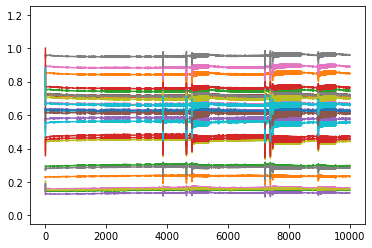

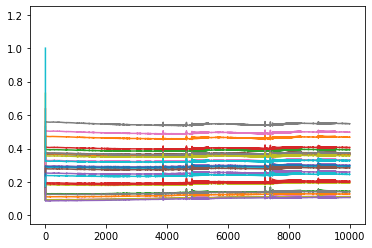

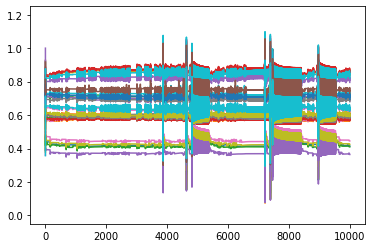

In [234]:
for i in range(3):
    plt.figure()
    plt.plot(Wstar_t3[-2][:,:,i].reshape((niter+1,-1)))
    plt.ylim((-0.05,1.25))


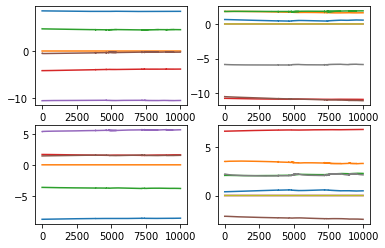

In [235]:
plt.figure()
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(Wstar_t3[i].reshape((niter+1,-1)))
#     plt.ylim((-0.05,1.05))

In [236]:
Xlbl = [['L4','spont'],['PC','SST','VIP']]
Ylbl = ['PC','SST','VIP']

In [237]:
Wstar_t[i][100]

array([[ 0.29889496,  2.90935177,  0.21794968],
       [-1.66025444,  0.        , -0.61279047],
       [ 0.        ,  3.76694191,  0.        ]])

In [252]:
for i in range(4):
    values = np.round(Wstar_t[i][-1],decimals=2)
    to_print = np.zeros_like(values,dtype='<U32')
    if np.mod(i,2)==0:
        for i in range(to_print.shape[0]):
            for j in range(to_print.shape[1]):
                to_print[i,j] = Xlbl[0][i] + ' -> ' + Xlbl[1][j] + ': ' + str(values[i,j])
    else: 
        for i in range(to_print.shape[0]):
            for j in range(to_print.shape[1]):
                to_print[i,j] = Ylbl[i] + ' -> ' + Ylbl[j] + ': ' + str(values[i,j])
    print(to_print)
    print('\n')
for i in range(4,5):
    values = np.round(Wstar_t[i][-1],decimals=2)
    print(values)

[['L4 -> PC: 7.38' 'L4 -> SST: 0.0' 'L4 -> VIP: 2.05']
 ['spont -> PC: -2.8' 'spont -> SST: -10.38' 'spont -> VIP: -0.58']]


[['PC -> PC: -2.33' 'PC -> SST: -0.53' 'PC -> VIP: -0.5']
 ['SST -> PC: -10.96' 'SST -> SST: 0.0' 'SST -> VIP: -7.41']
 ['VIP -> PC: 0.0' 'VIP -> SST: -4.95' 'VIP -> VIP: 0.0']]


[['L4 -> PC: -8.28' 'L4 -> SST: 0.0' 'L4 -> VIP: -2.7']
 ['spont -> PC: -1.48' 'spont -> SST: 5.18' 'spont -> VIP: 3.19']]


[['PC -> PC: 2.99' 'PC -> SST: 1.7' 'PC -> VIP: 2.66']
 ['SST -> PC: 6.52' 'SST -> SST: 0.0' 'SST -> VIP: 1.13']
 ['VIP -> PC: 0.0' 'VIP -> SST: 5.01' 'VIP -> VIP: 0.0']]


[3.8  1.45 0.29]


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [257]:
labels = ['Wmx','Wmy','Wsx','Wsy','s02','Y','momentum']
Wstar_dict = {}
for i,label in enumerate(labels):
    Wstar_dict[label] = Wstar_t3[i]

In [258]:
np.save('w_over_time_miller_troyer_3.npy',Wstar_dict,allow_pickle=True)

In [219]:
# wst_copy = np.load('w_over_time_miller_troyer.npy')

In [240]:
def scatter_results(this_Wstar):
    plt.figure(figsize=(9,3))
    celltype = ['PC','SST','VIP']
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.title(celltype[i])
        sca.scatter_size_contrast(Yhat[:,i],this_Wstar[-2][-1,:,i])
        plt.plot((0,1),(0,1),c='k')
        plt.xlabel('measured')
        plt.ylabel('modeled')
        plt.tight_layout()

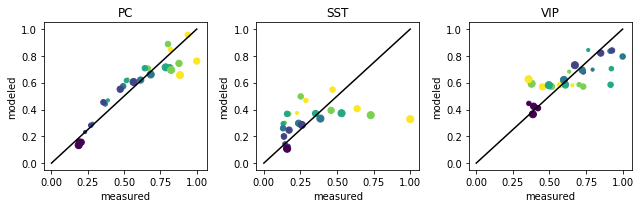

In [243]:
scatter_results(Wstar_t3)
# plt.savefig('figures/sst_vip_measured_modeled_miller_troyer.pdf')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

<IPython.core.display.Javascript object>


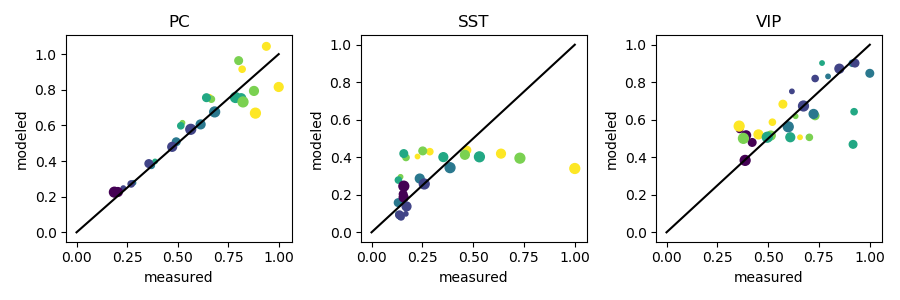

In [245]:
niter = int(1e3)
Ws = [Wstar_t[i][-1].copy() + 1e-2*np.random.randn(*Wstar_t[i][-1].shape) for i in range(4)]
Wstar_t2 = fit_W_linearized_pointwise(X.copy(),Yhat.copy(),f_miller_troyer,Y0=Yhat.copy(),W0mx=Ws[0],W0my=Ws[1],W0sx=Ws[2],W0sy=Ws[3],bounds=bounds,niter=niter,weight=np.array((1,10,1)))
scatter_results(Wstar_t2)

In [250]:
iiter = -1
Wmx,Wmy,Wsx,Wsy,s02,Y1 = [Wstar_t3[i][iiter] for i in range(6)]

def fXY(x,y):
    return f_miller_troyer(x @ Wmx + y @ Wmy, (x @ Wsx + y @ Wsy)**2 + s02)

def u_fn_fn(Wx,Wy):
    return lambda x,y: x @ Wx + y @ Wy

def um_fn(x,y):
    return u_fn_fn(Wmy,Wmx)(x,y)

def us_fn(x,y):
    return u_fn_fn(Wsy,Wsx)(x,y)

#Y,diagnostics = compute_Y_nonlinear(X,Wmx,Wmy,Wsx,Wsy,f_miller_troyer,Y0=Wstar_t[-2][iiter+1].copy()) # _t_evolution
for i in range(Y1.shape[0]):
    
    def fY(y):
        return fXY(X[i],y) - y
    
    print('eigenvalues: ' + str(np.linalg.eig(jacobian(fY)(Y1[i]))[0]))
#     print('determinant: ' + str(np.linalg.det(jacobian(fY)(Y[i]))))
#     print('function output: ' + str(fY(Y[i])))
#     print('function input: ' + str(Y[i]))

eigenvalues: [-1.22495877+0.58251226j -1.22495877-0.58251226j -0.50117929+0.j        ]
eigenvalues: [-1.19965214+0.76645363j -1.19965214-0.76645363j -0.54801936+0.j        ]
eigenvalues: [-1.1960127 +0.89067074j -1.1960127 -0.89067074j -0.55234924+0.j        ]
eigenvalues: [-1.21768018+1.17150123j -1.21768018-1.17150123j -0.50176054+0.j        ]
eigenvalues: [-1.24497443+1.41045757j -1.24497443-1.41045757j -0.44611397+0.j        ]
eigenvalues: [-1.09096088+1.6115655j -1.09096088-1.6115655j -0.75505044+0.j       ]
eigenvalues: [-1.21998548+0.6102777j -1.21998548-0.6102777j -0.51053878+0.j       ]
eigenvalues: [-1.19600833+0.86862446j -1.19600833-0.86862446j -0.55290784+0.j        ]
eigenvalues: [-1.21190693+1.13183493j -1.21190693-1.13183493j -0.5142457 +0.j        ]
eigenvalues: [-1.25704555+1.39412929j -1.25704555-1.39412929j -0.42171542+0.j        ]
eigenvalues: [-1.10324127+1.58984947j -1.10324127-1.58984947j -0.73046947+0.j        ]
eigenvalues: [-1.00181775+1.85352199j -1.00181775

In [249]:
Y1

array([[0.15243853, 0.11057011, 0.41513677],
       [0.23182894, 0.12889643, 0.59328132],
       [0.29390933, 0.14520361, 0.69766982],
       [0.46830868, 0.20535085, 0.84403698],
       [0.62460645, 0.30157164, 0.68291007],
       [0.71729158, 0.37428579, 0.5805314 ],
       [0.16394993, 0.11287326, 0.44526757],
       [0.28217892, 0.14194238, 0.6802637 ],
       [0.44137349, 0.19432852, 0.83576387],
       [0.61572789, 0.29371826, 0.70435117],
       [0.70748263, 0.36695086, 0.58542554],
       [0.84691103, 0.46754206, 0.56644637],
       [0.15048463, 0.11018327, 0.4099473 ],
       [0.4539447 , 0.19937058, 0.84038107],
       [0.57324872, 0.26003138, 0.79551172],
       [0.7081649 , 0.36755825, 0.58476749],
       [0.88826042, 0.49768086, 0.57082287],
       [0.95707326, 0.54861572, 0.58300263],
       [0.1559611 , 0.11126542, 0.42447282],
       [0.55120743, 0.24622017, 0.82104809],
       [0.6198807 , 0.29737912, 0.6941871 ],
       [0.71155616, 0.37005966, 0.58312132],
       [0.

<IPython.core.display.Javascript object>


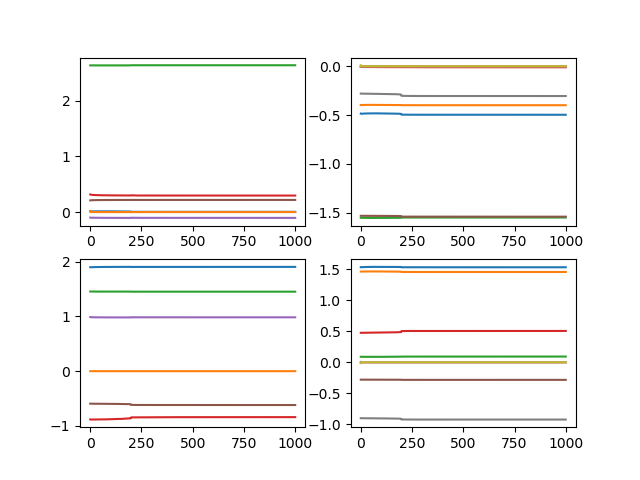

In [246]:
def plot_weights_over_time(this_Wstar):
    plt.figure()
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.plot(this_Wstar[i].reshape((niter+1,-1)))
plot_weights_over_time(Wstar_t2)

In [274]:
nQ = Y.shape[1]
def parse_W(W):
        shapeW = (nQ,nQ)
        sizeW = np.prod(shapeW)
        nW = 4
        Ws = [None]*nW
        for i in range(nW):
            Ws[i] = W[i*sizeW:(i+1)*sizeW].reshape(shapeW)
        return Ws
Ws = parse_W(Wstar[0])

In [275]:
Y1 = compute_Y_nonlinear(X,*Ws,f_miller_troyer,Y0=Y0)

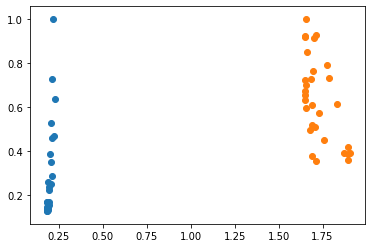

In [276]:
plt.figure()
# plt.scatter(f(X @ Wx + Y @ Wy).flatten(),Y.flatten())
for i in range(Y.shape[1]):
    plt.scatter(Y0[:,i],Y[:,i])

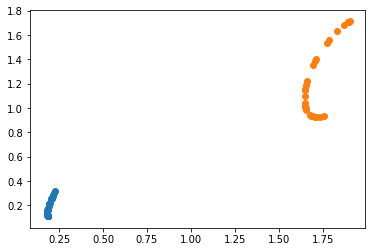

In [277]:
plt.figure()
# plt.scatter(f(X @ Wx + Y @ Wy).flatten(),Y.flatten())
for i in range(Y.shape[1]):
    plt.scatter(Y0[:,i],Y1[:,i])

In [491]:
diagnostics

[(array([0.07590516, 0.16438597]),
  0.002892952845580517,
  {'grad': array([ 0.00350314, -0.01427093]),
   'task': b'ABNORMAL_TERMINATION_IN_LNSRCH',
   'funcalls': 57,
   'nit': 1,
   'warnflag': 2}),
 (array([0.08371026, 0.18076958]),
  0.0035159924935236103,
  {'grad': array([ 0.00603596, -0.0151144 ]),
   'task': b'ABNORMAL_TERMINATION_IN_LNSRCH',
   'funcalls': 21,
   'nit': 0,
   'warnflag': 2}),
 (array([0.09198376, 0.19835681]),
  0.0042315034102210665,
  {'grad': array([ 0.06981335, -0.00428242]),
   'task': b'ABNORMAL_TERMINATION_IN_LNSRCH',
   'funcalls': 21,
   'nit': 0,
   'warnflag': 2}),
 (array([0.109196  , 0.23462734]),
  0.00597166243487739,
  {'grad': array([ 0.0344488 , -0.01411697]),
   'task': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH',
   'funcalls': 32,
   'nit': 2,
   'warnflag': 0}),
 (array([0.13124416, 0.28118814]),
  0.008626608249659579,
  {'grad': array([ 0.03536171, -0.01777716]),
   'task': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH',
  

In [ ]:
y = array([0.07590516, 0.16438597])
f_miller

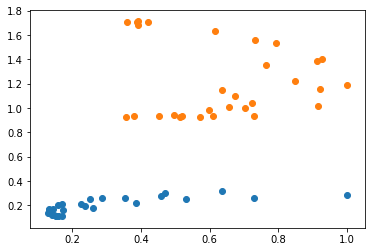

In [278]:
plt.figure()
# plt.scatter(f(X @ Wx + Y @ Wy).flatten(),Y.flatten())
for i in range(Y.shape[1]):
    plt.scatter(Y[:,i],Y1[:,i])

In [279]:
# W0 = np.concatenate((W0x.flatten(),W0y.flatten()))
bounds = [(-np.inf,np.inf)]*16
offset = 0
bounds[offset+4] = (0,0)
bounds[offset+7] = (0,0)
offset = 8
bounds[offset+4] = (0,0)
bounds[offset+7] = (0,0)
bounds = tuple(bounds)
Niter = 200
w0my = W0my
w0mx = W0mx
w0sy = W0sy
w0sx = W0sx
Wstar = [None]*Niter
eta = 0.1
for i in range(Niter):
    Wstar[i] = fit_W_linearized_WY(X,Y,f_miller_troyer,Y0=Y,W0mx=w0mx,W0my=w0my,W0sx=w0sx,W0sy=w0sy,bounds=bounds)
    w1mx,w1my,w1sx,w1sy = parse_W(Wstar[i][0])
    w0mx = w0mx + eta*(w1mx-w0mx)
    w0my = w0my + eta*(w1my-w0my)
    w0sx = w0sx + eta*(w1sx-w0sx)
    w0sy = w0sy + eta*(w1sy-w0sy)

In [287]:
Wt = np.zeros((Niter,)+(Wstar[0][0].shape))
Yt = np.zeros((Niter,)+(Y.shape))
for i in range(Niter):
    print(i)
    Wt[i] = Wstar[i][0]
    wmx,wmy,wsx,wsy = parse_W(Wt[i])
    Yt[i] = compute_Y_nonlinear(X,wmx,wmy,wsx,wsy,f_miller_troyer,Y0=Y)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


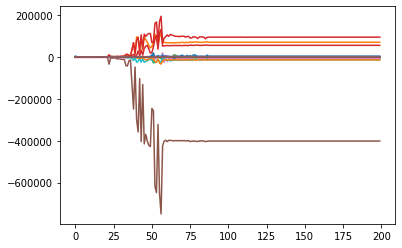

In [297]:
plt.figure()
for i in range(Wt.shape[1]):
    plt.plot(Wt[:,i])

In [299]:
Wt[60]

array([  -2650.28820038,   67637.4935345 ,    4074.34417779,
         54463.21523021,       0.        , -404651.66764672,
        -20432.76063931,       0.        ,    1039.50187873,
        -17600.42502162,    -940.64376186,  -14055.94816129,
             0.        ,  105290.99901942,    5339.32977626,
             0.        ])

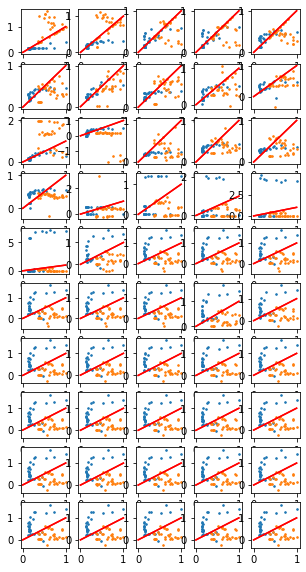

In [289]:
plt.figure(figsize=(5,20))
for i in range(0,Niter,4):
    plt.subplot(20,5,int(i/4)+1)
    for j in range(2):
        plt.scatter(Y[:,j],Yt[i,:,j],s=2.5)
        plt.plot((0,1),(0,1),c='r')

In [304]:
u,s,v = np.linalg.svd(Rpc[~np.isnan(Rpc.sum(1))])

In [307]:
np.diag(s).shape

(30, 30)

In [308]:
def pca_denoise(arr,Npc):
    u,s,v = np.linalg.svd(arr)
    return u[:,:Npc] @ np.diag(s[:Npc]) @ v[:Npc,:]

In [309]:
Rpc2 = pca_denoise(Rpc[~np.isnan(Rpc.sum(1))],10)

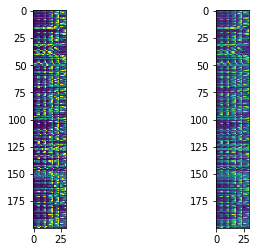

In [312]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(Rpc[:200])
plt.subplot(1,2,2)
plt.imshow(Rpc2[:200])

In [437]:
def fit_W_linearized(X,Y,f,Y0=None,W0mx=None,W0my=None,W0sx=None,W0sy=None,bounds=None):
    # X is (N,P), y is (N,Q). Finds wZx, wZy: (P,Q) + (Q,Q) weight matrices to explain Y as Y = f(Xwmx + Ywmy,Xwsx + Ywsy)
    # f is a static nonlinearity, given as a function
    
    factr=1e7
    epsilon=1e-8
    pgtol=1e-5
    fudge = 1e-4
    
    fprime_m = egrad(f,0)
    fprime_s = egrad(f,1)
    nN,nP = X.shape
    nQ = Y.shape[1]
    assert(nN==Y.shape[0])
    
    #W0x,W0y = parse_W(W0)
    
    u_fn = lambda Wx,Wy: X @ Wx + Y0 @ Wy
    
    um0 = u_fn(W0mx,W0my) # (N,Q)
    us0 = u_fn(W0sx,W0sy) # (N,Q)
    Fsquiggle = f(um0,us0) # (N,Q)
    Fprime_m_squiggle = np.maximum(fprime_m(um0,us0),fudge) # (N,Q)
    Fprime_s_squiggle = np.maximum(fprime_s(um0,us0),fudge) # (N,Q)
    
#     Phi = np.zeros((nN,nQ,nQ))
#     Phi_m = np.zeros((nN,nQ,nQ)) # Phi now means Fprime rather than 1/Fprime
#     Phi_s = np.zeros((nN,nQ,nQ))
#     for i in range(nN):
#         np.fill_diagonal(Phi[i],F_squiggle[i])
#         np.fill_diagonal(Phi_m[i],Fprime_m_squiggle[i]) # is there a cleaner way?
#         np.fill_diagonal(Phi_s[i],Fprime_s_squiggle[i])
    
#     A0 = -u0 - (Y0 @ W0y) + Fsquiggle/Fprimesquiggle
#     A = Phi - Phi_m @ Y0 @ W0my - Phi_s @ Y0 @ W0sy
    A0 = Fsquiggle - Fprime_m_squiggle * u_fn(W0mx,W0my) - Fprime_s_squiggle * u_fn(W0sx,W0sy)
    
    # N
    
    W0 = np.concatenate((W0mx.flatten(),W0my.flatten(),W0sx.flatten(),W0sy.flatten()),axis=0)
    
    def compute_Y(Wmx,Wmy,Wsx,Wsy):
        
        A1 = Fprime_m_squiggle * (X @ Wmx) + Fprime_s_squiggle * (X @ Wsx)
        A = A0 + A1
        
        WFm = np.einsum('jk,ik->ijk',Wmy,Fprime_m_squiggle)
        WFs = np.einsum('jk,ik->ijk',Wsy,Fprime_s_squiggle)
        Omega = np.eye(nQ) - WFm - WFs
        
        Y = np.einsum('ik,ikj->ij',A,np.linalg.inv(Omega))

#         Y = (A @ np.linalg.inv(Phi-W0y))[np.eye(nN,dtype='bool')]
#         Y = np.zeros((nN,nQ))
#         for i in range(nN):
#             Y[i] = A[i] @ np.linalg.inv(Phi[i]-W0y) # (Q,) @ (Q,Q).
#         assert(True==False)
        return Y
    
    def minusL(W):
        Wmx,Wmy,Wsx,Wsy = parse_W(W)
        return 0.5*np.sum((compute_Y(Wmx,Wmy,Wsx,Wsy) - Y)**2)
    
    def minusdLdw(W): 
        # sum in first dimension: (N,1) times (N,1) times (N,P)
        return egrad(minusL)(W)
    
    def parse_W(W):
        shapeW = (nQ,nQ)
        sizeW = np.prod(shapeW)
        nW = 4
        Ws = [None]*nW
        for i in range(nW):
            Ws[i] = W[i*sizeW:(i+1)*sizeW].reshape(shapeW)
        return Ws
        
    
    Wstar = sop.fmin_l_bfgs_b(minusL,W0,fprime=minusdLdw,bounds=bounds,pgtol=pgtol,factr=factr,epsilon=epsilon)
    
#     assert(True==False)
    
    return Wstar

In [438]:
def fit_W_linearized_WY(X,Y,f,Y0=None,W0mx=None,W0my=None,W0sx=None,W0sy=None,bounds=None):
    # X is (N,P), y is (N,Q). Finds wZx, wZy: (P,Q) + (Q,Q) weight matrices to explain Y as Y = f(Xwmx + Ywmy,Xwsx + Ywsy)
    # f is a static nonlinearity, given as a function
    
    factr=1e7
    epsilon=1e-8
    pgtol=1e-5
    fudge = 1e-4
    
    fprime_m = egrad(f,0)
    fprime_s = egrad(f,1)
    nN,nP = X.shape
    nQ = Y.shape[1]
    assert(nN==Y.shape[0])
    
    #W0x,W0y = parse_W(W0)
    
    u_fn = lambda Wx,Wy: X @ Wx + Y0 @ Wy
    
    um0 = u_fn(W0mx,W0my) # (N,Q)
    us0 = u_fn(W0sx,W0sy) # (N,Q)
    Fsquiggle = f(um0,us0) # (N,Q)
    Fprime_m_squiggle = np.maximum(fprime_m(um0,us0),fudge) # (N,Q)
    Fprime_s_squiggle = np.maximum(fprime_s(um0,us0),fudge) # (N,Q)
    
#     Phi = np.zeros((nN,nQ,nQ))
#     Phi_m = np.zeros((nN,nQ,nQ)) # Phi now means Fprime rather than 1/Fprime
#     Phi_s = np.zeros((nN,nQ,nQ))
#     for i in range(nN):
#         np.fill_diagonal(Phi[i],F_squiggle[i])
#         np.fill_diagonal(Phi_m[i],Fprime_m_squiggle[i]) # is there a cleaner way?
#         np.fill_diagonal(Phi_s[i],Fprime_s_squiggle[i])
    
#     A0 = -u0 - (Y0 @ W0y) + Fsquiggle/Fprimesquiggle
#     A = Phi - Phi_m @ Y0 @ W0my - Phi_s @ Y0 @ W0sy
    A0 = Fsquiggle - Fprime_m_squiggle * u_fn(W0mx,W0my) - Fprime_s_squiggle * u_fn(W0sx,W0sy) 
    A0 = A0 - Fprime_m_squiggle * (Y0 @ W0my) - Fprime_s_squiggle * (Y0 @ W0sy)
    
    # N
    
    W0 = np.concatenate((W0mx.flatten(),W0my.flatten(),W0sx.flatten(),W0sy.flatten()),axis=0)
    
    def compute_Y(Wmx,Wmy,Wsx,Wsy):
        
        A1 = Fprime_m_squiggle * u_fn(Wmx,Wmy) + Fprime_s_squiggle * u_fn(Wsx,Wsy)
        A = A0 + A1
        
        WFm = np.einsum('jk,ik->ijk',W0my,Fprime_m_squiggle)
        WFs = np.einsum('jk,ik->ijk',W0sy,Fprime_s_squiggle)
        Omega = np.eye(nQ) - WFm - WFs
        
        Y = np.einsum('ik,ikj->ij',A,np.linalg.inv(Omega))

#         Y = (A @ np.linalg.inv(Phi-W0y))[np.eye(nN,dtype='bool')]
#         Y = np.zeros((nN,nQ))
#         for i in range(nN):
#             Y[i] = A[i] @ np.linalg.inv(Phi[i]-W0y) # (Q,) @ (Q,Q).
#         assert(True==False)
        return Y
    
    def minusL(W):
        Wmx,Wmy,Wsx,Wsy = parse_W(W)
        return 0.5*np.sum((compute_Y(Wmx,Wmy,Wsx,Wsy) - Y)**2)
    
    def minusdLdw(W): 
        # sum in first dimension: (N,1) times (N,1) times (N,P)
        return egrad(minusL)(W)
    
    def parse_W(W):
        shapeW = (nQ,nQ)
        sizeW = np.prod(shapeW)
        nW = 4
        Ws = [None]*nW
        for i in range(nW):
            Ws[i] = W[i*sizeW:(i+1)*sizeW].reshape(shapeW)
        return Ws
        
    
    Wstar = sop.fmin_l_bfgs_b(minusL,W0,fprime=minusdLdw,bounds=bounds,pgtol=pgtol,factr=factr,epsilon=epsilon)
    
#     assert(True==False)
    
    return Wstar